In [520]:
! source spaceenv/bin/activate

In [521]:
! pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [522]:
# Importing Libraries
import pylab
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score, GridSearchCV

# Importing libraries for checking the Gaussian Distribution
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import normaltest

# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# Classification Algorithms
from sklearn import svm
from xgboost import XGBClassifier as XGBC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC

# Evaluation Matrix
from sklearn.metrics import classification_report

In [523]:
# Defining Class for preparing Data to apply ML Models
class Pre_processing():
    # Defining Data Importing Function
    def data_loading(self, path):
        df = pd.read_csv(path)

        return df

    # Defining function to convert boolean data into numeric data
    def boolean_col_preprocessing(self, df):
        bool_list = df.select_dtypes(include='bool').columns
        for col in bool_list:
            if col != 'Type':
                df[col] = df[col].map({True:1, False:0})
        
        return df

    # One-Hot Encoding function to convert object data into numeric data
    def object_col_preprocessing(self, df):
        object_list = df.select_dtypes(include='object').columns

        for col in object_list:
            if col != 'Type':
                dummy_df = pd.get_dummies(df[col])
                df = pd.concat([df, dummy_df], axis='columns')
        
        df = df.drop(object_list[:-1], axis='columns')
        
        return df

    # Normalisation function for scaling of Data 
    def normlisation(self, df):
        # fit scaler on training data
        norm = MinMaxScaler().fit(df)

        # transform training data
        norm_data = norm.transform(df)
        norm_data = pd.DataFrame(norm_data, columns=df.columns)

        return norm_data      
    
    # Train and Test Splitting of Data
    def data_split(self, df):
        training_data = df.drop('Transported', axis='columns')
        validation_data = df['Transported']
        X_train, X_test, y_train, y_test = tts(training_data, validation_data, test_size=0.2, shuffle=True)

        return X_train, X_test, y_train, y_test

In [524]:
# Defining a class to Check and Scale the Data
class NormalDistribution():
    def __init__(self, df):
        self.dataframe = df

    # Defining Function for QQ Plot
    def qqplot(self, colname):
        stats.probplot(self.dataframe[colname], dist='norm', plot=plt)
        plt.show()

    # Defining a Function for Histogram Plot
    def histplot(self, colname):
        bins = np.linspace(-20, 20, 100)
        sns.histplot(self.dataframe[colname], kde=True)
        # plt.hist(self.dataframe[colname], bins, alpha=0.5, label=colname)
        plt.suptitle('Distribution of {}'.format(colname))
        plt.show()

    # Defining a Function to check the Gaussian Distribution with respect to P value using Shapiro-Wilk & D'Agostino's K^2 Test
    def gaussian_check(self, colname):
        # Shapiro-Wilk Test
        shapiro_stat, shapiro_p = shapiro(self.dataframe[colname])

        # D'Agostino's K^2 Test
        agostino_stat, agostino_p = normaltest(self.dataframe[colname])

        if shapiro_p > 0.05:
            print("As per Shapiro-Wilk's Test for Column Name: " + colname + ' -----------> Sample looks Gaussian (Accept H0)\n')
        else:
            print("As per Shapiro-Wilk's Test for Column Name: " + colname + ' -----------> Sample does not look Gaussian (Reject H0)\n')

        if agostino_p > 0.05:
            print("As per D'Agostino's K^2 Test for Column Name: " + colname + ' -----------> Sample looks Gaussian (Accept H0)\n')
        else:
            print("As per D'Agostino's K^2 Test for Column Name: " + colname + ' -----------> Sample does not look Gaussian (Reject H0)\n')

In [525]:
Pp = Pre_processing()
data = Pp.data_loading('/home/meghal/Personal/Personal Projects/Space Titanic/Data/cleaned_training_data.csv')
data['Cabin'] = data.Cabin.apply(lambda x: x.split('/')[2])
data

HomePlanet  CryoSleep Cabin    Destination   Age    VIP  RoomService  \
0         Europa      False     P    TRAPPIST-1e  39.0  False          0.0   
1          Earth      False     S    TRAPPIST-1e  24.0  False        109.0   
2         Europa      False     S    TRAPPIST-1e  58.0   True         43.0   
3         Europa      False     S    TRAPPIST-1e  33.0  False          0.0   
4          Earth      False     S    TRAPPIST-1e  16.0  False        303.0   
...          ...        ...   ...            ...   ...    ...          ...   
12854      Earth      False     S    TRAPPIST-1e  40.0  False          0.0   
12855      Earth       True     S    TRAPPIST-1e  34.0  False          0.0   
12856      Earth      False     P    TRAPPIST-1e  42.0  False          0.0   
12857       Mars       True     P    55 Cancri e  27.0  False          0.0   
12858      Earth       True     S  PSO J318.5-22  43.0  False          0.0   

       FoodCourt  ShoppingMall     Spa  VRDeck  Transported   Type  
0            0.0           0.0     0.0     0.0        False  Train  
1            9.0          25.0   549.0    44.0         True  Train  
2         3576.0           0.0  6715.0    49.0        False  Train  
3         1283.0         371.0  3329.0   193.0        False  Train  
4           70.0         151.0   565.0     2.0         True  Train  
...          ...           ...     ...     ...          ...    ...  
12854      865.0           0.0     3.0     0.0         True   Test  
12855        0.0           0.0     0.0     0.0         True   Test  
12856      847.0          17.0    10.0   144.0         True   Test  
12857        0.0           0.0     0.0     0.0         True   Test  
12858        0.0           0.0     0.0     0.0         True   Test  

[12859 rows x 13 columns]

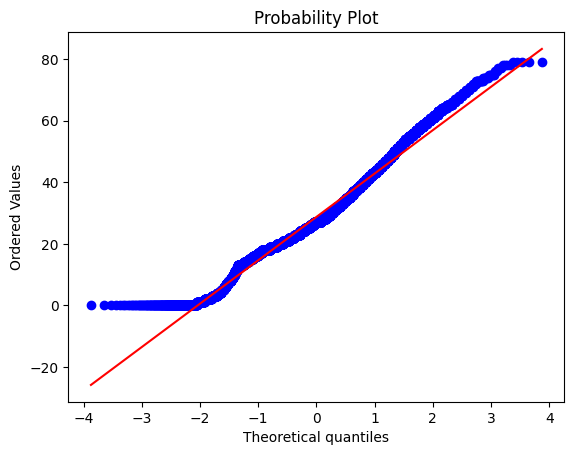

In [526]:
ND = NormalDistribution(data)

ND.qqplot('Age')

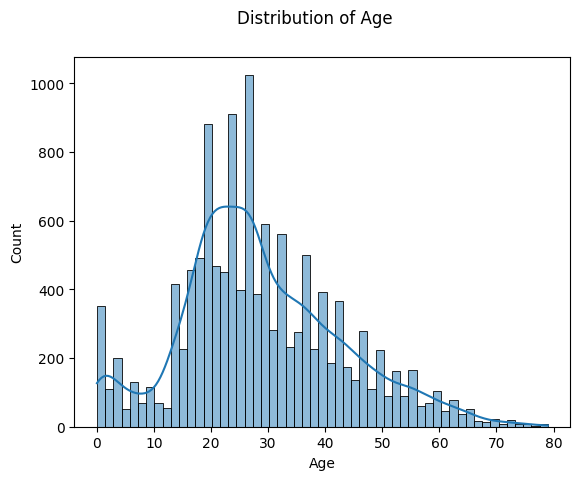

As per Shapiro-Wilk's Test for Column Name: Age -----------> Sample does not look Gaussian (Reject H0)

As per D'Agostino's K^2 Test for Column Name: Age -----------> Sample does not look Gaussian (Reject H0)



/home/meghal/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [527]:
ND.histplot('Age')
ND.gaussian_check('Age')

<AxesSubplot:>

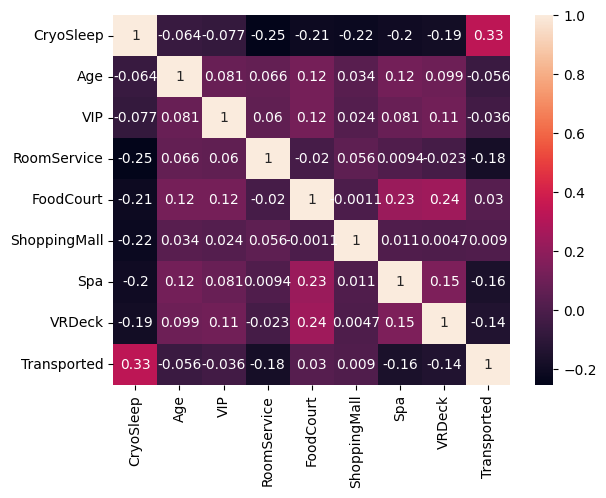

In [528]:
sns.heatmap(data.corr(), annot=True) # Checking the Correlation between the variables

In [529]:
data.dtypes

HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
Type             object
dtype: object

In [530]:
# Converting Boolean variables by calling the Data Preparation class and it's function
data = Pp.boolean_col_preprocessing(data)
data

HomePlanet  CryoSleep Cabin    Destination   Age  VIP  RoomService  \
0         Europa          0     P    TRAPPIST-1e  39.0    0          0.0   
1          Earth          0     S    TRAPPIST-1e  24.0    0        109.0   
2         Europa          0     S    TRAPPIST-1e  58.0    1         43.0   
3         Europa          0     S    TRAPPIST-1e  33.0    0          0.0   
4          Earth          0     S    TRAPPIST-1e  16.0    0        303.0   
...          ...        ...   ...            ...   ...  ...          ...   
12854      Earth          0     S    TRAPPIST-1e  40.0    0          0.0   
12855      Earth          1     S    TRAPPIST-1e  34.0    0          0.0   
12856      Earth          0     P    TRAPPIST-1e  42.0    0          0.0   
12857       Mars          1     P    55 Cancri e  27.0    0          0.0   
12858      Earth          1     S  PSO J318.5-22  43.0    0          0.0   

       FoodCourt  ShoppingMall     Spa  VRDeck  Transported   Type  
0            0.0           0.0     0.0     0.0            0  Train  
1            9.0          25.0   549.0    44.0            1  Train  
2         3576.0           0.0  6715.0    49.0            0  Train  
3         1283.0         371.0  3329.0   193.0            0  Train  
4           70.0         151.0   565.0     2.0            1  Train  
...          ...           ...     ...     ...          ...    ...  
12854      865.0           0.0     3.0     0.0            1   Test  
12855        0.0           0.0     0.0     0.0            1   Test  
12856      847.0          17.0    10.0   144.0            1   Test  
12857        0.0           0.0     0.0     0.0            1   Test  
12858        0.0           0.0     0.0     0.0            1   Test  

[12859 rows x 13 columns]

In [531]:
# Converting Categorical variables by calling the Data Preparation class and it's function
data = Pp.object_col_preprocessing(data)
data

CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0              0  39.0    0          0.0        0.0           0.0     0.0   
1              0  24.0    0        109.0        9.0          25.0   549.0   
2              0  58.0    1         43.0     3576.0           0.0  6715.0   
3              0  33.0    0          0.0     1283.0         371.0  3329.0   
4              0  16.0    0        303.0       70.0         151.0   565.0   
...          ...   ...  ...          ...        ...           ...     ...   
12854          0  40.0    0          0.0      865.0           0.0     3.0   
12855          1  34.0    0          0.0        0.0           0.0     0.0   
12856          0  42.0    0          0.0      847.0          17.0    10.0   
12857          1  27.0    0          0.0        0.0           0.0     0.0   
12858          1  43.0    0          0.0        0.0           0.0     0.0   

       VRDeck  Transported   Type  Earth  Europa  Mars  P  S  55 Cancri e  \
0         0.0            0  Train      0       1     0  1  0            0   
1        44.0            1  Train      1       0     0  0  1            0   
2        49.0            0  Train      0       1     0  0  1            0   
3       193.0            0  Train      0       1     0  0  1            0   
4         2.0            1  Train      1       0     0  0  1            0   
...       ...          ...    ...    ...     ...   ... .. ..          ...   
12854     0.0            1   Test      1       0     0  0  1            0   
12855     0.0            1   Test      1       0     0  0  1            0   
12856   144.0            1   Test      1       0     0  1  0            0   
12857     0.0            1   Test      0       0     1  1  0            1   
12858     0.0            1   Test      1       0     0  0  1            0   

       PSO J318.5-22  TRAPPIST-1e  
0                  0            1  
1                  0            1  
2                  0            1  
3                  0            1  
4                  0            1  
...              ...          ...  
12854              0            1  
12855              0            1  
12856              0            1  
12857              0            0  
12858              1            0  

[12859 rows x 18 columns]

In [532]:
# Seggregating Training dataset from the main Dataset to perform ML Operations
train_data = data[data['Type']=='Train'].drop('Type', axis='columns')
train_data.describe()

CryoSleep          Age          VIP   RoomService     FoodCourt  \
count  8681.000000  8681.000000  8681.000000   8681.000000   8681.000000   
mean      0.349499    28.793227     0.022924    224.739249    457.860546   
std       0.476839    14.342694     0.149669    660.109814   1595.030016   
min       0.000000     0.000000     0.000000      0.000000      0.000000   
25%       0.000000    20.000000     0.000000      0.000000      0.000000   
50%       0.000000    27.000000     0.000000      0.000000      0.000000   
75%       1.000000    37.000000     0.000000     78.000000    117.000000   
max       1.000000    79.000000     1.000000  14327.000000  29813.000000   

       ShoppingMall           Spa        VRDeck  Transported        Earth  \
count   8681.000000   8681.000000   8681.000000  8681.000000  8681.000000   
mean     173.891741    311.344935    304.775443     0.503513     0.552356   
std      597.801683   1125.417937   1133.801332     0.500016     0.497280   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000      0.000000     1.000000     1.000000   
75%       45.000000     89.000000     70.000000     1.000000     1.000000   
max    23492.000000  22408.000000  24133.000000     1.000000     1.000000   

            Europa         Mars            P            S  55 Cancri e  \
count  8681.000000  8681.000000  8681.000000  8681.000000  8681.000000   
mean      0.245248     0.202396     0.506624     0.493376     0.207349   
std       0.430259     0.401809     0.499985     0.499985     0.405431   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     1.000000     0.000000     0.000000   
75%       0.000000     0.000000     1.000000     1.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       PSO J318.5-22  TRAPPIST-1e  
count    8681.000000  8681.000000  
mean        0.091464     0.701186  
std         0.288285     0.457764  
min         0.000000     0.000000  
25%         0.000000     0.000000  
50%         0.000000     1.000000  
75%         0.000000     1.000000  
max         1.000000     1.000000

In [533]:
# Scaling the variables to avoid false predictions
train_data = Pp.normlisation(train_data)
train_data.describe()

CryoSleep          Age          VIP  RoomService    FoodCourt  \
count  8681.000000  8681.000000  8681.000000  8681.000000  8681.000000   
mean      0.349499     0.364471     0.022924     0.015686     0.015358   
std       0.476839     0.181553     0.149669     0.046075     0.053501   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.253165     0.000000     0.000000     0.000000   
50%       0.000000     0.341772     0.000000     0.000000     0.000000   
75%       1.000000     0.468354     0.000000     0.005444     0.003924   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       ShoppingMall          Spa       VRDeck  Transported        Earth  \
count   8681.000000  8681.000000  8681.000000  8681.000000  8681.000000   
mean       0.007402     0.013894     0.012629     0.503513     0.552356   
std        0.025447     0.050224     0.046981     0.500016     0.497280   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.000000     0.000000     0.000000     0.000000     0.000000   
50%        0.000000     0.000000     0.000000     1.000000     1.000000   
75%        0.001916     0.003972     0.002901     1.000000     1.000000   
max        1.000000     1.000000     1.000000     1.000000     1.000000   

            Europa         Mars            P            S  55 Cancri e  \
count  8681.000000  8681.000000  8681.000000  8681.000000  8681.000000   
mean      0.245248     0.202396     0.506624     0.493376     0.207349   
std       0.430259     0.401809     0.499985     0.499985     0.405431   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     1.000000     0.000000     0.000000   
75%       0.000000     0.000000     1.000000     1.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       PSO J318.5-22  TRAPPIST-1e  
count    8681.000000  8681.000000  
mean        0.091464     0.701186  
std         0.288285     0.457764  
min         0.000000     0.000000  
25%         0.000000     0.000000  
50%         0.000000     1.000000  
75%         0.000000     1.000000  
max         1.000000     1.000000

In [534]:
# Training and Testing Data Splitting
X_train, X_test, y_train, y_test = Pp.data_split(train_data)

## Hyperparameter Tunning

In [535]:
# Defining various Models and their parameters to check best model for the given Dataset.
model_selection = {
    'Logistic Regression' : {
        'model' : LR(),
        'parameters' : {
            'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
            'C' : [1.0, 10.0, 20.0, 30.0],
            'fit_intercept' : [True, False],
            'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'max_iter' : [itr for itr in range(100, 600, 100)]
        }
    },
    'Support Vector machine' : {
        'model' : svm.SVC(),
        'parameters': {
            'C' : [1.0, 10.0, 20.0, 30.0],
            'kernel' : ['rbf', 'sigmoid'],
            'degree' : list(range(1, 10)),
            'gamma' : ['scale', 'auto'],
            'shrinking' : [True, False],
            'max_iter' : [itr for itr in range(100, 600, 100)]
        }
    },
    'KNeighbors' : {
        'model' : KNN(),
        'parameters' : {
            'leaf_size' : list(range(1,30)),
            'n_neighbors' : list(range(1,20)),
            'metric' : ['minkowski','euclidean','manhattan']
        }
    },
    'Decision Tree' : {
        'model' : DTC(),
        'parameters' : {
            'criterion' : ['gini', 'entropy', 'log_loss'],
            'splitter' : ['best', 'random'],
            'max_depth' : list(range(5, 55, 5)),
            'min_samples_split' : list(range(1, 10)),
            'min_samples_leaf' : list(range(1, 22, 2)),
            'max_features' : ['auto', 'sqrt', 'log2']
        }
    },
    'Random Forest Tree' : {
        'model' : RFC(),
        'parameters' : {
            'n_estimators' : list(range(100, 600, 100)),
            'criterion' : ['gini', 'entropy', 'log_loss'],
            'max_depth' : list(range(5, 55, 5)),
            'min_samples_split' : list(range(1, 20)),
            'min_samples_leaf' : list(range(1, 22, 2)),
            'max_features' : ['auto', 'sqrt', 'log2'],
            'bootstrap' : [True, False],
            'oob_score' : [True, False],
            'warm_start' : [True, False]    
        }
    },
    'XG Booster' : {
        'model' : XGBC(),
        'parameters' : {
            "learning_rate" : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
            "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
            "min_child_weight" : [ 1, 3, 5, 7 ],
            "gamma" : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
            "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
        }
    }
}

In [536]:
for model_name, model in model_selection.items():
    clf = GridSearchCV(model['model'], model['parameters'], cv=5, verbose=3, scoring='accuracy', n_jobs=-1, return_train_score=True)
    clf.fit(X_train, y_train)

print(clf.best_params_)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
[CV 1/5] END C=1.0, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=1.0, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=1.0, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=1.0, fit_intercept=True, max_iter=100, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=1.0, fit_intercept=True, max_iter=100, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=1.0, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=1.0, fit_intercept=True, max_iter=100, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=1.0, fit_

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 4/5] END C=1.0, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=1.0, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=1.0, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=1.0, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=1.0, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=1.0, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=1.0, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=1.0, fit_intercep

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

[CV 3/5] END C=1.0, fit_intercept=True, max_iter=100, penalty=none, solver=sag;, score=(train=0.799, test=0.792) total time=   0.1s
[CV 1/5] END C=1.0, fit_intercept=True, max_iter=100, penalty=none, solver=sag;, score=(train=0.797, test=0.803) total time=   0.2s
[CV 5/5] END C=1.0, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear;, score=(train=0.794, test=0.790) total time=   0.0s
[CV 1/5] END C=1.0, fit_intercept=True, max_iter=200, penalty=l1, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=1.0, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs;, score=(train=0.766, test=0.769) total time=   0.0s
[CV 2/5] END C=1.0, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear;, score=(train=0.770, test=0.754) total time=   0.0s
[CV 2/5] END C=1.0, fit_intercept=True, max_iter=100, penalty=none, solver=saga;, score=(train=0.798, test=0.797) total time=   0.2s
[CV 4/5] END C=1.0, fit_intercept=True, max_iter=200, penalty=l2, solver=

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1.0, fit_intercept=True, max_iter=100, penalty=none, solver=saga;, score=(train=0.798, test=0.803) total time=   0.2s
[CV 1/5] END C=1.0, fit_intercept=True, max_iter=300, penalty=l1, solver=liblinear;, score=(train=0.796, test=0.798) total time=   0.1s
[CV 5/5] END C=1.0, fit_intercept=True, max_iter=200, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 1/5] END C=1.0, fit_intercept=True, max_iter=200, penalty=none, solver=sag;, score=(train=0.797, test=0.803) total time=   0.1s
[CV 3/5] END C=1.0, fit_intercept=True, max_iter=200, penalty=none, solver=sag;, score=(train=0.799, test=0.792) total time=   0.2s[CV 2/5] END C=1.0, fit_intercept=True, max_iter=300, penalty=l1, solver=liblinear;, score=(train=0.795, test=0.788) total time=   0.0s

[CV 3/5] END C=1.0, fit_intercept=True, max_iter=300, penalty=l1, solver=liblinear;, score=(train=0.791, test=0.793) total time=   0.0s
[CV 1/5] END C=1.0, fit_intercept=True, max_iter=200, pen

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=1.0, fit_intercept=False, max_iter=100, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.0s
[CV 3/5] END C=1.0, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=1.0, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=1.0, fit_intercept=False, max_iter=100, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=1.0, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=1.0, fit_intercept=False, max_iter=100, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=1.0, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=1.0, fit_intercept=False, max_iter=100, penalty=none

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

[CV 2/5] END C=1.0, fit_intercept=False, max_iter=100, penalty=none, solver=lbfgs;, score=(train=0.797, test=0.797) total time=   0.0s
[CV 4/5] END C=1.0, fit_intercept=False, max_iter=100, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 3/5] END C=1.0, fit_intercept=True, max_iter=500, penalty=none, solver=saga;, score=(train=0.799, test=0.791) total time=   0.4s
[CV 3/5] END C=1.0, fit_intercept=False, max_iter=100, penalty=none, solver=lbfgs;, score=(train=0.798, test=0.792) total time=   0.0s
[CV 3/5] END C=1.0, fit_intercept=False, max_iter=100, penalty=l1, solver=saga;, score=(train=0.791, test=0.792) total time=   0.2s
[CV 2/5] END C=1.0, fit_intercept=False, max_iter=100, penalty=none, solver=sag;, score=(train=0.797, test=0.797) total time=   0.1s
[CV 4/5] END C=1.0, fit_intercept=False, max_iter=100, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.0s
[CV 1/5] END C=1.0, fit_intercept=True, max_iter=500, penalty=no

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=1.0, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear;, score=(train=0.770, test=0.754) total time=   0.0s
[CV 3/5] END C=1.0, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear;, score=(train=0.766, test=0.769) total time=   0.0s
[CV 4/5] END C=1.0, fit_intercept=False, max_iter=200, penalty=l2, solver=sag;, score=(train=0.767, test=0.765) total time=   0.0s
[CV 5/5] END C=1.0, fit_intercept=True, max_iter=400, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.4s
[CV 4/5] END C=1.0, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear;, score=(train=0.767, test=0.765) total time=   0.0s
[CV 5/5] END C=1.0, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear;, score=(train=0.769, test=0.765) total time=   0.0s
[CV 2/5] END C=1.0, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=1.0, fit_intercept=False, max_iter=2

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1.0, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs;, score=(train=0.797, test=0.804) total time=   0.1s
[CV 2/5] END C=1.0, fit_intercept=False, max_iter=200, penalty=l1, solver=saga;, score=(train=0.795, test=0.788) total time=   0.2s
[CV 3/5] END C=1.0, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg;, score=(train=0.766, test=0.769) total time=   0.0s
[CV 3/5] END C=1.0, fit_intercept=False, max_iter=200, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.792) total time=   0.0s
[CV 4/5] END C=1.0, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg;, score=(train=0.767, test=0.765) total time=   0.0s
[CV 2/5] END C=1.0, fit_intercept=False, max_iter=100, penalty=none, solver=saga;, score=(train=0.798, test=0.797) total time=   0.2s
[CV 4/5] END C=1.0, fit_intercept=False, max_iter=200, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.793) total time=   0.0s
[CV 5/5] END C=1.0, fit_intercept=False, max_it

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1.0, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.792) total time=   0.1s[CV 2/5] END C=1.0, fit_intercept=False, max_iter=200, penalty=none, solver=sag;, score=(train=0.797, test=0.797) total time=   0.1s
[CV 2/5] END C=1.0, fit_intercept=False, max_iter=300, penalty=l1, solver=liblinear;, score=(train=0.795, test=0.788) total time=   0.0s

[CV 3/5] END C=1.0, fit_intercept=False, max_iter=100, penalty=none, solver=saga;, score=(train=0.798, test=0.792) total time=   0.2s
[CV 3/5] END C=1.0, fit_intercept=False, max_iter=200, penalty=l1, solver=saga;, score=(train=0.791, test=0.793) total time=   0.2s
[CV 3/5] END C=1.0, fit_intercept=False, max_iter=300, penalty=l1, solver=liblinear;, score=(train=0.791, test=0.793) total time=   0.0s
[CV 4/5] END C=1.0, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 4/5] END C=1.0, fit_intercept=False, max_iter=300, pe

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1.0, fit_intercept=False, max_iter=200, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 5/5] END C=1.0, fit_intercept=False, max_iter=300, penalty=l2, solver=sag;, score=(train=0.769, test=0.765) total time=   0.0s
[CV 4/5] END C=1.0, fit_intercept=False, max_iter=300, penalty=l2, solver=liblinear;, score=(train=0.767, test=0.765) total time=   0.0s
[CV 4/5] END C=1.0, fit_intercept=False, max_iter=200, penalty=l1, solver=saga;, score=(train=0.795, test=0.794) total time=   0.2s
[CV 3/5] END C=1.0, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=1.0, fit_intercept=False, max_iter=300, penalty=l2, solver=saga;, score=(train=0.764, test=0.778) total time=   0.0s[CV 5/5] END C=1.0, fit_intercept=False, max_iter=300, penalty=l2, solver=newton-cg;, score=(train=0.769, test=0.765) total time=   0.0s

[CV 4/5] END C=1.0, fit_intercept=False, max_iter=300, pe

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1.0, fit_intercept=False, max_iter=300, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.792) total time=   0.1s
[CV 4/5] END C=1.0, fit_intercept=False, max_iter=300, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 4/5] END C=1.0, fit_intercept=False, max_iter=400, penalty=l1, solver=liblinear;, score=(train=0.795, test=0.794) total time=   0.0s
[CV 5/5] END C=1.0, fit_intercept=False, max_iter=400, penalty=l1, solver=liblinear;, score=(train=0.794, test=0.790) total time=   0.0s
[CV 1/5] END C=1.0, fit_intercept=False, max_iter=400, penalty=l1, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=1.0, fit_intercept=False, max_iter=200, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.2s
[CV 4/5] END C=1.0, fit_intercept=False, max_iter=300, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.0s
[CV 3/5] END C=1.0, fit_intercept=False, max_iter=400, penalty

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

[CV 4/5] END C=10.0, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs;, score=(train=0.787, test=0.778) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercept=True, max_iter=100, penalty=l1, solver=saga;, score=(train=0.799, test=0.793) total time=   0.2s
[CV 2/5] END C=10.0, fit_intercept=True, max_iter=100, penalty=l2, solver=sag;, score=(train=0.785, test=0.782) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs;, score=(train=0.787, test=0.784) total time=   0.0s
[CV 4/5] END C=1.0, fit_intercept=False, max_iter=500, penalty=l1, solver=saga;, score=(train=0.795, test=0.794) total time=   0.2s
[CV 1/5] END C=10.0, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg;, score=(train=0.788, test=0.793) total time=   0.0s
[CV 1/5] END C=10.0, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear;, score=(train=0.788, test=0.793) total time=   0.0s
[CV 3/5] END C=10.0, fit_intercept=True, max_iter=100, penalty=l2

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting pe

[CV 5/5] END C=10.0, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear;, score=(train=0.800, test=0.792) total time=   0.2s
[CV 1/5] END C=10.0, fit_intercept=True, max_iter=100, penalty=l1, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=10.0, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=10.0, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=10.0, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=True, max_it

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting pe

[CV 3/5] END C=10.0, fit_intercept=True, max_iter=100, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.792) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=True, max_iter=100, penalty=none, solver=lbfgs;, score=(train=0.798, test=0.796) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=True, max_iter=100, penalty=l2, solver=saga;, score=(train=0.785, test=0.782) total time=   0.2s
[CV 5/5] END C=10.0, fit_intercept=True, max_iter=100, penalty=l2, solver=saga;, score=(train=0.787, test=0.784) total time=   0.1s
[CV 1/5] END C=10.0, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=10.0, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=10.0, fit_intercept=True

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfg

[CV 3/5] END C=1.0, fit_intercept=False, max_iter=500, penalty=none, solver=saga;, score=(train=0.799, test=0.791) total time=   0.2s
[CV 3/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear;, score=(train=0.798, test=0.791) total time=   0.1s
[CV 2/5] END C=10.0, fit_intercept=True, max_iter=100, penalty=none, solver=sag;, score=(train=0.797, test=0.797) total time=   0.1s
[CV 4/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg;, score=(train=0.786, test=0.778) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear;, score=(train=0.785, test=0.782) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg;, score=(train=0.787, test=0.784) total time=   0.0s
[CV 3/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear;, score=(train=0.785, test=0.785) total time=   0.0s
[CV 1/5] END C=10.0, fit_intercept=True, max_ite

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 3/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs;, score=(train=0.785, test=0.785) total time=   0.1s
[CV 4/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear;, score=(train=0.799, test=0.792) total time=   0.2s
[CV 4/5] END C=10.0, fit_intercept=True, max_iter=100, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 1/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=l2, solver=sag;, score=(train=0.788, test=0.793) total time=   0.1s[CV 4/5] END C=1.0, fit_intercept=False, max_iter=500, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.3s

[CV 4/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs;, score=(train=0.786, test=0.778) total time=   0.1s
[CV 1/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=l1, solver=saga;, score=(train=0.798, test=0.803) total time=   0.4s
[CV 5/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=l2, 

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 3/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=10.0, fit_inte

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 3/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=none, solver=sag;, score=(train=0.799, test=0.792) total time=   0.1s
[CV 4/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.793) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.793) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=l1, solver=saga;, score=(train=0.797, test=0.797) total time=   0.4s
[CV 1/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=none, solver=sag;, score=(train=0.797, test=0.803) total time=   0.2s
[CV 1/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs;, score=(train=0.797, test=0.804) total time=   0.0s
[CV 4/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 2/5] END C=10.0, fit_intercept=True, max_iter=200, p

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.792) total time=   0.1s
[CV 2/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=none, solver=sag;, score=(train=0.797, test=0.797) total time=   0.1s
[CV 5/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 4/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.0s
[CV 1/5] END C=10.0, fit_intercept=True, max_iter=300, penalty=l1, solver=saga;, score=(train=0.798, test=0.803) total time=   0.4s
[CV 3/5] END C=10.0, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs;, score=(train=0.785, test=0.785) total time=   0.1s
[CV 1/5] END C=10.0, fit_intercept=True, max_iter=300, penalty=l2, solver=sag;, score=(train=0.788, test=0.793) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercept=True, max_iter=300, penalty=l1, s

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 4/5] END C=10.0, fit_intercept=True, max_iter=300, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.793) total time=   0.0s
[CV 3/5] END C=10.0, fit_intercept=True, max_iter=300, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.792) total time=   0.1s
[CV 5/5] END C=10.0, fit_intercept=True, max_iter=300, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.793) total time=   0.0s
[CV 4/5] END C=10.0, fit_intercept=True, max_iter=300, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=10.0, fit_intercept=True, max_iter=300, penalty=l2, solver=saga;, score=(train=0.785, test=0.785) total time=   0.1s
[CV 1/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=True, max_iter=400, pen

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 3/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=l1, solver=liblinear;, score=(train=0.798, test=0.791) total time=   0.2s
[CV 3/5] END C=10.0, fit_intercept=True, max_iter=300, penalty=l1, solver=saga;, score=(train=0.797, test=0.791) total time=   0.4s
[CV 3/5] END C=10.0, fit_intercept=True, max_iter=300, penalty=none, solver=sag;, score=(train=0.799, test=0.792) total time=   0.1s
[CV 5/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=l1, solver=saga;, score=(train=0.800, test=0.792) total time=   0.4s
[CV 2/5] END C=10.0, fit_intercept=True, max_iter=300, penalty=none, solver=saga;, score=(train=0.797, test=0.797) total time=   0.4s
[CV 1/5] END C=10.0, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg;, score=(train=0.788, test=0.793) total time=   0.0s
[CV 4/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=l1, solver=liblinear;, score=(train=0.799, test=0.792) total time=   0.1s
[CV 3/5] END C=10.0, fit_intercept=True, max_iter=200, pen

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=l1, solver=saga;, score=(train=0.798, test=0.803) total time=   0.4s
[CV 4/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=l2, solver=newton-cg;, score=(train=0.786, test=0.778) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=l2, solver=newton-cg;, score=(train=0.787, test=0.784) total time=   0.0s
[CV 1/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=l2, solver=lbfgs;, score=(train=0.788, test=0.793) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercept=True, max_iter=300, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.2s
[CV 4/5] END C=10.0, fit_intercept=True, max_iter=300, penalty=l1, solver=saga;, score=(train=0.799, test=0.792) total time=   0.3s
[CV 2/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=l2, solver=lbfgs;, score=(train=0.785, test=0.782) total time=   0.1s
[CV 2/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV 5/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=l1, solver=liblinear;, score=(train=0.800, test=0.792) total time=   0.3s
[CV 3/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=l2, solver=liblinear;, score=(train=0.785, test=0.785) total time=   0.0s
[CV 1/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=l1, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=l1, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=l1, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=l1, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=l1, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=l2, solver=lbfgs;, score=(t

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.


[CV 1/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=l2, solver=saga;, score=(train=0.788, test=0.793) total time=   0.1s
[CV 1/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=none, solver=newton-cg;, score=(train=0.797, test=0.804) total time=   0.0s
[CV 3/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=l2, solver=sag;, score=(train=0.785, test=0.785) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=none, solver=newton-cg;, score=(train=0.797, test=0.797) total time=   0.1s
[CV 5/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 1/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=10.0, fit_intercept=True, max_iter=400

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 1/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=none, solver=sag;, score=(train=0.797, test=0.803) total time=   0.1s
[CV 3/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=none, solver=sag;, score=(train=0.799, test=0.792) total time=   0.1s
[CV 4/5] END C=10.0, fit_intercept=True, max_iter=300, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.4s
[CV 5/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 3/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=l2, solver=saga;, score=(train=0.785, test=0.785) total time=   0.1s
[CV 3/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=l1, solver=saga;, score=(train=0.797, test=0.791) total time=   0.3s
[CV 1/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=none, solver=lbfgs;, score=(train=0.797, test=0.804) total time=   0.1s
[CV 4/5] END C=10.0, fit_intercept=True, max_iter=400, penalty

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=10.0, fit_intercept=True, max_iter=500, penalty=l1, solver=saga;, score=(train=0.798, test=0.803) total time=   0.5s
[CV 5/5] END C=10.0, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs;, score=(train=0.787, test=0.784) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear;, score=(train=0.797, test=0.797) total time=   0.3s
[CV 1/5] END C=10.0, fit_intercept=True, max_iter=500, penalty=l2, solver=liblinear;, score=(train=0.788, test=0.793) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercept=True, max_iter=500, penalty=l1, solver=saga;, score=(train=0.800, test=0.792) total time=   0.4s
[CV 3/5] END C=10.0, fit_intercept=True, max_iter=500, penalty=l2, solver=sag;, score=(train=0.785, test=0.785) total time=   0.1s
[CV 2/5] END C=10.0, fit_intercept=True, max_iter=500, penalty=l2, solver=liblinear;, score=(train=0.785, test=0.782) total time=   0.0s
[CV 3/5] END C=10.0, fit_intercept=True, max_iter=500, penalt

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 1/5] END C=10.0, fit_intercept=True, max_iter=500, penalty=none, solver=newton-cg;, score=(train=0.797, test=0.804) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg;, score=(train=0.787, test=0.784) total time=   0.0s
[CV 1/5] END C=10.0, fit_intercept=True, max_iter=500, penalty=none, solver=lbfgs;, score=(train=0.797, test=0.804) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=True, max_iter=500, penalty=none, solver=newton-cg;, score=(train=0.797, test=0.797) total time=   0.0s
[CV 1/5] END C=10.0, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs;, score=(train=0.788, test=0.793) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=True, max_iter=500, penalty=none, solver=lbfgs;, score=(train=0.797, test=0.797) total time=   0.1s
[CV 3/5] END C=10.0, fit_intercept=True, max_iter=500, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.792) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercept=True, ma

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 2/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=l2, solver=newton-cg;, score=(train=0.785, test=0.782) total time=   0.0s
[CV 4/5] END C=10.0, fit_intercept=True, max_iter=500, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.1s[CV 2/5] END C=10.0, fit_intercept=True, max_iter=500, penalty=l1, solver=saga;, score=(train=0.797, test=0.797) total time=   0.4s

[CV 3/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=l2, solver=newton-cg;, score=(train=0.785, test=0.785) total time=   0.0s
[CV 1/5] END C=10.0, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear;, score=(train=0.798, test=0.803) total time=   0.1s
[CV 1/5] END C=10.0, fit_intercept=True, max_iter=500, penalty=none, solver=sag;, score=(train=0.797, test=0.803) total time=   0.1s
[CV 2/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=none, solver=saga;, score=(train=0.797, test=0.797) total time=   0.4s
[CV 2/5] END C=10.0, fit_intercept=True, max_iter=500,

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting pe

[CV 3/5] END C=10.0, fit_intercept=True, max_iter=500, penalty=l2, solver=saga;, score=(train=0.785, test=0.785) total time=   0.1s
[CV 4/5] END C=10.0, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg;, score=(train=0.786, test=0.778) total time=   0.0s
[CV 3/5] END C=10.0, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear;, score=(train=0.798, test=0.791) total time=   0.2s
[CV 5/5] END C=10.0, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg;, score=(train=0.787, test=0.784) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=True, max_iter=500, penalty=none, solver=saga;, score=(train=0.797, test=0.797) total time=   0.3s
[CV 1/5] END C=10.0, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs;, score=(train=0.788, test=0.793) total time=   0.0s
[CV 3/5] END C=10.0, fit_intercept=True, max_iter=500, penalty=none, solver=sag;, score=(train=0.799, test=0.792) total time=   0.1s
[CV 1/5] END C=10.0, fit_intercept=False, max_iter=10

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

[CV 2/5] END C=10.0, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear;, score=(train=0.797, test=0.797) total time=   0.4s
[CV 3/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=none, solver=saga;, score=(train=0.799, test=0.791) total time=   0.3s
[CV 4/5] END C=10.0, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear;, score=(train=0.799, test=0.792) total time=   0.2s
[CV 4/5] END C=10.0, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs;, score=(train=0.786, test=0.778) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear;, score=(train=0.785, test=0.782) total time=   0.0s
[CV 4/5] END C=10.0, fit_intercept=True, max_iter=500, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 3/5] END C=10.0, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear;, score=(train=0.785, test=0.785) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercept=False, max_i

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 3/5] END C=10.0, fit_intercept=False, max_iter=100, penalty=l2, solver=saga;, score=(train=0.785, test=0.785) total time=   0.1s
[CV 4/5] END C=10.0, fit_intercept=True, max_iter=500, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.3s
[CV 4/5] END C=10.0, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.793) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.793) total time=   0.0s
[CV 1/5] END C=10.0, fit_intercept=False, max_iter=100, penalty=none, solver=sag;, score=(train=0.797, test=0.804) total time=   0.1s
[CV 3/5] END C=10.0, fit_intercept=False, max_iter=100, penalty=none, solver=sag;, score=(train=0.799, test=0.792) total time=   0.2s
[CV 1/5] END C=10.0, fit_intercept=False, max_iter=100, penalty=none, solver=lbfgs;, score=(train=0.797, test=0.804) total time=   0.0s
[CV 4/5] END C=10.0, fit_intercept=False, max_ite

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

[CV 5/5] END C=10.0, fit_intercept=False, max_iter=100, penalty=l2, solver=saga;, score=(train=0.787, test=0.784) total time=   0.1s
[CV 1/5] END C=10.0, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=10.0, fit_intercept=False, max_iter=100, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.0s
[CV 4/5] END C=10.0, fit_intercept=False, max_iter=100, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.2s
[CV 5/5] END C=10.0, fit_intercept=True, max_iter=400, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.4s
[CV 3/5] END C=10.0, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs;, score=(train=0.785, test=0.785) total time=   0.0s
[CV 1/5] END C=10.0, fit_intercept=False, max

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10.0, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear;, score=(train=0.788, test=0.793) total time=   0.0s
[CV 4/5] END C=10.0, fit_intercept=False, max_iter=200, penalty=l2, solver=saga;, score=(train=0.786, test=0.778) total time=   0.1s
[CV 4/5] END C=10.0, fit_intercept=False, max_iter=200, penalty=l2, solver=sag;, score=(train=0.786, test=0.778) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear;, score=(train=0.785, test=0.782) total time=   0.0s
[CV 1/5] END C=10.0, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg;, score=(train=0.788, test=0.793) total time=   0.1s[CV 1/5] END C=10.0, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear;, score=(train=0.798, test=0.803) total time=   0.3s

[CV 3/5] END C=10.0, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear;, score=(train=0.785, test=0.785) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercept=False, max

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 1/5] END C=10.0, fit_intercept=False, max_iter=200, penalty=l1, solver=saga;, score=(train=0.798, test=0.804) total time=   0.4s

[CV 3/5] END C=10.0, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg;, score=(train=0.785, test=0.785) total time=   0.0s
[CV 1/5] END C=10.0, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs;, score=(train=0.797, test=0.804) total time=   0.1s
[CV 2/5] END C=10.0, fit_intercept=False, max_iter=200, penalty=none, solver=newton-cg;, score=(train=0.797, test=0.797) total time=   0.0s
[CV 4/5] END C=10.0, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg;, score=(train=0.786, test=0.778) total time=   0.0s
[CV 3/5] END C=10.0, fit_intercept=False, max_iter=200, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.792) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg;, score=(train=0.787, test=0.784) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=F

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 2/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=False, max_iter=200, penalty=none, solver=sag;, score=(train=0.797, test=0.797) total time=   0.1s
[CV 5/5] END C=10.0, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 1/5] END C=10.0, fit_intercept=False, max_iter=200, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=False, max_iter=200, penalty=none, solv

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=10.0, fit_intercept=False, max_iter=200, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 4/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=l2, solver=newton-cg;, score=(train=0.786, test=0.778) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=False, max_iter=200, penalty=none, solver=saga;, score=(train=0.797, test=0.797) total time=   0.3s
[CV 4/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=l1, solver=liblinear;, score=(train=0.799, test=0.792) total time=   0.1s
[CV 5/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=l2, solver=newton-cg;, score=(train=0.787, test=0.784) total time=   0.0s
[CV 4/5] END C=10.0, fit_intercept=False, max_iter=100, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.2s
[CV 1/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs;, score=(train=0.788, test=0.793) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercept=False, max_it

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=l1, solver=liblinear;, score=(train=0.797, test=0.797) total time=   0.2s
[CV 4/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=l2, solver=liblinear;, score=(train=0.786, test=0.778) total time=   0.0s
[CV 4/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs;, score=(train=0.786, test=0.778) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=l2, solver=liblinear;, score=(train=0.787, test=0.784) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercept=False, max_iter=100, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.2s
[CV 3/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercep

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 1/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=l2, solver=saga;, score=(train=0.788, test=0.793) total time=   0.1s
[CV 4/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=l2, solver=sag;, score=(train=0.786, test=0.778) total time=   0.0s
[CV 3/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.792) total time=   0.0s
[CV 1/5] END C=10.0, fit_intercept=False, max_iter=400, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=False, max_iter=400, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=10.0, fit_intercept=False, max_iter=400, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=10.0, fit_intercept=False, max_iter=400, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercept=False, max_iter=400, pen

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 4/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 2/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=none, solver=lbfgs;, score=(train=0.797, test=0.797) total time=   0.1s
[CV 3/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=l2, solver=saga;, score=(train=0.785, test=0.785) total time=   0.1s
[CV 2/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=none, solver=sag;, score=(train=0.797, test=0.797) total time=   0.1s
[CV 2/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=l1, solver=saga;, score=(train=0.797, test=0.797) total time=   0.4s
[CV 3/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.792) total time=   0.1s
[CV 5/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 4/5] END C=10.0, fit_intercept=False, max_iter=300, pena

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=l2, solver=saga;, score=(train=0.787, test=0.784) total time=   0.1s
[CV 1/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=10.0, fit_intercept=False, max_iter=400, penalty=l1, solver=liblinear;, score=(train=0.798, test=0.791) total time=   0.3s
[CV 2/5] END C=10.0, fit_intercept=False, max_iter=400, penalty=l2, solver=sag;, score=(train=0.785, test=0.782) total time=   0.0s
[CV 4/5] END C=10.0, fit_intercept=False, max_iter=400, penalty=l2, solver=lbfgs;, score=(train=0.786, test=0.778) total time=   0.1s
[CV 3/5] END C=10.0, fit_intercept=False, max_iter=400, penalty=l2, solver=sag;, score=(train=0.785, test=0.785) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercept=False, max_i

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 5/5] END C=10.0, fit_intercept=False, max_iter=400, penalty=l2, solver=saga;, score=(train=0.787, test=0.784) total time=   0.1s
[CV 4/5] END C=10.0, fit_intercept=False, max_iter=400, penalty=l2, solver=liblinear;, score=(train=0.786, test=0.778) total time=   0.0s
[CV 1/5] END C=10.0, fit_intercept=False, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=False, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=10.0, fit_intercept=False, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=10.0, fit_intercept=False, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercept=False, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=10.0

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 3/5] END C=10.0, fit_intercept=False, max_iter=400, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.792) total time=   0.1s
[CV 4/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=l1, solver=saga;, score=(train=0.799, test=0.792) total time=   0.3s
[CV 2/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=none, solver=saga;, score=(train=0.797, test=0.797) total time=   0.3s
[CV 4/5] END C=10.0, fit_intercept=False, max_iter=400, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 2/5] END C=10.0, fit_intercept=False, max_iter=400, penalty=l2, solver=saga;, score=(train=0.785, test=0.782) total time=   0.2s
[CV 1/5] END C=10.0, fit_intercept=False, max_iter=400, penalty=l2, solver=lbfgs;, score=(train=0.788, test=0.793) total time=   0.1s
[CV 5/5] END C=10.0, fit_intercept=False, max_iter=400, penalty=l1, solver=liblinear;, score=(train=0.800, test=0.792) total time=   0.4s
[CV 1/5] END C=10.0, fit_intercept=False, max_iter=

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=10.0, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg;, score=(train=0.787, test=0.784) total time=   0.0s
[CV 3/5] END C=10.0, fit_intercept=False, max_iter=500, penalty=l2, solver=liblinear;, score=(train=0.785, test=0.785) total time=   0.0s
[CV 3/5] END C=10.0, fit_intercept=False, max_iter=400, penalty=none, solver=sag;, score=(train=0.799, test=0.792) total time=   0.1s[CV 4/5] END C=10.0, fit_intercept=False, max_iter=300, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.2s
[CV 1/5] END C=10.0, fit_intercept=False, max_iter=500, penalty=l1, solver=saga;, score=(train=0.798, test=0.804) total time=   0.3s

[CV 4/5] END C=10.0, fit_intercept=False, max_iter=500, penalty=l2, solver=liblinear;, score=(train=0.786, test=0.778) total time=   0.0s
[CV 1/5] END C=10.0, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs;, score=(train=0.788, test=0.793) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=False, max_iter

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=10.0, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=10.0, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=10.0, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=10.0, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 4/5] END C=20.0, fit_intercept=True, max_iter=100, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=20.0, fit_intercept=True, max_iter=100, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=10.0, fit_intercept=False, max_iter=500, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.793) total time=   0.0s
[CV 1/5] END C=20.0, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear;, score=(train=0.797, test=0.803) total time=   0.0s
[CV 4/5] END C=10.0, fit_intercept=False, max_iter=400, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.3s
[CV 3/5] END C=10.0, fit_intercept=False, max_iter=500, penalty=l2, solver=saga;, score=(train=0.785, test=0.785) total time=   0.1s
[CV 1/5] END C=10.0, fit_intercept=False, max_iter=500, penalty=none, solver=lbfgs;, score=(train=0.797, test=0.804) total time=   0.1s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=100, penalt

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 4/5] END C=10.0, fit_intercept=False, max_iter=500, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 5/5] END C=10.0, fit_intercept=False, max_iter=500, penalty=l2, solver=saga;, score=(train=0.787, test=0.784) total time=   0.1s
[CV 1/5] END C=10.0, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=10.0, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=20.0, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs;, score=(train=0.788, test=0.792) total time=   0.0s
[CV 3/5] END C=10.0, fit_intercept=False, max_iter=500, penalty=l1, solver=saga;, score=(train=0.797, test=0.791) total time=   0.3s
[CV 5/5] END C=10.0, fit_intercept=False, max_iter=400, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.3s
[CV 1/5] END C=10.0, fit_intercept=False, max_

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

[CV 2/5] END C=20.0, fit_intercept=True, max_iter=100, penalty=l2, solver=sag;, score=(train=0.793, test=0.785) total time=   0.1s
[CV 3/5] END C=20.0, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear;, score=(train=0.788, test=0.793) total time=   0.0s
[CV 5/5] END C=20.0, fit_intercept=True, max_iter=100, penalty=l1, solver=saga;, score=(train=0.800, test=0.793) total time=   0.2s
[CV 4/5] END C=20.0, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear;, score=(train=0.794, test=0.791) total time=   0.0s
[CV 1/5] END C=10.0, fit_intercept=False, max_iter=500, penalty=none, solver=saga;, score=(train=0.797, test=0.803) total time=   0.3s
[CV 5/5] END C=20.0, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear;, score=(train=0.792, test=0.788) total time=   0.0s
[CV 3/5] END C=20.0, fit_intercept=True, max_iter=100, penalty=l2, solver=sag;, score=(train=0.788, test=0.793) total time=   0.1s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=100, penal

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

[CV 1/5] END C=20.0, fit_intercept=True, max_iter=100, penalty=none, solver=newton-cg;, score=(train=0.797, test=0.804) total time=   0.1s
[CV 3/5] END C=20.0, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg;, score=(train=0.788, test=0.793) total time=   0.1s
[CV 4/5] END C=10.0, fit_intercept=False, max_iter=500, penalty=l1, solver=saga;, score=(train=0.799, test=0.792) total time=   0.4s
[CV 1/5] END C=20.0, fit_intercept=True, max_iter=100, penalty=none, solver=lbfgs;, score=(train=0.797, test=0.804) total time=   0.1s
[CV 5/5] END C=20.0, fit_intercept=True, max_iter=100, penalty=l2, solver=sag;, score=(train=0.792, test=0.788) total time=   0.1s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=100, penalty=none, solver=newton-cg;, score=(train=0.797, test=0.797) total time=   0.1s
[CV 4/5] END C=20.0, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg;, score=(train=0.794, test=0.791) total time=   0.1s
[CV 2/5] END C=10.0, fit_intercept=False, max_ite

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting pe


[CV 1/5] END C=20.0, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=20.0, fit_intercept=True, max_iter=100, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=20.0, fit_intercept=True, max_iter=100, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=20.0, fit_intercept=True, max_iter=100, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.0s
[CV 5/5] END C=20.0, fit_intercept=True, max_iter=100, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.793) total time=   0.0s
[CV 1/5] END C=20.0, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs;, score=(train=0.794, test=0.798) total time=   0.1s
[CV 5/5] END C=20.0, fit_intercept=True, max_iter=100, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.0s
[CV 1/5] END C=20.0, fit_intercept=True, max_iter=

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_i


[CV 1/5] END C=10.0, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg;, score=(train=0.788, test=0.793) total time=   0.0s
[CV 1/5] END C=20.0, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear;, score=(train=0.797, test=0.803) total time=   0.1s
[CV 2/5] END C=10.0, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg;, score=(train=0.785, test=0.782) total time=   0.0s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=100, penalty=l2, solver=saga;, score=(train=0.793, test=0.785) total time=   0.2s
[CV 3/5] END C=10.0, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg;, score=(train=0.785, test=0.785) total time=   0.0s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=100, penalty=none, solver=sag;, score=(train=0.797, test=0.797) total time=   0.1s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear;, score=(train=0.798, test=0.797) total time=   0.1s
[CV 4/5] END C=20.0, fit_intercept=True, max_i

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 1/5] END C=20.0, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs;, score=(train=0.794, test=0.798) total time=   0.0s

[CV 3/5] END C=20.0, fit_intercept=True, max_iter=100, penalty=none, solver=sag;, score=(train=0.799, test=0.792) total time=   0.1s
[CV 4/5] END C=10.0, fit_intercept=False, max_iter=500, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.3s
[CV 3/5] END C=20.0, fit_intercept=True, max_iter=100, penalty=l2, solver=saga;, score=(train=0.788, test=0.793) total time=   0.2s
[CV 4/5] END C=20.0, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear;, score=(train=0.794, test=0.791) total time=   0.0s[CV 2/5] END C=20.0, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs;, score=(train=0.793, test=0.785) total time=   0.0s

[CV 5/5] END C=20.0, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear;, score=(train=0.799, test=0.793) total time=   0.1s[CV 5/5] END C=20.0, fit_intercept=True, max_iter=200, penal

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 5/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=200, penalty=l2, solver=saga;, score=(train=0.793, test=0.785) total time=   0.2s
[CV 1/5] END C=20.0, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs;, score=(train=0.797, test=0.804) total time=   0.1s
[CV 1/5] END C=20.0, fit_intercept=True, max_iter=200, penalty=none, solver=sag;, score=(train=0.797, test=0.803) total time=   0.1s
[CV 1/5] END C=20.0, fit_intercept=True, max_iter=100, penalty=none, solver=saga;, score=(train=0.798, test=0.803) total time=   0.2s
[CV 3/5] END C=20.0, fit_intercept=True, max_iter=200, penalty=none, solver=sag;, score=(train=0.799, test=0.792) total time=   0.1s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs;, score=(train=0.797, test=0.797) total time=   0.1s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=200, penalty=l1, so

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 3/5] END C=20.0, fit_intercept=True, max_iter=200, penalty=l2, solver=saga;, score=(train=0.788, test=0.793) total time=   0.2s
[CV 4/5] END C=20.0, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.0s
[CV 4/5] END C=20.0, fit_intercept=True, max_iter=200, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 3/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs;, score=(train=0.788, test=0.792) total time=   0.0s
[CV 1/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=l1, solver=liblinear;, score=(train=0.797, test=0.803) total time=   0.3s[CV 1/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=l2, solver=sag;, score=(train=0.794, test=0.798) total time=   0.1s

[CV 4/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs;, score=(train=0.794, test=0.791) total time=   0.0s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=l2,

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=l2, solver=liblinear;, score=(train=0.793, test=0.785) total time=   0.0s
[CV 1/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=l1, solver=saga;, score=(train=0.797, test=0.803) total time=   0.4s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=l1, solver=liblinear;, score=(train=0.797, test=0.797) total time=   0.2s
[CV 3/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=l2, solver=liblinear;, score=(train=0.788, test=0.793) total time=   0.0s
[CV 4/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=l2, solver=sag;, score=(train=0.794, test=0.791) total time=   0.1s
[CV 4/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=l2, solver=liblinear;, score=(train=0.794, test=0.791) total time=   0.0s
[CV 3/5] END C=20.0, fit_intercept=True, max_iter=200, penalty=l1, solver=saga;, score=(train=0.798, test=0.791) total time=   0.3s
[CV 5/5] END C=20.0, fit_intercept=True, max_iter=300, pe

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 4/5] END C=20.0, fit_intercept=True, max_iter=200, penalty=l1, solver=saga;, score=(train=0.799, test=0.792) total time=   0.4s
[CV 1/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=none, solver=lbfgs;, score=(train=0.797, test=0.804) total time=   0.0s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs;, score=(train=0.793, test=0.785) total time=   0.1s
[CV 4/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=l1, solver=saga;, score=(train=0.798, test=0.797) total time=   0.4s
[CV 5/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=l2, solver=saga;, score=(train=0.792, test=0.788) total time=   0.2s
[CV 1/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=ela

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 5/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.0s
[CV 1/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=l1, so

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=l1, solver=liblinear;, score=(train=0.799, test=0.793) total time=   0.4s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg;, score=(train=0.793, test=0.785) total time=   0.0s
[CV 1/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=l1, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=l1, solver=liblinear;, score=(train=0.797, test=0.803) total time=   0.2s
[CV 3/5] END C=20.0, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg;, score=(train=0.788, test=0.793) total time=   0.0s
[CV 3/5] END C=20.0, fit_intercept=True, max_iter=200, penalty=none, solver=saga;, score=(train=0.799, test=0.791) total time=   0.3s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=l1, solver=liblinear;, score=(train=0.798, test=0.797) total time=   0.0s
[CV 4/5] END C=20.0, fit_intercept=True, max_iter=400,

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=l2, solver=liblinear;, score=(train=0.792, test=0.788) total time=   0.0s
[CV 5/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=l2, solver=lbfgs;, score=(train=0.793, test=0.785) total time=   0.0s
[CV 3/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=none, solver=saga;, score=(train=0.799, test=0.791) total time=   0.3s
[CV 3/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=l2, solver=lbfgs;, score=(train=0.788, test=0.792) total time=   0.0s
[CV 1/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=l2, solver=sag;, score=(train=0.794, test=0.797) total time=   0.1s
[CV 4/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=l2, solver=lbfgs;, score=(train=0.794, test=0.791) total time=   0.0s
[CV 4/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=l1,

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s[CV 4/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=l2, solver=sag;, score=(train=0.794, test=0.791) total time=   0.0s

[CV 1/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=elasticnet, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s[CV 3/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s

[CV 4/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=20.0, fit_intercept=True

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 5/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.0s
[CV 4/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=20.0, fit_intercept=True, max_iter=400, pena

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.792) total time=   0.1s
[CV 4/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=l2, solver=saga;, score=(train=0.793, test=0.785) total time=   0.3s
[CV 4/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.0s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=none, solver=sag;, score=(train=0.797, test=0.797) total time=   0.1s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear;, score=(train=0.798, test=0.797) total time=   0.1s
[CV 5/5] END C=20.0, fit_intercept=True, max_iter=300, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.4s
[CV 1/5] END C=20.0, fit_intercept=True, max_iter=400, penalt

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=l2, solver=saga;, score=(train=0.788, test=0.793) total time=   0.2s
[CV 3/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear;, score=(train=0.798, test=0.791) total time=   0.1s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=l2, solver=sag;, score=(train=0.793, test=0.785) total time=   0.1s
[CV 5/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs;, score=(train=0.792, test=0.788) total time=   0.1s
[CV 1/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=l1, solver=saga;, score=(train=0.797, test=0.803) total time=   0.4s
[CV 3/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=l2, solver=sag;, score=(train=0.788, test=0.793) total time=   0.0s
[CV 1/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=l2, solver=liblinear;, score=(train=0.794, test=0.798) total time=   0.0s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=l2, 

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=none, solver=newton-cg;, score=(train=0.797, test=0.804) total time=   0.1s[CV 1/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=none, solver=lbfgs;, score=(train=0.797, test=0.804) total time=   0.1s
[CV 1/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=l2, solver=saga;, score=(train=0.794, test=0.798) total time=   0.2s

[CV 2/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=l1, solver=saga;, score=(train=0.798, test=0.797) total time=   0.4s
[CV 5/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg;, score=(train=0.792, test=0.788) total time=   0.1s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=none, solver=lbfgs;, score=(train=0.797, test=0.797) total time=   0.1s
[CV 1/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs;, score=(train=0.794, test=0.798) total time=   0.1s
[CV 4/5] END C=20.0, fit_intercept=True, max_iter=500, pe

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 4/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 4/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=l2, solver=saga;, score=(train=0.793, test=0.785) total time=   0.2s
[CV 5/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 1/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=20.0, fit_intercept=True, max_iter=500,

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=l2, solver=saga;, score=(train=0.788, test=0.793) total time=   0.2s
[CV 3/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=l1, solver=saga;, score=(train=0.798, test=0.791) total time=   0.5s
[CV 1/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear;, score=(train=0.797, test=0.803) total time=   0.1s
[CV 3/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=none, solver=saga;, score=(train=0.799, test=0.791) total time=   0.4s
[CV 2/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=none, solver=sag;, score=(train=0.797, test=0.797) total time=   0.2s
[CV 2/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear;, score=(train=0.798, test=0.797) total time=   0.1s
[CV 3/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear;, score=(train=0.798, test=0.791) total time=   0.3s

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV 2/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=none, solver=saga;, score=(train=0.797, test=0.797) total time=   0.4s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg;, score=(train=0.794, test=0.791) total time=   0.0s
[CV 5/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg;, score=(train=0.792, test=0.788) total time=   0.0s
[CV 1/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=l1, solver=saga;, score=(train=0.798, test=0.803) total time=   0.3s
[CV 3/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=none, solver=sag;, score=(train=0.799, test=0.792) total time=   0.2s
[CV 1/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs;, score=(train=0.794, test=0.798) total time=   0.1s
[CV 5/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=l1, solver=saga;, score=(train=0.800, test=0.793) total time=   0.5s
[CV 2/5] END C=20.0, fit_intercept=False, max_iter=100, p

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

[CV 4/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear;, score=(train=0.799, test=0.793) total time=   0.2s
[CV 3/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs;, score=(train=0.788, test=0.793) total time=   0.1s
[CV 4/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.4s
[CV 4/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.2s
[CV 1/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=l2, solver=newton-cg;, score=(train=0.794, test=0.798) total time=   0.1s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs;, score=(train=0.794, test=0.791) total time=   0.1s
[CV 4/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=l1, solver=saga;, score=(train=0.799, test=0.792) total time=   0.5s
[CV 5/5] END C=20.0, fit_intercept=False, max_iter=100, pe

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=l2, solver=sag;, score=(train=0.792, test=0.788) total time=   0.1s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear;, score=(train=0.794, test=0.791) total time=   0.0s
[CV 3/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=l2, solver=newton-cg;, score=(train=0.788, test=0.793) total time=   0.1s
[CV 5/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.2s
[CV 3/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=20.0, fit_intercept

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.


[CV 5/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=l1, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=20.0, fit_intercept=True, max_iter=400, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.4s
[CV 1/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=l2, solver=saga;, score=(train=0.794, test=0.798) total time=   0.2s
[CV 3/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.792) total time=   0.0s
[CV 3/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=l1, solver=saga;, score=(train=0.798, test=0.791) total time=   0.3s
[CV 5/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 1/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=20.0, fit_intercept=False, max_iter=100, pen

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting pe

[CV 1/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear;, score=(train=0.797, test=0.803) total time=   0.0s
[CV 1/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=none, solver=lbfgs;, score=(train=0.797, test=0.804) total time=   0.1s
[CV 2/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=l2, solver=saga;, score=(train=0.793, test=0.785) total time=   0.2s
[CV 4/5] END C=20.0, fit_intercept=True, max_iter=500, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.5s
[CV 1/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=none, solver=sag;, score=(train=0.797, test=0.804) total time=   0.2s
[CV 2/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=none, solver=lbfgs;, score=(train=0.797, test=0.797) total time=   0.1s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 1/5] END C=20.0, fit_intercept=True, max_iter=500, 

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=none, solver=sag;, score=(train=0.797, test=0.797) total time=   0.2s
[CV 5/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.2s[CV 3/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs;, score=(train=0.788, test=0.793) total time=   0.1s

[CV 3/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear;, score=(train=0.798, test=0.791) total time=   0.2s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs;, score=(train=0.794, test=0.791) total time=   0.1s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=l2, solver=saga;, score=(train=0.794, test=0.791) total time=   0.2s
[CV 5/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs;, score=(train=0.792, test=0.788) total time=   0.0s
[CV 1/5] END C=20.0, fit_intercept=False, max_iter=200, pen

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 5/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=l1, solver=saga;, score=(train=0.800, test=0.793) total time=   0.5s
[CV 1/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs;, score=(train=0.797, test=0.804) total time=   0.1s
[CV 1/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=none, solver=newton-cg;, score=(train=0.797, test=0.804) total time=   0.1s
[CV 1/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg;, score=(train=0.794, test=0.798) total time=   0.1s
[CV 2/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=l2, solver=sag;, score=(train=0.793, test=0.785) total time=   0.1s
[CV 2/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=none, solver=newton-cg;, score=(train=0.797, test=0.797) total time=   0.1s
[CV 2/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs;, score=(train=0.797, test=0.797) total time=   0.1s
[CV 4/5] END C=20.0, fit_intercept=False, max

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 4/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=l2, solver=sag;, score=(train=0.794, test=0.791) total time=   0.1s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg;, score=(train=0.794, test=0.791) total time=   0.1s
[CV 5/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 2/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=l1, solver=saga;, score=(train=0.798, test=0.797) total time=   0.4s
[CV 5/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg;, score=(train=0.792, test=0.788) total time=   0.0s
[CV 5/5] END C=20.0, fit_intercept=False, m

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=20.0, fit_intercept=False, max_iter=300, penalty=l1, solver=liblinear;, score=(train=0.797, test=0.803) total time=   0.1s
[CV 2/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs;, score=(train=0.793, test=0.785) total time=   0.1s
[CV 3/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=none, solver=sag;, score=(train=0.799, test=0.792) total time=   0.1s
[CV 2/5] END C=20.0, fit_intercept=False, max_iter=300, penalty=l1, solver=liblinear;, score=(train=0.798, test=0.797) total time=   0.2s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=20.0, fit_intercept=False, max_iter=300, penalty=l2, solver=newton-cg;, score=(train=0.794, test=0.791) total time=   0.0s
[CV 3/5] END C=20.0, fit_intercept=False, max_iter=300, penalty=l1, solver=liblinear;, score=(train=0.798, test=0.791) total time=   0.3s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter=100, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.2s
[CV 1/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=l2, solver=saga;, score=(train=0.794, test=0.798) total time=   0.3s[CV 2/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=none, solver=saga;, score=(train=0.797, test=0.797) total time=   0.4s

[CV 5/5] END C=20.0, fit_intercept=False, max_iter=300, penalty=l2, solver=newton-cg;, score=(train=0.792, test=0.788) total time=   0.0s
[CV 3/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=l1, solver=saga;, score=(train=0.798, test=0.791) total time=   0.4s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=l2, solver=saga;, score=(train=0.788, test=0.793) total time=   0.2s
[CV 1/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=none, solver=saga;, score=(train=0.797, test=0.803) total time=   0.4s
[CV 1/5] END C=20.0, fit_intercept=False, max_iter=300, penalty=none, solver=newton-cg;, score=(train=0.797, test=0.804) total time=   0.1s
[CV 1/5] END C=20.0, fit_intercept=False, max_iter=300, penalty=l2, solver=sag;, score=(train=0.794, test=0.798) total time=   0.1s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=l1, solver=saga;, score=(train=0.799, test=0.792) total time=   0.4s
[CV 1/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=20.0, fit_intercept=False, max_iter=400, pen

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 1/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=l1, solver=liblinear;, score=(train=0.797, test=0.803) total time=   0.1s
[CV 3/5] END C=20.0, fit_intercept=False, max_iter=300, penalty=l2, solver=sag;, score=(train=0.788, test=0.793) total time=   0.1s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter=300, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 1/5] END C=20.0, fit_intercept=False, max_iter=300, penalty=none, solver=sag;, score=(train=0.797, test=0.804) total time=   0.1s
[CV 3/5] END C=20.0, fit_intercept=False, max_iter=300, penalty=none, solver=sag;, score=(train=0.799, test=0.792) total time=   0.2s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.3s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter=300, penalty=l2, solver=sag;, score=(train=0.794, test=0.791) total time=   0.1s
[CV 5/5] END C=20.0, fit_intercept=False, max_iter=300,

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 2/5] END C=20.0, fit_intercept=False, max_iter=300, penalty=none, solver=lbfgs;, score=(train=0.797, test=0.797) total time=   0.1s
[CV 3/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=l1, solver=liblinear;, score=(train=0.798, test=0.791) total time=   0.2s
[CV 2/5] END C=20.0, fit_intercept=False, max_iter=300, penalty=l1, solver=saga;, score=(train=0.798, test=0.797) total time=   0.6s
[CV 3/5] END C=20.0, fit_intercept=False, max_iter=300, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.792) total time=   0.1s
[CV 2/5] END C=20.0, fit_intercept=False, max_iter=300, penalty=l2, solver=saga;, score=(train=0.793, test=0.785) total time=   0.3s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter=300, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 5/5] END C=20.0, fit_intercept=False, max_iter=300, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=l2, solver=lbfgs;, score=(train=0.788, test=0.793) total time=   0.1s[CV 5/5] END C=20.0, fit_intercept=False, max_iter=200, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.4s
[CV 1/5] END C=20.0, fit_intercept=False, max_iter=300, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=20.0, fit_intercept=False, max_iter=300, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=20.0, fit_intercept=False, max_iter=300, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter=300, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s

[CV 4/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=l2, solver=lbfgs;, score=(train=0.794, test=0.791) total time=   0.1s[CV 4/5] END C=20.0, fit_intercept=False, max_iter=400, penalt

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=elasticnet, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=elasticnet, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=elasticnet, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=elasticnet, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=elasticnet, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=elasticnet, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=elasticnet, solver=saga;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=20.0, fit_intercept=False,

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 2/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=none, solver=lbfgs;, score=(train=0.797, test=0.797) total time=   0.1s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 5/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=l2, solver=saga;, score=(train=0.792, test=0.788) total time=   0.2s
[CV 1/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=20.0, fi

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.1s[CV 2/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=none, solver=sag;, score=(train=0.797, test=0.797) total time=   0.1s

[CV 3/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=l1, solver=saga;, score=(train=0.798, test=0.791) total time=   0.4s
[CV 1/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear;, score=(train=0.797, test=0.803) total time=   0.2s
[CV 2/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear;, score=(train=0.798, test=0.797) total time=   0.0s
[CV 3/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=l2, solver=saga;, score=(train=0.788, test=0.793) total time=   0.2s
[CV 5/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 1/5] END C=20.0, fit_intercept=False, max_iter=4

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=none, solver=saga;, score=(train=0.797, test=0.797) total time=   0.4s
[CV 1/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs;, score=(train=0.794, test=0.798) total time=   0.1s
[CV 3/5] END C=20.0, fit_intercept=False, max_iter=300, penalty=none, solver=saga;, score=(train=0.799, test=0.791) total time=   0.4s
[CV 3/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear;, score=(train=0.798, test=0.791) total time=   0.2s
[CV 2/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs;, score=(train=0.793, test=0.785) total time=   0.1s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.2s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear;, score=(train=0.799, test=0.793) total time=   0.0s
[CV 5/5] END C=20.0, fit_intercept=False, max_iter=3

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 4/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=saga;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter=300, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.4s
[CV 5/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=saga;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear;, score=(train=0.799, test=0.793) total time=   0.3s
[CV 1/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=l1, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=l1, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=l1, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=l1, s

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 4/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 1/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=none, solver=saga;, score=(train=0.797, test=0.803) total time=   0.4s
[CV 5/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.793) total time=   0.0s
[CV 1/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=100

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 4/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 3/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.792) total time=   0.1s
[CV 1/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear;, score=(train=0.797, test=0.803) total time=   0.2s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear;, score=(train=0.797, test=0.797) total time=   0.0s
[CV 3/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=l2, solver=saga;, score=(train=0.788, test=0.793) total time=   0.2s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 2/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=none, solver=sag;, score=(train=0.797, test=0.797) total time=   0.2s
[CV 5/5] END C=20.0, fit_intercept=False, max_iter=50

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfg

[CV 1/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=l1, solver=saga;, score=(train=0.798, test=0.803) total time=   0.3s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs;, score=(train=0.794, test=0.796) total time=   0.1s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=l2, solver=saga;, score=(train=0.794, test=0.791) total time=   0.2s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs;, score=(train=0.794, test=0.792) total time=   0.1s
[CV 5/5] END C=20.0, fit_intercept=False, max_iter=400, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.4s
[CV 1/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=l1

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 1/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=none, solver=newton-cg;, score=(train=0.797, test=0.804) total time=   0.1s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg;, score=(train=0.794, test=0.796) total time=   0.1s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=none, solver=lbfgs;, score=(train=0.798, test=0.796) total time=   0.1s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=l2, solver=sag;, score=(train=0.791, test=0.795) total time=   0.1s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg;, score=(train=0.795, test=0.792) total time=   0.1s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=none, solver=newton-cg;, score=(train=0.797, test=0.797) total time=   0.1s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=l2, solver=saga;, score=(train=0.794, test=0.794) total time=   0.3s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_i

[CV 4/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 1/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=20.0, fit_intercept=False, max_iter=

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfg

[CV 4/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=l1, solver=saga;, score=(train=0.799, test=0.792) total time=   0.3s
[CV 1/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=none, solver=sag;, score=(train=0.797, test=0.803) total time=   0.2s
[CV 3/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=none, solver=saga;, score=(train=0.799, test=0.791) total time=   0.3s
[CV 1/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=l2, solver=saga;, score=(train=0.795, test=0.800) total time=   0.2s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=none, solver=saga;, score=(train=0.798, test=0.797) total time=   0.3s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=none, solver=sag;, score=(train=0.797, test=0.797) total time=   0.2s
[CV 5/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=l1, solver=saga;, score=(train=0.800, test=0.793) total time=   0.5s
[CV 1/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=l2, 

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 2/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear;, score=(train=0.797, test=0.797) total time=   0.5s
[CV 3/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg;, score=(train=0.788, test=0.793) total time=   0.1s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg;, score=(train=0.794, test=0.796) total time=   0.1s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear;, score=(train=0.796, test=0.789) total time=   0.0s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg;, score=(train=0.795, test=0.792) total time=   0.0s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear;, score=(train=0.791, test=0.795) total time=   0.0s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=l2, solver=sag;, score=(train=0.795, test=0.792) total time=   0.1s
[CV 4/5] END C=30.0, fit_intercept=True, max_i

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 5/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=saga;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs;, score=(train=0.796, test=0.789) total time=   0.1s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs;, score=(train=0.791, test=0.795) total time=   0.1s
[CV 5/5] END C=20.0, fit_intercept=False, max_iter=500, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.4s
[CV 1/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=l2, solver=sag;, score=(train=0.795, test=0.800) total time=   0.1s
[CV 1/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=none, solver=newton-cg;, score=(train=0.797, test=0.804) total time=   0.1s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=none, solver=saga;, score=(train=0.799, test=0.792) total time=   0.3s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=200, pena

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 5/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 1/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear;, score=(train=0.795, test=0.800) total time=   0.0s
[CV 1/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=200

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 1/5] END C=30.0, fit_intercept=True, max_iter=100, penalty=none, solver=saga;, score=(train=0.798, test=0.803) total time=   0.3s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=l2, solver=saga;, score=(train=0.795, test=0.789) total time=   0.3s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs;, score=(train=0.797, test=0.797) total time=   0.1s
[CV 1/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=l1, solver=liblinear;, score=(train=0.797, test=0.803) total time=   0.2s
[CV 1/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=none, solver=sag;, score=(train=0.797, test=0.803) total time=   0.3s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=l1, solver=saga;, score=(train=0.797, test=0.797) total time=   0.6s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.792) total time=   0.1s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=200, penalty

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=l2, solver=liblinear;, score=(train=0.796, test=0.789) total time=   0.0s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=l2, solver=liblinear;, score=(train=0.791, test=0.795) total time=   0.0s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=l2, solver=sag;, score=(train=0.796, test=0.789) total time=   0.1s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=l2, solver=liblinear;, score=(train=0.794, test=0.794) total time=   0.0s
[CV 1/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=l1, solver=saga;, score=(train=0.797, test=0.803) total time=   0.5s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=l2, solver=saga;, score=(train=0.794, test=0.794) total time=   0.3s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=l2, solver=liblinear;, score=(train=0.795, test=0.792) total time=   0.0s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=300, pe

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=saga;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=l2, solver=newton-cg;, score=(train=0.795, test=0.792) total time=   0.1s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=saga;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=l1, solver=liblinear;, score=(train=0.798, test=0.792) total time=   0.2s
[CV 1/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=none, solver=newton-cg;, score=(train=0.797, test=0.804) total time=   0.1s
[CV 1/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs;, score=(train=0.795, test=0.800) total time=   0.1s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=l1, solver=saga;, score=(train=0.797, test=0.797) total time=   0.5s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 4/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.792) total time=   0.1s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=l1, solver=liblinear;, score=(train=0.799, test=0.793) total time=   0.2s
[CV 4/5] END C=30.0, fit_intercept=

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=l2, solver=saga;, score=(train=0.795, test=0.800) total time=   0.4s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.792) total time=   0.1s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=l1, solver=liblinear;, score=(train=0.799, test=0.793) total time=   0.3s
[CV 1/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=l1, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s[CV 2/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=none, solver=sag;, score=(train=0.797, test=0.797) total time=   0.2s

[CV 1/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=l1, s

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=l1, solver=liblinear;, score=(train=0.797, test=0.803) total time=   0.0s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=l1, solver=saga;, score=(train=0.798, test=0.792) total time=   0.5s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=l1, solver=liblinear;, score=(train=0.797, test=0.797) total time=   0.0s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=l2, solver=saga;, score=(train=0.795, test=0.789) total time=   0.3s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=none, solver=sag;, score=(train=0.799, test=0.792) total time=   0.2s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=none, solver=saga;, score=(train=0.799, test=0.791) total time=   0.4s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=none, solver=saga;, score=(train=0.797, test=0.797) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=l1, solver=liblinear;, score=(train=0.798, test=0.792) total time=   0.2s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=l2, solver=saga;, score=(train=0.791, test=0.795) total time=   0.2s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=l2, solver=newton-cg;, score=(train=0.794, test=0.796) total time=   0.1s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=l1, solver=saga;, score=(train=0.799, test=0.793) total time=   0.7s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=l1, solver=liblinear;, score=(train=0.799, test=0.793) total time=   0.2s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=l2, solver=newton-cg;, score=(train=0.795, test=0.792) total time=   0.1s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=300, 

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg;, score=(train=0.795, test=0.800) total time=   0.1s
[CV 1/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=l2, solver=lbfgs;, score=(train=0.795, test=0.800) total time=   0.1s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.4s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg;, score=(train=0.796, test=0.789) total time=   0.1s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=l1, solver=saga;, score=(train=0.799, test=0.793) total time=   0.5s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg;, score=(train=0.791, test=0.795) total time=   0.1s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=l2, solver=lbfgs;, score=(train=0.796, test=0.789) total time=   0.1s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=400, pe

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=l2, solver=sag;, score=(train=0.795, test=0.800) total time=   0.1s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.792) total time=   0.1s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 1/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=400, 

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 1/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=none, solver=lbfgs;, score=(train=0.797, test=0.804) total time=   0.1s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.2s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=l2, solver=sag;, score=(train=0.794, test=0.796) total time=   0.1s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=l1, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=l1, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=l1, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=l1, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=none, solver=lbfgs;, score=(tr

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=300, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.4s
[CV 1/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear;, score=(train=0.797, test=0.803) total time=   0.5s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=400, penalty

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg;, score=(train=0.795, test=0.800) total time=   0.1s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear;, score=(train=0.798, test=0.792) total time=   0.1s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=l1, solver=saga;, score=(train=0.798, test=0.792) total time=   0.5s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg;, score=(train=0.796, test=0.789) total time=   0.1s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg;, score=(train=0.791, test=0.795) total time=   0.1s[CV 4/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=l2, solver=saga;, score=(train=0.794, test=0.794) total time=   0.3s

[CV 4/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=l1, solver=saga;, score=(train=0.799, test=0.793) total time=   0.5s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=500, p

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=l2, solver=sag;, score=(train=0.795, test=0.800) total time=   0.1s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=l2, solver=sag;, score=(train=0.796, test=0.789) total time=   0.1s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=l1, solver=saga;, score=(train=0.799, test=0.793) total time=   0.6s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=l2, solver=sag;, score=(train=0.794, test=0.796) total time=   0.1s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=l2, solver=sag;, score=(train=0.791, test=0.795) total time=   0.1s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=l2, solver=sag;, score=(train=0.795, test=0.792) total time=   0.1s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear;, score=(train=0.799, test=0.793) total time=   0.4s
[CV 1/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=l1, solver=sa

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 1/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=none, solver=newton-cg;, score=(train=0.797, test=0.804) total time=   0.1s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=none, solver=newton-cg;, score=(train=0.797, test=0.797) total time=   0.1s
[CV 2/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=l2, solver=newton-cg;, score=(train=0.791, test=0.795) total time=   0.0s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=none, solver=lbfgs;, score=(train=0.797, test=0.804) total time=   0.1s
[CV 5/5] END C=30.0, fit_intercept=True, max_

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 1/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=none, solver=sag;, score=(train=0.797, test=0.803) total time=   0.2s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.2s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=400, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.4s
[CV 4/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.2s
[CV 2/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=l1, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=l1, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=l1, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=l1, solver=sag;, sc

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfg

[CV 1/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=none, solver=saga;, score=(train=0.797, test=0.803) total time=   0.4s
[CV 5/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 1/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=l1, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg;, score=(train=0.795, test=0.800) total time=   0.0s
[CV 2/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear;, score=(train=0.796, test=0.789) total time=   0.0s
[CV 1/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=l1, solver=saga;, score=(train=0.798, test=0.803) total time=   0.3s
[CV 3/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear;, score=(train=0.791, test=0.795) total time=   0.0s
[CV 2/5] END C=30.0, fit_intercept=False, max_iter=10

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

[CV 3/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=saga;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=saga;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=saga;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs;, score=(train=0.794, test=0.793) total time=   0.1s
[CV 5/5] END C=30.0, fit_intercept=True, max_iter=500, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.4s
[CV 1/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear;, score=(train=0.795, test=0.800) total time=   0.0s
[CV 3/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=l2, solver=sag;, score=(train=0.791, test=0.795) total time=   0.1s
[CV 3/5] END C=30.0, fit_intercept=True, max_iter=5

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 2/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=none, solver=lbfgs;, score=(train=0.797, test=0.797) total time=   0.1s
[CV 4/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 5/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 1/5] END C=30.0, fit_intercept=False, max_it

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:35

[CV 2/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.2s
[CV 1/5] END C=30.0, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=30.0, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=30.0, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=30.0, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=30.0, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=30.0, fit_intercept=False, max_iter=200

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=l2, solver=saga;, score=(train=0.791, test=0.795) total time=   0.2s
[CV 3/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=none, solver=saga;, score=(train=0.798, test=0.792) total time=   0.2s
[CV 1/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=none, solver=saga;, score=(train=0.797, test=0.803) total time=   0.3s
[CV 5/5] END C=30.0, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear;, score=(train=0.799, test=0.793) total time=   0.2s
[CV 1/5] END C=30.0, fit_intercept=False, max_iter=200, penalty=l1, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=30.0, fit_intercept=False, max_iter=100, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.3s
[CV 2/5] END C=30.0, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg;, score=(train=0.796, test=0.789) total time=   0.0s
[CV 3/5] END C=30.0, fit_intercept=False, max_iter=200, pe

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 2/5] END C=30.0, fit_intercept=False, max_iter=200, penalty=none, solver=newton-cg;, score=(train=0.797, test=0.797) total time=   0.0s
[CV 1/5] END C=30.0, fit_intercept=False, max_iter=200, penalty=none, solver=newton-cg;, score=(train=0.797, test=0.804) total time=   0.1s
[CV 4/5] END C=30.0, fit_intercept=False, max_iter=200, penalty=l2, solver=saga;, score=(train=0.794, test=0.794) total time=   0.2s
[CV 2/5] END C=30.0, fit_intercept=False, max_iter=200, penalty=l2, solver=saga;, score=(train=0.795, test=0.789) total time=   0.2s
[CV 1/5] END C=30.0, fit_intercept=False, max_iter=200, penalty=l2, solver=saga;, score=(train=0.795, test=0.800) total time=   0.2s
[CV 3/5] END C=30.0, fit_intercept=False, max_iter=200, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.792) total time=   0.0s
[CV 4/5] END C=30.0, fit_intercept=False, max_iter=200, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 5/5] END C=30.0, fit_intercept=False,

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 3/5] END C=30.0, fit_intercept=False, max_iter=200, penalty=l2, solver=saga;, score=(train=0.791, test=0.795) total time=   0.2s
[CV 5/5] END C=30.0, fit_intercept=False, max_iter=200, penalty=l1, solver=saga;, score=(train=0.799, test=0.793) total time=   0.7s
[CV 2/5] END C=30.0, fit_intercept=False, max_iter=200, penalty=l1, solver=saga;, score=(train=0.797, test=0.797) total time=   0.4s
[CV 5/5] END C=30.0, fit_intercept=False, max_iter=200, penalty=l2, solver=saga;, score=(train=0.795, test=0.792) total time=   0.3s
[CV 1/5] END C=30.0, fit_intercept=False, max_iter=300, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=30.0, fit_intercept=False, max_iter=300, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=30.0, fit_intercept=False, max_iter=300, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=30.0, fit_intercept=False, max_iter=300, penalty=l1

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=30.0, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs;, score=(train=0.795, test=0.792) total time=   0.1s
[CV 2/5] END C=30.0, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs;, score=(train=0.795, test=0.789) total time=   0.1s
[CV 5/5] END C=30.0, fit_intercept=False, max_iter=300, penalty=l1, solver=saga;, score=(train=0.799, test=0.793) total time=   0.4s
[CV 1/5] END C=30.0, fit_intercept=False, max_iter=300, penalty=l2, solver=liblinear;, score=(train=0.795, test=0.800) total time=   0.0s
[CV 2/5] END C=30.0, fit_intercept=False, max_iter=300, penalty=l2, solver=liblinear;, score=(train=0.796, test=0.789) total time=   0.0s
[CV 1/5] END C=30.0, fit_intercept=False, max_iter=200, penalty=none, solver=saga;, score=(train=0.797, test=0.803) total time=   0.4s
[CV 1/5] END C=30.0, fit_intercept=False, max_iter=300, penalty=l2, solver=newton-cg;, score=(train=0.795, test=0.800) total time=   0.0s
[CV 1/5] END C=30.0, fit_intercept=False, max_iter

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 5/5] END C=30.0, fit_intercept=False, max_iter=300, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 1/5] END C=30.0, fit_intercept=False, max_iter=300, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=30.0, fit_intercept=False, max_iter=300, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=30.0, fit_intercept=False, max_iter=300, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=30.0, fit_intercept=False, max_iter=300, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.792) total time=   0.1s
[CV 4/5] END C=30.0, fit_intercept=False, max_iter=300, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 2/5] END C=30.0, fit_intercept=False, max_iter=300, penalty=none, solver=lbfgs;, score=(train=0.797, test=0.797) total time=   0.1s
[CV 2/5] END C=30.0, fit_intercept=False

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 5/5] END C=30.0, fit_intercept=False, max_iter=300, penalty=l2, solver=saga;, score=(train=0.795, test=0.792) total time=   0.2s
[CV 1/5] END C=30.0, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=30.0, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=30.0, fit_intercept=False, max_iter=400, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=30.0, fit_intercept=False, max_iter=400, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=30.0, fit_intercept=False, max_iter=400, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=30.0, fit_intercept=False, max_iter=300, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 4/5] END C=30.0, fit_intercept=False, max

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=30.0, fit_intercept=False, max_iter=400, penalty=l1, solver=liblinear;, score=(train=0.797, test=0.797) total time=   0.1s
[CV 3/5] END C=30.0, fit_intercept=False, max_iter=300, penalty=l2, solver=saga;, score=(train=0.791, test=0.795) total time=   0.2s
[CV 4/5] END C=30.0, fit_intercept=False, max_iter=400, penalty=l2, solver=newton-cg;, score=(train=0.794, test=0.796) total time=   0.0s
[CV 3/5] END C=30.0, fit_intercept=False, max_iter=300, penalty=l1, solver=saga;, score=(train=0.798, test=0.792) total time=   0.4s
[CV 2/5] END C=30.0, fit_intercept=False, max_iter=300, penalty=none, solver=saga;, score=(train=0.797, test=0.797) total time=   0.4s
[CV 5/5] END C=30.0, fit_intercept=False, max_iter=400, penalty=l2, solver=newton-cg;, score=(train=0.795, test=0.792) total time=   0.0s
[CV 1/5] END C=30.0, fit_intercept=False, max_iter=400, penalty=l2, solver=lbfgs;, score=(train=0.795, test=0.800) total time=   0.1s
[CV 5/5] END C=30.0, fit_intercept=False, max_iter=

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 3/5] END C=30.0, fit_intercept=False, max_iter=400, penalty=l2, solver=newton-cg;, score=(train=0.791, test=0.795) total time=   0.0s
[CV 4/5] END C=30.0, fit_intercept=False, max_iter=400, penalty=l2, solver=saga;, score=(train=0.794, test=0.794) total time=   0.2s
[CV 2/5] END C=30.0, fit_intercept=False, max_iter=400, penalty=none, solver=newton-cg;, score=(train=0.797, test=0.797) total time=   0.1s
[CV 1/5] END C=30.0, fit_intercept=False, max_iter=400, penalty=none, solver=lbfgs;, score=(train=0.797, test=0.804) total time=   0.1s
[CV 5/5] END C=30.0, fit_intercept=False, max_iter=400, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 4/5] END C=30.0, fit_intercept=False, max_iter=400, penalty=l2, solver=sag;, score=(train=0.794, test=0.796) total time=   0.1s
[CV 1/5] END C=30.0, fit_intercept=False, max_iter=400, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=30.0, fit_intercept=False, max_ite

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 3/5] END C=30.0, fit_intercept=False, max_iter=400, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.792) total time=   0.1s
[CV 3/5] END C=30.0, fit_intercept=False, max_iter=400, penalty=none, solver=sag;, score=(train=0.799, test=0.792) total time=   0.1s
[CV 4/5] END C=30.0, fit_intercept=False, max_iter=400, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 5/5] END C=30.0, fit_intercept=False, max_iter=400, penalty=l2, solver=saga;, score=(train=0.795, test=0.792) total time=   0.2s
[CV 1/5] END C=30.0, fit_intercept=False, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=30.0, fit_intercept=False, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=30.0, fit_intercept=False, max_iter=300, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.3s
[CV 1/5] END C=30.0, fit_intercept=Fal

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear;, score=(train=0.797, test=0.803) total time=   0.1s
[CV 2/5] END C=30.0, fit_intercept=False, max_iter=400, penalty=none, solver=sag;, score=(train=0.797, test=0.797) total time=   0.2s
[CV 2/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=l1, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=l1, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=l1, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=l1, solver=sag;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=30.0, fit_intercept=False, max_iter=400, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 3/5] END C=30.0, fit_intercept=False, max_iter=400, penalty=l1, solver=saga;, 

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=30.0, fit_intercept=False, max_iter=400, penalty=l2, solver=saga;, score=(train=0.791, test=0.795) total time=   0.3s
[CV 2/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear;, score=(train=0.797, test=0.797) total time=   0.2s
[CV 5/5] END C=30.0, fit_intercept=False, max_iter=300, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.5s
[CV 4/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg;, score=(train=0.794, test=0.796) total time=   0.0s
[CV 3/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear;, score=(train=0.798, test=0.792) total time=   0.4s
[CV 4/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear;, score=(train=0.799, test=0.793) total time=   0.0s
[CV 5/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg;, score=(train=0.795, test=0.792) total time=   0.0s
[CV 1/5] END C=30.0, fit_intercept=False, 

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=saga;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=l2, solver=sag;, score=(train=0.791, test=0.795) total time=   0.1s
[CV 2/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=saga;, score=(train=nan, test=nan) total time=   0.0s

[CV 4/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=saga;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=saga;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=l2, solver=saga;, score=(train=0.794, test=0.794) total time=   0.2s
[CV 4/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=l2, solver=sag;, score=(train=0.794, test=0.796) total time=   0.1s
[CV 2/5] END C=30.0, fit_intercept=False, max_iter=500

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 5/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=none, solver=lbfgs;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 1/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=none, solver=newton-cg;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 4/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=30.0, fit_intercept=False, ma

/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV 2/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=l1, solver=saga;, score=(train=0.797, test=0.797) total time=   0.5s
[CV 3/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=none, solver=sag;, score=(train=0.799, test=0.792) total time=   0.1s
[CV 4/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.1s
[CV 5/5] END C=30.0, fit_intercept=False, max_iter=400, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.3s
[CV 2/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=none, solver=sag;, score=(train=0.797, test=0.797) total time=   0.2s[CV 5/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=none, solver=sag;, score=(train=0.799, test=0.793) total time=   0.2s

[CV 3/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=l2, solver=saga;, score=(train=0.791, test=0.795) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=none, solver=saga;, score=(train=0.797, test=0.803) total time=   0.3s
[CV 2/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=none, solver=saga;, score=(train=0.797, test=0.797) total time=   0.3s
[CV 3/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=none, solver=saga;, score=(train=0.799, test=0.791) total time=   0.3s
[CV 5/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.2s
[CV 4/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=none, solver=saga;, score=(train=0.799, test=0.793) total time=   0.3s
[CV 3/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=l1, solver=saga;, score=(train=0.798, test=0.792) total time=   0.4s
[CV 4/5] END C=30.0, fit_intercept=False, max_iter=500, penalty=l1, solver=saga;, score=(train=0.799, test=0.793) total time=   0.2s
Fitting 5 folds for each of 1440 candidates, totalling 7200

/home/meghal/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1800 fits failed out of a total of 4000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/home/meghal/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 61, in _check_solve

[CV 1/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.1s
[CV 5/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 1/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.1s
[CV 4/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.512, test=0.513) total time=   0.1s
[CV 3/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.515, test=0.526) total time=   0.1s
[CV 2/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.518, test=0.511) total time=   0.1s
[CV 3/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.515, test=0.526) total time=   0.1s
[CV 2/5] END C=1.0, degree=1, gamma=sc

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 3/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.516, test=0.528) total time=   0.2s
[CV 5/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.428, test=0.432) total time=   0.2s
[CV 1/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.2s
[CV 1/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.2s
[CV 4/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.512, test=0.514) total time=   0.2s
[CV 2/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.517, test=0.512) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.517, test=0.512) total time=   0.2s
[CV 4/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.512, test=0.514) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.517, test=0.513) total time=   0.3s
[CV 1/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.695, test=0.706) total time=   0.3s
[CV 3/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.513, test=0.528) total time=   0.3s
[CV 5/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.587, test=0.570) total time=   0.2s
[CV 4/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.513, test=0.515) total time=   0.3s
[CV 3/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.516, test=0.528) total time=   0.2s
[CV 5/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.428, test=0.432) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.583, test=0.584) total time=   0.4s
[CV 2/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.517, test=0.513) total time=   0.2s
[CV 3/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.513, test=0.528) total time=   0.3s
[CV 4/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.513, test=0.515) total time=   0.3s
[CV 1/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.695, test=0.706) total time=   0.3s
[CV 5/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.587, test=0.570) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.514, test=0.525) total time=   0.3s
[CV 5/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.694, test=0.674) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.521, test=0.516) total time=   0.4s
[CV 2/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.521, test=0.516) total time=   0.3s
[CV 4/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.522, test=0.523) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.583, test=0.584) total time=   0.3s
[CV 1/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.611, test=0.603) total time=   0.4s
[CV 4/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.522, test=0.523) total time=   0.3s
[CV 3/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.515, test=0.526) total time=   0.5s
[CV 5/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.725, test=0.709) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.722, test=0.735) total time=   0.1s
[CV 5/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.694, test=0.674) total time=   0.3s
[CV 3/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.514, test=0.525) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.504, test=0.515) total time=   0.1s
[CV 3/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.507, test=0.514) total time=   0.1s
[CV 2/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.519, test=0.515) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.2s
[CV 4/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.520, test=0.509) total time=   0.1s
[CV 2/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.504, test=0.515) total time=   0.2s
[CV 2/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.519, test=0.515) total time=   0.4s
[CV 4/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.519, test=0.520) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.722, test=0.735) total time=   0.1s
[CV 4/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.519, test=0.520) total time=   0.4s
[CV 4/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.520, test=0.509) total time=   0.1s
[CV 3/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.507, test=0.514) total time=   0.1s
[CV 1/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.611, test=0.603) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.1s
[CV 3/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.717, test=0.716) total time=   0.2s
[CV 5/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.499, test=0.512) total time=   0.2s
[CV 2/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.568, test=0.573) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.515, test=0.526) total time=   0.5s
[CV 1/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.705, test=0.716) total time=   0.4s
[CV 4/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.718, test=0.725) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.718, test=0.725) total time=   0.2s
[CV 5/5] END C=1.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.725, test=0.709) total time=   0.5s
[CV 1/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.705, test=0.716) total time=   0.2s
[CV 2/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.568, test=0.573) total time=   0.2s
[CV 3/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.717, test=0.716) total time=   0.3s
[CV 1/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.706, test=0.723) total time=   0.4s
[CV 5/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.499, test=0.512) total time=   0.2s
[CV 3/5] END 

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.504, test=0.514) total time=   0.3s
[CV 4/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.718, test=0.729) total time=   0.3s
[CV 2/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.706, test=0.706) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.549, test=0.549) total time=   0.5s
[CV 2/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.706, test=0.706) total time=   0.4s
[CV 2/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.563, test=0.573) total time=   0.5s
[CV 4/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.718, test=0.729) total time=   0.4s
[CV 3/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.563, test=0.558) total time=   0.5s
[CV 3/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.712, test=0.713) total time=   0.3s
[CV 1/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.706, test=0.723) total time=   0.4s
[CV 5/5] EN

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.710, test=0.719) total time=   0.5s
[CV 5/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.565, test=0.561) total time=   0.5s
[CV 2/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.563, test=0.573) total time=   0.5s
[CV 1/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.549, test=0.549) total time=   0.5s
[CV 3/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.563, test=0.558) total time=   0.5s
[CV 4/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.710, test=0.719) total time=   0.5s
[CV 5/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.565, test=0.561) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.461, test=0.458) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.486, test=0.491) total time=   0.6s
[CV 5/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.554, test=0.549) total time=   0.6s
[CV 3/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.586, test=0.590) total time=   0.6s
[CV 4/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.556, test=0.556) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.586, test=0.590) total time=   0.6s
[CV 2/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.486, test=0.491) total time=   0.6s
[CV 1/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.461, test=0.458) total time=   0.6s
[CV 1/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.552, test=0.530) total time=   0.1s
[CV 2/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.564, test=0.557) total time=   0.1s
[CV 3/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.534, test=0.528) total time=   0.1s
[CV 4/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.540, test=0.547) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.552, test=0.530) total time=   0.1s
[CV 4/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.556, test=0.556) total time=   0.6s
[CV 5/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.527, test=0.510) total time=   0.1s
[CV 2/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.564, test=0.557) total time=   0.1s
[CV 3/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.534, test=0.528) total time=   0.1s
[CV 4/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.540, test=0.547) total time=   0.1s
[CV 5/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.527, test=0.510) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.549, test=0.552) total time=   0.2s
[CV 2/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.550, test=0.539) total time=   0.2s
[CV 1/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.553, test=0.531) total time=   0.2s
[CV 1/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.553, test=0.531) total time=   0.2s
[CV 4/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.570, test=0.574) total time=   0.2s
[CV 5/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.453, test=0.441) total time=   0.2s
[CV 2/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.550, test=0.539) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.554, test=0.549) total time=   0.6s
[CV 4/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.570, test=0.574) total time=   0.2s
[CV 3/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.549, test=0.552) total time=   0.2s
[CV 5/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.453, test=0.441) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.546, test=0.539) total time=   0.2s
[CV 3/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.539, test=0.539) total time=   0.2s
[CV 2/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.547, test=0.549) total time=   0.3s
[CV 4/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.564, test=0.563) total time=   0.3s
[CV 5/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.415, test=0.406) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.547, test=0.549) total time=   0.2s
[CV 1/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.546, test=0.539) total time=   0.3s
[CV 3/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.539, test=0.539) total time=   0.3s
[CV 4/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.564, test=0.563) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.415, test=0.406) total time=   0.2s
[CV 1/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.588, test=0.564) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.549, test=0.553) total time=   0.3s
[CV 2/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.587, test=0.594) total time=   0.4s
[CV 4/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.578, test=0.581) total time=   0.3s
[CV 5/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.587, test=0.594) total time=   0.3s
[CV 1/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.588, test=0.564) total time=   0.4s
[CV 3/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.549, test=0.553) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.578, test=0.581) total time=   0.4s
[CV 5/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.571, test=0.553) total time=   0.4s
[CV 2/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.597, test=0.609) total time=   0.4s
[CV 3/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.550, test=0.553) total time=   0.4s
[CV 4/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.591, test=0.595) total time=   0.4s
[CV 5/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.725, test=0.710) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.571, test=0.553) total time=   0.4s
[CV 1/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 2/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 3/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.546, test=0.545) total time=   0.1s
[CV 4/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.514, test=0.511) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 2/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.597, test=0.609) total time=   0.4s
[CV 1/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 2/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 3/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.546, test=0.545) total time=   0.1s
[CV 3/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.550, test=0.553) total time=   0.4s
[CV 4/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.514, test=0.511) total time=   0.1s
[CV 5/5] END C=1.0, de

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.2s
[CV 5/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.725, test=0.710) total time=   0.4s
[CV 3/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.574, test=0.567) total time=   0.2s
[CV 2/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.573, test=0.580) total time=   0.2s
[CV 4/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.569, test=0.571) total time=   0.2s
[CV 4/5] END C=1.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.591, test=0.595) total time=   0.5s
[CV 5/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.2s
[CV 1/5] END C=1.0, degree

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.573, test=0.580) total time=   0.2s
[CV 4/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.569, test=0.571) total time=   0.2s
[CV 3/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.574, test=0.567) total time=   0.2s
[CV 5/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 1/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.546, test=0.529) total time=   0.3s
[CV 3/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.574, test=0.575) total time=   0.3s
[CV 4/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.561, test=0.572) total time=   0.3s
[CV 5/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.546, test=0.529) total time=   0.3s
[CV 2/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 3/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.574, test=0.575) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.561, test=0.572) total time=   0.3s
[CV 5/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.4s
[CV 2/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 3/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.4s
[CV 4/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.507, test=0.509) total time=   0.3s
[CV 5/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 2/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 1/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.4s
[CV 4/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.507, test=0.509) total time=   0.4s
[CV 5/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.4s
[CV 2/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 4/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.508, test=0.510) total time=   0.4s
[CV 5/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 1/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.518, test=0.511) total time=   0.1s
[CV 3/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.515, test=0.526) total time=   0.1s
[CV 4/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.512, test=0.513) total time=   0.1s
[CV 5/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 2/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 3/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 1/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.1s[CV 1/5] END C=1.0, degree=1, gam

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 3/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.516, test=0.528) total time=   0.2s
[CV 4/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.512, test=0.514) total time=   0.2s
[CV 5/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.428, test=0.432) total time=   0.2s
[CV 1/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.2s
[CV 1/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.2s
[CV 2/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.517, test=0.512) total time=   0.2s
[CV 2/5] END C=1.0, degree=2, gamma

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.428, test=0.432) total time=   0.2s
[CV 4/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.512, test=0.514) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.517, test=0.513) total time=   0.2s
[CV 1/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.695, test=0.706) total time=   0.3s
[CV 4/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.513, test=0.515) total time=   0.2s
[CV 3/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.513, test=0.528) total time=   0.3s
[CV 5/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.587, test=0.570) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.695, test=0.706) total time=   0.3s
[CV 3/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.513, test=0.528) total time=   0.2s
[CV 2/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.517, test=0.513) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.513, test=0.515) total time=   0.2s
[CV 5/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.587, test=0.570) total time=   0.3s
[CV 1/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.583, test=0.584) total time=   0.3s
[CV 3/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.514, test=0.525) total time=   0.3s
[CV 2/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.521, test=0.516) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.522, test=0.523) total time=   0.3s
[CV 5/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.694, test=0.674) total time=   0.3s
[CV 1/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.583, test=0.584) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.521, test=0.516) total time=   0.4s
[CV 3/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.514, test=0.525) total time=   0.4s
[CV 4/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.522, test=0.523) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.694, test=0.674) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.611, test=0.603) total time=   0.5s
[CV 3/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.515, test=0.526) total time=   0.4s
[CV 4/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.519, test=0.520) total time=   0.4s
[CV 2/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.519, test=0.515) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.722, test=0.735) total time=   0.1s
[CV 2/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.504, test=0.515) total time=   0.1s
[CV 5/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.725, test=0.709) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.507, test=0.514) total time=   0.1s
[CV 2/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.519, test=0.515) total time=   0.4s
[CV 4/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.520, test=0.509) total time=   0.1s
[CV 5/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.1s
[CV 1/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.611, test=0.603) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.515, test=0.526) total time=   0.4s
[CV 1/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.722, test=0.735) total time=   0.1s
[CV 2/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.504, test=0.515) total time=   0.1s
[CV 3/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.507, test=0.514) total time=   0.1s
[CV 4/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.520, test=0.509) total time=   0.1s
[CV 4/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.519, test=0.520) total time=   0.4s
[CV 5/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.725, test=0.709) total time=   0.5s
[CV 2/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.568, test=0.573) total time=   0.2s
[CV 1/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.705, test=0.716) total time=   0.2s
[CV 3/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.717, test=0.716) total time=   0.3s
[CV 5/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.499, test=0.512) total time=   0.2s
[CV 4/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.718, test=0.725) total time=   0.2s
[CV 1/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.705, test=0.716) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.568, test=0.573) total time=   0.2s
[CV 3/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.717, test=0.716) total time=   0.3s
[CV 4/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.718, test=0.725) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.499, test=0.512) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.706, test=0.723) total time=   0.4s
[CV 2/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.706, test=0.706) total time=   0.4s
[CV 4/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.718, test=0.729) total time=   0.3s
[CV 5/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.504, test=0.514) total time=   0.3s
[CV 3/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.712, test=0.713) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.706, test=0.706) total time=   0.3s
[CV 1/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.706, test=0.723) total time=   0.4s
[CV 3/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.712, test=0.713) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.504, test=0.514) total time=   0.4s
[CV 4/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.718, test=0.729) total time=   0.4s
[CV 1/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.549, test=0.549) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.563, test=0.573) total time=   0.6s
[CV 4/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.710, test=0.719) total time=   0.4s
[CV 3/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.563, test=0.558) total time=   0.5s
[CV 5/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.565, test=0.561) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.549, test=0.549) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.563, test=0.573) total time=   0.5s
[CV 3/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.563, test=0.558) total time=   0.5s
[CV 4/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.710, test=0.719) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.565, test=0.561) total time=   0.4s
[CV 1/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.461, test=0.458) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.486, test=0.491) total time=   0.6s
[CV 3/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.586, test=0.590) total time=   0.6s
[CV 4/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.556, test=0.556) total time=   0.6s
[CV 1/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.552, test=0.530) total time=   0.1s
[CV 2/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.564, test=0.557) total time=   0.1s
[CV 3/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.534, test=0.528) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.540, test=0.547) total time=   0.1s
[CV 5/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.554, test=0.549) total time=   0.8s
[CV 5/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.527, test=0.510) total time=   0.1s
[CV 1/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.461, test=0.458) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.552, test=0.530) total time=   0.1s
[CV 2/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.564, test=0.557) total time=   0.1s
[CV 2/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.486, test=0.491) total time=   0.7s
[CV 4/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.556, test=0.556) total time=   0.6s
[CV 3/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.534, test=0.528) total time=   0.1s
[CV 5/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.527, test=0.510) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.586, test=0.590) total time=   0.7s
[CV 4/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.540, test=0.547) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.550, test=0.539) total time=   0.2s
[CV 3/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.549, test=0.552) total time=   0.2s
[CV 5/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.453, test=0.441) total time=   0.2s
[CV 1/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.553, test=0.531) total time=   0.2s
[CV 1/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.553, test=0.531) total time=   0.2s
[CV 5/5] END C=1.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.554, test=0.549) total time=   0.6s
[CV 4/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.570, test=0.574) total time=   0.2s

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[CV 2/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.550, test=0.539) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.570, test=0.574) total time=   0.2s
[CV 3/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.549, test=0.552) total time=   0.3s
[CV 5/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.453, test=0.441) total time=   0.3s
[CV 5/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.415, test=0.406) total time=   0.3s
[CV 2/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.547, test=0.549) total time=   0.3s
[CV 1/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.546, test=0.539) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.564, test=0.563) total time=   0.3s
[CV 3/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.539, test=0.539) total time=   0.5s
[CV 1/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.546, test=0.539) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.547, test=0.549) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.539, test=0.539) total time=   0.5s
[CV 4/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.564, test=0.563) total time=   0.4s
[CV 5/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.415, test=0.406) total time=   0.3s
[CV 1/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.588, test=0.564) total time=   0.5s
[CV 3/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.549, test=0.553) total time=   0.4s
[CV 5/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.578, test=0.581) total time=   0.4s
[CV 2/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.587, test=0.594) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.588, test=0.564) total time=   0.4s
[CV 4/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.578, test=0.581) total time=   0.3s
[CV 3/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.549, test=0.553) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.587, test=0.594) total time=   0.5s
[CV 5/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.597, test=0.609) total time=   0.4s
[CV 1/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.571, test=0.553) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.550, test=0.553) total time=   0.6s
[CV 4/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.591, test=0.595) total time=   0.5s
[CV 2/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.597, test=0.609) total time=   0.4s
[CV 5/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.725, test=0.710) total time=   0.5s
[CV 1/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 1/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.571, test=0.553) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.550, test=0.553) total time=   0.4s
[CV 3/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.546, test=0.545) total time=   0.1s
[CV 2/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 4/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.514, test=0.511) total time=   0.2s
[CV 1/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.2s
[CV 3/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.546, test=0.545) total time=   0.1s
[CV 5/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.2s[CV 4/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.514, test=0.511) total time=   0.2s

[CV 5/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.725, test=0.710) total time=   0.5s[CV 2/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.563, test=0.574) total time=   0.2s

[CV 4/5] END C=1.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.591, test=0.595) total time=   0.5s
[CV 1/5] END C=1.0, de

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.574, test=0.567) total time=   0.3s[CV 2/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.573, test=0.580) total time=   0.3s

[CV 4/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.569, test=0.571) total time=   0.2s
[CV 5/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.3s
[CV 2/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.573, test=0.580) total time=   0.3s
[CV 4/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.569, test=0.571) total time=   0.2s
[CV 1/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 3/5] END C=1.

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.2s
[CV 2/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 1/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.546, test=0.529) total time=   0.4s
[CV 3/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.574, test=0.575) total time=   0.3s
[CV 4/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.561, test=0.572) total time=   0.3s
[CV 2/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 1/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.546, test=0.529) total time=   0.4s
[CV 5/5] END C=1.

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.561, test=0.572) total time=   0.3s
[CV 3/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.574, test=0.575) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 1/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 4/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.507, test=0.509) total time=   0.5s
[CV 5/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 3/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.4s
[CV 2/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.7s
[CV 1/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.507, test=0.509) total time=   0.4s
[CV 3/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 5/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 3/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 4/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.508, test=0.510) total time=   0.5s
[CV 2/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.518, test=0.511) total time=   0.1s
[CV 1/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.2s
[CV 5/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 1/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.515, test=0.526) total time=   0.1s
[CV 2/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 4/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.512, test=0.513) total time=   0.2s
[CV 1/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.1s
[CV 5/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 3/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 2/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.518, test=0.511) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.515, test=0.526) total time=   0.1s
[CV 5/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 4/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.512, test=0.513) total time=   0.1s
[CV 4/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.508, test=0.510) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.517, test=0.512) total time=   0.2s
[CV 5/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.428, test=0.432) total time=   0.2s
[CV 1/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.2s
[CV 4/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.512, test=0.514) total time=   0.2s
[CV 5/5] END C=1.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.7s
[CV 3/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.516, test=0.528) total time=   0.2s
[CV 1/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.517, test=0.512) total time=   0.2s
[CV 4/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.512, test=0.514) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.516, test=0.528) total time=   0.3s
[CV 5/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.428, test=0.432) total time=   0.2s
[CV 2/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.517, test=0.513) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.695, test=0.706) total time=   0.4s
[CV 3/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.513, test=0.528) total time=   0.4s
[CV 4/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.513, test=0.515) total time=   0.3s
[CV 5/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.587, test=0.570) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.517, test=0.513) total time=   0.4s
[CV 3/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.513, test=0.528) total time=   0.3s
[CV 1/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.695, test=0.706) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.587, test=0.570) total time=   0.3s
[CV 4/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.513, test=0.515) total time=   0.4s
[CV 3/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.514, test=0.525) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.521, test=0.516) total time=   0.5s
[CV 1/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.583, test=0.584) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.522, test=0.523) total time=   0.4s
[CV 1/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.583, test=0.584) total time=   0.4s
[CV 5/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.694, test=0.674) total time=   0.5s
[CV 2/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.521, test=0.516) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.522, test=0.523) total time=   0.4s
[CV 3/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.514, test=0.525) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.694, test=0.674) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.611, test=0.603) total time=   0.6s
[CV 1/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.611, test=0.603) total time=   0.4s
[CV 2/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.519, test=0.515) total time=   0.5s
[CV 3/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.515, test=0.526) total time=   0.6s
[CV 4/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.519, test=0.520) total time=   0.6s
[CV 5/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.725, test=0.709) total time=   0.6s

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[CV 2/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.504, test=0.515) total time=   0.1s
[CV 3/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.507, test=0.514) total time=   0.1s
[CV 1/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.722, test=0.735) total time=   0.1s
[CV 2/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.519, test=0.515) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.515, test=0.526) total time=   0.5s
[CV 4/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.520, test=0.509) total time=   0.2s
[CV 5/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.1s
[CV 1/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.722, test=0.735) total time=   0.2s
[CV 4/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.519, test=0.520) total time=   0.4s
[CV 3/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.507, test=0.514) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.520, test=0.509) total time=   0.1s
[CV 2/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.504, test=0.515) total time=   0.3s
[CV 5/5] END C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.725, test=0.709) total time=   0.4s
[CV 5/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.568, test=0.573) total time=   0.3s
[CV 4/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.718, test=0.725) total time=   0.3s
[CV 1/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.705, test=0.716) total time=   0.4s
[CV 2/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.568, test=0.573) total time=   0.2s
[CV 5/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.499, test=0.512) total time=   0.3s
[CV 3/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.717, test=0.716) total time=   0.3s
[CV 1/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.705, test=0.716) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.717, test=0.716) total time=   0.3s
[CV 5/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.499, test=0.512) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.718, test=0.725) total time=   0.3s
[CV 2/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.706, test=0.706) total time=   0.4s
[CV 3/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.712, test=0.713) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.706, test=0.723) total time=   0.4s
[CV 4/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.718, test=0.729) total time=   0.4s
[CV 5/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.504, test=0.514) total time=   0.4s
[CV 1/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.706, test=0.723) total time=   0.4s
[CV 2/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.706, test=0.706) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.712, test=0.713) total time=   0.4s
[CV 4/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.718, test=0.729) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.549, test=0.549) total time=   0.5s
[CV 3/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.563, test=0.558) total time=   0.5s
[CV 5/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.504, test=0.514) total time=   0.7s
[CV 4/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.710, test=0.719) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.563, test=0.573) total time=   0.7s
[CV 5/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.565, test=0.561) total time=   0.6s
[CV 1/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.549, test=0.549) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.563, test=0.573) total time=   0.5s
[CV 4/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.710, test=0.719) total time=   0.5s
[CV 3/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.563, test=0.558) total time=   0.5s
[CV 5/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.565, test=0.561) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.461, test=0.458) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.486, test=0.491) total time=   0.8s
[CV 4/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.556, test=0.556) total time=   0.7s
[CV 3/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.586, test=0.590) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.461, test=0.458) total time=   0.6s
[CV 1/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.552, test=0.530) total time=   0.1s
[CV 5/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.554, test=0.549) total time=   0.9s
[CV 2/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.564, test=0.557) total time=   0.2s
[CV 3/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.534, test=0.528) total time=   0.1s
[CV 5/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.527, test=0.510) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.540, test=0.547) total time=   0.1s
[CV 3/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.586, test=0.590) total time=   0.7s
[CV 4/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.556, test=0.556) total time=   0.6s
[CV 1/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.552, test=0.530) total time=   0.1s
[CV 2/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.486, test=0.491) total time=   0.8s
[CV 2/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.564, test=0.557) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.540, test=0.547) total time=   0.2s
[CV 3/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.534, test=0.528) total time=   0.1s
[CV 5/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.527, test=0.510) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.553, test=0.531) total time=   0.2s
[CV 2/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.550, test=0.539) total time=   0.3s
[CV 4/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.570, test=0.574) total time=   0.2s
[CV 3/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.549, test=0.552) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.553, test=0.531) total time=   0.2s
[CV 5/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.453, test=0.441) total time=   0.2s
[CV 2/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.550, test=0.539) total time=   0.3s
[CV 4/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.570, test=0.574) total time=   0.2s
[CV 5/5] END C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.554, test=0.549) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.549, test=0.552) total time=   0.3s
[CV 5/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.453, test=0.441) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.547, test=0.549) total time=   0.3s
[CV 3/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.539, test=0.539) total time=   0.3s
[CV 1/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.546, test=0.539) total time=   0.3s
[CV 1/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.546, test=0.539) total time=   0.2s
[CV 4/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.564, test=0.563) total time=   0.3s
[CV 5/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.415, test=0.406) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.547, test=0.549) total time=   0.4s
[CV 3/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.539, test=0.539) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.415, test=0.406) total time=   0.4s
[CV 2/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.587, test=0.594) total time=   0.3s
[CV 4/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.564, test=0.563) total time=   0.4s
[CV 3/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.549, test=0.553) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.3s
[CV 4/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.578, test=0.581) total time=   0.5s
[CV 1/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.588, test=0.564) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.588, test=0.564) total time=   0.4s
[CV 3/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.549, test=0.553) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.587, test=0.594) total time=   0.5s
[CV 4/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.578, test=0.581) total time=   0.5s
[CV 5/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.550, test=0.553) total time=   0.5s
[CV 1/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.571, test=0.553) total time=   0.5s
[CV 5/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.725, test=0.710) total time=   0.4s
[CV 2/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.597, test=0.609) total time=   0.7s
[CV 1/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.571, test=0.553) total time=   0.5s
[CV 4/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.591, test=0.595) total time=   0.6s
[CV 1/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 2/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.597, test=0.609) total time=   0.5s
[CV 3/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.550, test=0.553) total time=   0.5s
[CV 5/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 3/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.546, test=0.545) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.514, test=0.511) total time=   0.2s
[CV 1/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.2s
[CV 5/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 4/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.514, test=0.511) total time=   0.1s
[CV 3/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.546, test=0.545) total time=   0.2s
[CV 2/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.563, test=0.574) total time=   0.2s
[CV 5/5] END C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.725, test=0.710) total time=   0.4s
[CV 4/5] END C=1.0

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.2s
[CV 2/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.573, test=0.580) total time=   0.2s
[CV 3/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.574, test=0.567) total time=   0.2s
[CV 5/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.2s
[CV 2/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.573, test=0.580) total time=   0.2s
[CV 1/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.569, test=0.571) total time=   0.3s
[CV 3/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.574, test=0.567) total time=   0.2s
[CV 4/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.569, test=0.571) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.2s
[CV 2/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 1/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.546, test=0.529) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.561, test=0.572) total time=   0.4s
[CV 3/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.574, test=0.575) total time=   0.3s
[CV 5/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 1/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.546, test=0.529) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 3/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.574, test=0.575) total time=   0.4s
[CV 4/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.561, test=0.572) total time=   0.3s
[CV 5/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 1/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.4s
[CV 4/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.507, test=0.509) total time=   0.5s
[CV 1/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 2/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 5/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 3/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 4/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.507, test=0.509) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 2/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 4/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.508, test=0.510) total time=   0.6s
[CV 1/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.7s
[CV 2/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.518, test=0.511) total time=   0.1s
[CV 5/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.2s
[CV 1/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.7s
[CV 4/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.512, test=0.513) total time=   0.1s
[CV 3/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.515, test=0.526) total time=   0.1s
[CV 5/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.518, test=0.511) total time=   0.1s
[CV 3/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 3/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.515, test=0.526) total time=   0.1s
[CV 2/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.7s
[CV 1/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.1s
[CV 4/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.512, test=0.513) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 4/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.508, test=0.510) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.2s
[CV 2/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.517, test=0.512) total time=   0.2s
[CV 3/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.516, test=0.528) total time=   0.2s
[CV 5/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.428, test=0.432) total time=   0.2s
[CV 5/5] END C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 4/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.512, test=0.514) total time=   0.2s
[CV 2/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.517, test=0.512) total time=   0.2s
[CV 1/5] END C=1.0, degree=4, gamma=

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.516, test=0.528) total time=   0.2s
[CV 5/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.428, test=0.432) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.695, test=0.706) total time=   0.4s
[CV 2/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.517, test=0.513) total time=   0.3s
[CV 1/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.695, test=0.706) total time=   0.3s
[CV 3/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.513, test=0.528) total time=   0.3s
[CV 4/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.513, test=0.515) total time=   0.3s
[CV 5/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.587, test=0.570) total time=   0.3s
[CV 2/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.517, test=0.513) total time=   0.3s
[CV 3/5] END C=1.0, degree=4, gamma=sca

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.513, test=0.515) total time=   0.3s
[CV 5/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.587, test=0.570) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.583, test=0.584) total time=   0.4s
[CV 3/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.514, test=0.525) total time=   0.3s
[CV 4/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.522, test=0.523) total time=   0.4s
[CV 2/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.521, test=0.516) total time=   0.5s
[CV 5/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.694, test=0.674) total time=   0.4s
[CV 1/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.583, test=0.584) total time=   0.5s
[CV 2/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.521, test=0.516) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.514, test=0.525) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.694, test=0.674) total time=   0.4s
[CV 4/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.522, test=0.523) total time=   0.4s
[CV 1/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.611, test=0.603) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.519, test=0.515) total time=   0.5s
[CV 3/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.515, test=0.526) total time=   0.6s
[CV 4/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.519, test=0.520) total time=   0.5s
[CV 5/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.725, test=0.709) total time=   0.6s
[CV 1/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.611, test=0.603) total time=   0.6s
[CV 1/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.722, test=0.735) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.504, test=0.515) total time=   0.1s
[CV 3/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.515, test=0.526) total time=   0.5s
[CV 2/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.519, test=0.515) total time=   0.6s
[CV 3/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.507, test=0.514) total time=   0.2s
[CV 4/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.520, test=0.509) total time=   0.2s
[CV 4/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.519, test=0.520) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.2s
[CV 2/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.504, test=0.515) total time=   0.1s
[CV 1/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.722, test=0.735) total time=   0.2s
[CV 3/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.507, test=0.514) total time=   0.1s
[CV 5/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.1s
[CV 4/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.520, test=0.509) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.725, test=0.709) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.717, test=0.716) total time=   0.2s
[CV 1/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.705, test=0.716) total time=   0.3s
[CV 2/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.568, test=0.573) total time=   0.4s
[CV 4/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.718, test=0.725) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.499, test=0.512) total time=   0.4s
[CV 2/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.568, test=0.573) total time=   0.3s
[CV 3/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.717, test=0.716) total time=   0.3s
[CV 1/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.705, test=0.716) total time=   0.4s
[CV 4/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.718, test=0.725) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.499, test=0.512) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.706, test=0.706) total time=   0.4s
[CV 2/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.706, test=0.706) total time=   0.4s
[CV 1/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.706, test=0.723) total time=   0.5s
[CV 3/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.712, test=0.713) total time=   0.4s
[CV 5/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.504, test=0.514) total time=   0.5s
[CV 1/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.706, test=0.723) total time=   0.5s
[CV 4/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.718, test=0.729) total time=   0.5s
[CV 3/5] EN

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.718, test=0.729) total time=   0.5s
[CV 5/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.504, test=0.514) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.563, test=0.573) total time=   0.5s
[CV 1/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.549, test=0.549) total time=   0.6s
[CV 4/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.710, test=0.719) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.563, test=0.558) total time=   0.6s
[CV 1/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.549, test=0.549) total time=   0.7s
[CV 5/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.565, test=0.561) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.563, test=0.558) total time=   0.5s
[CV 2/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.563, test=0.573) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.710, test=0.719) total time=   0.6s
[CV 5/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.565, test=0.561) total time=   0.8s
[CV 1/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.461, test=0.458) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.586, test=0.590) total time=   0.7s
[CV 2/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.486, test=0.491) total time=   0.9s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.552, test=0.530) total time=   0.1s
[CV 4/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.556, test=0.556) total time=   0.9s
[CV 2/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.564, test=0.557) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.554, test=0.549) total time=   0.7s
[CV 1/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.461, test=0.458) total time=   0.7s
[CV 3/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.534, test=0.528) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.527, test=0.510) total time=   0.1s
[CV 4/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.540, test=0.547) total time=   0.2s
[CV 2/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.486, test=0.491) total time=   0.8s
[CV 4/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.556, test=0.556) total time=   0.7s
[CV 1/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.552, test=0.530) total time=   0.1s
[CV 2/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.564, test=0.557) total time=   0.1s
[CV 4/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.540, test=0.547) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.586, test=0.590) total time=   0.8s
[CV 3/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.534, test=0.528) total time=   0.1s
[CV 5/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.527, test=0.510) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.553, test=0.531) total time=   0.2s
[CV 5/5] END C=1.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.554, test=0.549) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.453, test=0.441) total time=   0.3s
[CV 3/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.549, test=0.552) total time=   0.3s
[CV 1/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.553, test=0.531) total time=   0.3s
[CV 4/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.570, test=0.574) total time=   0.2s
[CV 2/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.550, test=0.539) total time=   0.2s
[CV 2/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.550, test=0.539) total time=   0.4s
[CV 3/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.549, test=0.552) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.570, test=0.574) total time=   0.2s
[CV 5/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.453, test=0.441) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.539, test=0.539) total time=   0.3s
[CV 1/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.546, test=0.539) total time=   0.3s
[CV 2/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.547, test=0.549) total time=   0.3s
[CV 4/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.564, test=0.563) total time=   0.4s
[CV 5/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.415, test=0.406) total time=   0.4s
[CV 1/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.546, test=0.539) total time=   0.3s
[CV 2/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.547, test=0.549) total time=   0.4s
[CV 3/5] END C=1.0, degree=4, gamma=auto, kern

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.564, test=0.563) total time=   0.5s[CV 5/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.415, test=0.406) total time=   0.4s

[CV 2/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.587, test=0.594) total time=   0.4s
[CV 1/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.588, test=0.564) total time=   0.4s
[CV 4/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.578, test=0.581) total time=   0.4s
[CV 3/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.549, test=0.553) total time=   0.5s
[CV 5/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[CV 1/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.588, test=0.564) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.587, test=0.594) total time=   0.4s
[CV 3/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.549, test=0.553) total time=   0.4s
[CV 5/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 4/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.578, test=0.581) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.550, test=0.553) total time=   0.5s
[CV 1/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.571, test=0.553) total time=   0.6s
[CV 2/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.597, test=0.609) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.591, test=0.595) total time=   0.6s
[CV 1/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.571, test=0.553) total time=   0.5s
[CV 1/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.546, test=0.545) total time=   0.1s
[CV 5/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.725, test=0.710) total time=   0.6s
[CV 2/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 4/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.514, test=0.511) total time=   0.1s
[CV 2/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.597, test=0.609) total time=   0.6s
[CV 5/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.2s
[CV 4/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.514, test=0.511) total time=   0.1s
[CV 3/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.546, test=0.545) total time=   0.1s
[CV 3/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.550, test=0.553) total time=   0.7s
[CV 2/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 5/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.591, test=0.595) total time=   0.5s
[CV 5/5] END C=1.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.725, test=0.710) total time=   0.6s[CV 4/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.569, test=0.571) total time=   0.2s

[CV 2/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.573, test=0.580) total time=   0.3s
[CV 1/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.2s
[CV 1/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 3/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.574, test=0.567) total time=   0.3s
[CV 5/5] END C=1.0, degre

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.574, test=0.567) total time=   0.2s
[CV 2/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.573, test=0.580) total time=   0.4s
[CV 4/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.569, test=0.571) total time=   0.3s
[CV 5/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 3/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.574, test=0.575) total time=   0.4s
[CV 1/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.546, test=0.529) total time=   0.5s
[CV 5/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.3s
[CV 1/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.546, test=0.529) total time=   0.3s
[CV 4/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.561, test=0.572) total time=   0.4s
[CV 3/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.574, test=0.575) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.561, test=0.572) total time=   0.4s
[CV 5/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 2/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 1/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 3/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.507, test=0.509) total time=   0.7s
[CV 1/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 4/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.507, test=0.509) total time=   0.4s
[CV 2/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.8s
[CV 2/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.7s
[CV 3/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.7s
[CV 4/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.508, test=0.510) total time=   0.8s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 1/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.1s
[CV 1/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 2/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.518, test=0.511) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.512, test=0.513) total time=   0.1s
[CV 1/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.1s
[CV 5/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 2/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 3/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.515, test=0.526) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.515, test=0.526) total time=   0.1s
[CV 4/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.512, test=0.513) total time=   0.1s
[CV 3/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.7s
[CV 5/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.2s
[CV 2/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.518, test=0.511) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.517, test=0.512) total time=   0.2s
[CV 4/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.508, test=0.510) total time=   0.7s
[CV 1/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.3s
[CV 3/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.516, test=0.528) total time=   0.2s
[CV 5/5] END C=1.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 4/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.512, test=0.514) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.2s
[CV 5/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.428, test=0.432) total time=   0.2s
[CV 2/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.517, test=0.512) total time=   0.2s
[CV 4/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.512, test=0.514) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.516, test=0.528) total time=   0.2s
[CV 5/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.428, test=0.432) total time=   0.2s
[CV 1/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.695, test=0.706) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.587, test=0.570) total time=   0.3s
[CV 2/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.517, test=0.513) total time=   0.4s
[CV 4/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.513, test=0.515) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.513, test=0.528) total time=   0.5s
[CV 1/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.695, test=0.706) total time=   0.4s
[CV 2/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.517, test=0.513) total time=   0.3s
[CV 3/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.513, test=0.528) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.587, test=0.570) total time=   0.3s
[CV 4/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.513, test=0.515) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.514, test=0.525) total time=   0.3s
[CV 1/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.583, test=0.584) total time=   0.6s
[CV 2/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.521, test=0.516) total time=   0.6s
[CV 1/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.583, test=0.584) total time=   0.5s
[CV 4/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.522, test=0.523) total time=   0.5s
[CV 2/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.521, test=0.516) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.694, test=0.674) total time=   0.5s
[CV 3/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.514, test=0.525) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.522, test=0.523) total time=   0.4s
[CV 5/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.694, test=0.674) total time=   0.4s
[CV 1/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.611, test=0.603) total time=   0.5s
[CV 4/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.519, test=0.520) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.611, test=0.603) total time=   0.6s
[CV 3/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.515, test=0.526) total time=   0.6s
[CV 2/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.519, test=0.515) total time=   0.7s
[CV 5/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.725, test=0.709) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.722, test=0.735) total time=   0.1s
[CV 2/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.504, test=0.515) total time=   0.1s
[CV 3/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.507, test=0.514) total time=   0.2s
[CV 4/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.520, test=0.509) total time=   0.1s
[CV 2/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.519, test=0.515) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.1s
[CV 3/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.515, test=0.526) total time=   0.5s
[CV 1/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.722, test=0.735) total time=   0.2s
[CV 3/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.507, test=0.514) total time=   0.2s
[CV 4/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.520, test=0.509) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.1s
[CV 2/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.504, test=0.515) total time=   0.3s
[CV 4/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.519, test=0.520) total time=   0.5s
[CV 5/5] END C=1.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.725, test=0.709) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.568, test=0.573) total time=   0.3s
[CV 1/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.705, test=0.716) total time=   0.2s
[CV 4/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.718, test=0.725) total time=   0.2s
[CV 5/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.499, test=0.512) total time=   0.2s
[CV 3/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.717, test=0.716) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.568, test=0.573) total time=   0.3s
[CV 1/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.705, test=0.716) total time=   0.3s
[CV 3/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.717, test=0.716) total time=   0.2s
[CV 4/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.718, test=0.725) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.499, test=0.512) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.706, test=0.706) total time=   0.3s
[CV 1/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.706, test=0.723) total time=   0.4s
[CV 3/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.712, test=0.713) total time=   0.4s
[CV 5/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.504, test=0.514) total time=   0.4s
[CV 4/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.718, test=0.729) total time=   0.4s
[CV 1/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.706, test=0.723) total time=   0.4s
[CV 3/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.712, test=0.713) total time=   0.3s
[CV 2/5] EN

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.718, test=0.729) total time=   0.3s
[CV 5/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.504, test=0.514) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.549, test=0.549) total time=   0.6s
[CV 3/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.563, test=0.558) total time=   0.5s
[CV 4/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.710, test=0.719) total time=   0.5s
[CV 5/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.565, test=0.561) total time=   0.5s
[CV 2/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.563, test=0.573) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.549, test=0.549) total time=   0.6s
[CV 2/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.563, test=0.573) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.563, test=0.558) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.710, test=0.719) total time=   0.4s
[CV 5/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.565, test=0.561) total time=   0.5s
[CV 3/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.586, test=0.590) total time=   0.6s
[CV 2/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.486, test=0.491) total time=   0.6s
[CV 1/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.461, test=0.458) total time=   0.6s
[CV 4/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.556, test=0.556) total time=   0.6s
[CV 1/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.552, test=0.530) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.554, test=0.549) total time=   0.7s[CV 2/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.564, test=0.557) total time=   0.1s

[CV 3/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.534, test=0.528) total time=   0.1s
[CV 4/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.540, test=0.547) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.527, test=0.510) total time=   0.1s
[CV 1/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.552, test=0.530) total time=   0.1s
[CV 2/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.564, test=0.557) total time=   0.1s
[CV 1/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.461, test=0.458) total time=   0.7s
[CV 3/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.534, test=0.528) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.486, test=0.491) total time=   0.7s
[CV 5/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.527, test=0.510) total time=   0.1s
[CV 4/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.540, test=0.547) total time=   0.1s
[CV 3/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.586, test=0.590) total time=   0.6s
[CV 1/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.553, test=0.531) total time=   0.2s
[CV 2/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.550, test=0.539) total time=   0.1s
[CV 4/5] END C=1.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.556, test=0.556) total time=   0.6s
[CV 5/5] END C=1.0, degree=5

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.453, test=0.441) total time=   0.2s
[CV 1/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.553, test=0.531) total time=   0.2s
[CV 2/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.550, test=0.539) total time=   0.3s
[CV 4/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.570, test=0.574) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.549, test=0.552) total time=   0.3s
[CV 5/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.453, test=0.441) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.546, test=0.539) total time=   0.3s
[CV 3/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.539, test=0.539) total time=   0.3s
[CV 2/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.547, test=0.549) total time=   0.3s
[CV 4/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.564, test=0.563) total time=   0.3s
[CV 5/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.415, test=0.406) total time=   0.2s
[CV 1/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.546, test=0.539) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.547, test=0.549) total time=   0.3s
[CV 3/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.539, test=0.539) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.415, test=0.406) total time=   0.3s
[CV 4/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.564, test=0.563) total time=   0.4s
[CV 1/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.588, test=0.564) total time=   0.4s
[CV 4/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.578, test=0.581) total time=   0.3s
[CV 3/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.549, test=0.553) total time=   0.4s
[CV 2/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.587, test=0.594) total time=   0.4s
[CV 5/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.588, test=0.564) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.549, test=0.553) total time=   0.3s
[CV 2/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.587, test=0.594) total time=   0.4s
[CV 4/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.578, test=0.581) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 1/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.571, test=0.553) total time=   0.5s
[CV 2/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.597, test=0.609) total time=   0.5s
[CV 3/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.550, test=0.553) total time=   0.4s
[CV 4/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.591, test=0.595) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.725, test=0.710) total time=   0.4s
[CV 2/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 1/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.546, test=0.545) total time=   0.1s
[CV 2/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.597, test=0.609) total time=   0.4s
[CV 4/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.514, test=0.511) total time=   0.1s
[CV 5/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 1/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.571, test=0.553) total time=   0.6s
[CV 2/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 1/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.546, test=0.545) total time=   0.1s
[CV 3/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.550, test=0.553) total time=   0.4s
[CV 4/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.514, test=0.511) total time=   0.1s
[CV 5/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 5/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.725, test=0.710) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.2s[CV 3/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.574, test=0.567) total time=   0.2s

[CV 5/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.2s
[CV 2/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.573, test=0.580) total time=   0.3s
[CV 4/5] END C=1.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.591, test=0.595) total time=   0.5s
[CV 2/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.573, test=0.580) total time=   0.2s
[CV 1/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.569, test=0.571) total time=   0.4s
[CV 4/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.569, test=0.571) total time=   0.2s
[CV 3/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.574, test=0.567) total time=   0.2s
[CV 5/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 3/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.574, test=0.575) total time=   0.3s
[CV 1/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.546, test=0.529) total time=   0.4s
[CV 5/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.561, test=0.572) total time=   0.3s
[CV 2/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 3/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.574, test=0.575) total time=   0.3s
[CV 1/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.546, test=0.529) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.561, test=0.572) total time=   0.3s
[CV 5/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 4/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.507, test=0.509) total time=   0.4s
[CV 1/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 3/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 1/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.4s
[CV 5/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.4s
[CV 4/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.507, test=0.509) total time=   0.4s
[CV 5/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 2/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 4/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.508, test=0.510) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 5/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 1/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.518, test=0.511) total time=   0.1s
[CV 3/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.515, test=0.526) total time=   0.1s
[CV 2/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 4/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.512, test=0.513) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 3/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 5/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 2/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.518, test=0.511) total time=   0.1s
[CV 3/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.515, test=0.526) total time=   0.1s
[CV 4/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.508, test=0.510) total time=   0.5s
[CV 1/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.1s
[CV 5/5] END C=1.0, degree

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.512, test=0.513) total time=   0.1s
[CV 5/5] END C=1.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 1/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.2s
[CV 2/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.517, test=0.512) total time=   0.2s
[CV 4/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.512, test=0.514) total time=   0.2s
[CV 3/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.516, test=0.528) total time=   0.2s
[CV 5/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.428, test=0.432) total time=   0.2s
[CV 1/5] END C=1.0, degree=6, gamma=

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.517, test=0.512) total time=   0.2s
[CV 4/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.512, test=0.514) total time=   0.2s
[CV 3/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.516, test=0.528) total time=   0.2s
[CV 5/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.428, test=0.432) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.695, test=0.706) total time=   0.3s
[CV 2/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.517, test=0.513) total time=   0.2s
[CV 4/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.513, test=0.515) total time=   0.3s
[CV 3/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.513, test=0.528) total time=   0.3s
[CV 5/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.587, test=0.570) total time=   0.3s
[CV 1/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.695, test=0.706) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.513, test=0.528) total time=   0.4s
[CV 4/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.513, test=0.515) total time=   0.2s
[CV 2/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.517, test=0.513) total time=   0.4s
[CV 5/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.587, test=0.570) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.583, test=0.584) total time=   0.4s
[CV 2/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.521, test=0.516) total time=   0.3s
[CV 4/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.522, test=0.523) total time=   0.3s
[CV 3/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.514, test=0.525) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.694, test=0.674) total time=   0.3s
[CV 1/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.583, test=0.584) total time=   0.4s
[CV 3/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.514, test=0.525) total time=   0.3s
[CV 2/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.521, test=0.516) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.694, test=0.674) total time=   0.3s
[CV 4/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.522, test=0.523) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.611, test=0.603) total time=   0.4s
[CV 2/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.519, test=0.515) total time=   0.6s
[CV 3/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.515, test=0.526) total time=   0.5s
[CV 4/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.519, test=0.520) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.504, test=0.515) total time=   0.1s[CV 1/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.722, test=0.735) total time=   0.1s

[CV 5/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.725, test=0.709) total time=   0.5s
[CV 1/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.611, test=0.603) total time=   0.5s
[CV 2/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.519, test=0.515) total time=   0.4s
[CV 3/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.515, test=0.526) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.507, test=0.514) total time=   0.1s
[CV 1/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.722, test=0.735) total time=   0.1s
[CV 5/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.1s
[CV 2/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.504, test=0.515) total time=   0.1s
[CV 4/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.520, test=0.509) total time=   0.2s
[CV 3/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.507, test=0.514) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.519, test=0.520) total time=   0.5s
[CV 4/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.520, test=0.509) total time=   0.1s
[CV 5/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.2s
[CV 5/5] END C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.725, test=0.709) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.705, test=0.716) total time=   0.2s
[CV 3/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.717, test=0.716) total time=   0.3s
[CV 2/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.568, test=0.573) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.499, test=0.512) total time=   0.3s
[CV 4/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.718, test=0.725) total time=   0.3s
[CV 3/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.717, test=0.716) total time=   0.2s
[CV 1/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.705, test=0.716) total time=   0.3s
[CV 2/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.568, test=0.573) total time=   0.3s
[CV 4/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.718, test=0.725) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.499, test=0.512) total time=   0.2s
[CV 2/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.706, test=0.706) total time=   0.3s
[CV 1/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.706, test=0.723) total time=   0.5s
[CV 5/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.504, test=0.514) total time=   0.4s
[CV 2/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.706, test=0.706) total time=   0.3s
[CV 1/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.706, test=0.723) total time=   0.4s
[CV 4/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.718, test=0.729) total time=   0.5s
[CV 3/5] E

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.712, test=0.713) total time=   0.4s
[CV 4/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.718, test=0.729) total time=   0.3s
[CV 5/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.504, test=0.514) total time=   0.4s
[CV 1/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.549, test=0.549) total time=   0.5s
[CV 2/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.563, test=0.573) total time=   0.5s
[CV 3/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.563, test=0.558) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.565, test=0.561) total time=   0.5s
[CV 4/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.710, test=0.719) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.549, test=0.549) total time=   0.5s
[CV 2/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.563, test=0.573) total time=   0.6s
[CV 3/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.563, test=0.558) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.565, test=0.561) total time=   0.5s
[CV 4/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.710, test=0.719) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.586, test=0.590) total time=   0.7s
[CV 2/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.486, test=0.491) total time=   0.7s
[CV 1/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.461, test=0.458) total time=   0.8s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.552, test=0.530) total time=   0.1s
[CV 2/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.564, test=0.557) total time=   0.1s
[CV 4/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.556, test=0.556) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.486, test=0.491) total time=   0.6s
[CV 5/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.554, test=0.549) total time=   0.6s
[CV 3/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.534, test=0.528) total time=   0.1s
[CV 1/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.461, test=0.458) total time=   0.6s
[CV 4/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.540, test=0.547) total time=   0.1s
[CV 5/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.527, test=0.510) total time=   0.1s
[CV 1/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.552, test=0.530) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.534, test=0.528) total time=   0.1s
[CV 4/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.540, test=0.547) total time=   0.1s
[CV 2/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.564, test=0.557) total time=   0.1s
[CV 5/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.527, test=0.510) total time=   0.1s
[CV 3/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.586, test=0.590) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.553, test=0.531) total time=   0.2s
[CV 2/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.550, test=0.539) total time=   0.2s
[CV 3/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.549, test=0.552) total time=   0.2s
[CV 4/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.556, test=0.556) total time=   0.8s
[CV 5/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.453, test=0.441) total time=   0.2s
[CV 4/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.570, test=0.574) total time=   0.3s
[CV 5/5] END C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.554, test=0.549) total time=   0.8s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.553, test=0.531) total time=   0.3s
[CV 2/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.550, test=0.539) total time=   0.3s
[CV 3/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.549, test=0.552) total time=   0.2s
[CV 4/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.570, test=0.574) total time=   0.2s
[CV 5/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.453, test=0.441) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.547, test=0.549) total time=   0.3s
[CV 1/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.546, test=0.539) total time=   0.3s
[CV 3/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.539, test=0.539) total time=   0.4s
[CV 4/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.564, test=0.563) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.546, test=0.539) total time=   0.2s
[CV 2/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.547, test=0.549) total time=   0.3s
[CV 5/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.415, test=0.406) total time=   0.3s
[CV 3/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.539, test=0.539) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.564, test=0.563) total time=   0.3s
[CV 5/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.415, test=0.406) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.588, test=0.564) total time=   0.4s
[CV 2/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.587, test=0.594) total time=   0.4s
[CV 4/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.578, test=0.581) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.588, test=0.564) total time=   0.4s
[CV 3/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.549, test=0.553) total time=   0.4s
[CV 5/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 2/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.587, test=0.594) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.549, test=0.553) total time=   0.3s
[CV 4/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.578, test=0.581) total time=   0.4s
[CV 5/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.597, test=0.609) total time=   0.5s
[CV 4/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.591, test=0.595) total time=   0.4s
[CV 1/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.571, test=0.553) total time=   0.6s
[CV 3/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.550, test=0.553) total time=   0.5s
[CV 5/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.725, test=0.710) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 2/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 3/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.546, test=0.545) total time=   0.1s[CV 1/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.571, test=0.553) total time=   0.4s

[CV 2/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.597, test=0.609) total time=   0.4s
[CV 3/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.550, test=0.553) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 4/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.514, test=0.511) total time=   0.2s
[CV 2/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 3/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.546, test=0.545) total time=   0.1s
[CV 4/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.514, test=0.511) total time=   0.1s
[CV 1/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 4/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.591, test=0.595) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.725, test=0.710) total time=   0.4s
[CV 1/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.2s
[CV 3/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.574, test=0.567) total time=   0.2s
[CV 4/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.569, test=0.571) total time=   0.2s
[CV 2/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.573, test=0.580) total time=   0.2s
[CV 5/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.573, test=0.580) total time=   0.2s
[CV 1/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.2s
[CV 3/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.574, test=0.567) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.3s
[CV 4/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.569, test=0.571) total time=   0.4s
[CV 2/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 1/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.546, test=0.529) total time=   0.3s
[CV 3/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.574, test=0.575) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.561, test=0.572) total time=   0.3s
[CV 5/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.3s
[CV 1/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.546, test=0.529) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.574, test=0.575) total time=   0.3s
[CV 4/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.561, test=0.572) total time=   0.3s
[CV 2/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 5/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.4s
[CV 2/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 3/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.507, test=0.509) total time=   0.5s
[CV 5/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 1/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.4s
[CV 2/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.507, test=0.509) total time=   0.4s
[CV 5/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 1/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 2/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 3/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.1s
[CV 2/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.518, test=0.511) total time=   0.1s
[CV 5/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 4/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.508, test=0.510) total time=   0.8s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 3/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 1/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 3/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.515, test=0.526) total time=   0.1s[CV 4/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.512, test=0.513) total time=   0.1s



/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.518, test=0.511) total time=   0.1s
[CV 1/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.1s[CV 5/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.2s

[CV 4/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.512, test=0.513) total time=   0.1s
[CV 3/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.515, test=0.526) total time=   0.2s
[CV 5/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 4/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.508, test=0.510) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 1/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.2s
[CV 4/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.512, test=0.514) total time=   0.2s
[CV 3/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.516, test=0.528) total time=   0.2s
[CV 2/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.517, test=0.512) total time=   0.2s
[CV 5/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.428, test=0.432) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.2s
[CV 2/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.517, test=0.512) total time=   0.2s
[CV 3/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.516, test=0.528) total time=   0.2s
[CV 4/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.512, test=0.514) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.428, test=0.432) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.517, test=0.513) total time=   0.3s[CV 3/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.513, test=0.528) total time=   0.3s

[CV 1/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.695, test=0.706) total time=   0.3s
[CV 4/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.513, test=0.515) total time=   0.3s
[CV 1/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.695, test=0.706) total time=   0.3s
[CV 2/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.517, test=0.513) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.513, test=0.528) total time=   0.3s
[CV 5/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.587, test=0.570) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.513, test=0.515) total time=   0.3s
[CV 5/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.587, test=0.570) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.521, test=0.516) total time=   0.4s
[CV 3/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.514, test=0.525) total time=   0.3s
[CV 5/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.694, test=0.674) total time=   0.4s
[CV 1/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.583, test=0.584) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.522, test=0.523) total time=   0.4s
[CV 1/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.583, test=0.584) total time=   0.4s
[CV 2/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.521, test=0.516) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.522, test=0.523) total time=   0.3s
[CV 5/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.694, test=0.674) total time=   0.3s
[CV 3/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.514, test=0.525) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.611, test=0.603) total time=   0.4s
[CV 2/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.519, test=0.515) total time=   0.5s
[CV 3/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.515, test=0.526) total time=   0.5s
[CV 4/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.519, test=0.520) total time=   0.5s
[CV 5/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.725, test=0.709) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.722, test=0.735) total time=   0.1s
[CV 2/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.504, test=0.515) total time=   0.1s
[CV 2/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.519, test=0.515) total time=   0.4s
[CV 1/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.611, test=0.603) total time=   0.4s
[CV 3/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.507, test=0.514) total time=   0.1s
[CV 3/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.515, test=0.526) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.520, test=0.509) total time=   0.1s
[CV 5/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.2s
[CV 2/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.504, test=0.515) total time=   0.1s
[CV 1/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.722, test=0.735) total time=   0.2s
[CV 3/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.507, test=0.514) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.520, test=0.509) total time=   0.2s
[CV 4/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.519, test=0.520) total time=   0.5s
[CV 5/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.725, test=0.709) total time=   0.5s
[CV 1/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.705, test=0.716) total time=   0.3s[CV 2/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.568, test=0.573) total time=   0.3s

[CV 4/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.718, test=0.725) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.717, test=0.716) total time=   0.3s
[CV 5/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.499, test=0.512) total time=   0.3s
[CV 2/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.568, test=0.573) total time=   0.3s
[CV 1/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.705, test=0.716) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.717, test=0.716) total time=   0.2s
[CV 4/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.718, test=0.725) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.499, test=0.512) total time=   0.3s
[CV 1/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.706, test=0.723) total time=   0.4s
[CV 3/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.712, test=0.713) total time=   0.4s
[CV 2/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.706, test=0.706) total time=   0.4s
[CV 4/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.718, test=0.729) total time=   0.4s
[CV 5/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.504, test=0.514) total time=   0.4s
[CV 1/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.706, test=0.723) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.706, test=0.706) total time=   0.4s
[CV 3/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.712, test=0.713) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.504, test=0.514) total time=   0.4s
[CV 4/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.718, test=0.729) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.549, test=0.549) total time=   0.5s
[CV 2/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.563, test=0.573) total time=   0.5s
[CV 3/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.563, test=0.558) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.710, test=0.719) total time=   0.6s
[CV 5/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.565, test=0.561) total time=   0.5s
[CV 1/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.549, test=0.549) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.563, test=0.558) total time=   0.5s
[CV 2/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.563, test=0.573) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.710, test=0.719) total time=   0.5s
[CV 5/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.565, test=0.561) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.461, test=0.458) total time=   0.7s
[CV 2/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.486, test=0.491) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.556, test=0.556) total time=   0.7s
[CV 3/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.586, test=0.590) total time=   0.8s
[CV 5/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.554, test=0.549) total time=   0.6s
[CV 1/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.461, test=0.458) total time=   0.6s
[CV 1/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.552, test=0.530) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.564, test=0.557) total time=   0.1s
[CV 3/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.534, test=0.528) total time=   0.1s
[CV 4/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.540, test=0.547) total time=   0.1s
[CV 5/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.527, test=0.510) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.486, test=0.491) total time=   0.7s
[CV 1/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.552, test=0.530) total time=   0.1s
[CV 3/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.586, test=0.590) total time=   0.6s
[CV 2/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.564, test=0.557) total time=   0.1s
[CV 3/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.534, test=0.528) total time=   0.1s
[CV 4/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.540, test=0.547) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.527, test=0.510) total time=   0.1s
[CV 4/5] END C=1.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.556, test=0.556) total time=   0.6s
[CV 2/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.550, test=0.539) total time=   0.2s
[CV 3/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.549, test=0.552) total time=   0.2s
[CV 1/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.553, test=0.531) total time=   0.2s
[CV 4/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.570, test=0.574) total time=   0.2s
[CV 1/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.553, test=0.531) total time=   0.2s
[CV 5/5] END C=1.0, degree=7, gamma=scal

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.550, test=0.539) total time=   0.2s
[CV 3/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.549, test=0.552) total time=   0.2s
[CV 5/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.453, test=0.441) total time=   0.2s
[CV 4/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.570, test=0.574) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.546, test=0.539) total time=   0.3s
[CV 3/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.539, test=0.539) total time=   0.3s
[CV 2/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.547, test=0.549) total time=   0.3s
[CV 4/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.564, test=0.563) total time=   0.3s
[CV 1/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.546, test=0.539) total time=   0.3s
[CV 5/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.415, test=0.406) total time=   0.3s
[CV 2/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.547, test=0.549) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.539, test=0.539) total time=   0.3s
[CV 4/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.564, test=0.563) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.415, test=0.406) total time=   0.3s
[CV 1/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.588, test=0.564) total time=   0.4s
[CV 2/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.587, test=0.594) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 4/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.578, test=0.581) total time=   0.5s
[CV 3/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.549, test=0.553) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.588, test=0.564) total time=   0.4s
[CV 2/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.587, test=0.594) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.549, test=0.553) total time=   0.4s
[CV 4/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.578, test=0.581) total time=   0.4s
[CV 5/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.571, test=0.553) total time=   0.4s
[CV 2/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.597, test=0.609) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.725, test=0.710) total time=   0.4s
[CV 3/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.550, test=0.553) total time=   0.6s
[CV 4/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.591, test=0.595) total time=   0.5s
[CV 1/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 2/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.597, test=0.609) total time=   0.5s
[CV 3/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.546, test=0.545) total time=   0.1s
[CV 1/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.571, test=0.553) total time=   0.5s
[CV 4/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.514, test=0.511) total time=   0.1s
[CV 3/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.550, test=0.553) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 5/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 4/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.591, test=0.595) total time=   0.5s
[CV 2/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.563, test=0.574) total time=   0.2s
[CV 4/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.514, test=0.511) total time=   0.1s
[CV 3/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.546, test=0.545) total time=   0.1s
[CV 5/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.725, test=0.710) total time=   0.5s
[CV 2/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.573, test=0.580) total time=   0.2s
[CV 1/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.573, test=0.580) total time=   0.2s
[CV 5/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.2s
[CV 1/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.2s
[CV 4/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.569, test=0.571) total time=   0.2s
[CV 3/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.574, test=0.567) total time=   0.3s
[CV 3/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.574, test=0.567) total time=   0.2s
[CV 4/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.569, test=0.571) total time=   0.2s
[CV 5/5] END C=1

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.546, test=0.529) total time=   0.3s
[CV 2/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 3/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.574, test=0.575) total time=   0.3s
[CV 1/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.546, test=0.529) total time=   0.3s
[CV 4/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.561, test=0.572) total time=   0.4s
[CV 5/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 2/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 3/5] END C=1.0

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.561, test=0.572) total time=   0.3s
[CV 5/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 2/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 1/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.4s
[CV 4/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.507, test=0.509) total time=   0.5s
[CV 5/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 1/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.4s
[CV 3/5] END C=1.

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 4/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.507, test=0.509) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 1/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 3/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 2/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 4/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.508, test=0.510) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.1s
[CV 5/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 2/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.518, test=0.511) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 4/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.512, test=0.513) total time=   0.1s
[CV 3/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.515, test=0.526) total time=   0.1s
[CV 2/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 1/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 1/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.518, test=0.511) total time=   0.1s
[CV 3/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.515, test=0.526) total time=   0.1s
[CV 4/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.508, test=0.510) total time=   0.5s
[CV 3/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 5/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 4/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.512, test=0.513) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 1/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.2s
[CV 3/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.516, test=0.528) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.517, test=0.512) total time=   0.2s
[CV 4/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.512, test=0.514) total time=   0.2s
[CV 5/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.428, test=0.432) total time=   0.2s
[CV 1/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.2s
[CV 3/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.516, test=0.528) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.517, test=0.512) total time=   0.2s
[CV 4/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.512, test=0.514) total time=   0.2s
[CV 5/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.428, test=0.432) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.517, test=0.513) total time=   0.3s
[CV 1/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.695, test=0.706) total time=   0.3s
[CV 3/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.513, test=0.528) total time=   0.3s
[CV 4/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.513, test=0.515) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.517, test=0.513) total time=   0.3s
[CV 5/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.587, test=0.570) total time=   0.3s
[CV 1/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.695, test=0.706) total time=   0.3s
[CV 3/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.513, test=0.528) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.513, test=0.515) total time=   0.3s
[CV 5/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.587, test=0.570) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.583, test=0.584) total time=   0.4s
[CV 4/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.522, test=0.523) total time=   0.4s
[CV 2/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.521, test=0.516) total time=   0.5s
[CV 3/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.514, test=0.525) total time=   0.4s
[CV 1/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.583, test=0.584) total time=   0.4s
[CV 5/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.694, test=0.674) total time=   0.5s
[CV 2/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.521, test=0.516) total time=   0.4s
[CV 3/5] END C=1.0, degree=8, gamma=sca

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.522, test=0.523) total time=   0.4s
[CV 5/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.694, test=0.674) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.519, test=0.515) total time=   0.5s
[CV 1/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.611, test=0.603) total time=   0.6s
[CV 5/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.725, test=0.709) total time=   0.4s
[CV 1/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.611, test=0.603) total time=   0.4s
[CV 3/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.515, test=0.526) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.519, test=0.520) total time=   0.5s
[CV 1/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.722, test=0.735) total time=   0.1s
[CV 3/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.507, test=0.514) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.504, test=0.515) total time=   0.2s
[CV 2/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.519, test=0.515) total time=   0.4s
[CV 4/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.520, test=0.509) total time=   0.2s
[CV 5/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.1s
[CV 3/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.515, test=0.526) total time=   0.5s
[CV 1/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.722, test=0.735) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.504, test=0.515) total time=   0.2s
[CV 5/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.1s
[CV 4/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.520, test=0.509) total time=   0.2s
[CV 3/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.507, test=0.514) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.519, test=0.520) total time=   0.5s
[CV 1/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.705, test=0.716) total time=   0.3s
[CV 5/5] END C=1.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.725, test=0.709) total time=   0.5s
[CV 2/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.568, test=0.573) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.718, test=0.725) total time=   0.3s
[CV 3/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.717, test=0.716) total time=   0.3s
[CV 5/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.499, test=0.512) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.705, test=0.716) total time=   0.4s
[CV 3/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.717, test=0.716) total time=   0.3s
[CV 2/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.568, test=0.573) total time=   0.4s
[CV 4/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.718, test=0.725) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.499, test=0.512) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.706, test=0.723) total time=   0.4s
[CV 3/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.712, test=0.713) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.706, test=0.706) total time=   0.5s
[CV 4/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.718, test=0.729) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.706, test=0.706) total time=   0.5s
[CV 5/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.504, test=0.514) total time=   0.5s
[CV 3/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.712, test=0.713) total time=   0.5s
[CV 1/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.706, test=0.723) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.718, test=0.729) total time=   0.4s
[CV 5/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.504, test=0.514) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.549, test=0.549) total time=   0.6s
[CV 2/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.563, test=0.573) total time=   0.6s
[CV 3/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.563, test=0.558) total time=   0.5s
[CV 5/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.565, test=0.561) total time=   0.5s
[CV 4/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.710, test=0.719) total time=   0.6s
[CV 1/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.549, test=0.549) total time=   0.6s
[CV 3/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.563, test=0.558) total time=   0.5s
[CV 2/5] EN

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.565, test=0.561) total time=   0.5s
[CV 4/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.710, test=0.719) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.461, test=0.458) total time=   0.7s
[CV 2/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.486, test=0.491) total time=   0.7s
[CV 5/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.554, test=0.549) total time=   0.7s
[CV 3/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.586, test=0.590) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.556, test=0.556) total time=   0.7s
[CV 1/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.461, test=0.458) total time=   0.8s
[CV 1/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.552, test=0.530) total time=   0.1s
[CV 2/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.564, test=0.557) total time=   0.2s
[CV 4/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.540, test=0.547) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.534, test=0.528) total time=   0.1s
[CV 5/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.527, test=0.510) total time=   0.1s
[CV 2/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.564, test=0.557) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.534, test=0.528) total time=   0.1s
[CV 1/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.552, test=0.530) total time=   0.1s
[CV 4/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.540, test=0.547) total time=   0.1s
[CV 2/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.486, test=0.491) total time=   0.7s
[CV 5/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.527, test=0.510) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.586, test=0.590) total time=   0.8s
[CV 2/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.550, test=0.539) total time=   0.2s
[CV 1/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.553, test=0.531) total time=   0.2s
[CV 3/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.549, test=0.552) total time=   0.2s
[CV 4/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.570, test=0.574) total time=   0.2s
[CV 4/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.556, test=0.556) total time=   0.7s
[CV 5/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.453, test=0.441) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.554, test=0.549) total time=   0.8s
[CV 1/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.553, test=0.531) total time=   0.2s
[CV 3/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.549, test=0.552) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.550, test=0.539) total time=   0.2s
[CV 4/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.570, test=0.574) total time=   0.2s
[CV 5/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.453, test=0.441) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.546, test=0.539) total time=   0.3s
[CV 3/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.539, test=0.539) total time=   0.3s
[CV 2/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.547, test=0.549) total time=   0.3s
[CV 5/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.415, test=0.406) total time=   0.3s
[CV 4/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.564, test=0.563) total time=   0.3s
[CV 2/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.547, test=0.549) total time=   0.3s
[CV 1/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.546, test=0.539) total time=   0.3s
[CV 3/5] END C=1.0, degree=8, gamma=auto, kern

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.564, test=0.563) total time=   0.3s
[CV 5/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.415, test=0.406) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.588, test=0.564) total time=   0.4s
[CV 2/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.587, test=0.594) total time=   0.4s
[CV 3/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.549, test=0.553) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.578, test=0.581) total time=   0.4s
[CV 5/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 1/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.588, test=0.564) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.549, test=0.553) total time=   0.4s
[CV 2/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.587, test=0.594) total time=   0.4s
[CV 5/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.578, test=0.581) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.571, test=0.553) total time=   0.6s
[CV 3/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.550, test=0.553) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.725, test=0.710) total time=   0.4s
[CV 2/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.597, test=0.609) total time=   0.6s
[CV 2/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.597, test=0.609) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 1/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.571, test=0.553) total time=   0.7s
[CV 4/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.591, test=0.595) total time=   0.8s
[CV 2/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.563, test=0.574) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.550, test=0.553) total time=   0.5s
[CV 3/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.546, test=0.545) total time=   0.2s[CV 5/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.2s

[CV 2/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.563, test=0.574) total time=   0.2s
[CV 4/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.514, test=0.511) total time=   0.2s
[CV 1/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 4/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.591, test=0.595) total time=   0.6s
[CV 3/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.546, test=0.545) total time=   0.2s
[CV 4/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.514, test=0.511) total time=   0.2s
[CV 3/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.574, test=0.567) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 4/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.569, test=0.571) total time=   0.2s
[CV 5/5] END C=1.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.725, test=0.710) total time=   0.7s
[CV 2/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.573, test=0.580) total time=   0.3s
[CV 5/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.2s
[CV 2/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.573, test=0.580) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.2s
[CV 3/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.574, test=0.567) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.569, test=0.571) total time=   0.3s
[CV 5/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.561, test=0.572) total time=   0.3s
[CV 3/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.574, test=0.575) total time=   0.4s
[CV 1/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.546, test=0.529) total time=   0.5s
[CV 2/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 1/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.546, test=0.529) total time=   0.4s
[CV 4/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.561, test=0.572) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.574, test=0.575) total time=   0.4s
[CV 2/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 5/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 2/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 4/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.507, test=0.509) total time=   0.5s
[CV 3/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 2/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 4/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.507, test=0.509) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 5/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.8s
[CV 2/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.7s
[CV 3/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 1/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.508, test=0.510) total time=   0.7s
[CV 5/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.7s
[CV 2/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.518, test=0.511) total time=   0.1s
[CV 1/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.515, test=0.526) total time=   0.1s
[CV 4/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.512, test=0.513) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 1/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.2s
[CV 2/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.9s
[CV 3/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.515, test=0.526) total time=   0.1s
[CV 3/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.518, test=0.511) total time=   0.2s
[CV 5/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 4/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.512, test=0.513) total time=   0.1s
[CV 5/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.508, test=0.510) total time=   0.6s
[CV 1/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.2s
[CV 2/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.517, test=0.512) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.2s
[CV 3/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.516, test=0.528) total time=   0.3s
[CV 5/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.428, test=0.432) total time=   0.3s
[CV 4/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.512, test=0.514) total time=   0.2s
[CV 3/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.516, test=0.528) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.517, test=0.512) total time=   0.3s
[CV 5/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.428, test=0.432) total time=   0.2s
[CV 4/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.512, test=0.514) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.695, test=0.706) total time=   0.3s
[CV 3/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.513, test=0.528) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.587, test=0.570) total time=   0.3s
[CV 2/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.517, test=0.513) total time=   0.4s
[CV 2/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.517, test=0.513) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.695, test=0.706) total time=   0.4s
[CV 4/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.513, test=0.515) total time=   0.3s
[CV 4/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.513, test=0.515) total time=   0.4s
[CV 3/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.513, test=0.528) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.587, test=0.570) total time=   0.3s
[CV 1/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.583, test=0.584) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.514, test=0.525) total time=   0.4s
[CV 5/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.694, test=0.674) total time=   0.4s
[CV 2/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.521, test=0.516) total time=   0.5s
[CV 2/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.521, test=0.516) total time=   0.4s
[CV 4/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.522, test=0.523) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.514, test=0.525) total time=   0.5s
[CV 1/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.583, test=0.584) total time=   0.6s
[CV 4/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.522, test=0.523) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.694, test=0.674) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.519, test=0.515) total time=   0.6s
[CV 1/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.611, test=0.603) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.519, test=0.520) total time=   0.6s
[CV 3/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.515, test=0.526) total time=   0.7s
[CV 2/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.519, test=0.515) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.722, test=0.735) total time=   0.1s
[CV 1/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.611, test=0.603) total time=   0.6s
[CV 5/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.725, test=0.709) total time=   0.6s
[CV 3/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.515, test=0.526) total time=   0.4s
[CV 3/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.507, test=0.514) total time=   0.1s
[CV 2/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.504, test=0.515) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.520, test=0.509) total time=   0.2s
[CV 1/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.722, test=0.735) total time=   0.2s
[CV 4/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.519, test=0.520) total time=   0.4s
[CV 2/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.504, test=0.515) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.2s
[CV 3/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.507, test=0.514) total time=   0.3s
[CV 4/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.520, test=0.509) total time=   0.3s
[CV 5/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.2s[CV 5/5] END C=1.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.725, test=0.709) total time=   0.5s



/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.717, test=0.716) total time=   0.3s
[CV 2/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.568, test=0.573) total time=   0.3s
[CV 1/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.705, test=0.716) total time=   0.4s
[CV 4/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.718, test=0.725) total time=   0.3s
[CV 5/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.499, test=0.512) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.717, test=0.716) total time=   0.3s
[CV 2/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.568, test=0.573) total time=   0.3s
[CV 1/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.705, test=0.716) total time=   0.4s
[CV 4/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.718, test=0.725) total time=   0.3s
[CV 5/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.499, test=0.512) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.706, test=0.723) total time=   0.6s
[CV 3/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.712, test=0.713) total time=   0.6s
[CV 4/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.718, test=0.729) total time=   0.5s
[CV 2/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.706, test=0.706) total time=   0.6s
[CV 5/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.504, test=0.514) total time=   0.5s
[CV 1/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.706, test=0.723) total time=   0.5s
[CV 2/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.706, test=0.706) total time=   0.4s
[CV 3/5] EN

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.718, test=0.729) total time=   0.4s
[CV 5/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.504, test=0.514) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.563, test=0.573) total time=   0.6s
[CV 3/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.563, test=0.558) total time=   0.6s
[CV 5/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.565, test=0.561) total time=   0.5s
[CV 4/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.710, test=0.719) total time=   0.6s
[CV 1/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.549, test=0.549) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.549, test=0.549) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.563, test=0.573) total time=   0.7s
[CV 3/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.563, test=0.558) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.565, test=0.561) total time=   0.6s
[CV 4/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.710, test=0.719) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.486, test=0.491) total time=   0.7s
[CV 1/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.461, test=0.458) total time=   0.8s
[CV 4/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.556, test=0.556) total time=   0.7s
[CV 3/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.586, test=0.590) total time=   0.8s
[CV 1/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.552, test=0.530) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.554, test=0.549) total time=   0.7s
[CV 2/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.564, test=0.557) total time=   0.1s
[CV 3/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.534, test=0.528) total time=   0.1s
[CV 4/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.540, test=0.547) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.461, test=0.458) total time=   0.7s
[CV 5/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.527, test=0.510) total time=   0.1s
[CV 1/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.552, test=0.530) total time=   0.1s
[CV 2/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.564, test=0.557) total time=   0.1s
[CV 2/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.486, test=0.491) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.534, test=0.528) total time=   0.1s
[CV 4/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.540, test=0.547) total time=   0.1s
[CV 5/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.527, test=0.510) total time=   0.1s
[CV 4/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.556, test=0.556) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.553, test=0.531) total time=   0.2s
[CV 5/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.554, test=0.549) total time=   0.7s
[CV 3/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.549, test=0.552) total time=   0.2s
[CV 4/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.570, test=0.574) total time=   0.2s
[CV 3/5] END C=1.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.586, test=0.590) total time=   0.9s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.550, test=0.539) total time=   0.3s
[CV 5/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.453, test=0.441) total time=   0.2s
[CV 1/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.553, test=0.531) total time=   0.2s
[CV 2/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.550, test=0.539) total time=   0.2s
[CV 3/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.549, test=0.552) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.453, test=0.441) total time=   0.2s
[CV 4/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.570, test=0.574) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.547, test=0.549) total time=   0.3s
[CV 1/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.546, test=0.539) total time=   0.3s
[CV 3/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.539, test=0.539) total time=   0.3s
[CV 1/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.546, test=0.539) total time=   0.3s
[CV 5/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.415, test=0.406) total time=   0.3s
[CV 4/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.564, test=0.563) total time=   0.4s
[CV 2/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.547, test=0.549) total time=   0.3s
[CV 3/5] END C=1.0, degree=9, gamma=auto, kern

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.564, test=0.563) total time=   0.4s
[CV 5/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.415, test=0.406) total time=   0.3s
[CV 1/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.588, test=0.564) total time=   0.4s
[CV 2/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.587, test=0.594) total time=   0.4s
[CV 4/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.578, test=0.581) total time=   0.4s
[CV 3/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.549, test=0.553) total time=   0.4s
[CV 1/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.588, test=0.564) total time=   0.4s[CV 5/5] END C=1.0, degree=9, gamma=auto, kern

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.587, test=0.594) total time=   0.4s
[CV 3/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.549, test=0.553) total time=   0.4s
[CV 5/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.578, test=0.581) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.571, test=0.553) total time=   0.6s
[CV 2/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.597, test=0.609) total time=   0.5s
[CV 4/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.591, test=0.595) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.550, test=0.553) total time=   0.6s
[CV 1/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 3/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.546, test=0.545) total time=   0.1s
[CV 2/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.597, test=0.609) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.725, test=0.710) total time=   0.6s
[CV 1/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.571, test=0.553) total time=   0.5s
[CV 5/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 3/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.550, test=0.553) total time=   0.5s
[CV 4/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.514, test=0.511) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 4/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.514, test=0.511) total time=   0.1s
[CV 3/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.546, test=0.545) total time=   0.2s
[CV 2/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.563, test=0.574) total time=   0.2s
[CV 4/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.591, test=0.595) total time=   0.5s
[CV 5/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=1.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.725, test=0.710) total time=   0.5s
[CV 1/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 2/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.573, test=0.580) total time=   0.3s
[CV 3/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.574, test=0.567) total time=   0.3s
[CV 5/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.2s
[CV 4/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.569, test=0.571) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.573, test=0.580) total time=   0.2s
[CV 1/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.569, test=0.571) total time=   0.3s
[CV 5/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.2s
[CV 3/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.574, test=0.567) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.546, test=0.529) total time=   0.4s
[CV 2/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 3/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.574, test=0.575) total time=   0.4s
[CV 5/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.3s
[CV 4/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.561, test=0.572) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.546, test=0.529) total time=   0.3s
[CV 3/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.574, test=0.575) total time=   0.4s
[CV 2/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.561, test=0.572) total time=   0.4s
[CV 5/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.4s
[CV 1/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.507, test=0.509) total time=   0.4s
[CV 2/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 5/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 1/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 3/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.507, test=0.509) total time=   0.5s
[CV 5/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 2/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.508, test=0.510) total time=   0.5s
[CV 3/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.7s
[CV 1/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.556, test=0.549) total time=   0.1s
[CV 1/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 5/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.7s
[CV 2/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.518, test=0.513) total time=   0.1s
[CV 2/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 3/5] END C=10.0, d

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.533, test=0.506) total time=   0.1s
[CV 2/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.518, test=0.513) total time=   0.1s
[CV 1/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.556, test=0.549) total time=   0.1s
[CV 3/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 4/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.508, test=0.510) total time=   0.6s
[CV 4/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.533, test=0.506) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 3/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.596, test=0.609) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.605, test=0.605) total time=   0.2s
[CV 4/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.567, test=0.534) total time=   0.2s
[CV 1/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.558, test=0.550) total time=   0.2s
[CV 2/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.526, test=0.528) total time=   0.3s
[CV 5/5] END C=1.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.558, test=0.550) total time=   0.3s
[CV 5/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.429, test=0.437) total time=   0.3s
[CV 2/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.526, test=0.528) total time=   0.3s
[CV 3/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.605, test=0.605) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.567, test=0.534) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.429, test=0.437) total time=   0.2s
[CV 1/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.619, test=0.619) total time=   0.3s
[CV 3/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.607, test=0.607) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.566, test=0.546) total time=   0.4s
[CV 2/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.536, test=0.545) total time=   0.5s
[CV 5/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.502, test=0.504) total time=   0.4s
[CV 2/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.536, test=0.545) total time=   0.3s
[CV 1/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.619, test=0.619) total time=   0.4s
[CV 4/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.566, test=0.546) total time=   0.3s
[CV 3/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.607, test=0.607) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.502, test=0.504) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.610, test=0.618) total time=   0.4s
[CV 3/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.546, test=0.557) total time=   0.4s
[CV 4/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.597, test=0.604) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.567, test=0.567) total time=   0.5s
[CV 5/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.585, test=0.570) total time=   0.4s
[CV 1/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.610, test=0.618) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.567, test=0.567) total time=   0.5s
[CV 3/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.546, test=0.557) total time=   0.4s
[CV 5/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.585, test=0.570) total time=   0.4s
[CV 4/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.597, test=0.604) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.530, test=0.524) total time=   0.5s
[CV 2/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.680, test=0.680) total time=   0.5s
[CV 4/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.670, test=0.669) total time=   0.5s
[CV 3/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.602, test=0.600) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.502, test=0.505) total time=   0.6s
[CV 1/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.722, test=0.735) total time=   0.1s
[CV 2/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.680, test=0.680) total time=   0.4s
[CV 3/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.602, test=0.600) total time=   0.4s
[CV 2/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.501, test=0.503) total time=   0.2s
[CV 1/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.530, test=0.524) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.519) total time=   0.1s
[CV 4/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.520, test=0.509) total time=   0.1s
[CV 5/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.1s
[CV 1/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.722, test=0.735) total time=   0.1s
[CV 2/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.501, test=0.503) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.519) total time=   0.2s
[CV 4/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.520, test=0.509) total time=   0.2s
[CV 5/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.1s
[CV 4/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.670, test=0.669) total time=   0.5s
[CV 5/5] END C=10.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.502, test=0.505) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.705, test=0.716) total time=   0.3s
[CV 2/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.621, test=0.634) total time=   0.3s
[CV 4/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.718, test=0.725) total time=   0.2s
[CV 5/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.499, test=0.512) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.705, test=0.716) total time=   0.2s
[CV 3/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.711, test=0.708) total time=   0.3s
[CV 3/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.711, test=0.708) total time=   0.2s
[CV 2/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.621, test=0.634) total time=   0.3s
[CV 4/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.718, test=0.725) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.499, test=0.512) total time=   0.3s
[CV 1/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.624, test=0.641) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.516, test=0.517) total time=   0.3s
[CV 4/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.718, test=0.728) total time=   0.3s
[CV 2/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.516, test=0.517) total time=   0.3s
[CV 3/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.543, test=0.544) total time=   0.4s
[CV 1/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.624, test=0.641) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.504, test=0.514) total time=   0.4s
[CV 3/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.543, test=0.544) total time=   0.3s
[CV 4/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.718, test=0.728) total time=   0.3s
[CV 5/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.504, test=0.514) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.508, test=0.506) total time=   0.4s
[CV 1/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.585, test=0.583) total time=   0.5s
[CV 3/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.516, test=0.495) total time=   0.5s
[CV 4/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.401, test=0.382) total time=   0.5s
[CV 5/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.562, test=0.559) total time=   0.5s
[CV 1/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.585, test=0.583) total time=   0.4s
[CV 2/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.508, test=0.506) total time=   0.4s
[CV 

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.401, test=0.382) total time=   0.4s
[CV 5/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.562, test=0.559) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.547, test=0.557) total time=   0.5s
[CV 3/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.588, test=0.569) total time=   0.5s
[CV 2/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.506, test=0.505) total time=   0.5s
[CV 4/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.417, test=0.411) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.547, test=0.557) total time=   0.5s
[CV 1/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.552, test=0.530) total time=   0.1s
[CV 5/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.458, test=0.450) total time=   0.5s
[CV 2/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.564, test=0.571) total time=   0.1s
[CV 4/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.549, test=0.552) total time=   0.1s
[CV 3/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.553, test=0.547) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.527, test=0.510) total time=   0.1s
[CV 1/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.552, test=0.530) total time=   0.1s
[CV 2/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.564, test=0.571) total time=   0.1s
[CV 2/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.506, test=0.505) total time=   0.5s
[CV 4/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.549, test=0.552) total time=   0.1s
[CV 3/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.553, test=0.547) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.527, test=0.510) total time=   0.1s
[CV 3/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.588, test=0.569) total time=   0.6s
[CV 1/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.553, test=0.531) total time=   0.1s
[CV 2/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.575, test=0.584) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.550, test=0.557) total time=   0.2s
[CV 4/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.537, test=0.533) total time=   0.2s
[CV 5/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.446, test=0.439) total time=   0.2s
[CV 5/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.458, test=0.450) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.417, test=0.411) total time=   0.7s
[CV 2/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.575, test=0.584) total time=   0.2s
[CV 3/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.550, test=0.557) total time=   0.2s
[CV 1/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.553, test=0.531) total time=   0.2s
[CV 4/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.537, test=0.533) total time=   0.2s
[CV 5/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.446, test=0.439) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.550, test=0.532) total time=   0.2s
[CV 5/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.424, test=0.413) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.563, test=0.567) total time=   0.2s
[CV 2/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.543, test=0.562) total time=   0.3s
[CV 4/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.556, test=0.550) total time=   0.3s
[CV 2/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.543, test=0.562) total time=   0.2s
[CV 1/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.550, test=0.532) total time=   0.3s
[CV 3/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.563, test=0.567) total time=   0.3s
[CV 4/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.556, test=0.550) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.424, test=0.413) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.559, test=0.553) total time=   0.3s
[CV 1/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.579, test=0.548) total time=   0.4s
[CV 3/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.555, test=0.559) total time=   0.4s
[CV 2/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.729, test=0.727) total time=   0.4s
[CV 2/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.729, test=0.727) total time=   0.3s
[CV 1/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.579, test=0.548) total time=   0.4s
[CV 5/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 3/5] END C=10.0, degree=1, gamma=au

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.559, test=0.553) total time=   0.3s
[CV 5/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 1/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.580, test=0.567) total time=   0.5s
[CV 3/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.542, test=0.546) total time=   0.4s
[CV 2/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.731, test=0.729) total time=   0.5s
[CV 4/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.562, test=0.567) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 1/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.580, test=0.567) total time=   0.4s
[CV 2/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 5/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.725, test=0.710) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 3/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.544, test=0.542) total time=   0.1s
[CV 5/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 1/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 2/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.731, test=0.729) total time=   0.4s
[CV 2/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.563, test=0.574) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.544, test=0.542) total time=   0.1s
[CV 5/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 4/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 3/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.542, test=0.546) total time=   0.4s
[CV 5/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.725, test=0.710) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.2s
[CV 4/5] END C=10.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.562, test=0.567) total time=   0.5s
[CV 2/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.573, test=0.580) total time=   0.2s
[CV 3/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.574, test=0.567) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.2s
[CV 5/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.2s
[CV 4/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.507, test=0.508) total time=   0.3s
[CV 3/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.574, test=0.567) total time=   0.2s
[CV 4/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.507, test=0.508) total time=   0.2s
[CV 2/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.573, test=0.580) total time=   0.2s
[CV 5/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.546, test=0.529) total time=   0.3s
[CV 2/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 3/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.3s
[CV 5/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.3s
[CV 1/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.546, test=0.529) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 4/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.507, test=0.508) total time=   0.3s
[CV 3/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.507, test=0.508) total time=   0.3s
[CV 5/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.3s
[CV 2/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 3/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.4s
[CV 4/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.623, test=0.625) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.4s
[CV 5/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 2/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 3/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.4s
[CV 5/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.3s
[CV 4/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.623, test=0.625) total time=   0.4s
[CV 1/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 3/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 1/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.556, test=0.549) total time=   0.1s
[CV 1/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.589, test=0.592) total time=   0.6s
[CV 2/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 3/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.596, test=0.609) total time=   0.1s
[CV 4/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.533, test=0.506) total time=   0.1s
[CV 2/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.518, test=0.513) total time=   0.1s
[CV 3/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 1/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.556, test=0.549) total time=   0.1s
[CV 2/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.518, test=0.513) total time=   0.1s
[CV 4/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.589, test=0.592) total time=   0.5s
[CV 3/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.596, test=0.609) total time=   0.1s
[CV 4/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.533, test=0.506) total time=   0.1s
[CV 5/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 3/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.605, test=0.605) total time=   0.2s
[CV 2/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.526, test=0.528) total time=   0.2s
[CV 4/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.567, test=0.534) total time=   0.2s
[CV 1/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.558, test=0.550) total time=   0.2s
[CV 5/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.429, test=0.437) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.558, test=0.550) total time=   0.2s
[CV 2/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.526, test=0.528) total time=   0.2s
[CV 3/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.605, test=0.605) total time=   0.2s
[CV 4/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.567, test=0.534) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.429, test=0.437) total time=   0.2s
[CV 1/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.619, test=0.619) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.607, test=0.607) total time=   0.3s
[CV 2/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.536, test=0.545) total time=   0.4s
[CV 4/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.566, test=0.546) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.536, test=0.545) total time=   0.3s
[CV 1/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.619, test=0.619) total time=   0.3s
[CV 5/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.502, test=0.504) total time=   0.3s
[CV 3/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.607, test=0.607) total time=   0.3s
[CV 4/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.566, test=0.546) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.502, test=0.504) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.597, test=0.604) total time=   0.3s
[CV 1/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.610, test=0.618) total time=   0.4s
[CV 5/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.585, test=0.570) total time=   0.4s
[CV 1/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.610, test=0.618) total time=   0.4s
[CV 2/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.567, test=0.567) total time=   0.4s
[CV 3/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.546, test=0.557) total time=   0.4s
[CV 2/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.567, test=0.567) total time=   0.3s
[CV 3/5] END C=10.0, degree=2, g

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.597, test=0.604) total time=   0.3s
[CV 5/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.585, test=0.570) total time=   0.4s
[CV 2/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.680, test=0.680) total time=   0.4s
[CV 1/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.530, test=0.524) total time=   0.4s
[CV 5/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.502, test=0.505) total time=   0.4s
[CV 1/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.530, test=0.524) total time=   0.4s
[CV 3/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.602, test=0.600) total time=   0.5s
[CV 4/5] END C=10.0, degree=2, 

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.722, test=0.735) total time=   0.1s
[CV 2/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.501, test=0.503) total time=   0.1s
[CV 3/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.519) total time=   0.2s
[CV 4/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.520, test=0.509) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.1s
[CV 2/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.680, test=0.680) total time=   0.4s
[CV 1/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.722, test=0.735) total time=   0.1s
[CV 3/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.519) total time=   0.1s
[CV 2/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.501, test=0.503) total time=   0.2s
[CV 3/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.602, test=0.600) total time=   0.4s
[CV 5/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.1s
[CV 4/5]

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.670, test=0.669) total time=   0.5s
[CV 1/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.705, test=0.716) total time=   0.3s
[CV 3/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.711, test=0.708) total time=   0.3s
[CV 2/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.621, test=0.634) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.499, test=0.512) total time=   0.2s
[CV 4/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.718, test=0.725) total time=   0.3s
[CV 2/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.621, test=0.634) total time=   0.2s
[CV 1/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.705, test=0.716) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.711, test=0.708) total time=   0.3s
[CV 4/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.718, test=0.725) total time=   0.3s
[CV 5/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.499, test=0.512) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.624, test=0.641) total time=   0.4s
[CV 2/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.516, test=0.517) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.543, test=0.544) total time=   0.5s
[CV 4/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.718, test=0.728) total time=   0.5s
[CV 5/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.504, test=0.514) total time=   0.4s
[CV 1/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.624, test=0.641) total time=   0.5s
[CV 2/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.516, test=0.517) total time=   0.4s
[CV 3/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.543, test=0.544) total time=   0.4s
[CV 4/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.718, test=0.728) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.504, test=0.514) total time=   0.6s
[CV 1/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.585, test=0.583) total time=   0.6s
[CV 2/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.508, test=0.506) total time=   0.6s
[CV 3/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.516, test=0.495) total time=   0.6s
[CV 5/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.562, test=0.559) total time=   0.5s
[CV 2/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.508, test=0.506) total time=   0.5s
[CV 4/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.401, test=0.382) total time=   0.6s
[CV 

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.401, test=0.382) total time=   0.5s
[CV 1/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.547, test=0.557) total time=   0.6s
[CV 3/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.516, test=0.495) total time=   0.9s
[CV 5/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.562, test=0.559) total time=   0.6s
[CV 3/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.588, test=0.569) total time=   0.6s
[CV 4/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.417, test=0.411) total time=   0.6s
[CV 2/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.506, test=0.505) total time=   0.6s
[CV

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.564, test=0.571) total time=   0.1s
[CV 3/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.553, test=0.547) total time=   0.1s
[CV 5/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.458, test=0.450) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.549, test=0.552) total time=   0.1s
[CV 5/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.527, test=0.510) total time=   0.1s
[CV 1/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.552, test=0.530) total time=   0.1s
[CV 3/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.553, test=0.547) total time=   0.1s
[CV 1/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.547, test=0.557) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.564, test=0.571) total time=   0.1s
[CV 4/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.549, test=0.552) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.527, test=0.510) total time=   0.2s
[CV 1/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.553, test=0.531) total time=   0.2s
[CV 3/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.588, test=0.569) total time=   0.7s
[CV 2/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.575, test=0.584) total time=   0.2s
[CV 3/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.550, test=0.557) total time=   0.2s
[CV 4/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.417, test=0.411) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.506, test=0.505) total time=   0.7s
[CV 4/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.537, test=0.533) total time=   0.2s
[CV 2/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.575, test=0.584) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.458, test=0.450) total time=   0.9s
[CV 1/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.553, test=0.531) total time=   0.2s
[CV 5/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.446, test=0.439) total time=   0.2s
[CV 3/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.550, test=0.557) total time=   0.2s
[CV 4/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.537, test=0.533) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.446, test=0.439) total time=   0.3s
[CV 2/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.543, test=0.562) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.550, test=0.532) total time=   0.3s
[CV 3/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.563, test=0.567) total time=   0.3s
[CV 2/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.543, test=0.562) total time=   0.3s
[CV 1/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.550, test=0.532) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.424, test=0.413) total time=   0.4s
[CV 4/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.556, test=0.550) total time=   0.4s
[CV 3/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.563, test=0.567) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.556, test=0.550) total time=   0.3s
[CV 5/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.424, test=0.413) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.555, test=0.559) total time=   0.3s
[CV 1/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.579, test=0.548) total time=   0.5s
[CV 5/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.3s
[CV 2/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.729, test=0.727) total time=   0.5s
[CV 4/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.559, test=0.553) total time=   0.4s
[CV 1/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.579, test=0.548) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.729, test=0.727) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.555, test=0.559) total time=   0.4s
[CV 4/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.559, test=0.553) total time=   0.4s
[CV 5/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 4/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.562, test=0.567) total time=   0.4s
[CV 1/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.580, test=0.567) total time=   0.6s
[CV 3/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.542, test=0.546) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.731, test=0.729) total time=   0.6s
[CV 5/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.725, test=0.710) total time=   0.5s
[CV 1/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.544, test=0.542) total time=   0.1s
[CV 2/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.563, test=0.574) total time=   0.2s
[CV 4/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.562, test=0.564) total time=   0.2s
[CV 5/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 2/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 3/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.544, test=0.542) total time=   0.1s
[CV 1/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.580, test=0.567) total time=   0.5s
[CV 4/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.562, test=0.567) total time=   0.4s
[CV 4/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 2/5] END C=10.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.731, test=0.729) total time=   0.6s
[CV 5/5] END C=10.

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.2s
[CV 2/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.573, test=0.580) total time=   0.2s
[CV 3/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.574, test=0.567) total time=   0.2s
[CV 4/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.507, test=0.508) total time=   0.2s
[CV 5/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.2s
[CV 1/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.574, test=0.567) total time=   0.2s
[CV 2/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.573, test=0.580) total time=   0.3s
[CV 4/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.507, test=0.508) total time=   0.2s
[CV 5/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.546, test=0.529) total time=   0.3s
[CV 2/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 3/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.507, test=0.508) total time=   0.3s
[CV 5/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.3s
[CV 2/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 1/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.546, test=0.529) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.507, test=0.508) total time=   0.3s
[CV 3/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.4s
[CV 5/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.4s
[CV 3/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.4s
[CV 4/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.623, test=0.625) total time=   0.4s
[CV 2/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 5/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.4s
[CV 3/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.4s
[CV 2/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 4/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.623, test=0.625) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 3/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 2/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 4/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.589, test=0.592) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 1/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.556, test=0.549) total time=   0.1s
[CV 2/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.518, test=0.513) total time=   0.1s
[CV 3/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.596, test=0.609) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 4/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.533, test=0.506) total time=   0.1s
[CV 5/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 1/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.556, test=0.549) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.518, test=0.513) total time=   0.1s
[CV 3/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.596, test=0.609) total time=   0.1s
[CV 4/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.533, test=0.506) total time=   0.1s
[CV 5/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 2/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 4/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.589, test=0.592) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 3/5] END C=10.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.7s
[CV 3/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.605, test=0.605) total time=   0.2s
[CV 2/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.526, test=0.528) total time=   0.3s
[CV 4/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.567, test=0.534) total time=   0.2s
[CV 1/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.558, test=0.550) total time=   0.2s
[CV 1/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.558, test=0.550) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.429, test=0.437) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.605, test=0.605) total time=   0.2s
[CV 4/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.567, test=0.534) total time=   0.2s
[CV 5/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.429, test=0.437) total time=   0.2s
[CV 2/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.526, test=0.528) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.607, test=0.607) total time=   0.3s
[CV 2/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.536, test=0.545) total time=   0.3s
[CV 1/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.619, test=0.619) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.566, test=0.546) total time=   0.3s
[CV 5/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.502, test=0.504) total time=   0.4s
[CV 3/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.607, test=0.607) total time=   0.3s
[CV 4/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.566, test=0.546) total time=   0.3s
[CV 5/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.502, test=0.504) total time=   0.3s
[CV 2/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.536, test=0.545) total time=   0.4s
[CV 1/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.619, test=0.619) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.610, test=0.618) total time=   0.4s
[CV 2/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.567, test=0.567) total time=   0.4s
[CV 3/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.546, test=0.557) total time=   0.3s
[CV 4/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.597, test=0.604) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.546, test=0.557) total time=   0.4s
[CV 5/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.585, test=0.570) total time=   0.4s
[CV 1/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.610, test=0.618) total time=   0.4s
[CV 2/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.567, test=0.567) total time=   0.5s
[CV 4/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.597, test=0.604) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.585, test=0.570) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.680, test=0.680) total time=   0.4s
[CV 1/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.530, test=0.524) total time=   0.5s
[CV 3/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.602, test=0.600) total time=   0.4s
[CV 5/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.502, test=0.505) total time=   0.5s
[CV 2/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.680, test=0.680) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.722, test=0.735) total time=   0.1s
[CV 4/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.670, test=0.669) total time=   0.5s
[CV 1/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.530, test=0.524) total time=   0.6s
[CV 3/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.519) total time=   0.1s[CV 3/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.602, test=0.600) total time=   0.5s



/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.501, test=0.503) total time=   0.2s
[CV 4/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.520, test=0.509) total time=   0.1s
[CV 1/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.722, test=0.735) total time=   0.1s
[CV 5/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.2s
[CV 4/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.670, test=0.669) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.519) total time=   0.1s
[CV 5/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.1s
[CV 2/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.501, test=0.503) total time=   0.1s
[CV 4/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.520, test=0.509) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.502, test=0.505) total time=   0.6s
[CV 1/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.705, test=0.716) total time=   0.3s
[CV 2/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.621, test=0.634) total time=   0.3s
[CV 3/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.711, test=0.708) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.499, test=0.512) total time=   0.3s
[CV 2/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.621, test=0.634) total time=   0.3s
[CV 4/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.718, test=0.725) total time=   0.4s
[CV 1/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.705, test=0.716) total time=   0.4s
[CV 3/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.711, test=0.708) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.499, test=0.512) total time=   0.3s
[CV 4/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.718, test=0.725) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.516, test=0.517) total time=   0.4s
[CV 1/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.624, test=0.641) total time=   0.4s
[CV 4/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.718, test=0.728) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.543, test=0.544) total time=   0.4s[CV 1/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.624, test=0.641) total time=   0.4s

[CV 5/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.504, test=0.514) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.516, test=0.517) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.718, test=0.728) total time=   0.4s
[CV 3/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.543, test=0.544) total time=   0.5s
[CV 5/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.504, test=0.514) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.508, test=0.506) total time=   0.5s
[CV 1/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.585, test=0.583) total time=   0.6s
[CV 3/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.516, test=0.495) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.401, test=0.382) total time=   0.6s
[CV 5/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.562, test=0.559) total time=   0.5s
[CV 1/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.585, test=0.583) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.516, test=0.495) total time=   0.5s
[CV 2/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.508, test=0.506) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.401, test=0.382) total time=   0.5s
[CV 5/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.562, test=0.559) total time=   0.6s
[CV 1/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.547, test=0.557) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.506, test=0.505) total time=   0.6s
[CV 3/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.588, test=0.569) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.552, test=0.530) total time=   0.1s
[CV 4/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.417, test=0.411) total time=   0.7s
[CV 5/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.458, test=0.450) total time=   0.7s
[CV 1/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.547, test=0.557) total time=   0.6s
[CV 3/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.553, test=0.547) total time=   0.1s
[CV 2/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.564, test=0.571) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.549, test=0.552) total time=   0.1s
[CV 5/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.527, test=0.510) total time=   0.2s
[CV 1/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.552, test=0.530) total time=   0.1s
[CV 2/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.564, test=0.571) total time=   0.1s
[CV 3/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.588, test=0.569) total time=   0.6s
[CV 2/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.506, test=0.505) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.553, test=0.547) total time=   0.1s
[CV 5/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.527, test=0.510) total time=   0.1s
[CV 4/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.549, test=0.552) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.417, test=0.411) total time=   0.8s
[CV 1/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.553, test=0.531) total time=   0.2s
[CV 2/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.575, test=0.584) total time=   0.3s
[CV 4/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.537, test=0.533) total time=   0.2s
[CV 5/5] END C=10.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.458, test=0.450) total time=   0.7s
[CV 3/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.550, test=0.557) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.446, test=0.439) total time=   0.2s
[CV 1/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.553, test=0.531) total time=   0.2s
[CV 3/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.550, test=0.557) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.575, test=0.584) total time=   0.3s
[CV 4/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.537, test=0.533) total time=   0.2s
[CV 5/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.446, test=0.439) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.550, test=0.532) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.543, test=0.562) total time=   0.4s
[CV 3/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.563, test=0.567) total time=   0.4s
[CV 1/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.550, test=0.532) total time=   0.3s
[CV 2/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.543, test=0.562) total time=   0.3s
[CV 4/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.556, test=0.550) total time=   0.3s
[CV 5/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.424, test=0.413) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.556, test=0.550) total time=   0.3s
[CV 3/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.563, test=0.567) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.424, test=0.413) total time=   0.3s
[CV 1/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.579, test=0.548) total time=   0.4s
[CV 2/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.729, test=0.727) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.555, test=0.559) total time=   0.4s
[CV 4/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.559, test=0.553) total time=   0.4s
[CV 5/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 1/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.579, test=0.548) total time=   0.4s
[CV 2/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.729, test=0.727) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.555, test=0.559) total time=   0.4s
[CV 5/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 4/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.559, test=0.553) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.542, test=0.546) total time=   0.5s
[CV 2/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.731, test=0.729) total time=   0.5s
[CV 1/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.580, test=0.567) total time=   0.5s
[CV 4/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.562, test=0.567) total time=   0.5s
[CV 5/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.725, test=0.710) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.2s
[CV 2/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.563, test=0.574) total time=   0.2s
[CV 3/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.544, test=0.542) total time=   0.2s
[CV 2/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.731, test=0.729) total time=   0.5s
[CV 1/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.580, test=0.567) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.2s
[CV 4/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.562, test=0.564) total time=   0.2s
[CV 1/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.2s
[CV 3/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.544, test=0.542) total time=   0.1s
[CV 2/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 3/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.542, test=0.546) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 4/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.562, test=0.564) total time=   0.2s
[CV 4/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.562, test=0.567) total time=   0.5s
[CV 5/5] END C=10.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.725, test=0.710) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 3/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.574, test=0.567) total time=   0.3s
[CV 2/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.573, test=0.580) total time=   0.3s
[CV 4/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.507, test=0.508) total time=   0.2s
[CV 5/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 3/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.574, test=0.567) total time=   0.2s
[CV 4/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.507, test=0.508) total time=   0.2s
[CV 5/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.2s
[CV 2/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.573, test=0.580) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.546, test=0.529) total time=   0.3s
[CV 2/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 3/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.507, test=0.508) total time=   0.4s
[CV 5/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 3/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.3s
[CV 1/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.546, test=0.529) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 4/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.507, test=0.508) total time=   0.3s
[CV 5/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 4/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.623, test=0.625) total time=   0.4s
[CV 3/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 5/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 3/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.623, test=0.625) total time=   0.5s
[CV 5/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 1/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 3/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 4/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.589, test=0.592) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.556, test=0.549) total time=   0.1s
[CV 2/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.518, test=0.513) total time=   0.1s
[CV 5/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 3/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.596, test=0.609) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.533, test=0.506) total time=   0.1s
[CV 1/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.556, test=0.549) total time=   0.1s
[CV 5/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 3/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 1/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.518, test=0.513) total time=   0.1s
[CV 2/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.7s
[CV 3/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.596, test=0.609) total time=   0.1s
[CV 4/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.533, test=0.506) total time=   0.1s
[CV 5/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 4/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.589, test=0.592) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 1/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.558, test=0.550) total time=   0.2s
[CV 2/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.526, test=0.528) total time=   0.2s
[CV 3/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.605, test=0.605) total time=   0.2s
[CV 4/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.567, test=0.534) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.558, test=0.550) total time=   0.3s
[CV 5/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.429, test=0.437) total time=   0.2s
[CV 2/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.526, test=0.528) total time=   0.3s
[CV 3/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.605, test=0.605) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.567, test=0.534) total time=   0.2s
[CV 5/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.429, test=0.437) total time=   0.2s
[CV 1/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.619, test=0.619) total time=   0.3s
[CV 2/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.536, test=0.545) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.607, test=0.607) total time=   0.3s
[CV 4/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.566, test=0.546) total time=   0.3s
[CV 5/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.502, test=0.504) total time=   0.3s
[CV 1/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.619, test=0.619) total time=   0.3s
[CV 2/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.536, test=0.545) total time=   0.4s
[CV 3/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.607, test=0.607) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.566, test=0.546) total time=   0.3s
[CV 5/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.502, test=0.504) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.610, test=0.618) total time=   0.4s
[CV 2/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.567, test=0.567) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.567, test=0.567) total time=   0.3s
[CV 1/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.610, test=0.618) total time=   0.4s
[CV 3/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.546, test=0.557) total time=   0.4s
[CV 4/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.597, test=0.604) total time=   0.5s
[CV 5/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.585, test=0.570) total time=   0.4s
[CV 3/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.546, test=0.557) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.597, test=0.604) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.585, test=0.570) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.680, test=0.680) total time=   0.5s
[CV 1/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.530, test=0.524) total time=   0.5s
[CV 3/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.602, test=0.600) total time=   0.6s
[CV 1/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.530, test=0.524) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.502, test=0.505) total time=   0.5s
[CV 1/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.722, test=0.735) total time=   0.1s
[CV 2/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.501, test=0.503) total time=   0.1s
[CV 4/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.670, test=0.669) total time=   0.6s
[CV 2/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.680, test=0.680) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.519) total time=   0.2s
[CV 4/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.520, test=0.509) total time=   0.1s
[CV 5/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.2s
[CV 3/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.602, test=0.600) total time=   0.5s
[CV 1/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.722, test=0.735) total time=   0.2s
[CV 2/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.501, test=0.503) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.520, test=0.509) total time=   0.1s
[CV 3/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.519) total time=   0.1s
[CV 5/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.1s
[CV 4/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.670, test=0.669) total time=   0.4s
[CV 5/5] END C=10.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.502, test=0.505) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.621, test=0.634) total time=   0.3s
[CV 1/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.705, test=0.716) total time=   0.3s
[CV 4/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.718, test=0.725) total time=   0.3s
[CV 3/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.711, test=0.708) total time=   0.4s
[CV 1/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.705, test=0.716) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.499, test=0.512) total time=   0.4s
[CV 3/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.711, test=0.708) total time=   0.4s
[CV 2/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.621, test=0.634) total time=   0.4s
[CV 5/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.499, test=0.512) total time=   0.3s
[CV 4/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.718, test=0.725) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.516, test=0.517) total time=   0.4s
[CV 3/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.543, test=0.544) total time=   0.4s
[CV 1/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.624, test=0.641) total time=   0.5s
[CV 4/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.718, test=0.728) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.504, test=0.514) total time=   0.5s
[CV 2/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.516, test=0.517) total time=   0.4s
[CV 1/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.624, test=0.641) total time=   0.5s
[CV 3/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.543, test=0.544) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.718, test=0.728) total time=   0.4s
[CV 5/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.504, test=0.514) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.585, test=0.583) total time=   0.6s
[CV 2/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.508, test=0.506) total time=   0.6s
[CV 3/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.516, test=0.495) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.585, test=0.583) total time=   0.5s
[CV 4/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.401, test=0.382) total time=   0.7s
[CV 5/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.562, test=0.559) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.508, test=0.506) total time=   0.5s
[CV 3/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.516, test=0.495) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.562, test=0.559) total time=   0.6s
[CV 4/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.401, test=0.382) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.547, test=0.557) total time=   0.7s
[CV 2/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.506, test=0.505) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.588, test=0.569) total time=   0.6s
[CV 4/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.417, test=0.411) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.564, test=0.571) total time=   0.1s
[CV 1/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.552, test=0.530) total time=   0.1s
[CV 1/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.547, test=0.557) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.553, test=0.547) total time=   0.1s
[CV 4/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.549, test=0.552) total time=   0.1s
[CV 5/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.458, test=0.450) total time=   0.7s
[CV 5/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.527, test=0.510) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.506, test=0.505) total time=   0.7s
[CV 3/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.553, test=0.547) total time=   0.1s
[CV 2/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.564, test=0.571) total time=   0.1s
[CV 1/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.552, test=0.530) total time=   0.1s
[CV 4/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.549, test=0.552) total time=   0.1s
[CV 5/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.527, test=0.510) total time=   0.1s
[CV 3/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.588, test=0.569) total time=   0.8s
[CV 5/5] END C=10.0, deg

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.417, test=0.411) total time=   0.8s
[CV 2/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.575, test=0.584) total time=   0.2s
[CV 4/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.537, test=0.533) total time=   0.2s
[CV 5/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.446, test=0.439) total time=   0.2s
[CV 3/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.550, test=0.557) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.553, test=0.531) total time=   0.2s
[CV 2/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.575, test=0.584) total time=   0.2s
[CV 3/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.550, test=0.557) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.537, test=0.533) total time=   0.2s
[CV 5/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.446, test=0.439) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.563, test=0.567) total time=   0.3s
[CV 2/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.543, test=0.562) total time=   0.3s
[CV 1/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.550, test=0.532) total time=   0.4s
[CV 5/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.424, test=0.413) total time=   0.3s
[CV 4/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.556, test=0.550) total time=   0.4s
[CV 1/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.550, test=0.532) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.543, test=0.562) total time=   0.4s
[CV 3/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.563, test=0.567) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.424, test=0.413) total time=   0.3s
[CV 4/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.556, test=0.550) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.729, test=0.727) total time=   0.4s
[CV 4/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.559, test=0.553) total time=   0.4s
[CV 3/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.555, test=0.559) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.579, test=0.548) total time=   0.5s
[CV 5/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.579, test=0.548) total time=   0.5s
[CV 3/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.555, test=0.559) total time=   0.4s
[CV 2/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.729, test=0.727) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.559, test=0.553) total time=   0.4s
[CV 5/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.580, test=0.567) total time=   0.6s
[CV 2/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.731, test=0.729) total time=   0.6s
[CV 3/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.542, test=0.546) total time=   0.5s
[CV 5/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.725, test=0.710) total time=   0.5s
[CV 1/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.580, test=0.567) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 2/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 4/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.562, test=0.567) total time=   0.8s
[CV 2/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.731, test=0.729) total time=   0.5s
[CV 3/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.544, test=0.542) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 5/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.2s
[CV 1/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 2/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.563, test=0.574) total time=   0.1s[CV 3/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.542, test=0.546) total time=   0.5s

[CV 4/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.562, test=0.564) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 3/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.544, test=0.542) total time=   0.2s
[CV 5/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.725, test=0.710) total time=   0.5s
[CV 4/5] END C=10.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.562, test=0.567) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.2s
[CV 2/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.573, test=0.580) total time=   0.3s
[CV 4/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.507, test=0.508) total time=   0.2s
[CV 3/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.574, test=0.567) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.573, test=0.580) total time=   0.2s
[CV 1/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 5/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.3s
[CV 3/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.574, test=0.567) total time=   0.3s
[CV 5/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.507, test=0.508) total time=   0.3s
[CV 1/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.546, test=0.529) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.3s
[CV 2/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 5/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.546, test=0.529) total time=   0.4s
[CV 4/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.507, test=0.508) total time=   0.5s
[CV 3/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.3s
[CV 2/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 4/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.507, test=0.508) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 1/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 2/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.4s
[CV 3/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 2/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 5/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 4/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.623, test=0.625) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.623, test=0.625) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 1/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 3/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 5/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.556, test=0.549) total time=   0.1s
[CV 4/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.589, test=0.592) total time=   0.7s
[CV 1/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 2/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.518, test=0.513) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.596, test=0.609) total time=   0.1s
[CV 4/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.533, test=0.506) total time=   0.1s
[CV 5/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 2/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.556, test=0.549) total time=   0.1s
[CV 2/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.518, test=0.513) total time=   0.1s
[CV 3/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.596, test=0.609) total time=   0.1s
[CV 3/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 4/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.533, test=0.506) total time=   0.1s
[CV 4/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.589, test=0.592) total time=   0.5s
[CV 5/5] END C=10.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.2s
[CV 2/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.526, test=0.528) total time=   0.2s
[CV 3/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.605, test=0.605) total time=   0.2s
[CV 4/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.567, test=0.534) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.558, test=0.550) total time=   0.2s
[CV 2/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.526, test=0.528) total time=   0.2s
[CV 5/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.429, test=0.437) total time=   0.2s
[CV 1/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.558, test=0.550) total time=   0.3s
[CV 3/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.605, test=0.605) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.567, test=0.534) total time=   0.2s
[CV 5/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.429, test=0.437) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.619, test=0.619) total time=   0.3s
[CV 3/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.607, test=0.607) total time=   0.3s
[CV 2/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.536, test=0.545) total time=   0.3s
[CV 4/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.566, test=0.546) total time=   0.3s
[CV 5/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.502, test=0.504) total time=   0.3s
[CV 1/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.619, test=0.619) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.536, test=0.545) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.502, test=0.504) total time=   0.3s
[CV 3/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.607, test=0.607) total time=   0.4s
[CV 4/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.566, test=0.546) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.546, test=0.557) total time=   0.4s
[CV 4/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.597, test=0.604) total time=   0.4s
[CV 2/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.567, test=0.567) total time=   0.4s
[CV 1/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.610, test=0.618) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.585, test=0.570) total time=   0.4s
[CV 1/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.610, test=0.618) total time=   0.4s
[CV 3/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.546, test=0.557) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.567, test=0.567) total time=   0.4s
[CV 4/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.597, test=0.604) total time=   0.4s
[CV 5/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.585, test=0.570) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.530, test=0.524) total time=   0.5s
[CV 2/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.680, test=0.680) total time=   0.5s
[CV 3/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.602, test=0.600) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.670, test=0.669) total time=   0.5s
[CV 1/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.722, test=0.735) total time=   0.1s
[CV 5/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.502, test=0.505) total time=   0.5s
[CV 2/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.680, test=0.680) total time=   0.5s
[CV 3/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.602, test=0.600) total time=   0.4s
[CV 1/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.530, test=0.524) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.519) total time=   0.1s
[CV 2/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.501, test=0.503) total time=   0.2s
[CV 4/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.520, test=0.509) total time=   0.1s
[CV 5/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.2s
[CV 2/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.501, test=0.503) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.670, test=0.669) total time=   0.5s
[CV 1/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.722, test=0.735) total time=   0.2s
[CV 3/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.519) total time=   0.1s
[CV 5/5] END C=10.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.502, test=0.505) total time=   0.4s
[CV 5/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.2s
[CV 4/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.520, test=0.509) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.705, test=0.716) total time=   0.4s
[CV 5/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.499, test=0.512) total time=   0.3s
[CV 2/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.621, test=0.634) total time=   0.3s
[CV 4/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.718, test=0.725) total time=   0.3s
[CV 3/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.711, test=0.708) total time=   0.4s
[CV 1/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.705, test=0.716) total time=   0.3s
[CV 2/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.621, test=0.634) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.711, test=0.708) total time=   0.4s
[CV 5/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.499, test=0.512) total time=   0.3s
[CV 4/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.718, test=0.725) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.624, test=0.641) total time=   0.5s
[CV 3/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.543, test=0.544) total time=   0.5s
[CV 2/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.516, test=0.517) total time=   0.5s
[CV 4/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.718, test=0.728) total time=   0.5s
[CV 1/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.624, test=0.641) total time=   0.5s
[CV 2/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.516, test=0.517) total time=   0.4s
[CV 5/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.504, test=0.514) total time=   0.6s
[CV 

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.718, test=0.728) total time=   0.4s
[CV 5/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.504, test=0.514) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.508, test=0.506) total time=   0.5s
[CV 1/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.585, test=0.583) total time=   0.6s
[CV 3/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.516, test=0.495) total time=   0.5s
[CV 4/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.401, test=0.382) total time=   0.5s
[CV 1/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.585, test=0.583) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.508, test=0.506) total time=   0.5s
[CV 5/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.562, test=0.559) total time=   0.7s
[CV 3/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.516, test=0.495) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.401, test=0.382) total time=   0.6s
[CV 5/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.562, test=0.559) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.588, test=0.569) total time=   0.6s
[CV 1/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.547, test=0.557) total time=   0.7s
[CV 2/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.506, test=0.505) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.417, test=0.411) total time=   0.6s
[CV 1/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.547, test=0.557) total time=   0.6s
[CV 1/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.552, test=0.530) total time=   0.2s
[CV 2/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.564, test=0.571) total time=   0.1s

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te


[CV 5/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.458, test=0.450) total time=   0.7s
[CV 3/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.553, test=0.547) total time=   0.1s
[CV 4/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.549, test=0.552) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.564, test=0.571) total time=   0.1s
[CV 5/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.527, test=0.510) total time=   0.1s
[CV 3/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.553, test=0.547) total time=   0.1s
[CV 1/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.552, test=0.530) total time=   0.1s
[CV 2/5] END C=10.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.506, test=0.505) total time=   0.7s
[CV 4/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.549, test=0.552) total time=   0.1s
[CV 5/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.527, test=0.510) total time=   0.1s
[CV 3/5] END C=10.0, degree=5,

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.553, test=0.531) total time=   0.2s
[CV 5/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.446, test=0.439) total time=   0.2s
[CV 4/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.537, test=0.533) total time=   0.2s
[CV 2/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.575, test=0.584) total time=   0.3s
[CV 3/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.550, test=0.557) total time=   0.2s
[CV 1/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.553, test=0.531) total time=   0.2s
[CV 2/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.575, test=0.584) total time=   0.2s
[CV 5/5] END C=10.0, degree=5, gamma=sc

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.550, test=0.557) total time=   0.2s
[CV 4/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.537, test=0.533) total time=   0.2s
[CV 5/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.446, test=0.439) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.563, test=0.567) total time=   0.3s
[CV 1/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.550, test=0.532) total time=   0.4s
[CV 4/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.556, test=0.550) total time=   0.3s
[CV 5/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.424, test=0.413) total time=   0.3s
[CV 2/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.543, test=0.562) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.543, test=0.562) total time=   0.3s
[CV 1/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.550, test=0.532) total time=   0.3s
[CV 3/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.563, test=0.567) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.556, test=0.550) total time=   0.3s
[CV 5/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.424, test=0.413) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.579, test=0.548) total time=   0.4s
[CV 2/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.729, test=0.727) total time=   0.4s[CV 4/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.559, test=0.553) total time=   0.4s

[CV 5/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 3/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.555, test=0.559) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.579, test=0.548) total time=   0.5s
[CV 3/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.555, test=0.559) total time=   0.4s
[CV 2/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.729, test=0.727) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 4/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.559, test=0.553) total time=   0.4s
[CV 1/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.580, test=0.567) total time=   0.5s
[CV 3/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.542, test=0.546) total time=   0.5s
[CV 2/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.731, test=0.729) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.725, test=0.710) total time=   0.5s
[CV 4/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.562, test=0.567) total time=   0.5s
[CV 1/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.580, test=0.567) total time=   0.5s
[CV 1/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 2/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.563, test=0.574) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.544, test=0.542) total time=   0.1s
[CV 4/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 5/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 1/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 2/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.563, test=0.574) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 3/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.544, test=0.542) total time=   0.1s
[CV 3/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.542, test=0.546) total time=   0.4s
[CV 5/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 4/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.562, test=0.567) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.731, test=0.729) total time=   0.5s
[CV 3/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.574, test=0.567) total time=   0.3s
[CV 5/5] END C=10.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.725, test=0.710) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.573, test=0.580) total time=   0.3s
[CV 4/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.507, test=0.508) total time=   0.3s
[CV 1/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.2s
[CV 1/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 5/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.3s
[CV 2/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.573, test=0.580) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.574, test=0.567) total time=   0.2s
[CV 4/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.507, test=0.508) total time=   0.2s
[CV 5/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 4/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.507, test=0.508) total time=   0.4s
[CV 3/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.546, test=0.529) total time=   0.5s
[CV 1/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.546, test=0.529) total time=   0.4s
[CV 2/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 5/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.3s
[CV 4/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.507, test=0.508) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 1/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 3/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 4/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.623, test=0.625) total time=   0.5s
[CV 2/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 3/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.623, test=0.625) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 1/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 2/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.7s
[CV 5/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.589, test=0.592) total time=   0.8s
[CV 1/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.8s
[CV 2/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.518, test=0.513) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.533, test=0.506) total time=   0.1s
[CV 1/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.556, test=0.549) total time=   0.2s[CV 2/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.6s

[CV 3/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.596, test=0.609) total time=   0.1s
[CV 5/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 1/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.556, test=0.549) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.533, test=0.506) total time=   0.1s
[CV 3/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.596, test=0.609) total time=   0.1s
[CV 3/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 2/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.518, test=0.513) total time=   0.1s
[CV 4/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.589, test=0.592) total time=   0.6s
[CV 5/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 1/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.558, test=0.550) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.558, test=0.550) total time=   0.2s
[CV 3/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.605, test=0.605) total time=   0.3s
[CV 4/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.567, test=0.534) total time=   0.2s
[CV 2/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.526, test=0.528) total time=   0.3s
[CV 5/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.429, test=0.437) total time=   0.3s
[CV 2/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.526, test=0.528) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.567, test=0.534) total time=   0.3s
[CV 3/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.605, test=0.605) total time=   0.3s
[CV 5/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.429, test=0.437) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.619, test=0.619) total time=   0.3s
[CV 4/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.566, test=0.546) total time=   0.3s
[CV 2/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.536, test=0.545) total time=   0.3s
[CV 1/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.619, test=0.619) total time=   0.3s
[CV 3/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.607, test=0.607) total time=   0.3s
[CV 5/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.502, test=0.504) total time=   0.4s
[CV 3/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.607, test=0.607) total time=   0.3s
[CV 2/5] END C=10.0, degree=6, g

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.502, test=0.504) total time=   0.3s
[CV 1/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.610, test=0.618) total time=   0.4s
[CV 4/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.566, test=0.546) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.546, test=0.557) total time=   0.4s
[CV 5/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.585, test=0.570) total time=   0.4s
[CV 2/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.567, test=0.567) total time=   0.5s
[CV 4/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.597, test=0.604) total time=   0.5s
[CV 1/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.610, test=0.618) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.546, test=0.557) total time=   0.4s
[CV 2/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.567, test=0.567) total time=   0.4s
[CV 4/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.597, test=0.604) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.585, test=0.570) total time=   0.4s
[CV 1/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.530, test=0.524) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.670, test=0.669) total time=   0.6s
[CV 2/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.680, test=0.680) total time=   0.7s
[CV 3/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.602, test=0.600) total time=   0.5s
[CV 5/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.502, test=0.505) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.722, test=0.735) total time=   0.2s
[CV 2/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.680, test=0.680) total time=   0.5s
[CV 2/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.501, test=0.503) total time=   0.2s
[CV 3/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.519) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.520, test=0.509) total time=   0.1s
[CV 3/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.602, test=0.600) total time=   0.4s
[CV 5/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.1s
[CV 1/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.530, test=0.524) total time=   0.7s
[CV 2/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.501, test=0.503) total time=   0.1s
[CV 1/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.722, test=0.735) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.3s
[CV 3/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.519) total time=   0.3s
[CV 4/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.520, test=0.509) total time=   0.3s
[CV 5/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.502, test=0.505) total time=   0.5s
[CV 2/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.621, test=0.634) total time=   0.3s
[CV 4/5] END C=10.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.670, test=0.669) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.711, test=0.708) total time=   0.3s
[CV 1/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.705, test=0.716) total time=   0.4s
[CV 4/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.718, test=0.725) total time=   0.3s
[CV 1/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.705, test=0.716) total time=   0.3s
[CV 5/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.499, test=0.512) total time=   0.3s
[CV 2/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.621, test=0.634) total time=   0.3s
[CV 3/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.711, test=0.708) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.499, test=0.512) total time=   0.3s
[CV 4/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.718, test=0.725) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.624, test=0.641) total time=   0.4s
[CV 2/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.516, test=0.517) total time=   0.4s
[CV 3/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.543, test=0.544) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.624, test=0.641) total time=   0.4s
[CV 5/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.504, test=0.514) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.718, test=0.728) total time=   0.5s
[CV 2/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.516, test=0.517) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.718, test=0.728) total time=   0.5s
[CV 5/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.504, test=0.514) total time=   0.4s
[CV 3/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.543, test=0.544) total time=   0.6s
[CV 1/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.585, test=0.583) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.508, test=0.506) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.516, test=0.495) total time=   0.6s
[CV 4/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.401, test=0.382) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.585, test=0.583) total time=   0.5s
[CV 5/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.562, test=0.559) total time=   0.7s
[CV 3/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.516, test=0.495) total time=   0.5s
[CV 2/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.508, test=0.506) total time=   0.7s
[CV 5/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.562, test=0.559) total time=   0.5s
[CV 4/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.401, test=0.382) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.547, test=0.557) total time=   0.8s
[CV 2/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.506, test=0.505) total time=   0.8s
[CV 4/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.417, test=0.411) total time=   0.7s
[CV 3/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.588, test=0.569) total time=   0.7s
[CV 1/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.547, test=0.557) total time=   0.6s
[CV 1/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.552, test=0.530) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.506, test=0.505) total time=   0.6s
[CV 2/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.564, test=0.571) total time=   0.1s
[CV 4/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.549, test=0.552) total time=   0.1s
[CV 5/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.458, test=0.450) total time=   0.8s
[CV 1/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.552, test=0.530) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.553, test=0.547) total time=   0.1s[CV 5/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.527, test=0.510) total time=   0.1s

[CV 3/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.588, test=0.569) total time=   0.7s
[CV 4/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.549, test=0.552) total time=   0.1s
[CV 3/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.553, test=0.547) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.527, test=0.510) total time=   0.1s
[CV 2/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.564, test=0.571) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.553, test=0.531) total time=   0.2s
[CV 2/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.575, test=0.584) total time=   0.2s
[CV 3/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.550, test=0.557) total time=   0.2s
[CV 4/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.417, test=0.411) total time=   0.8s
[CV 4/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.537, test=0.533) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.446, test=0.439) total time=   0.2s
[CV 1/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.553, test=0.531) total time=   0.3s
[CV 2/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.575, test=0.584) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.550, test=0.557) total time=   0.2s
[CV 5/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.446, test=0.439) total time=   0.2s
[CV 4/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.537, test=0.533) total time=   0.2s
[CV 5/5] END C=10.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.458, test=0.450) total time=   1.0s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.550, test=0.532) total time=   0.4s
[CV 2/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.543, test=0.562) total time=   0.3s
[CV 4/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.556, test=0.550) total time=   0.3s
[CV 1/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.550, test=0.532) total time=   0.3s
[CV 5/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.424, test=0.413) total time=   0.3s
[CV 3/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.563, test=0.567) total time=   0.3s
[CV 2/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.543, test=0.562) total time=   0.3s
[CV 3/5] END C=10.0, degree=6, gamma=a

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.424, test=0.413) total time=   0.3s
[CV 4/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.556, test=0.550) total time=   0.4s
[CV 1/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.579, test=0.548) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.555, test=0.559) total time=   0.4s
[CV 2/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.729, test=0.727) total time=   0.4s
[CV 4/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.559, test=0.553) total time=   0.4s
[CV 5/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 1/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.579, test=0.548) total time=   0.4s
[CV 2/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.729, test=0.727) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.555, test=0.559) total time=   0.4s
[CV 4/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.559, test=0.553) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.542, test=0.546) total time=   0.5s
[CV 1/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.580, test=0.567) total time=   0.6s
[CV 2/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.731, test=0.729) total time=   0.6s
[CV 4/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.562, test=0.567) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.725, test=0.710) total time=   0.5s
[CV 1/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 1/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.580, test=0.567) total time=   0.5s
[CV 2/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.563, test=0.574) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.544, test=0.542) total time=   0.1s
[CV 2/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.731, test=0.729) total time=   0.5s
[CV 4/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.562, test=0.564) total time=   0.2s
[CV 1/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.2s
[CV 5/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 4/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 4/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.562, test=0.567) total time=   0.4s
[CV 3/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.544, test=0.542) total time=   0.1s
[CV 5/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 3/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.542, test=0.546) total time=   0.5s

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[CV 2/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.573, test=0.580) total time=   0.2s
[CV 5/5] END C=10.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.725, test=0.710) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.2s
[CV 4/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.507, test=0.508) total time=   0.2s
[CV 5/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.2s
[CV 3/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.574, test=0.567) total time=   0.3s
[CV 2/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.573, test=0.580) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.4s
[CV 3/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.574, test=0.567) total time=   0.2s
[CV 4/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.507, test=0.508) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.3s
[CV 1/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.546, test=0.529) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.507, test=0.508) total time=   0.3s
[CV 2/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 3/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.4s
[CV 1/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.546, test=0.529) total time=   0.4s
[CV 2/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 5/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.4s
[CV 5/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.3s
[CV 4/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.507, test=0.508) total time=   0.4s
[CV 1/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.4s
[CV 4/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.623, test=0.625) total time=   0.4s
[CV 3/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.4s
[CV 2/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 2/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 1/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 3/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.623, test=0.625) total time=   0.5s
[CV 5/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 1/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 4/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.589, test=0.592) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.556, test=0.549) total time=   0.1s
[CV 1/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.7s
[CV 2/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.518, test=0.513) total time=   0.1s
[CV 5/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.7s
[CV 2/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.596, test=0.609) total time=   0.1s
[CV 4/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.533, test=0.506) total time=   0.1s
[CV 5/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 1/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.556, test=0.549) total time=   0.1s
[CV 4/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.589, test=0.592) total time=   0.6s
[CV 2/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.518, test=0.513) total time=   0.1s
[CV 5/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.596, test=0.609) total time=   0.1s
[CV 5/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 3/5] END C=10.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.7s
[CV 4/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.533, test=0.506) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.526, test=0.528) total time=   0.2s
[CV 1/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.558, test=0.550) total time=   0.2s
[CV 3/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.605, test=0.605) total time=   0.3s
[CV 4/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.567, test=0.534) total time=   0.2s
[CV 5/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.429, test=0.437) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.558, test=0.550) total time=   0.2s
[CV 3/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.605, test=0.605) total time=   0.2s
[CV 4/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.567, test=0.534) total time=   0.2s
[CV 2/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.526, test=0.528) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.429, test=0.437) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.619, test=0.619) total time=   0.3s
[CV 3/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.607, test=0.607) total time=   0.3s
[CV 2/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.536, test=0.545) total time=   0.3s
[CV 1/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.619, test=0.619) total time=   0.3s
[CV 2/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.536, test=0.545) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.566, test=0.546) total time=   0.4s
[CV 3/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.607, test=0.607) total time=   0.3s
[CV 5/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.502, test=0.504) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.502, test=0.504) total time=   0.3s
[CV 4/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.566, test=0.546) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.567, test=0.567) total time=   0.4s
[CV 1/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.610, test=0.618) total time=   0.5s
[CV 3/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.546, test=0.557) total time=   0.4s
[CV 4/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.597, test=0.604) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.610, test=0.618) total time=   0.4s
[CV 5/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.585, test=0.570) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.546, test=0.557) total time=   0.5s
[CV 2/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.567, test=0.567) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.597, test=0.604) total time=   0.5s
[CV 5/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.585, test=0.570) total time=   0.5s
[CV 3/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.602, test=0.600) total time=   0.6s
[CV 2/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.680, test=0.680) total time=   0.6s
[CV 1/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.530, test=0.524) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.670, test=0.669) total time=   0.7s
[CV 5/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.502, test=0.505) total time=   0.5s
[CV 1/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.722, test=0.735) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.530, test=0.524) total time=   0.5s
[CV 2/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.501, test=0.503) total time=   0.2s
[CV 4/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.520, test=0.509) total time=   0.1s
[CV 3/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.519) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.2s
[CV 3/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.602, test=0.600) total time=   0.6s
[CV 4/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.670, test=0.669) total time=   0.5s
[CV 2/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.501, test=0.503) total time=   0.2s
[CV 1/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.722, test=0.735) total time=   0.2s
[CV 3/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.519) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.680, test=0.680) total time=   0.6s
[CV 5/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.1s
[CV 5/5] END C=10.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.502, test=0.505) total time=   0.5s
[CV 4/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.520, test=0.509) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.705, test=0.716) total time=   0.3s
[CV 3/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.711, test=0.708) total time=   0.3s
[CV 2/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.621, test=0.634) total time=   0.4s
[CV 4/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.718, test=0.725) total time=   0.3s
[CV 1/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.705, test=0.716) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.499, test=0.512) total time=   0.4s
[CV 2/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.621, test=0.634) total time=   0.4s
[CV 3/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.711, test=0.708) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.718, test=0.725) total time=   0.3s
[CV 5/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.499, test=0.512) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.516, test=0.517) total time=   0.4s
[CV 1/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.624, test=0.641) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.543, test=0.544) total time=   0.6s
[CV 4/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.718, test=0.728) total time=   0.5s
[CV 5/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.504, test=0.514) total time=   0.5s
[CV 1/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.624, test=0.641) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.516, test=0.517) total time=   0.4s
[CV 3/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.543, test=0.544) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.504, test=0.514) total time=   0.4s
[CV 4/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.718, test=0.728) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.585, test=0.583) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.516, test=0.495) total time=   0.6s
[CV 2/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.508, test=0.506) total time=   0.6s
[CV 1/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.585, test=0.583) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.562, test=0.559) total time=   0.6s
[CV 4/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.401, test=0.382) total time=   0.8s
[CV 2/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.508, test=0.506) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.516, test=0.495) total time=   0.6s
[CV 4/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.401, test=0.382) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.547, test=0.557) total time=   0.7s
[CV 5/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.562, test=0.559) total time=   0.7s
[CV 2/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.506, test=0.505) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.417, test=0.411) total time=   0.6s
[CV 3/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.588, test=0.569) total time=   0.7s
[CV 5/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.458, test=0.450) total time=   0.7s
[CV 1/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.552, test=0.530) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.564, test=0.571) total time=   0.1s
[CV 3/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.553, test=0.547) total time=   0.1s
[CV 4/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.549, test=0.552) total time=   0.2s
[CV 5/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.527, test=0.510) total time=   0.1s
[CV 2/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.506, test=0.505) total time=   0.6s
[CV 1/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.552, test=0.530) total time=   0.1s
[CV 1/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.547, test=0.557) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.564, test=0.571) total time=   0.1s
[CV 3/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.553, test=0.547) total time=   0.1s
[CV 5/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.527, test=0.510) total time=   0.1s
[CV 4/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.549, test=0.552) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.588, test=0.569) total time=   0.7s
[CV 4/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.417, test=0.411) total time=   0.7s
[CV 1/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.553, test=0.531) total time=   0.2s
[CV 4/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.537, test=0.533) total time=   0.2s
[CV 5/5] END C=10.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.458, test=0.450) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.575, test=0.584) total time=   0.2s
[CV 3/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.550, test=0.557) total time=   0.3s
[CV 5/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.446, test=0.439) total time=   0.2s
[CV 1/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.553, test=0.531) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.550, test=0.557) total time=   0.2s
[CV 2/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.575, test=0.584) total time=   0.2s
[CV 4/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.537, test=0.533) total time=   0.2s
[CV 5/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.446, test=0.439) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.550, test=0.532) total time=   0.3s
[CV 5/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.424, test=0.413) total time=   0.3s
[CV 2/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.543, test=0.562) total time=   0.4s
[CV 3/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.563, test=0.567) total time=   0.4s
[CV 4/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.556, test=0.550) total time=   0.3s
[CV 1/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.550, test=0.532) total time=   0.3s
[CV 2/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.543, test=0.562) total time=   0.3s
[CV 3/5] END C=10.0, degree=7, gamma=au

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.556, test=0.550) total time=   0.3s
[CV 5/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.424, test=0.413) total time=   0.3s
[CV 1/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.579, test=0.548) total time=   0.5s
[CV 3/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.555, test=0.559) total time=   0.5s
[CV 2/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.729, test=0.727) total time=   0.5s
[CV 4/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.559, test=0.553) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.579, test=0.548) total time=   0.4s
[CV 5/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.555, test=0.559) total time=   0.4s
[CV 2/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.729, test=0.727) total time=   0.4s
[CV 4/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.559, test=0.553) total time=   0.4s
[CV 5/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 2/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.731, test=0.729) total time=   0.5s
[CV 1/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.580, test=0.567) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.562, test=0.567) total time=   0.6s
[CV 3/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.542, test=0.546) total time=   0.6s
[CV 5/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.725, test=0.710) total time=   0.5s
[CV 1/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.580, test=0.567) total time=   0.5s
[CV 2/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.731, test=0.729) total time=   0.4s
[CV 1/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 2/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 3/5] END C=10.0, degree=7, 

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 1/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 2/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 4/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 3/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.544, test=0.542) total time=   0.1s
[CV 4/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.562, test=0.564) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 3/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.542, test=0.546) total time=   0.6s
[CV 5/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.725, test=0.710) total time=   0.5s
[CV 4/5] END C=10.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.562, test=0.567) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.573, test=0.580) total time=   0.2s
[CV 1/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 4/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.507, test=0.508) total time=   0.2s
[CV 3/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.574, test=0.567) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.573, test=0.580) total time=   0.2s
[CV 1/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 5/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.3s[CV 3/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.574, test=0.567) total time=   0.3s

[CV 5/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.2s
[CV 4/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.507, test=0.508) total time=   0.3s
[CV 1/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.546, test=0.529) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.4s
[CV 4/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.507, test=0.508) total time=   0.4s[CV 5/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.3s

[CV 2/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 1/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.546, test=0.529) total time=   0.4s
[CV 2/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 3/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.4s
[CV 4/5] E

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.3s
[CV 4/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.623, test=0.625) total time=   0.4s
[CV 3/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 1/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 2/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 1/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 5/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.623, test=0.625) total time=   0.4s
[CV 5/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 2/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.7s
[CV 1/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.7s
[CV 5/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.589, test=0.592) total time=   0.7s
[CV 1/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 1/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.556, test=0.549) total time=   0.1s
[CV 3/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.596, test=0.609) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.533, test=0.506) total time=   0.1s
[CV 2/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.518, test=0.513) total time=   0.1s
[CV 5/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 1/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.556, test=0.549) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.518, test=0.513) total time=   0.1s
[CV 3/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.7s
[CV 3/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.596, test=0.609) total time=   0.1s
[CV 5/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 4/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.533, test=0.506) total time=   0.1s
[CV 2/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.589, test=0.592) total time=   0.6s
[CV 1/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.558, test=0.550) total time=   0.2s
[CV 4/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.567, test=0.534) total time=   0.2s
[CV 5/5] END C=10.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 3/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.605, test=0.605) total time=   0.3s
[CV 2/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.526, test=0.528) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.429, test=0.437) total time=   0.2s
[CV 2/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.526, test=0.528) total time=   0.2s
[CV 1/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.558, test=0.550) total time=   0.3s
[CV 3/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.605, test=0.605) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.429, test=0.437) total time=   0.2s
[CV 4/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.567, test=0.534) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.619, test=0.619) total time=   0.3s
[CV 2/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.536, test=0.545) total time=   0.4s
[CV 4/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.566, test=0.546) total time=   0.3s
[CV 1/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.619, test=0.619) total time=   0.3s
[CV 5/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.502, test=0.504) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.607, test=0.607) total time=   0.4s
[CV 3/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.607, test=0.607) total time=   0.3s
[CV 2/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.536, test=0.545) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.566, test=0.546) total time=   0.3s
[CV 5/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.502, test=0.504) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.567, test=0.567) total time=   0.4s
[CV 1/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.610, test=0.618) total time=   0.4s
[CV 5/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.585, test=0.570) total time=   0.4s
[CV 3/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.546, test=0.557) total time=   0.4s
[CV 4/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.597, test=0.604) total time=   0.4s
[CV 1/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.610, test=0.618) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.567, test=0.567) total time=   0.4s
[CV 3/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.546, test=0.557) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.597, test=0.604) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.530, test=0.524) total time=   0.5s
[CV 3/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.602, test=0.600) total time=   0.4s
[CV 5/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.585, test=0.570) total time=   0.5s
[CV 2/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.680, test=0.680) total time=   0.6s
[CV 4/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.670, test=0.669) total time=   0.5s
[CV 5/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.502, test=0.505) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.722, test=0.735) total time=   0.2s
[CV 2/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.501, test=0.503) total time=   0.2s
[CV 2/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.680, test=0.680) total time=   0.5s
[CV 1/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.530, test=0.524) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.519) total time=   0.2s
[CV 5/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.1s
[CV 4/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.520, test=0.509) total time=   0.2s
[CV 3/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.602, test=0.600) total time=   0.5s
[CV 2/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.501, test=0.503) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.722, test=0.735) total time=   0.2s
[CV 5/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.502, test=0.505) total time=   0.5s
[CV 3/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.519) total time=   0.2s
[CV 4/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.520, test=0.509) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.670, test=0.669) total time=   0.7s
[CV 5/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.705, test=0.716) total time=   0.3s
[CV 3/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.711, test=0.708) total time=   0.3s
[CV 2/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.621, test=0.634) total time=   0.4s
[CV 4/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.718, test=0.725) total time=   0.3s
[CV 5/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.499, test=0.512) total time=   0.3s
[CV 2/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.621, test=0.634) total time=   0.3s
[CV 1/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.705, test=0.716) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.711, test=0.708) total time=   0.4s
[CV 4/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.718, test=0.725) total time=   0.3s
[CV 5/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.499, test=0.512) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.516, test=0.517) total time=   0.5s
[CV 3/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.543, test=0.544) total time=   0.4s
[CV 1/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.624, test=0.641) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.718, test=0.728) total time=   0.5s
[CV 1/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.624, test=0.641) total time=   0.5s
[CV 5/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.504, test=0.514) total time=   0.5s
[CV 3/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.543, test=0.544) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.516, test=0.517) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.718, test=0.728) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.504, test=0.514) total time=   0.4s
[CV 1/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.585, test=0.583) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.585, test=0.583) total time=   0.5s
[CV 3/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.516, test=0.495) total time=   0.6s
[CV 2/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.508, test=0.506) total time=   0.6s
[CV 5/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.562, test=0.559) total time=   0.6s
[CV 4/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.401, test=0.382) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.508, test=0.506) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.516, test=0.495) total time=   0.6s
[CV 4/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.401, test=0.382) total time=   0.7s

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[CV 5/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.562, test=0.559) total time=   0.6s
[CV 1/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.547, test=0.557) total time=   0.7s
[CV 4/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.417, test=0.411) total time=   0.6s
[CV 2/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.506, test=0.505) total time=   0.7s
[CV 3/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.588, test=0.569) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.552, test=0.530) total time=   0.1s
[CV 5/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.458, test=0.450) total time=   0.7s
[CV 2/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.564, test=0.571) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.549, test=0.552) total time=   0.1s
[CV 3/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.553, test=0.547) total time=   0.1s
[CV 1/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.547, test=0.557) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.552, test=0.530) total time=   0.1s
[CV 5/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.527, test=0.510) total time=   0.1s
[CV 2/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.564, test=0.571) total time=   0.1s
[CV 3/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.553, test=0.547) total time=   0.1s
[CV 4/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.549, test=0.552) total time=   0.1s
[CV 5/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.527, test=0.510) total time=   0.1s
[CV 2/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.506, test=0.505) total time=   0.7s
[CV 3/5] END C=10.0, degree=8,

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te


[CV 2/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.575, test=0.584) total time=   0.2s
[CV 1/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.553, test=0.531) total time=   0.2s[CV 5/5] END C=10.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.458, test=0.450) total time=   0.7s

[CV 3/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.550, test=0.557) total time=   0.2s

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[CV 4/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.537, test=0.533) total time=   0.2s
[CV 5/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.446, test=0.439) total time=   0.2s
[CV 1/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.553, test=0.531) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.575, test=0.584) total time=   0.2s
[CV 4/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.537, test=0.533) total time=   0.2s
[CV 3/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.550, test=0.557) total time=   0.2s
[CV 5/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.446, test=0.439) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.550, test=0.532) total time=   0.3s
[CV 3/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.563, test=0.567) total time=   0.3s
[CV 2/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.543, test=0.562) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.556, test=0.550) total time=   0.4s
[CV 1/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.550, test=0.532) total time=   0.3s
[CV 5/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.424, test=0.413) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.563, test=0.567) total time=   0.3s
[CV 2/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.543, test=0.562) total time=   0.3s
[CV 4/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.556, test=0.550) total time=   0.3s
[CV 5/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.424, test=0.413) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.729, test=0.727) total time=   0.4s
[CV 1/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.579, test=0.548) total time=   0.4s
[CV 3/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.555, test=0.559) total time=   0.4s
[CV 4/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.559, test=0.553) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 1/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.579, test=0.548) total time=   0.5s
[CV 2/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.729, test=0.727) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.555, test=0.559) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.559, test=0.553) total time=   0.4s
[CV 5/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.580, test=0.567) total time=   0.5s
[CV 2/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.731, test=0.729) total time=   0.5s
[CV 4/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.562, test=0.567) total time=   0.5s
[CV 3/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.542, test=0.546) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 2/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 5/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.725, test=0.710) total time=   0.5s
[CV 1/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.580, test=0.567) total time=   0.6s
[CV 2/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.731, test=0.729) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.544, test=0.542) total time=   0.1s
[CV 3/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.542, test=0.546) total time=   0.5s
[CV 4/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 5/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 2/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 1/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.544, test=0.542) total time=   0.1s
[CV 4/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.562, test=0.567) total time=   0.4s
[CV 5/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 5/5] END C=10.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.725, test=0.710) total time=   0.5s
[CV 4/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.562, test=0.564) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.573, test=0.580) total time=   0.2s
[CV 1/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 4/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.507, test=0.508) total time=   0.2s
[CV 3/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.574, test=0.567) total time=   0.3s
[CV 5/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.2s
[CV 2/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.573, test=0.580) total time=   0.2s
[CV 3/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.574, test=0.567) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.507, test=0.508) total time=   0.3s
[CV 5/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.3s
[CV 1/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.546, test=0.529) total time=   0.3s
[CV 2/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 5/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.3s
[CV 3/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.4s
[CV 4/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.507, test=0.508) total time=   0.4s
[CV 1/5] EN

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 3/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.507, test=0.508) total time=   0.4s
[CV 5/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.4s
[CV 4/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.623, test=0.625) total time=   0.4s
[CV 3/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.4s
[CV 2/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 5/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 2/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 3/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 4/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.623, test=0.625) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 1/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 3/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.589, test=0.592) total time=   0.6s
[CV 1/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.556, test=0.549) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.518, test=0.513) total time=   0.1s
[CV 2/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 5/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.7s
[CV 1/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 3/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.596, test=0.609) total time=   0.1s
[CV 3/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 1/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.556, test=0.549) total time=   0.1s
[CV 4/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.533, test=0.506) total time=   0.2s
[CV 3/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.596, test=0.609) total time=   0.1s
[CV 4/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.533, test=0.506) total time=   0.1s
[CV 2/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.518, test=0.513) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 4/5] END C=10.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.589, test=0.592) total time=   0.7s
[CV 5/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.605, test=0.605) total time=   0.2s
[CV 1/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.558, test=0.550) total time=   0.2s
[CV 2/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.526, test=0.528) total time=   0.2s
[CV 4/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.567, test=0.534) total time=   0.2s
[CV 5/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.429, test=0.437) total time=   0.2s
[CV 2/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.526, test=0.528) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.558, test=0.550) total time=   0.2s[CV 3/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.605, test=0.605) total time=   0.2s

[CV 4/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.567, test=0.534) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.429, test=0.437) total time=   0.3s
[CV 1/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.619, test=0.619) total time=   0.3s
[CV 3/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.607, test=0.607) total time=   0.3s
[CV 2/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.536, test=0.545) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.502, test=0.504) total time=   0.3s
[CV 2/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.536, test=0.545) total time=   0.3s
[CV 4/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.566, test=0.546) total time=   0.4s
[CV 1/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.619, test=0.619) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.607, test=0.607) total time=   0.3s
[CV 4/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.566, test=0.546) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.502, test=0.504) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.546, test=0.557) total time=   0.4s
[CV 1/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.610, test=0.618) total time=   0.4s
[CV 4/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.597, test=0.604) total time=   0.4s
[CV 5/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.585, test=0.570) total time=   0.4s
[CV 1/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.610, test=0.618) total time=   0.4s
[CV 2/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.567, test=0.567) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.546, test=0.557) total time=   0.4s
[CV 2/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.567, test=0.567) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.585, test=0.570) total time=   0.4s
[CV 4/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.597, test=0.604) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.602, test=0.600) total time=   0.5s
[CV 1/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.530, test=0.524) total time=   0.5s
[CV 2/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.680, test=0.680) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.670, test=0.669) total time=   0.7s
[CV 2/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.680, test=0.680) total time=   0.5s
[CV 5/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.502, test=0.505) total time=   0.6s
[CV 1/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.722, test=0.735) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.602, test=0.600) total time=   0.6s
[CV 1/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.530, test=0.524) total time=   0.7s
[CV 2/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.501, test=0.503) total time=   0.2s
[CV 3/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.519) total time=   0.2s
[CV 5/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.520, test=0.509) total time=   0.3s
[CV 4/5] END C=10.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.670, test=0.669) total time=   0.5s
[CV 2/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.501, test=0.503) total time=   0.2s
[CV 3/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.519) total time=   0.2s
[CV 4/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.520, test=0.509) total time=   0.2s
[CV 1/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.722, test=0.735) total time=   0.2s
[CV 5/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.2s
[CV 

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.621, test=0.634) total time=   0.3s
[CV 5/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.499, test=0.512) total time=   0.3s
[CV 1/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.705, test=0.716) total time=   0.3s
[CV 3/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.711, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.705, test=0.716) total time=   0.4s
[CV 2/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.621, test=0.634) total time=   0.3s
[CV 4/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.718, test=0.725) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.718, test=0.725) total time=   0.3s
[CV 3/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.711, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.499, test=0.512) total time=   0.5s
[CV 2/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.516, test=0.517) total time=   0.5s
[CV 1/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.624, test=0.641) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.624, test=0.641) total time=   0.4s
[CV 4/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.718, test=0.728) total time=   0.5s
[CV 3/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.543, test=0.544) total time=   0.6s
[CV 5/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.504, test=0.514) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.516, test=0.517) total time=   0.6s
[CV 3/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.543, test=0.544) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.504, test=0.514) total time=   0.5s
[CV 1/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.585, test=0.583) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.718, test=0.728) total time=   0.6s
[CV 3/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.516, test=0.495) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.508, test=0.506) total time=   0.8s
[CV 4/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.401, test=0.382) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.508, test=0.506) total time=   0.6s
[CV 5/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.562, test=0.559) total time=   0.7s[CV 1/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.585, test=0.583) total time=   0.6s

[CV 3/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.516, test=0.495) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.562, test=0.559) total time=   0.6s
[CV 4/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.401, test=0.382) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.547, test=0.557) total time=   0.7s
[CV 2/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.506, test=0.505) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.588, test=0.569) total time=   0.7s
[CV 4/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.417, test=0.411) total time=   0.7s
[CV 5/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.458, test=0.450) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.564, test=0.571) total time=   0.1s
[CV 1/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.552, test=0.530) total time=   0.1s
[CV 1/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.547, test=0.557) total time=   0.8s
[CV 3/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.553, test=0.547) total time=   0.1s
[CV 4/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.549, test=0.552) total time=   0.1s
[CV 2/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.564, test=0.571) total time=   0.1s
[CV 3/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.588, test=0.569) total time=   0.8s
[CV 5/5] END C=10.0, degree=

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.527, test=0.510) total time=   0.1s
[CV 2/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.575, test=0.584) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.553, test=0.531) total time=   0.2s
[CV 5/5] END C=10.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.458, test=0.450) total time=   0.8s
[CV 1/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.553, test=0.531) total time=   0.2s
[CV 4/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.537, test=0.533) total time=   0.2s
[CV 5/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.446, test=0.439) total time=   0.2s
[CV 3/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.550, test=0.557) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.575, test=0.584) total time=   0.2s
[CV 3/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.550, test=0.557) total time=   0.2s
[CV 4/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.537, test=0.533) total time=   0.2s
[CV 5/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.446, test=0.439) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.550, test=0.532) total time=   0.3s
[CV 2/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.543, test=0.562) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.563, test=0.567) total time=   0.4s
[CV 1/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.550, test=0.532) total time=   0.3s
[CV 4/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.556, test=0.550) total time=   0.3s
[CV 2/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.543, test=0.562) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.424, test=0.413) total time=   0.4s
[CV 3/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.563, test=0.567) total time=   0.3s
[CV 4/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.556, test=0.550) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.424, test=0.413) total time=   0.4s
[CV 2/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.729, test=0.727) total time=   0.4s
[CV 4/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.559, test=0.553) total time=   0.4s
[CV 3/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.555, test=0.559) total time=   0.5s
[CV 1/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.579, test=0.548) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 1/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.579, test=0.548) total time=   0.4s
[CV 2/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.729, test=0.727) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.555, test=0.559) total time=   0.4s
[CV 4/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.559, test=0.553) total time=   0.4s
[CV 5/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.731, test=0.729) total time=   0.5s
[CV 1/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.580, test=0.567) total time=   0.5s
[CV 3/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.542, test=0.546) total time=   0.5s
[CV 4/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.562, test=0.567) total time=   0.5s
[CV 5/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.725, test=0.710) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 2/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.563, test=0.574) total time=   0.2s
[CV 3/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.544, test=0.542) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 5/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 1/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.580, test=0.567) total time=   0.5s
[CV 1/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 2/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.731, test=0.729) total time=   0.5s
[CV 3/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.544, test=0.542) total time=   0.1s
[CV 3/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.542, test=0.546) total time=   0.5s
[CV 4/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 5/5] END C=10.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.725, test=0.710) total time=   0.4s
[CV 5/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.2s
[CV 4/5] END C=10.

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.574, test=0.567) total time=   0.2s
[CV 4/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.507, test=0.508) total time=   0.2s
[CV 5/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.2s
[CV 1/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 2/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.573, test=0.580) total time=   0.3s
[CV 1/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.574, test=0.567) total time=   0.3s
[CV 2/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.573, test=0.580) total time=   0.3s
[CV 5/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.2s
[CV 4/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.507, test=0.508) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 3/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.3s
[CV 4/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.507, test=0.508) total time=   0.3s
[CV 1/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.546, test=0.529) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 2/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 3/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.3s
[CV 1/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.546, test=0.529) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.507, test=0.508) total time=   0.3s
[CV 5/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 2/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 4/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.623, test=0.625) total time=   0.4s
[CV 5/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 1/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.4s
[CV 3/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 1/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 3/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 4/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.623, test=0.625) total time=   0.6s
[CV 5/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.7s
[CV 4/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.589, test=0.592) total time=   0.7s
[CV 1/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.553, test=0.549) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.610, test=0.601) total time=   0.1s
[CV 1/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 4/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.545, test=0.531) total time=   0.1s
[CV 3/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.529, test=0.534) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 2/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.610, test=0.601) total time=   0.1s
[CV 1/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.553, test=0.549) total time=   0.1s
[CV 3/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.529, test=0.534) total time=   0.1s
[CV 5/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 4/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.545, test=0.531) total time=   0.1s
[CV 2/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 3/5] END C=10.0, degr

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.620, test=0.598) total time=   0.2s
[CV 1/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.572, test=0.573) total time=   0.2s
[CV 3/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.596, test=0.582) total time=   0.2s
[CV 5/5] END C=10.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.429, test=0.437) total time=   0.2s
[CV 4/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.612, test=0.593) total time=   0.3s
[CV 2/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.620, test=0.598) total time=   0.2s
[CV 3/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.596, test=0.582) total time=   0.2s
[CV 1/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.572, test=0.573) total time=   0.2s
[CV 4/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.612, test=0.593) total time=   0.2s
[CV 5/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.429, test=0.437) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.492, test=0.482) total time=   0.3s
[CV 1/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.513, test=0.510) total time=   0.3s
[CV 2/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.632, test=0.613) total time=   0.4s
[CV 4/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.556, test=0.553) total time=   0.3s
[CV 5/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.503, test=0.504) total time=   0.3s
[CV 1/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.513, test=0.510) total time=   0.4s
[CV 3/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.492, test=0.482) total time=   0.3s
[CV 2/5] END C=20.0, degree=1, g

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.556, test=0.553) total time=   0.3s
[CV 5/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.503, test=0.504) total time=   0.3s
[CV 2/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.745, test=0.732) total time=   0.4s
[CV 1/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.510, test=0.507) total time=   0.4s
[CV 4/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.570, test=0.567) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.633, test=0.639) total time=   0.4s
[CV 1/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.510, test=0.507) total time=   0.5s
[CV 5/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.487, test=0.485) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.745, test=0.732) total time=   0.4s
[CV 3/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.633, test=0.639) total time=   0.4s
[CV 4/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.570, test=0.567) total time=   0.4s
[CV 5/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.487, test=0.485) total time=   0.4s
[CV 3/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.525, test=0.521) total time=   0.5s
[CV 2/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.715, test=0.713) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.449, test=0.439) total time=   0.6s
[CV 4/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.579, test=0.567) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.722, test=0.735) total time=   0.1s
[CV 2/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.501, test=0.503) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.492, test=0.487) total time=   0.6s[CV 2/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.715, test=0.713) total time=   0.4s

[CV 3/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.519) total time=   0.2s
[CV 1/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.449, test=0.439) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.505) total time=   0.2s
[CV 1/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.722, test=0.735) total time=   0.2s
[CV 2/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.501, test=0.503) total time=   0.1s
[CV 3/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.525, test=0.521) total time=   0.6s
[CV 5/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.492, test=0.487) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.2s
[CV 3/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.519) total time=   0.2s
[CV 4/5] END C=20.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.579, test=0.567) total time=   0.5s
[CV 4/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.505) total time=   0.1s
[CV 5/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.512, test=0.521) total time=   0.3s
[CV 3/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.456, test=0.472) total time=   0.3s
[CV 2/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.483, test=0.477) total time=   0.3s
[CV 1/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.512, test=0.521) total time=   0.3s
[CV 4/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.718, test=0.725) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.483, test=0.477) total time=   0.4s
[CV 3/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.456, test=0.472) total time=   0.3s
[CV 5/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.500, test=0.512) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.718, test=0.725) total time=   0.3s
[CV 5/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.500, test=0.512) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.511, test=0.518) total time=   0.5s
[CV 1/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.508, test=0.525) total time=   0.4s
[CV 3/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.455, test=0.449) total time=   0.5s
[CV 4/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.383, test=0.366) total time=   0.5s
[CV 2/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.511, test=0.518) total time=   0.3s
[CV 1/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.508, test=0.525) total time=   0.5s
[CV 5/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.506, test=0.514) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.455, test=0.449) total time=   0.5s
[CV 4/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.383, test=0.366) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.506, test=0.514) total time=   0.5s
[CV 1/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.403, test=0.405) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.573, test=0.577) total time=   0.5s
[CV 2/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.498, test=0.503) total time=   0.6s
[CV 4/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.390, test=0.379) total time=   0.6s
[CV 5/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.575, test=0.582) total time=   0.6s
[CV 1/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.403, test=0.405) total time=   0.5s
[CV 2/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.498, test=0.503) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.573, test=0.577) total time=   0.6s
[CV 4/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.390, test=0.379) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.575, test=0.582) total time=   0.6s
[CV 2/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.548, test=0.554) total time=   0.6s
[CV 1/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.408, test=0.414) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.480, test=0.485) total time=   0.7s
[CV 3/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.520, test=0.512) total time=   0.7s
[CV 1/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.544, test=0.524) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.584, test=0.585) total time=   0.7s
[CV 2/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.552, test=0.575) total time=   0.1s
[CV 1/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.408, test=0.414) total time=   0.6s
[CV 3/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.553, test=0.547) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.549, test=0.552) total time=   0.1s
[CV 2/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.548, test=0.554) total time=   0.7s
[CV 5/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.554, test=0.543) total time=   0.1s
[CV 2/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.552, test=0.575) total time=   0.1s
[CV 1/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.544, test=0.524) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.549, test=0.552) total time=   0.1s
[CV 4/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.480, test=0.485) total time=   0.6s
[CV 3/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.553, test=0.547) total time=   0.1s
[CV 5/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.554, test=0.543) total time=   0.1s
[CV 3/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.520, test=0.512) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.553, test=0.557) total time=   0.2s
[CV 2/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.562, test=0.576) total time=   0.2s
[CV 4/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.532, test=0.506) total time=   0.2s
[CV 1/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.544, test=0.523) total time=   0.2s
[CV 5/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.506, test=0.501) total time=   0.2s
[CV 2/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.562, test=0.576) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.544, test=0.523) total time=   0.3s
[CV 5/5] END C=20.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.584, test=0.585) total time=   1.0s
[CV 3/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.553, test=0.557) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.532, test=0.506) total time=   0.2s
[CV 5/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.506, test=0.501) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.551, test=0.572) total time=   0.3s
[CV 1/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.558, test=0.528) total time=   0.4s
[CV 1/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.558, test=0.528) total time=   0.3s
[CV 5/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.443, test=0.432) total time=   0.3s
[CV 4/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.553, test=0.552) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.558, test=0.559) total time=   0.4s
[CV 2/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.551, test=0.572) total time=   0.3s
[CV 3/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.558, test=0.559) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.553, test=0.552) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.443, test=0.432) total time=   0.4s
[CV 1/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.563, test=0.559) total time=   0.4s
[CV 2/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.505, test=0.508) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.544, test=0.540) total time=   0.4s
[CV 3/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.578, test=0.587) total time=   0.5s
[CV 1/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.563, test=0.559) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.724, test=0.709) total time=   0.5s
[CV 2/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.505, test=0.508) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.544, test=0.540) total time=   0.4s
[CV 3/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.578, test=0.587) total time=   0.4s
[CV 5/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.724, test=0.709) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.564, test=0.550) total time=   0.5s
[CV 2/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.723, test=0.720) total time=   0.5s
[CV 3/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.570, test=0.577) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.724, test=0.731) total time=   0.5s
[CV 1/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 5/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.720, test=0.702) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.563, test=0.574) total time=   0.2s
[CV 2/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.723, test=0.720) total time=   0.4s
[CV 3/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.554, test=0.551) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.562, test=0.564) total time=   0.2s[CV 5/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s

[CV 1/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 1/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.564, test=0.550) total time=   0.8s
[CV 2/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 3/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.570, test=0.577) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 3/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.554, test=0.551) total time=   0.1s
[CV 4/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.724, test=0.731) total time=   0.5s
[CV 5/5] END C=20.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.720, test=0.702) total time=   0.5s
[CV 5/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.2s
[CV 3/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.570, test=0.567) total time=   0.2s
[CV 5/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.3s
[CV 1/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.603, test=0.599) total time=   0.3s
[CV 2/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.573, test=0.580) total time=   0.4s
[CV 2/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.573, test=0.580) total time=   0.3s
[CV 3/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.570, test=0.567) total time=   0.3s
[CV 5/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.2s
[CV 4/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.603, test=0.599) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.548, test=0.547) total time=   0.3s
[CV 4/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.633, test=0.622) total time=   0.4s
[CV 1/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.562, test=0.543) total time=   0.4s
[CV 2/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 1/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.562, test=0.543) total time=   0.4s
[CV 3/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.548, test=0.547) total time=   0.3s
[CV 5/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 2/5] EN

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.633, test=0.622) total time=   0.4s
[CV 5/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 2/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 1/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 3/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 4/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.590, test=0.587) total time=   0.5s
[CV 5/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 1/5] EN

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 3/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.590, test=0.587) total time=   0.6s
[CV 5/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.559, test=0.556) total time=   0.5s
[CV 1/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 2/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 3/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.553, test=0.549) total time=   0.1s
[CV 2/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.610, test=0.601) total time=   0.1s
[CV 3/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.529, test=0.534) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 5/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 4/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.545, test=0.531) total time=   0.1s
[CV 5/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 1/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.553, test=0.549) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.610, test=0.601) total time=   0.1s
[CV 3/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 3/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.529, test=0.534) total time=   0.1s
[CV 4/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.545, test=0.531) total time=   0.1s
[CV 5/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.559, test=0.556) total time=   0.6s
[CV 1/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.572, test=0.573) total time=   0.2s
[CV 2/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.8s
[CV 5/5] END C=20.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.7s
[CV 4/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.612, test=0.593) total time=   0.2s
[CV 2/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.620, test=0.598) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.596, test=0.582) total time=   0.2s
[CV 5/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.429, test=0.437) total time=   0.2s
[CV 2/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.620, test=0.598) total time=   0.2s
[CV 4/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.612, test=0.593) total time=   0.2s
[CV 1/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.572, test=0.573) total time=   0.2s
[CV 3/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.596, test=0.582) total time=   0.2s
[CV 5/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.429, test=0.437) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.513, test=0.510) total time=   0.3s
[CV 3/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.492, test=0.482) total time=   0.3s
[CV 4/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.556, test=0.553) total time=   0.3s
[CV 2/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.632, test=0.613) total time=   0.4s
[CV 5/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.503, test=0.504) total time=   0.3s
[CV 2/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.632, test=0.613) total time=   0.4s
[CV 1/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.513, test=0.510) total time=   0.4s
[CV 3/5] END C=20.0, degree=2, g

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.556, test=0.553) total time=   0.3s
[CV 5/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.503, test=0.504) total time=   0.3s
[CV 1/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.510, test=0.507) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.633, test=0.639) total time=   0.4s
[CV 2/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.745, test=0.732) total time=   0.4s
[CV 5/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.487, test=0.485) total time=   0.4s[CV 4/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.570, test=0.567) total time=   0.5s

[CV 1/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.510, test=0.507) total time=   0.4s
[CV 2/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.745, test=0.732) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.633, test=0.639) total time=   0.4s
[CV 4/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.570, test=0.567) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.487, test=0.485) total time=   0.4s
[CV 1/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.449, test=0.439) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.715, test=0.713) total time=   0.6s
[CV 4/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.579, test=0.567) total time=   0.5s
[CV 3/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.525, test=0.521) total time=   0.6s
[CV 2/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.715, test=0.713) total time=   0.4s
[CV 1/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.449, test=0.439) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.492, test=0.487) total time=   0.5s
[CV 1/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.722, test=0.735) total time=   0.2s
[CV 3/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.519) total time=   0.1s
[CV 3/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.525, test=0.521) total time=   0.4s
[CV 2/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.501, test=0.503) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.505) total time=   0.2s
[CV 5/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.2s
[CV 2/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.501, test=0.503) total time=   0.1s
[CV 1/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.722, test=0.735) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.519) total time=   0.2s
[CV 4/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.579, test=0.567) total time=   0.6s
[CV 5/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.2s
[CV 4/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.505) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=20.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.492, test=0.487) total time=   0.5s
[CV 2/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.483, test=0.477) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.512, test=0.521) total time=   0.4s
[CV 4/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.718, test=0.725) total time=   0.3s
[CV 3/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.456, test=0.472) total time=   0.3s
[CV 1/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.512, test=0.521) total time=   0.3s
[CV 5/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.500, test=0.512) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.483, test=0.477) total time=   0.3s
[CV 3/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.456, test=0.472) total time=   0.3s
[CV 4/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.718, test=0.725) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.500, test=0.512) total time=   0.4s
[CV 2/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.511, test=0.518) total time=   0.3s
[CV 1/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.508, test=0.525) total time=   0.5s
[CV 3/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.455, test=0.449) total time=   0.4s
[CV 4/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.383, test=0.366) total time=   0.4s
[CV 1/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.508, test=0.525) total time=   0.4s
[CV 2/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.511, test=0.518) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.506, test=0.514) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.383, test=0.366) total time=   0.4s
[CV 3/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.455, test=0.449) total time=   0.5s
[CV 5/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.506, test=0.514) total time=   0.4s
[CV 2/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.498, test=0.503) total time=   0.4s
[CV 1/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.403, test=0.405) total time=   0.4s
[CV 4/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.390, test=0.379) total time=   0.5s
[CV 3/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.573, test=0.577) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.575, test=0.582) total time=   0.7s
[CV 1/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.403, test=0.405) total time=   0.5s
[CV 2/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.498, test=0.503) total time=   0.5s
[CV 4/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.390, test=0.379) total time=   0.5s
[CV 3/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.573, test=0.577) total time=   0.6s
[CV 1/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.408, test=0.414) total time=   0.5s
[CV 2/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.548, test=0.554) total time=   0.5s
[C

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.520, test=0.512) total time=   0.6s
[CV 4/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.480, test=0.485) total time=   0.6s
[CV 1/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.408, test=0.414) total time=   0.6s
[CV 5/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.584, test=0.585) total time=   0.6s
[CV 2/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.548, test=0.554) total time=   0.5s
[CV 1/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.544, test=0.524) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.520, test=0.512) total time=   0.6s
[CV 2/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.552, test=0.575) total time=   0.1s
[CV 4/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.480, test=0.485) total time=   0.6s
[CV 4/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.549, test=0.552) total time=   0.1s
[CV 3/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.553, test=0.547) total time=   0.1s
[CV 1/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.544, test=0.524) total time=   0.1s
[CV 5/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.554, test=0.543) total time=   0.1s
[CV 2/5] END C=20.0, degree=

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.549, test=0.552) total time=   0.1s
[CV 3/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.553, test=0.547) total time=   0.1s
[CV 5/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.554, test=0.543) total time=   0.1s
[CV 5/5] END C=20.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.584, test=0.585) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.544, test=0.523) total time=   0.2s
[CV 2/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.562, test=0.576) total time=   0.2s
[CV 4/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.532, test=0.506) total time=   0.2s
[CV 2/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.562, test=0.576) total time=   0.2s
[CV 3/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.553, test=0.557) total time=   0.3s
[CV 3/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.553, test=0.557) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.506, test=0.501) total time=   0.3s
[CV 1/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.544, test=0.523) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.532, test=0.506) total time=   0.3s
[CV 5/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.506, test=0.501) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.551, test=0.572) total time=   0.3s
[CV 1/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.558, test=0.528) total time=   0.4s
[CV 4/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.553, test=0.552) total time=   0.3s
[CV 3/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.558, test=0.559) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.443, test=0.432) total time=   0.4s
[CV 1/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.558, test=0.528) total time=   0.4s
[CV 3/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.558, test=0.559) total time=   0.3s
[CV 2/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.551, test=0.572) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.553, test=0.552) total time=   0.3s
[CV 5/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.443, test=0.432) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.563, test=0.559) total time=   0.5s
[CV 3/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.578, test=0.587) total time=   0.4s
[CV 2/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.505, test=0.508) total time=   0.5s
[CV 1/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.563, test=0.559) total time=   0.4s
[CV 5/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.724, test=0.709) total time=   0.4s
[CV 4/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.544, test=0.540) total time=   0.5s
[CV 2/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.505, test=0.508) total time=   0.4s
[CV 3/5] END C=20.0, degree=2, gamma=au

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.724, test=0.709) total time=   0.4s
[CV 4/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.544, test=0.540) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.723, test=0.720) total time=   0.5s
[CV 1/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.564, test=0.550) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.720, test=0.702) total time=   0.5s
[CV 3/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.570, test=0.577) total time=   0.6s
[CV 4/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.724, test=0.731) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 1/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.564, test=0.550) total time=   0.5s
[CV 2/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 3/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.554, test=0.551) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 4/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.562, test=0.564) total time=   0.2s
[CV 5/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 2/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.723, test=0.720) total time=   0.5s
[CV 2/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.563, test=0.574) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 3/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.554, test=0.551) total time=   0.1s
[CV 5/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 4/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.724, test=0.731) total time=   0.5s
[CV 3/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.570, test=0.577) total time=   0.5s
[CV 5/5] END C=20.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.720, test=0.702) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 4/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.603, test=0.599) total time=   0.2s
[CV 3/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.570, test=0.567) total time=   0.2s
[CV 1/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.2s
[CV 5/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.2s
[CV 2/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.573, test=0.580) total time=   0.3s
[CV 2/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.573, test=0.580) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.570, test=0.567) total time=   0.2s
[CV 5/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.2s
[CV 4/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.603, test=0.599) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 4/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.633, test=0.622) total time=   0.3s
[CV 1/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.562, test=0.543) total time=   0.4s
[CV 3/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.548, test=0.547) total time=   0.4s
[CV 1/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.562, test=0.543) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 2/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.633, test=0.622) total time=   0.3s
[CV 5/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.3s
[CV 3/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.548, test=0.547) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 1/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 3/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.590, test=0.587) total time=   0.5s
[CV 5/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.4s
[CV 2/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.5s[CV 3/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.5s



/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.590, test=0.587) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 2/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 1/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.7s
[CV 3/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.559, test=0.556) total time=   0.6s
[CV 1/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.553, test=0.549) total time=   0.1s
[CV 5/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 2/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.610, test=0.601) total time=   0.1s
[CV 1/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.529, test=0.534) total time=   0.1s
[CV 5/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 2/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 1/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.553, test=0.549) total time=   0.1s
[CV 4/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.545, test=0.531) total time=   0.1s
[CV 2/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.610, test=0.601) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.529, test=0.534) total time=   0.1s
[CV 4/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.559, test=0.556) total time=   0.5s
[CV 4/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.545, test=0.531) total time=   0.1s
[CV 5/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 3/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.7s
[CV 5/5] END C=20.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.572, test=0.573) total time=   0.2s
[CV 3/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.596, test=0.582) total time=   0.2s
[CV 2/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.620, test=0.598) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.612, test=0.593) total time=   0.2s
[CV 3/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.596, test=0.582) total time=   0.2s
[CV 1/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.572, test=0.573) total time=   0.3s
[CV 5/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.429, test=0.437) total time=   0.3s
[CV 2/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.620, test=0.598) total time=   0.2s
[CV 4/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.612, test=0.593) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.429, test=0.437) total time=   0.2s
[CV 1/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.513, test=0.510) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.492, test=0.482) total time=   0.3s
[CV 2/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.632, test=0.613) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.632, test=0.613) total time=   0.3s
[CV 5/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.503, test=0.504) total time=   0.4s
[CV 4/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.556, test=0.553) total time=   0.3s
[CV 1/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.513, test=0.510) total time=   0.3s
[CV 3/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.492, test=0.482) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.556, test=0.553) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.503, test=0.504) total time=   0.3s
[CV 1/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.510, test=0.507) total time=   0.4s
[CV 3/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.633, test=0.639) total time=   0.3s
[CV 4/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.570, test=0.567) total time=   0.4s
[CV 2/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.745, test=0.732) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.510, test=0.507) total time=   0.4s
[CV 2/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.745, test=0.732) total time=   0.4s
[CV 5/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.487, test=0.485) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.633, test=0.639) total time=   0.4s
[CV 4/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.570, test=0.567) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.487, test=0.485) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.449, test=0.439) total time=   0.5s
[CV 2/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.715, test=0.713) total time=   0.6s
[CV 3/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.525, test=0.521) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.579, test=0.567) total time=   0.7s
[CV 5/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.492, test=0.487) total time=   0.5s
[CV 1/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.722, test=0.735) total time=   0.2s
[CV 2/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.715, test=0.713) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.449, test=0.439) total time=   0.6s
[CV 3/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.519) total time=   0.2s
[CV 2/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.501, test=0.503) total time=   0.2s
[CV 5/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.1s
[CV 4/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.505) total time=   0.2s
[CV 3/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.525, test=0.521) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.722, test=0.735) total time=   0.2s
[CV 4/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.505) total time=   0.1s
[CV 2/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.501, test=0.503) total time=   0.2s
[CV 5/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.2s
[CV 5/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.492, test=0.487) total time=   0.5s
[CV 3/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.519) total time=   0.2s
[CV 4/5] END C=20.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.579, test=0.567) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.512, test=0.521) total time=   0.5s
[CV 2/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.483, test=0.477) total time=   0.3s
[CV 4/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.718, test=0.725) total time=   0.3s
[CV 1/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.512, test=0.521) total time=   0.3s
[CV 3/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.456, test=0.472) total time=   0.3s
[CV 5/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.500, test=0.512) total time=   0.3s
[CV 2/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.483, test=0.477) total time=   0.3s
[CV 

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.500, test=0.512) total time=   0.3s
[CV 4/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.718, test=0.725) total time=   0.3s
[CV 1/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.508, test=0.525) total time=   0.4s
[CV 2/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.511, test=0.518) total time=   0.4s
[CV 4/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.383, test=0.366) total time=   0.4s
[CV 3/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.455, test=0.449) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.506, test=0.514) total time=   0.5s
[CV 2/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.511, test=0.518) total time=   0.3s
[CV 1/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.508, test=0.525) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.383, test=0.366) total time=   0.4s
[CV 3/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.455, test=0.449) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.506, test=0.514) total time=   0.5s
[CV 1/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.403, test=0.405) total time=   0.5s
[CV 4/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.390, test=0.379) total time=   0.5s
[CV 2/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.498, test=0.503) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.573, test=0.577) total time=   0.5s
[CV 1/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.403, test=0.405) total time=   0.4s
[CV 5/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.575, test=0.582) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.498, test=0.503) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.390, test=0.379) total time=   0.6s
[CV 3/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.573, test=0.577) total time=   0.6s
[CV 5/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.575, test=0.582) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.520, test=0.512) total time=   0.6s
[CV 1/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.408, test=0.414) total time=   0.7s
[CV 2/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.548, test=0.554) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.544, test=0.524) total time=   0.1s
[CV 4/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.480, test=0.485) total time=   0.7s
[CV 2/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.552, test=0.575) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.553, test=0.547) total time=   0.1s
[CV 4/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.549, test=0.552) total time=   0.1s
[CV 5/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.584, test=0.585) total time=   0.9s
[CV 5/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.554, test=0.543) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.408, test=0.414) total time=   0.6s
[CV 1/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.544, test=0.524) total time=   0.1s
[CV 2/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.548, test=0.554) total time=   0.7s
[CV 2/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.552, test=0.575) total time=   0.1s
[CV 3/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.553, test=0.547) total time=   0.1s
[CV 4/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.480, test=0.485) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.549, test=0.552) total time=   0.1s
[CV 3/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.520, test=0.512) total time=   0.8s
[CV 5/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.554, test=0.543) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.562, test=0.576) total time=   0.2s
[CV 3/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.553, test=0.557) total time=   0.2s
[CV 1/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.544, test=0.523) total time=   0.3s
[CV 4/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.532, test=0.506) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=20.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.584, test=0.585) total time=   0.9s
[CV 5/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.506, test=0.501) total time=   0.2s
[CV 1/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.544, test=0.523) total time=   0.3s
[CV 2/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.562, test=0.576) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.506, test=0.501) total time=   0.2s
[CV 3/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.553, test=0.557) total time=   0.2s
[CV 4/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.532, test=0.506) total time=   0.2s
[CV 1/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.558, test=0.528) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.558, test=0.559) total time=   0.3s
[CV 2/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.551, test=0.572) total time=   0.4s
[CV 4/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.553, test=0.552) total time=   0.3s
[CV 5/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.443, test=0.432) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.558, test=0.559) total time=   0.3s
[CV 1/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.558, test=0.528) total time=   0.3s
[CV 4/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.553, test=0.552) total time=   0.3s
[CV 2/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.551, test=0.572) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.443, test=0.432) total time=   0.3s
[CV 2/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.505, test=0.508) total time=   0.4s
[CV 3/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.578, test=0.587) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.563, test=0.559) total time=   0.5s
[CV 5/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.724, test=0.709) total time=   0.4s
[CV 1/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.563, test=0.559) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.505, test=0.508) total time=   0.5s
[CV 4/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.544, test=0.540) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.578, test=0.587) total time=   0.4s
[CV 4/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.544, test=0.540) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.724, test=0.709) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.564, test=0.550) total time=   0.5s
[CV 2/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.723, test=0.720) total time=   0.6s
[CV 3/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.570, test=0.577) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.724, test=0.731) total time=   0.5s
[CV 5/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.720, test=0.702) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 2/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.723, test=0.720) total time=   0.4s
[CV 1/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 1/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.564, test=0.550) total time=   0.5s
[CV 4/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 3/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.554, test=0.551) total time=   0.2s
[CV 5/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 1/5] END C=20.0

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.554, test=0.551) total time=   0.1s
[CV 4/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 5/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 5/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.720, test=0.702) total time=   0.5s
[CV 3/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.570, test=0.577) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.724, test=0.731) total time=   0.5s
[CV 1/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.2s
[CV 4/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.603, test=0.599) total time=   0.2s
[CV 2/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.573, test=0.580) total time=   0.3s
[CV 3/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.570, test=0.567) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.573, test=0.580) total time=   0.2s
[CV 1/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.2s
[CV 5/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.3s
[CV 3/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.570, test=0.567) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.603, test=0.599) total time=   0.3s
[CV 5/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.562, test=0.543) total time=   0.4s
[CV 3/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.548, test=0.547) total time=   0.3s
[CV 4/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.633, test=0.622) total time=   0.3s
[CV 2/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 5/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.562, test=0.543) total time=   0.4s
[CV 2/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 3/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.548, test=0.547) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.633, test=0.622) total time=   0.6s
[CV 1/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 3/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 4/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.590, test=0.587) total time=   0.5s
[CV 2/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 1/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 2/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 5/5] E

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 4/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.590, test=0.587) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.559, test=0.556) total time=   0.5s
[CV 5/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.8s
[CV 1/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.7s
[CV 3/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.9s
[CV 2/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.610, test=0.601) total time=   0.1s
[CV 1/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.553, test=0.549) total time=   0.1s
[CV 4/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.545, test=0.531) total time=   0.1s
[CV 2/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 3/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.529, test=0.534) total time=   0.2s
[CV 1/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.8s
[CV 1/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.553, test=0.549) total time=   0.1s
[CV 2/5] END C=20.0, degr

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.2s
[CV 3/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.529, test=0.534) total time=   0.1s
[CV 4/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.545, test=0.531) total time=   0.1s
[CV 4/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.559, test=0.556) total time=   0.6s
[CV 5/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 3/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.572, test=0.573) total time=   0.2s
[CV 4/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.612, test=0.593) total time=   0.2s
[CV 2/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.620, test=0.598) total time=   0.2s
[CV 1/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.572, test=0.573) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.620, test=0.598) total time=   0.3s
[CV 3/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.596, test=0.582) total time=   0.3s
[CV 5/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.429, test=0.437) total time=   0.3s
[CV 5/5] END C=20.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.9s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.612, test=0.593) total time=   0.3s
[CV 3/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.596, test=0.582) total time=   0.2s
[CV 5/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.429, test=0.437) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.492, test=0.482) total time=   0.3s
[CV 2/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.632, test=0.613) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.556, test=0.553) total time=   0.5s
[CV 1/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.513, test=0.510) total time=   0.5s
[CV 1/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.513, test=0.510) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.503, test=0.504) total time=   0.5s
[CV 3/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.492, test=0.482) total time=   0.3s
[CV 2/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.632, test=0.613) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.556, test=0.553) total time=   0.4s
[CV 1/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.510, test=0.507) total time=   0.4s
[CV 5/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.503, test=0.504) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.510, test=0.507) total time=   0.4s
[CV 3/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.633, test=0.639) total time=   0.4s
[CV 2/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.745, test=0.732) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.487, test=0.485) total time=   0.6s
[CV 3/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.633, test=0.639) total time=   0.3s
[CV 4/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.570, test=0.567) total time=   0.8s
[CV 2/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.745, test=0.732) total time=   0.5s
[CV 4/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.570, test=0.567) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.487, test=0.485) total time=   0.5s
[CV 1/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.449, test=0.439) total time=   0.7s
[CV 5/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.492, test=0.487) total time=   0.5s
[CV 2/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.715, test=0.713) total time=   0.8s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.579, test=0.567) total time=   0.8s
[CV 1/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.722, test=0.735) total time=   0.1s
[CV 3/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.525, test=0.521) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.715, test=0.713) total time=   0.8s
[CV 3/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.519) total time=   0.2s
[CV 1/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.449, test=0.439) total time=   0.8s
[CV 2/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.501, test=0.503) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.505) total time=   0.2s
[CV 5/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.2s
[CV 3/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.519) total time=   0.2s
[CV 2/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.501, test=0.503) total time=   0.2s
[CV 4/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.579, test=0.567) total time=   0.5s
[CV 1/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.722, test=0.735) total time=   0.2s
[CV 5/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.492, test=0.487) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.505) total time=   0.3s
[CV 5/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.3s
[CV 3/5] END C=20.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.525, test=0.521) total time=   0.8s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.456, test=0.472) total time=   0.4s
[CV 4/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.718, test=0.725) total time=   0.4s
[CV 1/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.512, test=0.521) total time=   0.5s
[CV 5/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.500, test=0.512) total time=   0.4s
[CV 1/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.512, test=0.521) total time=   0.3s
[CV 2/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.483, test=0.477) total time=   0.5s
[CV 2/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.483, test=0.477) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.718, test=0.725) total time=   0.4s
[CV 5/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.500, test=0.512) total time=   0.3s
[CV 3/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.456, test=0.472) total time=   0.6s
[CV 3/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.455, test=0.449) total time=   0.4s
[CV 4/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.383, test=0.366) total time=   0.5s
[CV 1/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.508, test=0.525) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.508, test=0.525) total time=   0.4s
[CV 5/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.506, test=0.514) total time=   0.6s
[CV 2/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.511, test=0.518) total time=   0.8s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.455, test=0.449) total time=   0.4s
[CV 2/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.511, test=0.518) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.383, test=0.366) total time=   0.7s
[CV 2/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.498, test=0.503) total time=   0.5s
[CV 5/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.506, test=0.514) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.573, test=0.577) total time=   0.7s
[CV 1/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.403, test=0.405) total time=   0.9s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.390, test=0.379) total time=   0.9s
[CV 4/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.390, test=0.379) total time=   0.6s
[CV 1/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.403, test=0.405) total time=   0.8s
[CV 3/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.573, test=0.577) total time=   0.5s
[CV 5/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.575, test=0.582) total time=   1.0s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.498, test=0.503) total time=   0.8s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.575, test=0.582) total time=   0.8s
[CV 3/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.520, test=0.512) total time=   0.6s
[CV 2/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.548, test=0.554) total time=   0.7s
[CV 1/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.408, test=0.414) total time=   0.8s
[CV 1/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.408, test=0.414) total time=   0.6s
[CV 4/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.480, test=0.485) total time=   0.8s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.552, test=0.575) total time=   0.1s
[CV 1/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.544, test=0.524) total time=   0.2s
[CV 5/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.584, test=0.585) total time=   0.9s
[CV 3/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.553, test=0.547) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.554, test=0.543) total time=   0.1s
[CV 4/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.549, test=0.552) total time=   0.1s
[CV 2/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.548, test=0.554) total time=   0.9s
[CV 1/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.544, test=0.524) total time=   0.1s
[CV 3/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.553, test=0.547) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.552, test=0.575) total time=   0.1s
[CV 4/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.549, test=0.552) total time=   0.1s
[CV 5/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.554, test=0.543) total time=   0.1s
[CV 4/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.480, test=0.485) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.562, test=0.576) total time=   0.2s
[CV 3/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.520, test=0.512) total time=   1.0s
[CV 5/5] END C=20.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.584, test=0.585) total time=   0.8s
[CV 3/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.553, test=0.557) total time=   0.3s
[CV 1/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.544, test=0.523) total time=   0.3s
[CV 4/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.532, test=0.506) total time=   0.2s
[CV 2/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.562, test=0.576) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.506, test=0.501) total time=   0.3s
[CV 3/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.553, test=0.557) total time=   0.2s
[CV 1/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.544, test=0.523) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.506, test=0.501) total time=   0.2s
[CV 4/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.532, test=0.506) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.558, test=0.528) total time=   0.4s
[CV 5/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.443, test=0.432) total time=   0.3s
[CV 4/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.553, test=0.552) total time=   0.4s
[CV 3/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.558, test=0.559) total time=   0.4s
[CV 2/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.551, test=0.572) total time=   0.3s
[CV 1/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.558, test=0.528) total time=   0.4s
[CV 3/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.558, test=0.559) total time=   0.3s
[CV 2/5] END C=20.0, degree=4, gamma=a

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.443, test=0.432) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.553, test=0.552) total time=   0.5s
[CV 1/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.563, test=0.559) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.578, test=0.587) total time=   0.5s
[CV 2/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.505, test=0.508) total time=   0.4s
[CV 4/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.544, test=0.540) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.563, test=0.559) total time=   0.5s
[CV 2/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.505, test=0.508) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.578, test=0.587) total time=   0.5s
[CV 5/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.724, test=0.709) total time=   0.7s
[CV 4/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.544, test=0.540) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.564, test=0.550) total time=   0.5s
[CV 5/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.724, test=0.709) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.723, test=0.720) total time=   0.6s
[CV 3/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.570, test=0.577) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 4/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.724, test=0.731) total time=   0.8s
[CV 2/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.723, test=0.720) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.570, test=0.577) total time=   0.5s
[CV 3/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.554, test=0.551) total time=   0.1s
[CV 5/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.720, test=0.702) total time=   0.8s
[CV 4/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 2/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.563, test=0.574) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 5/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 1/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.564, test=0.550) total time=   0.7s
[CV 4/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.724, test=0.731) total time=   0.7s
[CV 2/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.563, test=0.574) total time=   0.2s
[CV 3/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.554, test=0.551) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.562, test=0.564) total time=   0.3s
[CV 3/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.570, test=0.567) total time=   0.2s
[CV 5/5] END C=20.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.720, test=0.702) total time=   0.7s
[CV 1/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 1/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.2s
[CV 2/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.573, test=0.580) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.603, test=0.599) total time=   0.5s
[CV 5/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.5s
[CV 3/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.570, test=0.567) total time=   0.3s
[CV 5/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.603, test=0.599) total time=   0.3s
[CV 2/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.573, test=0.580) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 1/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.562, test=0.543) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 1/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.562, test=0.543) total time=   0.4s
[CV 2/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 3/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.548, test=0.547) total time=   0.8s
[CV 4/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.633, test=0.622) total time=   0.6s
[CV 4/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.633, test=0.622) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.548, test=0.547) total time=   0.5s
[CV 5/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 4/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.590, test=0.587) total time=   0.7s
[CV 1/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 2/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.8s
[CV 3/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.9s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.590, test=0.587) total time=   0.8s
[CV 1/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.7s
[CV 3/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 2/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.8s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.553, test=0.549) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 5/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   1.0s
[CV 2/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.610, test=0.601) total time=   0.1s
[CV 3/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.529, test=0.534) total time=   0.2s
[CV 1/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.553, test=0.549) total time=   0.1s
[CV 4/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.559, test=0.556) total time=   1.1s
[CV 4/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.545, test=0.531) total time=   0.2s
[CV 5/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.529, test=0.534) total time=   0.1s
[CV 5/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.8s
[CV 2/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.610, test=0.601) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.545, test=0.531) total time=   0.3s
[CV 2/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   1.1s
[CV 5/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.620, test=0.598) total time=   0.2s
[CV 3/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.596, test=0.582) total time=   0.2s
[CV 4/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.612, test=0.593) total time=   0.2s
[CV 1/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.572, test=0.573) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.572, test=0.573) total time=   0.3s
[CV 4/5] END C=20.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.559, test=0.556) total time=   1.1s
[CV 3/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.596, test=0.582) total time=   0.2s
[CV 5/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.429, test=0.437) total time=   0.3s
[CV 5/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.429, test=0.437) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.620, test=0.598) total time=   0.3s
[CV 4/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.612, test=0.593) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.632, test=0.613) total time=   0.4s
[CV 1/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.513, test=0.510) total time=   0.3s
[CV 4/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.556, test=0.553) total time=   0.4s
[CV 1/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.513, test=0.510) total time=   0.5s
[CV 3/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.492, test=0.482) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.503, test=0.504) total time=   0.5s
[CV 3/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.492, test=0.482) total time=   0.6s
[CV 2/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.632, test=0.613) total time=   0.5s
[CV 4/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.556, test=0.553) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.503, test=0.504) total time=   0.4s
[CV 3/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.633, test=0.639) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.745, test=0.732) total time=   0.3s
[CV 1/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.510, test=0.507) total time=   0.5s
[CV 2/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.745, test=0.732) total time=   0.6s
[CV 1/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.510, test=0.507) total time=   0.6s
[CV 4/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.570, test=0.567) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.487, test=0.485) total time=   0.8s
[CV 3/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.633, test=0.639) total time=   0.5s
[CV 4/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.570, test=0.567) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.487, test=0.485) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.715, test=0.713) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.449, test=0.439) total time=   0.6s
[CV 3/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.525, test=0.521) total time=   0.5s
[CV 3/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.525, test=0.521) total time=   0.4s
[CV 5/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.492, test=0.487) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.449, test=0.439) total time=   0.6s
[CV 4/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.579, test=0.567) total time=   0.8s
[CV 2/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.501, test=0.503) total time=   0.1s
[CV 3/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.519) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.722, test=0.735) total time=   0.3s
[CV 4/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.505) total time=   0.2s
[CV 1/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.722, test=0.735) total time=   0.1s
[CV 2/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.501, test=0.503) total time=   0.1s
[CV 2/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.715, test=0.713) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.2s
[CV 4/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.579, test=0.567) total time=   0.6s
[CV 3/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.519) total time=   0.2s
[CV 5/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.505) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.512, test=0.521) total time=   0.3s
[CV 5/5] END C=20.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.492, test=0.487) total time=   0.7s
[CV 3/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.456, test=0.472) total time=   0.4s
[CV 2/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.483, test=0.477) total time=   0.4s
[CV 1/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.512, test=0.521) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.483, test=0.477) total time=   0.3s
[CV 4/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.718, test=0.725) total time=   0.6s
[CV 5/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.500, test=0.512) total time=   0.4s
[CV 4/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.718, test=0.725) total time=   0.3s
[CV 3/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.456, test=0.472) total time=   0.4s
[CV 2/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.511, test=0.518) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.508, test=0.525) total time=   0.4s
[CV 5/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.500, test=0.512) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.455, test=0.449) total time=   0.4s
[CV 1/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.508, test=0.525) total time=   0.4s
[CV 5/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.506, test=0.514) total time=   0.5s
[CV 4/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.383, test=0.366) total time=   0.6s
[CV 3/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.455, test=0.449) total time=   0.4s
[CV 2/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.511, test=0.518) total time=   0.5s
[CV 4/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.383, test=0.366) total time=   0.5s
[C

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.403, test=0.405) total time=   0.5s
[CV 2/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.498, test=0.503) total time=   0.4s
[CV 3/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.573, test=0.577) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.390, test=0.379) total time=   0.6s
[CV 1/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.403, test=0.405) total time=   0.5s
[CV 2/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.498, test=0.503) total time=   0.5s
[CV 5/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.575, test=0.582) total time=   0.6s
[CV 3/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.573, test=0.577) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.390, test=0.379) total time=   0.6s
[CV 5/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.575, test=0.582) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.548, test=0.554) total time=   0.5s
[CV 1/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.408, test=0.414) total time=   0.8s
[CV 3/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.520, test=0.512) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.408, test=0.414) total time=   0.6s
[CV 1/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.544, test=0.524) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.552, test=0.575) total time=   0.1s
[CV 4/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.480, test=0.485) total time=   0.7s
[CV 5/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.584, test=0.585) total time=   0.7s
[CV 2/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.548, test=0.554) total time=   0.6s
[CV 3/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.553, test=0.547) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.549, test=0.552) total time=   0.1s
[CV 3/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.520, test=0.512) total time=   0.6s
[CV 3/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.553, test=0.547) total time=   0.1s
[CV 1/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.544, test=0.524) total time=   0.1s
[CV 5/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.554, test=0.543) total time=   0.1s
[CV 4/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.549, test=0.552) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.552, test=0.575) total time=   0.2s
[CV 4/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.480, test=0.485) total time=   0.6s
[CV 5/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.554, test=0.543) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.544, test=0.523) total time=   0.2s
[CV 4/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.532, test=0.506) total time=   0.2s
[CV 2/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.562, test=0.576) total time=   0.2s
[CV 5/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.506, test=0.501) total time=   0.2s
[CV 1/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.544, test=0.523) total time=   0.2s
[CV 2/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.562, test=0.576) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.553, test=0.557) total time=   0.3s
[CV 5/5] END C=20.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.584, test=0.585) total time=   0.8s
[CV 3/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.553, test=0.557) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.532, test=0.506) total time=   0.2s
[CV 5/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.506, test=0.501) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.551, test=0.572) total time=   0.3s
[CV 4/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.553, test=0.552) total time=   0.3s
[CV 3/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.558, test=0.559) total time=   0.3s
[CV 5/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.443, test=0.432) total time=   0.3s
[CV 1/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.558, test=0.528) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.558, test=0.528) total time=   0.3s
[CV 2/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.551, test=0.572) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.558, test=0.559) total time=   0.4s
[CV 5/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.443, test=0.432) total time=   0.3s
[CV 4/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.553, test=0.552) total time=   0.4s
[CV 1/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.563, test=0.559) total time=   0.4s
[CV 2/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.505, test=0.508) total time=   0.4s
[CV 3/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.578, test=0.587) total time=   0.5s
[CV 5/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.724, test=0.709) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.544, test=0.540) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.505, test=0.508) total time=   0.4s
[CV 1/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.563, test=0.559) total time=   0.5s
[CV 3/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.578, test=0.587) total time=   0.4s
[CV 4/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.544, test=0.540) total time=   0.4s
[CV 5/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.724, test=0.709) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.723, test=0.720) total time=   0.5s
[CV 1/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.564, test=0.550) total time=   0.5s
[CV 3/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.570, test=0.577) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 2/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.563, test=0.574) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.720, test=0.702) total time=   0.5s
[CV 2/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.723, test=0.720) total time=   0.5s
[CV 3/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.570, test=0.577) total time=   0.5s
[CV 4/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.724, test=0.731) total time=   0.6s
[CV 1/5] END C=20.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.564, test=0.550) total time=   0.6s
[CV 3/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.554, test=0.551) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 4/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 5/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.2s
[CV 4/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 2/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 3/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.554, test=0.551) total time=   0.2s
[CV 5/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 4/5]

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.573, test=0.580) total time=   0.2s
[CV 3/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.570, test=0.567) total time=   0.2s
[CV 1/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 1/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.2s
[CV 5/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.2s
[CV 4/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.603, test=0.599) total time=   0.3s
[CV 2/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.573, test=0.580) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.603, test=0.599) total time=   0.2s
[CV 3/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.570, test=0.567) total time=   0.3s
[CV 5/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 4/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.633, test=0.622) total time=   0.3s
[CV 1/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.562, test=0.543) total time=   0.4s
[CV 3/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.548, test=0.547) total time=   0.4s
[CV 5/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.562, test=0.543) total time=   0.4s
[CV 2/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 3/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.548, test=0.547) total time=   0.4s
[CV 4/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.633, test=0.622) total time=   0.3s
[CV 5/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 2/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 4/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.590, test=0.587) total time=   0.4s
[CV 5/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 3/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 1/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.5s[CV 3/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.4s
[CV 2/5] END

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.590, test=0.587) total time=   0.4s
[CV 5/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 3/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 2/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 4/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.559, test=0.556) total time=   0.5s
[CV 5/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 1/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.553, test=0.549) total time=   0.1s
[CV 2/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.610, test=0.601) total time=   0.1s
[CV 3/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.529, test=0.534) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.545, test=0.531) total time=   0.1s
[CV 5/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 1/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.553, test=0.549) total time=   0.1s
[CV 2/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.610, test=0.601) total time=   0.1s
[CV 2/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.5s

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.529, test=0.534) total time=   0.1s

[CV 4/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.545, test=0.531) total time=   0.1s
[CV 5/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.572, test=0.573) total time=   0.2s
[CV 3/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.8s
[CV 5/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 4/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.612, test=0.593) total time=   0.2s
[CV 3/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.596, test=0.582) total time=   0.2s
[CV 2/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.620, test=0.598) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.559, test=0.556) total time=   0.6s
[CV 5/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.429, test=0.437) total time=   0.4s
[CV 1/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.572, test=0.573) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.620, test=0.598) total time=   0.2s
[CV 3/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.596, test=0.582) total time=   0.2s
[CV 4/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.612, test=0.593) total time=   0.2s
[CV 5/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.429, test=0.437) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.492, test=0.482) total time=   0.3s
[CV 1/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.513, test=0.510) total time=   0.4s
[CV 2/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.632, test=0.613) total time=   0.3s
[CV 4/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.556, test=0.553) total time=   0.3s
[CV 5/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.503, test=0.504) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.492, test=0.482) total time=   0.3s
[CV 2/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.632, test=0.613) total time=   0.3s
[CV 1/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.513, test=0.510) total time=   0.3s
[CV 4/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.556, test=0.553) total time=   0.3s
[CV 5/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.503, test=0.504) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.745, test=0.732) total time=   0.3s
[CV 3/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.633, test=0.639) total time=   0.3s
[CV 1/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.510, test=0.507) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.487, test=0.485) total time=   0.4s
[CV 4/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.570, test=0.567) total time=   0.4s
[CV 1/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.510, test=0.507) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.745, test=0.732) total time=   0.4s
[CV 3/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.633, test=0.639) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.570, test=0.567) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.487, test=0.485) total time=   0.4s
[CV 2/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.715, test=0.713) total time=   0.4s
[CV 1/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.449, test=0.439) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.525, test=0.521) total time=   0.5s
[CV 5/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.492, test=0.487) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.579, test=0.567) total time=   0.5s
[CV 1/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.449, test=0.439) total time=   0.5s
[CV 1/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.722, test=0.735) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.501, test=0.503) total time=   0.1s
[CV 3/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.519) total time=   0.2s
[CV 2/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.715, test=0.713) total time=   0.6s
[CV 5/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.1s
[CV 4/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.505) total time=   0.2s

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[CV 4/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.579, test=0.567) total time=   0.5s
[CV 2/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.501, test=0.503) total time=   0.2s
[CV 3/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.519) total time=   0.2s
[CV 1/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.722, test=0.735) total time=   0.2s
[CV 5/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.492, test=0.487) total time=   0.5s
[CV 4/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.505) total time=   0.2s
[CV 3/5] END C=20.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.525, test=0.521) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.2s
[CV 1/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.512, test=0.521) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.512, test=0.521) total time=   0.3s
[CV 5/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.500, test=0.512) total time=   0.3s
[CV 3/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.456, test=0.472) total time=   0.3s
[CV 4/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.718, test=0.725) total time=   0.3s
[CV 2/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.483, test=0.477) total time=   0.3s
[CV 2/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.483, test=0.477) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.456, test=0.472) total time=   0.3s
[CV 4/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.718, test=0.725) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.500, test=0.512) total time=   0.3s
[CV 1/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.508, test=0.525) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.511, test=0.518) total time=   0.4s
[CV 3/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.455, test=0.449) total time=   0.5s
[CV 4/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.383, test=0.366) total time=   0.4s
[CV 1/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.508, test=0.525) total time=   0.4s
[CV 2/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.511, test=0.518) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.506, test=0.514) total time=   0.6s
[CV 3/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.455, test=0.449) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.383, test=0.366) total time=   0.4s
[CV 1/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.403, test=0.405) total time=   0.5s
[CV 5/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.506, test=0.514) total time=   0.5s
[CV 2/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.498, test=0.503) total time=   0.4s
[CV 4/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.390, test=0.379) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.573, test=0.577) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.403, test=0.405) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.575, test=0.582) total time=   0.6s
[CV 2/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.498, test=0.503) total time=   0.6s
[CV 3/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.573, test=0.577) total time=   0.5s
[CV 4/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.390, test=0.379) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.575, test=0.582) total time=   0.6s
[CV 1/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.408, test=0.414) total time=   0.5s
[CV 2/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.548, test=0.554) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.520, test=0.512) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.544, test=0.524) total time=   0.1s
[CV 1/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.408, test=0.414) total time=   0.6s
[CV 4/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.480, test=0.485) total time=   0.7s
[CV 2/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.548, test=0.554) total time=   0.6s
[CV 2/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.552, test=0.575) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.553, test=0.547) total time=   0.1s
[CV 4/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.480, test=0.485) total time=   0.6s
[CV 5/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.584, test=0.585) total time=   0.7s
[CV 3/5] END C=20.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.520, test=0.512) total time=   0.6s
[CV 4/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.549, test=0.552) total time=   0.1s
[CV 1/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.544, test=0.524) total time=   0.1s
[CV 2/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.552, test=0.575) total time=   0.1s
[CV 5/5] END C=20.0, d

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.544, test=0.523) total time=   0.2s
[CV 5/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.506, test=0.501) total time=   0.2s
[CV 3/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.553, test=0.557) total time=   0.2s
[CV 4/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.532, test=0.506) total time=   0.2s
[CV 3/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.553, test=0.557) total time=   0.2s
[CV 2/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.562, test=0.576) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.544, test=0.523) total time=   0.2s
[CV 2/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.562, test=0.576) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.532, test=0.506) total time=   0.2s
[CV 5/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.506, test=0.501) total time=   0.2s
[CV 1/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.558, test=0.528) total time=   0.3s
[CV 4/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.553, test=0.552) total time=   0.3s
[CV 3/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.558, test=0.559) total time=   0.3s
[CV 2/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.551, test=0.572) total time=   0.4s
[CV 1/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.558, test=0.528) total time=   0.3s
[CV 5/5] END C=20.0, degree=6, gamma=a

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.551, test=0.572) total time=   0.4s
[CV 3/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.558, test=0.559) total time=   0.3s
[CV 4/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.553, test=0.552) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.443, test=0.432) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.563, test=0.559) total time=   0.5s
[CV 3/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.578, test=0.587) total time=   0.4s
[CV 2/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.505, test=0.508) total time=   0.4s
[CV 4/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.544, test=0.540) total time=   0.4s
[CV 5/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.724, test=0.709) total time=   0.4s
[CV 1/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.563, test=0.559) total time=   0.5s
[CV 2/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.505, test=0.508) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.578, test=0.587) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.724, test=0.709) total time=   0.4s
[CV 4/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.544, test=0.540) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.723, test=0.720) total time=   0.5s
[CV 3/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.570, test=0.577) total time=   0.5s
[CV 4/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.724, test=0.731) total time=   0.5s
[CV 1/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.564, test=0.550) total time=   0.6s
[CV 5/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.720, test=0.702) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 3/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.554, test=0.551) total time=   0.1s
[CV 1/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.564, test=0.550) total time=   0.5s
[CV 1/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 2/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.723, test=0.720) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 5/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 1/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 2/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 3/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.554, test=0.551) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.562, test=0.564) total time=   0.1s[CV 5/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.2s

[CV 4/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.724, test=0.731) total time=   0.5s
[CV 3/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.570, test=0.577) total time=   0.6s
[CV 1/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.720, test=0.702) total time=   0.6s
[CV 2/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.573, test=0.580) total time=   0.3s
[CV 3/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.570, test=0.567) total time=   0.2s
[CV 4/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.603, test=0.599) total time=   0.3s
[CV 5/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.2s
[CV 3/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.570, test=0.567) total time=   0.2s
[CV 2/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.573, test=0.580) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.3s
[CV 4/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.603, test=0.599) total time=   0.3s
[CV 2/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 3/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.548, test=0.547) total time=   0.3s
[CV 1/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.562, test=0.543) total time=   0.4s
[CV 5/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.3s
[CV 4/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.633, test=0.622) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.562, test=0.543) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 3/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.548, test=0.547) total time=   0.3s
[CV 5/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.3s
[CV 4/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.633, test=0.622) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.590, test=0.587) total time=   0.4s
[CV 3/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 1/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 2/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 1/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 2/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 5/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.590, test=0.587) total time=   0.4s
[CV 1/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 4/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.559, test=0.556) total time=   0.5s
[CV 2/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 1/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.553, test=0.549) total time=   0.1s
[CV 5/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 2/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.610, test=0.601) total time=   0.1s
[CV 1/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 3/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.529, test=0.534) total time=   0.1s
[CV 4/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.545, test=0.531) total time=   0.1s
[CV 2/5] END C=20.0, deg

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.553, test=0.549) total time=   0.1s
[CV 5/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 2/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.610, test=0.601) total time=   0.1s
[CV 4/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.545, test=0.531) total time=   0.1s
[CV 3/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.7s
[CV 3/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.529, test=0.534) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 5/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 4/5] END C=20.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.559, test=0.556) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.596, test=0.582) total time=   0.2s
[CV 4/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.612, test=0.593) total time=   0.2s
[CV 1/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.572, test=0.573) total time=   0.2s
[CV 2/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.620, test=0.598) total time=   0.2s
[CV 5/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.429, test=0.437) total time=   0.3s
[CV 1/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.572, test=0.573) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.620, test=0.598) total time=   0.2s
[CV 3/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.596, test=0.582) total time=   0.2s
[CV 5/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.429, test=0.437) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.612, test=0.593) total time=   0.2s
[CV 3/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.492, test=0.482) total time=   0.3s
[CV 1/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.513, test=0.510) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.632, test=0.613) total time=   0.3s
[CV 4/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.556, test=0.553) total time=   0.4s
[CV 5/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.503, test=0.504) total time=   0.3s
[CV 1/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.513, test=0.510) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.632, test=0.613) total time=   0.3s
[CV 3/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.492, test=0.482) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.556, test=0.553) total time=   0.3s
[CV 5/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.503, test=0.504) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.510, test=0.507) total time=   0.4s
[CV 2/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.745, test=0.732) total time=   0.4s
[CV 1/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.510, test=0.507) total time=   0.4s
[CV 5/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.487, test=0.485) total time=   0.4s
[CV 4/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.570, test=0.567) total time=   0.4s
[CV 3/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.633, test=0.639) total time=   0.5s
[CV 3/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.633, test=0.639) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.745, test=0.732) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.570, test=0.567) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.487, test=0.485) total time=   0.5s
[CV 1/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.449, test=0.439) total time=   0.6s
[CV 2/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.715, test=0.713) total time=   0.5s
[CV 5/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.492, test=0.487) total time=   0.5s
[CV 4/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.579, test=0.567) total time=   0.5s
[CV 3/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.525, test=0.521) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.449, test=0.439) total time=   0.6s
[CV 1/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.722, test=0.735) total time=   0.1s
[CV 2/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.501, test=0.503) total time=   0.1s
[CV 3/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.519) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.505) total time=   0.2s
[CV 2/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.501, test=0.503) total time=   0.1s
[CV 1/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.722, test=0.735) total time=   0.2s
[CV 2/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.715, test=0.713) total time=   0.6s
[CV 5/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.519) total time=   0.1s
[CV 3/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.525, test=0.521) total time=   0.5s
[CV 4/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.505) total time=   0.2s
[CV 5/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.492, test=0.487) total time=   0.5s
[CV 4/5] END C=20.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.579, test=0.567) total time=   0.5s
[CV 1/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.512, test=0.521) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.483, test=0.477) total time=   0.4s
[CV 4/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.718, test=0.725) total time=   0.3s
[CV 3/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.456, test=0.472) total time=   0.4s
[CV 5/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.500, test=0.512) total time=   0.3s
[CV 1/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.512, test=0.521) total time=   0.3s
[CV 3/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.456, test=0.472) total time=   0.3s
[CV 4/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.718, test=0.725) total time=   0.3s
[CV

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.500, test=0.512) total time=   0.4s
[CV 2/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.511, test=0.518) total time=   0.3s
[CV 1/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.508, test=0.525) total time=   0.4s
[CV 2/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.511, test=0.518) total time=   0.3s
[CV 3/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.455, test=0.449) total time=   0.5s
[CV 4/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.383, test=0.366) total time=   0.5s
[CV 1/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.508, test=0.525) total time=   0.4s
[CV

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.455, test=0.449) total time=   0.4s
[CV 4/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.383, test=0.366) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.506, test=0.514) total time=   0.5s
[CV 1/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.403, test=0.405) total time=   0.5s
[CV 2/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.498, test=0.503) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.573, test=0.577) total time=   0.5s
[CV 4/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.390, test=0.379) total time=   0.5s
[CV 5/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.575, test=0.582) total time=   0.6s
[CV 1/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.403, test=0.405) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.498, test=0.503) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.573, test=0.577) total time=   0.5s
[CV 5/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.575, test=0.582) total time=   0.6s
[CV 4/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.390, test=0.379) total time=   0.7s
[CV 1/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.408, test=0.414) total time=   0.6s
[CV 2/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.548, test=0.554) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.520, test=0.512) total time=   0.6s
[CV 1/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.544, test=0.524) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.480, test=0.485) total time=   0.7s
[CV 2/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.552, test=0.575) total time=   0.1s
[CV 3/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.553, test=0.547) total time=   0.1s
[CV 1/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.408, test=0.414) total time=   0.6s
[CV 5/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.584, test=0.585) total time=   0.8s
[CV 4/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.549, test=0.552) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.554, test=0.543) total time=   0.1s
[CV 1/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.544, test=0.524) total time=   0.1s
[CV 3/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.553, test=0.547) total time=   0.1s
[CV 2/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.548, test=0.554) total time=   0.6s
[CV 2/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.552, test=0.575) total time=   0.1s
[CV 3/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.520, test=0.512) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.549, test=0.552) total time=   0.1s
[CV 4/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.480, test=0.485) total time=   0.7s
[CV 5/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.554, test=0.543) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.544, test=0.523) total time=   0.2s
[CV 4/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.532, test=0.506) total time=   0.2s
[CV 5/5] END C=20.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.584, test=0.585) total time=   0.7s
[CV 3/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.553, test=0.557) total time=   0.2s
[CV 2/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.562, test=0.576) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.506, test=0.501) total time=   0.2s
[CV 1/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.544, test=0.523) total time=   0.2s
[CV 3/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.553, test=0.557) total time=   0.2s
[CV 2/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.562, test=0.576) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.532, test=0.506) total time=   0.2s
[CV 5/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.506, test=0.501) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.558, test=0.528) total time=   0.3s
[CV 3/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.558, test=0.559) total time=   0.3s
[CV 2/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.551, test=0.572) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.551, test=0.572) total time=   0.3s
[CV 4/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.553, test=0.552) total time=   0.3s
[CV 1/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.558, test=0.528) total time=   0.3s
[CV 5/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.443, test=0.432) total time=   0.3s
[CV 3/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.558, test=0.559) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.553, test=0.552) total time=   0.3s
[CV 5/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.443, test=0.432) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.563, test=0.559) total time=   0.4s
[CV 2/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.505, test=0.508) total time=   0.4s
[CV 4/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.544, test=0.540) total time=   0.4s
[CV 3/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.578, test=0.587) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.563, test=0.559) total time=   0.4s
[CV 5/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.724, test=0.709) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.505, test=0.508) total time=   0.4s
[CV 3/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.578, test=0.587) total time=   0.5s
[CV 4/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.544, test=0.540) total time=   0.4s
[CV 5/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.724, test=0.709) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.564, test=0.550) total time=   0.5s
[CV 2/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.723, test=0.720) total time=   0.5s
[CV 3/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.570, test=0.577) total time=   0.5s
[CV 4/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.724, test=0.731) total time=   0.6s
[CV 5/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.720, test=0.702) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.564, test=0.550) total time=   0.5s
[CV 1/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 2/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.723, test=0.720) total time=   0.5s
[CV 3/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.554, test=0.551) total time=   0.1s
[CV 2/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.563, test=0.574) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 3/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.570, test=0.577) total time=   0.4s
[CV 5/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 1/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 2/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 3/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.554, test=0.551) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 5/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.720, test=0.702) total time=   0.5s
[CV 4/5] END C=20.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.724, test=0.731) total time=   0.5s
[CV 5/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.570, test=0.567) total time=   0.2s
[CV 2/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.573, test=0.580) total time=   0.4s
[CV 1/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 4/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.603, test=0.599) total time=   0.2s
[CV 2/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.573, test=0.580) total time=   0.2s
[CV 1/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.2s
[CV 5/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.570, test=0.567) total time=   0.3s
[CV 4/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.603, test=0.599) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.2s
[CV 1/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.562, test=0.543) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.548, test=0.547) total time=   0.4s
[CV 2/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 5/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 1/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.562, test=0.543) total time=   0.4s
[CV 4/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.633, test=0.622) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.548, test=0.547) total time=   0.5s
[CV 4/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.633, test=0.622) total time=   0.3s
[CV 5/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.3s
[CV 1/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 3/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 2/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 5/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 4/5] E

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 3/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.4s
[CV 1/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 4/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.590, test=0.587) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 1/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.7s
[CV 3/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.559, test=0.556) total time=   0.6s
[CV 1/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.553, test=0.549) total time=   0.1s
[CV 5/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 1/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 2/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.610, test=0.601) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.529, test=0.534) total time=   0.1s
[CV 3/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 4/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.545, test=0.531) total time=   0.1s
[CV 1/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.553, test=0.549) total time=   0.1s
[CV 5/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.610, test=0.601) total time=   0.1s
[CV 2/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 4/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.559, test=0.556) total time=   0.5s
[CV 4/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.545, test=0.531) total time=   0.1s
[CV 5/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 3/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.529, test=0.534) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.572, test=0.573) total time=   0.2s
[CV 2/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.620, test=0.598) total time=   0.2s
[CV 4/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.612, test=0.593) total time=   0.2s
[CV 5/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.429, test=0.437) total time=   0.2s
[CV 3/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.596, test=0.582) total time=   0.3s
[CV 2/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.620, test=0.598) total time=   0.2s
[CV 1/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.572, test=0.573) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.8s
[CV 3/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.596, test=0.582) total time=   0.2s
[CV 5/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.429, test=0.437) total time=   0.2s
[CV 4/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.612, test=0.593) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.513, test=0.510) total time=   0.3s
[CV 3/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.492, test=0.482) total time=   0.3s
[CV 5/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.503, test=0.504) total time=   0.3s
[CV 4/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.556, test=0.553) total time=   0.3s
[CV 2/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.632, test=0.613) total time=   0.4s
[CV 1/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.513, test=0.510) total time=   0.3s
[CV 2/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.632, test=0.613) total time=   0.3s
[CV 3/5] END C=20.0, degree=8, g

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.556, test=0.553) total time=   0.4s
[CV 5/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.503, test=0.504) total time=   0.3s
[CV 2/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.745, test=0.732) total time=   0.3s
[CV 4/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.570, test=0.567) total time=   0.4s
[CV 5/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.487, test=0.485) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.633, test=0.639) total time=   0.4s
[CV 1/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.510, test=0.507) total time=   0.5s
[CV 1/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.510, test=0.507) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.745, test=0.732) total time=   0.4s
[CV 3/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.633, test=0.639) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.487, test=0.485) total time=   0.4s
[CV 4/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.570, test=0.567) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.715, test=0.713) total time=   0.5s
[CV 1/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.449, test=0.439) total time=   0.6s
[CV 4/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.579, test=0.567) total time=   0.5s
[CV 3/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.525, test=0.521) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.722, test=0.735) total time=   0.2s
[CV 2/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.501, test=0.503) total time=   0.2s
[CV 3/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.525, test=0.521) total time=   0.4s
[CV 2/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.715, test=0.713) total time=   0.4s
[CV 1/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.449, test=0.439) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.492, test=0.487) total time=   0.6s
[CV 4/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.505) total time=   0.2s
[CV 5/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.1s
[CV 1/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.722, test=0.735) total time=   0.1s
[CV 3/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.519) total time=   0.3s
[CV 3/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.519) total time=   0.2s
[CV 4/5] END C=20.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.579, test=0.567) total time=   0.5s
[CV 2/5] EN

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.2s
[CV 1/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.512, test=0.521) total time=   0.3s
[CV 2/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.483, test=0.477) total time=   0.3s
[CV 4/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.718, test=0.725) total time=   0.3s
[CV 3/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.456, test=0.472) total time=   0.3s[CV 5/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.500, test=0.512) total time=   0.3s

[CV 1/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.512, test=0.521) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.483, test=0.477) total time=   0.3s
[CV 3/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.456, test=0.472) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.718, test=0.725) total time=   0.3s
[CV 5/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.500, test=0.512) total time=   0.3s
[CV 1/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.508, test=0.525) total time=   0.4s
[CV 2/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.511, test=0.518) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.383, test=0.366) total time=   0.5s
[CV 3/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.455, test=0.449) total time=   0.5s
[CV 5/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.506, test=0.514) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.511, test=0.518) total time=   0.4s
[CV 3/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.455, test=0.449) total time=   0.4s
[CV 1/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.508, test=0.525) total time=   0.5s
[CV 4/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.383, test=0.366) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.506, test=0.514) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.498, test=0.503) total time=   0.5s
[CV 3/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.573, test=0.577) total time=   0.5s
[CV 1/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.403, test=0.405) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.390, test=0.379) total time=   0.5s
[CV 1/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.403, test=0.405) total time=   0.6s
[CV 2/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.498, test=0.503) total time=   0.5s
[CV 3/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.573, test=0.577) total time=   0.5s
[CV 5/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.575, test=0.582) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.390, test=0.379) total time=   0.6s
[CV 5/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.575, test=0.582) total time=   0.6s
[CV 2/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.548, test=0.554) total time=   0.5s
[CV 1/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.408, test=0.414) total time=   0.6s
[CV 4/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.480, test=0.485) total time=   0.6s
[CV 3/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.520, test=0.512) total time=   0.7s
[CV 1/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.408, test=0.414) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.544, test=0.524) total time=   0.1s
[CV 5/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.584, test=0.585) total time=   0.6s
[CV 2/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.552, test=0.575) total time=   0.1s
[CV 3/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.553, test=0.547) total time=   0.1s
[CV 4/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.549, test=0.552) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.548, test=0.554) total time=   0.5s
[CV 5/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.554, test=0.543) total time=   0.1s
[CV 1/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.544, test=0.524) total time=   0.1s
[CV 4/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.549, test=0.552) total time=   0.1s
[CV 3/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.553, test=0.547) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.554, test=0.543) total time=   0.1s
[CV 4/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.480, test=0.485) total time=   0.6s
[CV 2/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.552, test=0.575) total time=   0.1s
[CV 3/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.520, test=0.512) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.544, test=0.523) total time=   0.2s
[CV 3/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.553, test=0.557) total time=   0.2s
[CV 2/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.562, test=0.576) total time=   0.2s
[CV 5/5] END C=20.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.584, test=0.585) total time=   0.8s
[CV 4/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.532, test=0.506) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.544, test=0.523) total time=   0.3s
[CV 5/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.506, test=0.501) total time=   0.3s
[CV 2/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.562, test=0.576) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.532, test=0.506) total time=   0.2s
[CV 3/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.553, test=0.557) total time=   0.2s
[CV 5/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.506, test=0.501) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.558, test=0.528) total time=   0.3s
[CV 5/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.443, test=0.432) total time=   0.3s
[CV 2/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.551, test=0.572) total time=   0.5s
[CV 4/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.553, test=0.552) total time=   0.4s
[CV 3/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.558, test=0.559) total time=   0.4s
[CV 3/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.558, test=0.559) total time=   0.3s
[CV 1/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.558, test=0.528) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.551, test=0.572) total time=   0.3s
[CV 4/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.553, test=0.552) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.443, test=0.432) total time=   0.3s
[CV 1/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.563, test=0.559) total time=   0.4s
[CV 4/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.544, test=0.540) total time=   0.4s
[CV 5/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.724, test=0.709) total time=   0.4s
[CV 2/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.505, test=0.508) total time=   0.4s
[CV 3/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.578, test=0.587) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.563, test=0.559) total time=   0.4s
[CV 2/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.505, test=0.508) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.544, test=0.540) total time=   0.4s
[CV 5/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.724, test=0.709) total time=   0.4s
[CV 3/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.578, test=0.587) total time=   0.4s
[CV 1/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.564, test=0.550) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.570, test=0.577) total time=   0.5s
[CV 4/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.724, test=0.731) total time=   0.5s
[CV 2/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.723, test=0.720) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 5/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.720, test=0.702) total time=   0.6s[CV 2/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.563, test=0.574) total time=   0.1s



/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.723, test=0.720) total time=   0.4s
[CV 1/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.564, test=0.550) total time=   0.5s
[CV 4/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.562, test=0.564) total time=   0.2s
[CV 3/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.554, test=0.551) total time=   0.3s
[CV 1/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 5/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.2s
[CV 3/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.570, test=0.577) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 2/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 3/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.554, test=0.551) total time=   0.1s
[CV 4/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.724, test=0.731) total time=   0.5s
[CV 5/5] END C=20.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.720, test=0.702) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.562, test=0.564) total time=   0.3s
[CV 1/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 2/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.573, test=0.580) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.3s
[CV 3/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.570, test=0.567) total time=   0.3s
[CV 4/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.603, test=0.599) total time=   0.2s
[CV 4/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.603, test=0.599) total time=   0.4s
[CV 2/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.573, test=0.580) total time=   0.3s
[CV 1/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 3/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.570, test=0.567) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.548, test=0.547) total time=   0.3s
[CV 1/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.562, test=0.543) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 5/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 1/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.562, test=0.543) total time=   0.6s
[CV 4/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.633, test=0.622) total time=   0.6s
[CV 3/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.548, test=0.547) total time=   0.5s
[CV 4/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.633, test=0.622) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 5/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.4s
[CV 1/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.7s
[CV 3/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.7s
[CV 2/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 4/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.590, test=0.587) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 2/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.8s
[CV 4/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.590, test=0.587) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 5/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.8s
[CV 2/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.8s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.7s
[CV 4/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.559, test=0.556) total time=   0.8s
[CV 2/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 2/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.610, test=0.601) total time=   0.1s
[CV 3/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.529, test=0.534) total time=   0.1s
[CV 1/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.553, test=0.549) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.545, test=0.531) total time=   0.1s
[CV 1/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.553, test=0.549) total time=   0.1s
[CV 2/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.610, test=0.601) total time=   0.1s
[CV 5/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.2s
[CV 3/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.529, test=0.534) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.545, test=0.531) total time=   0.1s
[CV 1/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.9s
[CV 5/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.620, test=0.598) total time=   0.2s
[CV 3/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.9s
[CV 3/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.596, test=0.582) total time=   0.2s
[CV 1/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.572, test=0.573) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.612, test=0.593) total time=   0.3s
[CV 5/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.8s
[CV 4/5] END C=20.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.559, test=0.556) total time=   1.0s
[CV 1/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.572, test=0.573) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.429, test=0.437) total time=   0.2s
[CV 3/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.596, test=0.582) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.620, test=0.598) total time=   0.2s
[CV 4/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.612, test=0.593) total time=   0.4s
[CV 5/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.429, test=0.437) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.492, test=0.482) total time=   0.3s
[CV 2/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.632, test=0.613) total time=   0.3s
[CV 1/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.513, test=0.510) total time=   0.4s
[CV 5/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.503, test=0.504) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.556, test=0.553) total time=   0.4s
[CV 2/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.632, test=0.613) total time=   0.3s
[CV 3/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.492, test=0.482) total time=   0.3s
[CV 1/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.513, test=0.510) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.556, test=0.553) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.503, test=0.504) total time=   0.4s
[CV 2/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.745, test=0.732) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.510, test=0.507) total time=   0.7s
[CV 3/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.633, test=0.639) total time=   0.5s
[CV 4/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.570, test=0.567) total time=   0.5s
[CV 5/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.487, test=0.485) total time=   0.5s
[CV 3/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.633, test=0.639) total time=   0.4s
[CV 1/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.510, test=0.507) total time=   0.7s
[CV 4/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.570, test=0.567) total time=   0.4s
[CV 2/5] END C=20.0, degree=9, 

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.487, test=0.485) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.449, test=0.439) total time=   0.5s
[CV 3/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.525, test=0.521) total time=   0.5s
[CV 1/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.449, test=0.439) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.579, test=0.567) total time=   0.7s
[CV 1/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.722, test=0.735) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.715, test=0.713) total time=   0.8s
[CV 2/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.715, test=0.713) total time=   0.6s
[CV 3/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.519) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.501, test=0.503) total time=   0.3s
[CV 4/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.505) total time=   0.2s
[CV 5/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.492, test=0.487) total time=   0.8s
[CV 5/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.2s
[CV 4/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.579, test=0.567) total time=   0.4s
[CV 1/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.722, test=0.735) total time=   0.1s
[CV 3/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.525, test=0.521) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.519) total time=   0.2s
[CV 2/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.501, test=0.503) total time=   0.2s
[CV 5/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.505) total time=   0.3s[CV 5/5] END C=20.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.492, test=0.487) total time=   0.6s

[CV 1/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.512, test=0.521) total time=   0.3s
[CV 2/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.483, test=0.477) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.456, test=0.472) total time=   0.4s
[CV 4/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.718, test=0.725) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.500, test=0.512) total time=   0.4s
[CV 5/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.500, test=0.512) total time=   0.3s
[CV 1/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.512, test=0.521) total time=   0.3s
[CV 4/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.718, test=0.725) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.483, test=0.477) total time=   0.6s
[CV 3/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.456, test=0.472) total time=   0.5s
[CV 1/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.508, test=0.525) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.511, test=0.518) total time=   0.6s
[CV 1/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.508, test=0.525) total time=   0.4s
[CV 3/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.455, test=0.449) total time=   0.5s
[CV 4/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.383, test=0.366) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.511, test=0.518) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.383, test=0.366) total time=   0.4s
[CV 5/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.506, test=0.514) total time=   0.8s
[CV 3/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.455, test=0.449) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.403, test=0.405) total time=   0.4s
[CV 5/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.506, test=0.514) total time=   0.6s

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[CV 3/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.573, test=0.577) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.498, test=0.503) total time=   0.8s
[CV 4/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.390, test=0.379) total time=   0.5s
[CV 5/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.575, test=0.582) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.403, test=0.405) total time=   1.0s
[CV 3/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.573, test=0.577) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.498, test=0.503) total time=   0.9s
[CV 5/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.575, test=0.582) total time=   0.7s
[CV 4/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.390, test=0.379) total time=   0.9s
[CV 1/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.408, test=0.414) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.548, test=0.554) total time=   0.9s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.520, test=0.512) total time=   0.9s
[CV 1/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.408, test=0.414) total time=   0.6s
[CV 1/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.544, test=0.524) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.584, test=0.585) total time=   0.9s
[CV 3/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.553, test=0.547) total time=   0.1s
[CV 4/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.480, test=0.485) total time=   1.0s
[CV 2/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.552, test=0.575) total time=   0.1s
[CV 5/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.554, test=0.543) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.544, test=0.524) total time=   0.1s
[CV 2/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.548, test=0.554) total time=   0.7s
[CV 4/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.549, test=0.552) total time=   0.2s
[CV 2/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.552, test=0.575) total time=   0.1s
[CV 3/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.553, test=0.547) total time=   0.1s
[CV 4/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.549, test=0.552) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.480, test=0.485) total time=   0.7s
[CV 5/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.554, test=0.543) total time=   0.1s
[CV 3/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.520, test=0.512) total time=   0.8s
[CV 1/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.544, test=0.523) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.553, test=0.557) total time=   0.2s
[CV 5/5] END C=20.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.584, test=0.585) total time=   1.0s
[CV 4/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.532, test=0.506) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.562, test=0.576) total time=   0.5s
[CV 5/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.506, test=0.501) total time=   0.3s
[CV 1/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.544, test=0.523) total time=   0.5s
[CV 2/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.562, test=0.576) total time=   0.3s
[CV 3/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.553, test=0.557) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.506, test=0.501) total time=   0.2s
[CV 4/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.532, test=0.506) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.558, test=0.528) total time=   0.3s
[CV 4/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.553, test=0.552) total time=   0.3s
[CV 5/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.443, test=0.432) total time=   0.3s
[CV 2/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.551, test=0.572) total time=   0.3s
[CV 3/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.558, test=0.559) total time=   0.3s[CV 3/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.558, test=0.559) total time=   0.3s



/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.551, test=0.572) total time=   0.5s
[CV 1/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.558, test=0.528) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.443, test=0.432) total time=   0.3s
[CV 4/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.553, test=0.552) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.505, test=0.508) total time=   0.5s
[CV 1/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.563, test=0.559) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.578, test=0.587) total time=   0.5s
[CV 5/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.724, test=0.709) total time=   0.5s[CV 4/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.544, test=0.540) total time=   0.5s

[CV 3/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.578, test=0.587) total time=   0.4s
[CV 1/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.563, test=0.559) total time=   0.7s
[CV 2/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.505, test=0.508) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.544, test=0.540) total time=   0.5s
[CV 5/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.724, test=0.709) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.564, test=0.550) total time=   0.6s
[CV 3/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.570, test=0.577) total time=   0.6s
[CV 2/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.723, test=0.720) total time=   0.7s
[CV 1/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.564, test=0.550) total time=   0.6s
[CV 4/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.724, test=0.731) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.563, test=0.574) total time=   0.1s
[CV 5/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.720, test=0.702) total time=   0.9s
[CV 3/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.554, test=0.551) total time=   0.1s
[CV 1/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.562, test=0.564) total time=   0.1s[CV 5/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s

[CV 2/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.723, test=0.720) total time=   0.5s
[CV 1/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.720, test=0.702) total time=   0.4s
[CV 5/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 2/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.563, test=0.574) total time=   0.2s
[CV 4/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.562, test=0.564) total time=   0.2s
[CV 3/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.570, test=0.577) total time=   0.7s
[CV 3/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.554, test=0.551) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.573, test=0.580) total time=   0.2s
[CV 1/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 3/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.570, test=0.567) total time=   0.2s
[CV 4/5] END C=20.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.724, test=0.731) total time=   0.6s
[CV 5/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.603, test=0.599) total time=   0.3s
[CV 1/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 2/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.573, test=0.580) total time=   0.4s
[CV 3/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.570, test=0.567) total time=   0.2s
[CV 5/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.3s
[CV 4/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.603, test=0.599) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.562, test=0.543) total time=   0.4s
[CV 4/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.633, test=0.622) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 3/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.548, test=0.547) total time=   0.4s
[CV 2/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 1/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.562, test=0.543) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.633, test=0.622) total time=   0.3s
[CV 2/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 3/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.548, test=0.547) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 1/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 3/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 4/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.590, test=0.587) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.7s
[CV 5/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 1/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.7s
[CV 3/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.590, test=0.587) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 3/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.9s
[CV 2/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.7s
[CV 1/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.535, test=0.526) total time=   0.1s
[CV 4/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.559, test=0.556) total time=   0.8s
[CV 5/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.7s
[CV 2/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.514, test=0.511) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.508, test=0.506) total time=   0.1s
[CV 4/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.530, test=0.537) total time=   0.1s
[CV 2/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 1/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.7s
[CV 5/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.535, test=0.526) total time=   0.1s
[CV 3/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 3/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.508, test=0.506) total time=   0.1s
[CV 4/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.530, test=0.537) total time=   0.1s
[CV 5/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 4/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.559, test=0.556) total time=   0.5s
[CV 2/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.514, test=0.511) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=20.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 3/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.607, test=0.613) total time=   0.2s
[CV 5/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.430, test=0.439) total time=   0.2s
[CV 4/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.538, test=0.531) total time=   0.2s
[CV 2/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.473, test=0.478) total time=   0.2s
[CV 1/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.517, test=0.515) total time=   0.3s
[CV 1/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.517, test=0.515) total time=   0.2s
[CV 3/5] END C=30.0, degree=1

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.473, test=0.478) total time=   0.3s
[CV 4/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.538, test=0.531) total time=   0.2s
[CV 5/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.430, test=0.439) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.444, test=0.438) total time=   0.3s
[CV 2/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.516, test=0.524) total time=   0.3s
[CV 4/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.520, test=0.520) total time=   0.3s
[CV 3/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.604, test=0.616) total time=   0.3s
[CV 5/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.466, test=0.467) total time=   0.3s
[CV 2/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.516, test=0.524) total time=   0.3s
[CV 3/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.604, test=0.616) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.444, test=0.438) total time=   0.4s
[CV 4/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.520, test=0.520) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.466, test=0.467) total time=   0.3s
[CV 3/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.700, test=0.676) total time=   0.3s
[CV 1/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.439, test=0.433) total time=   0.5s
[CV 2/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.561, test=0.566) total time=   0.4s
[CV 4/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.609, test=0.593) total time=   0.4s
[CV 1/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.439, test=0.433) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.530, test=0.522) total time=   0.4s
[CV 2/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.561, test=0.566) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.700, test=0.676) total time=   0.4s
[CV 4/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.609, test=0.593) total time=   0.4s
[CV 5/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.530, test=0.522) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.603, test=0.613) total time=   0.4s
[CV 1/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.489, test=0.468) total time=   0.6s
[CV 2/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.686, test=0.686) total time=   0.5s
[CV 4/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.579, test=0.564) total time=   0.5s

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[CV 5/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.587, test=0.586) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.519) total time=   0.2s
[CV 1/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.456, test=0.454) total time=   0.2s
[CV 3/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.603, test=0.613) total time=   0.5s
[CV 2/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.501, test=0.503) total time=   0.2s
[CV 2/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.686, test=0.686) total time=   0.5s
[CV 1/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.489, test=0.468) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.505) total time=   0.2s
[CV 5/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.2s
[CV 4/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.579, test=0.564) total time=   0.4s
[CV 3/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.519) total time=   0.1s
[CV 1/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.456, test=0.454) total time=   0.2s
[CV 2/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.501, test=0.503) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.505) total time=   0.2s
[CV 5/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.1s
[CV 5/5] END C=30.0, degree=1, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.587, test=0.586) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.550, test=0.529) total time=   0.3s
[CV 4/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.458, test=0.444) total time=   0.3s
[CV 5/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.498, test=0.510) total time=   0.3s
[CV 3/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.462, test=0.469) total time=   0.3s
[CV 1/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.550, test=0.529) total time=   0.3s
[CV 2/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.515, test=0.523) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.515, test=0.523) total time=   0.3s
[CV 3/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.462, test=0.469) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.458, test=0.444) total time=   0.3s
[CV 5/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.498, test=0.510) total time=   0.3s
[CV 1/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.529, test=0.519) total time=   0.4s
[CV 2/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.509, test=0.525) total time=   0.4s
[CV 3/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.540, test=0.546) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.535, test=0.516) total time=   0.5s
[CV 5/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.505, test=0.510) total time=   0.5s
[CV 1/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.529, test=0.519) total time=   0.4s
[CV 2/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.509, test=0.525) total time=   0.4s
[CV 3/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.540, test=0.546) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.535, test=0.516) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.505, test=0.510) total time=   0.5s
[CV 1/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.563, test=0.552) total time=   0.6s
[CV 4/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.529, test=0.507) total time=   0.5s
[CV 2/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.517, test=0.526) total time=   0.5s
[CV 3/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.490, test=0.485) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.563, test=0.552) total time=   0.5s
[CV 2/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.517, test=0.526) total time=   0.4s
[CV 5/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.534, test=0.547) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.490, test=0.485) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.529, test=0.507) total time=   0.6s
[CV 2/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.528, test=0.535) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.534, test=0.547) total time=   0.6s
[CV 1/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.547, test=0.527) total time=   0.6s
[CV 3/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.499, test=0.507) total time=   0.6s
[CV 4/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.540, test=0.518) total time=   0.7s
[CV 1/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.544, test=0.523) total time=   0.1s
[CV 1/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.547, test=0.527) total time=   0.6s
[CV 2/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.520, test=0.523) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.548, test=0.544) total time=   0.1s
[CV 5/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.554, test=0.543) total time=   0.1s
[CV 5/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.540, test=0.548) total time=   0.8s
[CV 4/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.573, test=0.553) total time=   0.1s
[CV 2/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.528, test=0.535) total time=   0.6s
[CV 1/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.544, test=0.523) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.499, test=0.507) total time=   0.6s
[CV 5/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.554, test=0.543) total time=   0.1s
[CV 3/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.548, test=0.544) total time=   0.1s
[CV 4/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.573, test=0.553) total time=   0.1s
[CV 2/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.520, test=0.523) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.540, test=0.518) total time=   0.7s
[CV 1/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.543, test=0.531) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.525, test=0.526) total time=   0.2s
[CV 3/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.548, test=0.552) total time=   0.2s
[CV 5/5] END C=30.0, degree=1, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.540, test=0.548) total time=   0.8s
[CV 4/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.550, test=0.549) total time=   0.2s
[CV 5/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.476, test=0.468) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.525, test=0.526) total time=   0.3s
[CV 3/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.548, test=0.552) total time=   0.2s
[CV 1/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.543, test=0.531) total time=   0.3s
[CV 5/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.476, test=0.468) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.550, test=0.549) total time=   0.3s
[CV 3/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.561, test=0.564) total time=   0.3s
[CV 1/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.534, test=0.528) total time=   0.3s
[CV 2/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.530, test=0.533) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.437, test=0.423) total time=   0.3s
[CV 4/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.559, test=0.550) total time=   0.3s
[CV 1/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.534, test=0.528) total time=   0.4s
[CV 2/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.530, test=0.533) total time=   0.3s
[CV 4/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.559, test=0.550) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.561, test=0.564) total time=   0.4s[CV 5/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.437, test=0.423) total time=   0.5s

[CV 1/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.563, test=0.552) total time=   0.6s
[CV 2/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.534, test=0.533) total time=   0.6s
[CV 1/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.563, test=0.552) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.566, test=0.572) total time=   0.5s
[CV 3/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.575, test=0.584) total time=   0.6s
[CV 5/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.499, test=0.498) total time=   0.5s
[CV 2/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.534, test=0.533) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.575, test=0.584) total time=   0.7s
[CV 4/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.566, test=0.572) total time=   0.5s
[CV 5/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.499, test=0.498) total time=   0.7s
[CV 2/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.759, test=0.754) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.680, test=0.660) total time=   0.4s
[CV 1/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.592, test=0.580) total time=   0.8s
[CV 4/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.559, test=0.551) total time=   0.7s
[CV 3/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 2/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.565, test=0.575) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 3/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.554, test=0.551) total time=   0.4s
[CV 4/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.562, test=0.564) total time=   0.3s
[CV 2/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.759, test=0.754) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 2/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.565, test=0.575) total time=   0.1s
[CV 1/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.592, test=0.580) total time=   0.6s
[CV 4/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.562, test=0.564) total time=   0.2s
[CV 3/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.554, test=0.551) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.2s
[CV 5/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.680, test=0.660) total time=   0.6s
[CV 4/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.559, test=0.551) total time=   0.7s
[CV 3/5] END C=30.0, degree=1, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.570, test=0.567) total time=   0.2s
[CV 1/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 4/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.603, test=0.599) total time=   0.3s
[CV 5/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.3s
[CV 2/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.569) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 2/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.569) total time=   0.4s
[CV 3/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.570, test=0.567) total time=   0.3s
[CV 4/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.603, test=0.599) total time=   0.2s
[CV 5/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.548, test=0.547) total time=   0.3s
[CV 1/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.562, test=0.543) total time=   0.3s
[CV 2/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 4/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.504, test=0.498) total time=   0.4s
[CV 1/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.562, test=0.543) total time=   0.4s
[CV 2/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s[CV 3/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.548, test=0.547) total time=   0.4s



/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.504, test=0.498) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 2/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 3/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 5/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 4/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.508, test=0.501) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 1/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.508, test=0.501) total time=   0.5s
[CV 5/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 1/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.7s
[CV 4/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.510, test=0.505) total time=   0.6s
[CV 2/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 1/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.535, test=0.526) total time=   0.1s
[CV 5/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.7s
[CV 2/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.514, test=0.511) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.530, test=0.537) total time=   0.1s
[CV 3/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.508, test=0.506) total time=   0.1s
[CV 1/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.535, test=0.526) total time=   0.1s
[CV 5/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 2/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.508, test=0.506) total time=   0.1s
[CV 2/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.514, test=0.511) total time=   0.1s
[CV 4/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.530, test=0.537) total time=   0.2s
[CV 3/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 5/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.510, test=0.505) total time=   0.6s
[CV 1/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.517, test=0.515) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.473, test=0.478) total time=   0.3s
[CV 5/5] END C=30.0, degree=1, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.8s
[CV 4/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.538, test=0.531) total time=   0.2s
[CV 5/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.430, test=0.439) total time=   0.2s
[CV 3/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.607, test=0.613) total time=   0.3s
[CV 1/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.517, test=0.515) total time=   0.2s
[CV 3/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.607, test=0.613) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.473, test=0.478) total time=   0.3s
[CV 4/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.538, test=0.531) total time=   0.2s
[CV 5/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.430, test=0.439) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.520, test=0.520) total time=   0.3s
[CV 1/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.444, test=0.438) total time=   0.3s
[CV 3/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.604, test=0.616) total time=   0.3s
[CV 2/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.516, test=0.524) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.516, test=0.524) total time=   0.3s
[CV 1/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.444, test=0.438) total time=   0.3s
[CV 3/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.604, test=0.616) total time=   0.3s
[CV 5/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.466, test=0.467) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.520, test=0.520) total time=   0.3s
[CV 5/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.466, test=0.467) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.700, test=0.676) total time=   0.3s
[CV 1/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.439, test=0.433) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.561, test=0.566) total time=   0.5s
[CV 5/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.530, test=0.522) total time=   0.4s
[CV 4/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.609, test=0.593) total time=   0.4s
[CV 2/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.561, test=0.566) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.439, test=0.433) total time=   0.5s
[CV 3/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.700, test=0.676) total time=   0.5s
[CV 4/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.609, test=0.593) total time=   0.4s
[CV 5/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.530, test=0.522) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.686, test=0.686) total time=   0.5s
[CV 3/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.603, test=0.613) total time=   0.5s
[CV 4/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.579, test=0.564) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.489, test=0.468) total time=   0.5s
[CV 1/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.456, test=0.454) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.501, test=0.503) total time=   0.2s
[CV 3/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.519) total time=   0.1s
[CV 5/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.587, test=0.586) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.489, test=0.468) total time=   0.7s
[CV 4/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.505) total time=   0.1s
[CV 3/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.603, test=0.613) total time=   0.6s
[CV 5/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.1s
[CV 2/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.686, test=0.686) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.456, test=0.454) total time=   0.3s[CV 3/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.519) total time=   0.1s
[CV 2/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.501, test=0.503) total time=   0.1s

[CV 5/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.2s
[CV 4/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.505) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.579, test=0.564) total time=   0.5s
[CV 5/5] END C=30.0, degree=2, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.587, test=0.586) total time=   0.8s
[CV 1/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.550, test=0.529) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.462, test=0.469) total time=   0.3s
[CV 1/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.550, test=0.529) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.458, test=0.444) total time=   0.4s
[CV 5/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.498, test=0.510) total time=   0.4s
[CV 2/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.515, test=0.523) total time=   0.3s
[CV 2/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.515, test=0.523) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.458, test=0.444) total time=   0.3s
[CV 3/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.462, test=0.469) total time=   0.4s
[CV 5/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.498, test=0.510) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.540, test=0.546) total time=   0.4s
[CV 1/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.529, test=0.519) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.505, test=0.510) total time=   0.5s
[CV 2/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.509, test=0.525) total time=   0.4s
[CV 2/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.509, test=0.525) total time=   0.7s
[CV 1/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.529, test=0.519) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.540, test=0.546) total time=   0.4s
[CV 4/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.535, test=0.516) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.535, test=0.516) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.505, test=0.510) total time=   0.6s
[CV 1/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.563, test=0.552) total time=   0.5s
[CV 3/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.490, test=0.485) total time=   0.6s
[CV 2/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.517, test=0.526) total time=   0.6s
[CV 4/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.529, test=0.507) total time=   0.7s
[CV 2/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.517, test=0.526) total time=   0.5s
[CV 1/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.563, test=0.552) total time=   0.7s
[CV

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.490, test=0.485) total time=   0.5s
[CV 4/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.529, test=0.507) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.534, test=0.547) total time=   0.7s
[CV 1/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.547, test=0.527) total time=   0.7s
[CV 2/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.528, test=0.535) total time=   0.6s
[CV 3/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.499, test=0.507) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.544, test=0.523) total time=   0.1s
[CV 5/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.540, test=0.548) total time=   0.7s
[CV 4/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.540, test=0.518) total time=   0.7s
[CV 1/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.547, test=0.527) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.520, test=0.523) total time=   0.1s
[CV 3/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.548, test=0.544) total time=   0.1s
[CV 2/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.528, test=0.535) total time=   0.7s
[CV 4/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.573, test=0.553) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.544, test=0.523) total time=   0.1s
[CV 2/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.520, test=0.523) total time=   0.1s
[CV 5/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.554, test=0.543) total time=   0.2s
[CV 3/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.548, test=0.544) total time=   0.1s
[CV 5/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.554, test=0.543) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.540, test=0.518) total time=   0.7s
[CV 4/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.573, test=0.553) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.548, test=0.552) total time=   0.2s
[CV 4/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.550, test=0.549) total time=   0.3s
[CV 3/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.499, test=0.507) total time=   0.8s
[CV 1/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.543, test=0.531) total time=   0.3s
[CV 2/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.525, test=0.526) total time=   0.3s
[CV 5/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.476, test=0.468) total time=   0.2s
[CV 5/5] END C=30.0, degree=2, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.540, test=0.548) total time=   0.9s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.543, test=0.531) total time=   0.2s
[CV 3/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.548, test=0.552) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.525, test=0.526) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.476, test=0.468) total time=   0.3s
[CV 4/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.550, test=0.549) total time=   0.4s
[CV 1/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.534, test=0.528) total time=   0.3s
[CV 2/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.530, test=0.533) total time=   0.5s
[CV 4/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.559, test=0.550) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.561, test=0.564) total time=   0.5s
[CV 5/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.437, test=0.423) total time=   0.4s

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[CV 1/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.534, test=0.528) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.561, test=0.564) total time=   0.3s
[CV 2/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.530, test=0.533) total time=   0.3s
[CV 4/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.559, test=0.550) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.437, test=0.423) total time=   0.4s
[CV 1/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.563, test=0.552) total time=   0.5s
[CV 2/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.534, test=0.533) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.566, test=0.572) total time=   0.4s
[CV 1/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.563, test=0.552) total time=   0.4s
[CV 2/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.534, test=0.533) total time=   0.4s
[CV 3/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.575, test=0.584) total time=   0.6s
[CV 5/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.499, test=0.498) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.566, test=0.572) total time=   0.4s
[CV 3/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.575, test=0.584) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.499, test=0.498) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.759, test=0.754) total time=   0.5s
[CV 1/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.592, test=0.580) total time=   0.5s
[CV 3/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.5s
[CV 5/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.680, test=0.660) total time=   0.5s
[CV 4/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.559, test=0.551) total time=   0.5s
[CV 1/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.592, test=0.580) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.2s
[CV 3/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.554, test=0.551) total time=   0.1s
[CV 2/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.759, test=0.754) total time=   0.6s
[CV 4/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 2/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.565, test=0.575) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.4s
[CV 5/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 2/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.565, test=0.575) total time=   0.1s
[CV 3/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.554, test=0.551) total time=   0.1s
[CV 4/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.562, test=0.564) total time=   0.1s[CV 1/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.1s



/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 4/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.559, test=0.551) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=30.0, degree=2, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.680, test=0.660) total time=   0.6s
[CV 1/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 2/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.569) total time=   0.3s
[CV 3/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.570, test=0.567) total time=   0.3s
[CV 5/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.3s
[CV 4/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.603, test=0.599) total time=   0.3s
[CV 1/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.569) total time=   0.3s
[CV 3/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.570, test=0.567) total time=   0.3s
[CV 5/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.603, test=0.599) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.548, test=0.547) total time=   0.4s
[CV 4/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.504, test=0.498) total time=   0.3s
[CV 1/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.562, test=0.543) total time=   0.5s
[CV 2/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 5/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 1/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.562, test=0.543) total time=   0.5s
[CV 3/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.548, test=0.547) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.3s
[CV 4/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.504, test=0.498) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.4s
[CV 3/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 2/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 4/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.508, test=0.501) total time=   0.4s
[CV 1/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 2/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 5/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 5/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.508, test=0.501) total time=   0.6s
[CV 1/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 2/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 3/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 4/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.510, test=0.505) total time=   0.5s
[CV 5/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 1/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.535, test=0.526) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.514, test=0.511) total time=   0.1s
[CV 3/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.508, test=0.506) total time=   0.1s
[CV 4/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.530, test=0.537) total time=   0.1s
[CV 5/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 1/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.535, test=0.526) total time=   0.1s
[CV 2/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.514, test=0.511) total time=   0.1s
[CV 1/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.8s
[CV 3/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.508, test=0.506) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 3/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 4/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.530, test=0.537) total time=   0.1s
[CV 4/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.510, test=0.505) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=2, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 2/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.473, test=0.478) total time=   0.2s
[CV 1/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.517, test=0.515) total time=   0.2s
[CV 3/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.607, test=0.613) total time=   0.2s
[CV 4/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.538, test=0.531) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.430, test=0.439) total time=   0.2s
[CV 1/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.517, test=0.515) total time=   0.2s
[CV 2/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.473, test=0.478) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.430, test=0.439) total time=   0.2s
[CV 3/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.607, test=0.613) total time=   0.2s
[CV 4/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.538, test=0.531) total time=   0.2s
[CV 1/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.444, test=0.438) total time=   0.3s
[CV 2/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.516, test=0.524) total time=   0.3s
[CV 3/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.604, test=0.616) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.520, test=0.520) total time=   0.3s
[CV 5/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.466, test=0.467) total time=   0.3s
[CV 1/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.444, test=0.438) total time=   0.3s
[CV 4/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.520, test=0.520) total time=   0.3s
[CV 3/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.604, test=0.616) total time=   0.4s
[CV 2/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.516, test=0.524) total time=   0.4s
[CV 5/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.466, test=0.467) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.439, test=0.433) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.561, test=0.566) total time=   0.4s
[CV 4/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.609, test=0.593) total time=   0.4s
[CV 3/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.700, test=0.676) total time=   0.4s
[CV 1/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.439, test=0.433) total time=   0.4s
[CV 5/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.530, test=0.522) total time=   0.4s
[CV 3/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.700, test=0.676) total time=   0.4s
[CV 2/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.561, test=0.566) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.609, test=0.593) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.530, test=0.522) total time=   0.4s
[CV 4/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.579, test=0.564) total time=   0.5s
[CV 5/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.587, test=0.586) total time=   0.5s
[CV 2/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.686, test=0.686) total time=   0.5s
[CV 3/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.603, test=0.613) total time=   0.6s
[CV 1/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.489, test=0.468) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.489, test=0.468) total time=   0.5s
[CV 2/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.686, test=0.686) total time=   0.5s
[CV 1/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.456, test=0.454) total time=   0.1s
[CV 3/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.519) total time=   0.1s
[CV 2/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.501, test=0.503) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.505) total time=   0.2s
[CV 1/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.456, test=0.454) total time=   0.2s
[CV 5/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.2s
[CV 3/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.519) total time=   0.2s
[CV 2/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.501, test=0.503) total time=   0.1s
[CV 3/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.603, test=0.613) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.505) total time=   0.1s
[CV 4/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.579, test=0.564) total time=   0.4s
[CV 5/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=3, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.587, test=0.586) total time=   0.5s
[CV 1/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.550, test=0.529) total time=   0.2s
[CV 2/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.515, test=0.523) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.498, test=0.510) total time=   0.3s
[CV 3/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.462, test=0.469) total time=   0.4s
[CV 4/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.458, test=0.444) total time=   0.4s
[CV 2/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.515, test=0.523) total time=   0.3s
[CV 1/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.550, test=0.529) total time=   0.3s
[CV 3/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.462, test=0.469) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.458, test=0.444) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.498, test=0.510) total time=   0.3s
[CV 1/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.529, test=0.519) total time=   0.4s
[CV 2/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.509, test=0.525) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.540, test=0.546) total time=   0.4s
[CV 1/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.529, test=0.519) total time=   0.4s
[CV 4/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.535, test=0.516) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.509, test=0.525) total time=   0.5s
[CV 5/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.505, test=0.510) total time=   0.5s
[CV 3/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.540, test=0.546) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.535, test=0.516) total time=   0.4s
[CV 5/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.505, test=0.510) total time=   0.4s
[CV 2/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.517, test=0.526) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.563, test=0.552) total time=   0.5s[CV 3/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.490, test=0.485) total time=   0.4s



/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.563, test=0.552) total time=   0.5s
[CV 4/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.529, test=0.507) total time=   0.6s
[CV 3/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.490, test=0.485) total time=   0.4s
[CV 5/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.534, test=0.547) total time=   0.7s
[CV 2/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.517, test=0.526) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.529, test=0.507) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.534, test=0.547) total time=   0.6s
[CV 1/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.547, test=0.527) total time=   0.8s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.528, test=0.535) total time=   0.6s
[CV 3/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.499, test=0.507) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.540, test=0.548) total time=   0.6s[CV 4/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.540, test=0.518) total time=   0.6s

[CV 2/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.528, test=0.535) total time=   0.6s
[CV 1/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.547, test=0.527) total time=   0.7s
[CV 1/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.544, test=0.523) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.548, test=0.544) total time=   0.1s
[CV 2/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.520, test=0.523) total time=   0.1s
[CV 4/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.573, test=0.553) total time=   0.1s
[CV 2/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.520, test=0.523) total time=   0.1s
[CV 1/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.544, test=0.523) total time=   0.2s
[CV 5/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.554, test=0.543) total time=   0.2s
[CV 3/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.499, test=0.507) total time=   0.7s
[CV 4/5] END C=30.0, degree=3, ga

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.543, test=0.531) total time=   0.2s
[CV 3/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.548, test=0.552) total time=   0.2s
[CV 5/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.476, test=0.468) total time=   0.2s
[CV 2/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.525, test=0.526) total time=   0.3s
[CV 5/5] END C=30.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.540, test=0.548) total time=   0.6s
[CV 1/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.543, test=0.531) total time=   0.2s
[CV 4/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.550, test=0.549) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.525, test=0.526) total time=   0.3s
[CV 4/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.550, test=0.549) total time=   0.2s
[CV 3/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.548, test=0.552) total time=   0.2s
[CV 5/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.476, test=0.468) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.530, test=0.533) total time=   0.3s
[CV 1/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.534, test=0.528) total time=   0.3s
[CV 3/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.561, test=0.564) total time=   0.3s
[CV 4/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.559, test=0.550) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.530, test=0.533) total time=   0.3s
[CV 5/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.437, test=0.423) total time=   0.3s
[CV 3/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.561, test=0.564) total time=   0.3s
[CV 5/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.437, test=0.423) total time=   0.3s
[CV 1/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.534, test=0.528) total time=   0.4s
[CV 4/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.559, test=0.550) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.534, test=0.533) total time=   0.4s
[CV 1/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.563, test=0.552) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.575, test=0.584) total time=   0.4s[CV 5/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.499, test=0.498) total time=   0.4s

[CV 1/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.563, test=0.552) total time=   0.4s
[CV 2/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.534, test=0.533) total time=   0.4s[CV 4/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.566, test=0.572) total time=   0.4s

[CV 3/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.575, test=0.584) total time=   0.5s
[CV 5/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.499, test=0.498) total time=   0.4s
[CV 4/5] END C=30.0, degree=3, gamma=

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.592, test=0.580) total time=   0.5s
[CV 4/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.559, test=0.551) total time=   0.4s
[CV 3/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.5s
[CV 2/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.759, test=0.754) total time=   0.6s
[CV 1/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.592, test=0.580) total time=   0.5s
[CV 5/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.680, test=0.660) total time=   0.6s
[CV 2/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.759, test=0.754) total time=   0.4s
[CV 3/5] END C=30.0, degree=3, gamma=au

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.554, test=0.551) total time=   0.1s[CV 5/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s

[CV 4/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 1/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 3/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.554, test=0.551) total time=   0.1s
[CV 2/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.565, test=0.575) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 5/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.680, test=0.660) total time=   0.4s
[CV 2/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.569) total time=   0.2s
[CV 4/5] END C=30.0, degree=3, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.559, test=0.551) total time=   0.5s
[CV 1/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 3/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.570, test=0.567) total time=   0.2s
[CV 5/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.2s
[CV 4/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.603, test=0.599) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.3s
[CV 4/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.603, test=0.599) total time=   0.3s
[CV 3/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.570, test=0.567) total time=   0.3s
[CV 2/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.569) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.548, test=0.547) total time=   0.3s
[CV 2/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 4/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.504, test=0.498) total time=   0.3s
[CV 1/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.562, test=0.543) total time=   0.6s
[CV 5/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.3s
[CV 2/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 3/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.548, test=0.547) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.562, test=0.543) total time=   0.5s
[CV 5/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.3s
[CV 4/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.504, test=0.498) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.4s
[CV 3/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 5/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 4/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.508, test=0.501) total time=   0.5s
[CV 1/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 3/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.4s
[CV 2/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.508, test=0.501) total time=   0.6s
[CV 5/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 2/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 4/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.510, test=0.505) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 3/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 1/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 1/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.535, test=0.526) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.508, test=0.506) total time=   0.1s
[CV 4/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.530, test=0.537) total time=   0.1s
[CV 5/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 2/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.514, test=0.511) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.535, test=0.526) total time=   0.1s
[CV 2/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.514, test=0.511) total time=   0.1s
[CV 4/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.530, test=0.537) total time=   0.1s
[CV 3/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 2/5] END C=30.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 3/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.508, test=0.506) total time=   0.1s
[CV 5/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 4/5] END C=30.0, 

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.473, test=0.478) total time=   0.2s
[CV 1/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.517, test=0.515) total time=   0.3s
[CV 4/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.538, test=0.531) total time=   0.2s
[CV 5/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.430, test=0.439) total time=   0.2s
[CV 3/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.607, test=0.613) total time=   0.2s
[CV 1/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.517, test=0.515) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.473, test=0.478) total time=   0.2s
[CV 3/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.607, test=0.613) total time=   0.2s
[CV 5/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.430, test=0.439) total time=   0.2s
[CV 4/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.538, test=0.531) total time=   0.2s
[CV 1/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.444, test=0.438) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.520, test=0.520) total time=   0.3s
[CV 2/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.516, test=0.524) total time=   0.4s
[CV 3/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.604, test=0.616) total time=   0.4s
[CV 5/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.466, test=0.467) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.516, test=0.524) total time=   0.3s
[CV 3/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.604, test=0.616) total time=   0.3s
[CV 1/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.444, test=0.438) total time=   0.4s
[CV 4/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.520, test=0.520) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.466, test=0.467) total time=   0.3s
[CV 2/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.561, test=0.566) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.609, test=0.593) total time=   0.3s
[CV 3/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.700, test=0.676) total time=   0.4s
[CV 1/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.439, test=0.433) total time=   0.5s
[CV 5/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.530, test=0.522) total time=   0.4s
[CV 1/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.439, test=0.433) total time=   0.5s
[CV 2/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.561, test=0.566) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.700, test=0.676) total time=   0.4s
[CV 4/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.609, test=0.593) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.530, test=0.522) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.603, test=0.613) total time=   0.5s
[CV 5/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.587, test=0.586) total time=   0.5s
[CV 2/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.686, test=0.686) total time=   0.5s
[CV 1/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.489, test=0.468) total time=   0.5s
[CV 4/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.579, test=0.564) total time=   0.5s
[CV 1/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.489, test=0.468) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.456, test=0.454) total time=   0.2s
[CV 3/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.519) total time=   0.2s
[CV 2/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.501, test=0.503) total time=   0.2s
[CV 3/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.603, test=0.613) total time=   0.4s
[CV 2/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.686, test=0.686) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.505) total time=   0.2s
[CV 5/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.1s
[CV 1/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.456, test=0.454) total time=   0.1s
[CV 3/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.519) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.505) total time=   0.2s
[CV 2/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.501, test=0.503) total time=   0.2s
[CV 4/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.579, test=0.564) total time=   0.5s
[CV 5/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.2s
[CV 5/5] END C=30.0, degree=4, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.587, test=0.586) total time=   0.5s
[CV 1/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.550, test=0.529) total time=   0.3s
[CV 2/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.515, test=0.523) total time=   0.3s
[CV 3/5] 

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.458, test=0.444) total time=   0.3s
[CV 5/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.498, test=0.510) total time=   0.3s
[CV 1/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.550, test=0.529) total time=   0.3s
[CV 3/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.462, test=0.469) total time=   0.3s
[CV 2/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.515, test=0.523) total time=   0.4s
[CV 4/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.458, test=0.444) total time=   0.3s
[CV 5/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.498, test=0.510) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.529, test=0.519) total time=   0.4s[CV 3/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.540, test=0.546) total time=   0.3s

[CV 2/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.509, test=0.525) total time=   0.4s
[CV 2/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.509, test=0.525) total time=   0.3s
[CV 4/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.535, test=0.516) total time=   0.5s
[CV 1/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.529, test=0.519) total time=   0.4s
[CV 5/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.505, test=0.510) total time=   0.5s
[CV 

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.505, test=0.510) total time=   0.4s
[CV 4/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.535, test=0.516) total time=   0.5s
[CV 1/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.563, test=0.552) total time=   0.5s
[CV 2/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.517, test=0.526) total time=   0.4s
[CV 3/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.490, test=0.485) total time=   0.5s
[CV 1/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.563, test=0.552) total time=   0.5s
[CV 4/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.529, test=0.507) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.534, test=0.547) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.517, test=0.526) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.529, test=0.507) total time=   0.5s
[CV 3/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.490, test=0.485) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.534, test=0.547) total time=   0.7s
[CV 1/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.547, test=0.527) total time=   0.6s
[CV 2/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.528, test=0.535) total time=   0.5s
[CV 3/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.499, test=0.507) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.540, test=0.518) total time=   0.7s
[CV 1/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.544, test=0.523) total time=   0.1s
[CV 5/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.540, test=0.548) total time=   0.6s
[CV 2/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.520, test=0.523) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.548, test=0.544) total time=   0.1s
[CV 2/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.528, test=0.535) total time=   0.6s
[CV 5/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.554, test=0.543) total time=   0.1s
[CV 4/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.573, test=0.553) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.544, test=0.523) total time=   0.1s
[CV 1/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.547, test=0.527) total time=   0.8s
[CV 2/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.520, test=0.523) total time=   0.1s
[CV 3/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.548, test=0.544) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.540, test=0.518) total time=   0.6s
[CV 4/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.573, test=0.553) total time=   0.1s
[CV 5/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.554, test=0.543) total time=   0.1s
[CV 3/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.499, test=0.507) total time=   0.6s
[CV 5/5] END C=30.0, degree=4, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.540, test=0.548) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.543, test=0.531) total time=   0.2s
[CV 3/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.548, test=0.552) total time=   0.2s
[CV 4/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.550, test=0.549) total time=   0.2s
[CV 2/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.525, test=0.526) total time=   0.2s
[CV 5/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.476, test=0.468) total time=   0.2s
[CV 1/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.543, test=0.531) total time=   0.2s
[CV 2/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.525, test=0.526) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.548, test=0.552) total time=   0.2s
[CV 5/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.476, test=0.468) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.550, test=0.549) total time=   0.2s
[CV 1/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.534, test=0.528) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.530, test=0.533) total time=   0.3s
[CV 4/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.559, test=0.550) total time=   0.4s
[CV 3/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.561, test=0.564) total time=   0.3s
[CV 5/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.437, test=0.423) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.534, test=0.528) total time=   0.4s
[CV 2/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.530, test=0.533) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.561, test=0.564) total time=   0.4s
[CV 4/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.559, test=0.550) total time=   0.3s
[CV 5/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.437, test=0.423) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.534, test=0.533) total time=   0.4s
[CV 1/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.563, test=0.552) total time=   0.5s
[CV 4/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.566, test=0.572) total time=   0.4s
[CV 3/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.575, test=0.584) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.563, test=0.552) total time=   0.5s
[CV 5/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.499, test=0.498) total time=   0.4s
[CV 2/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.534, test=0.533) total time=   0.4s
[CV 3/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.575, test=0.584) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.499, test=0.498) total time=   0.4s
[CV 4/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.566, test=0.572) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.592, test=0.580) total time=   0.6s
[CV 2/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.759, test=0.754) total time=   0.6s
[CV 4/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.559, test=0.551) total time=   0.6s
[CV 3/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.6s
[CV 5/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.680, test=0.660) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 3/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.554, test=0.551) total time=   0.1s
[CV 2/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.565, test=0.575) total time=   0.2s
[CV 1/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.592, test=0.580) total time=   0.6s
[CV 2/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.759, test=0.754) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 5/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 3/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.554, test=0.551) total time=   0.1s
[CV 3/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.4s
[CV 2/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.565, test=0.575) total time=   0.2s
[CV 1/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.2s

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[CV 5/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 4/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.562, test=0.564) total time=   0.2s
[CV 4/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.559, test=0.551) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.2s
[CV 2/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.569) total time=   0.2s
[CV 3/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.570, test=0.567) total time=   0.2s
[CV 5/5] END C=30.0, degree=4, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.680, test=0.660) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.3s
[CV 4/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.603, test=0.599) total time=   0.3s
[CV 2/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.569) total time=   0.2s
[CV 3/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.570, test=0.567) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.603, test=0.599) total time=   0.2s
[CV 1/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 5/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.562, test=0.543) total time=   0.4s
[CV 4/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.504, test=0.498) total time=   0.3s
[CV 3/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.548, test=0.547) total time=   0.4s
[CV 2/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 1/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.562, test=0.543) total time=   0.3s
[CV 5/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.3s
[CV 2/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 3/5] EN

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.504, test=0.498) total time=   0.3s
[CV 5/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 1/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 1/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.508, test=0.501) total time=   0.5s
[CV 5/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 3/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 2/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.4s
[CV 4/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.508, test=0.501) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 2/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 4/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.510, test=0.505) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 1/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.535, test=0.526) total time=   0.1s
[CV 5/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 1/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 2/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.514, test=0.511) total time=   0.1s
[CV 3/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.508, test=0.506) total time=   0.1s
[CV 2/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.6s[CV 4/5] END C=30.0, 

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 3/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.508, test=0.506) total time=   0.1s
[CV 2/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.514, test=0.511) total time=   0.1s
[CV 5/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.530, test=0.537) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.510, test=0.505) total time=   0.6s
[CV 1/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.517, test=0.515) total time=   0.2s
[CV 3/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.607, test=0.613) total time=   0.2s[CV 2/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.473, test=0.478) total time=   0.2s

[CV 5/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.430, test=0.439) total time=   0.2s
[CV 5/5] END C=30.0, degree=4, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 4/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.538, test=0.531) total time=   0.2s
[CV 1/5] END C=30.0, degre

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.538, test=0.531) total time=   0.2s
[CV 5/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.430, test=0.439) total time=   0.2s
[CV 2/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.473, test=0.478) total time=   0.2s
[CV 3/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.607, test=0.613) total time=   0.3s
[CV 1/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.444, test=0.438) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.516, test=0.524) total time=   0.3s
[CV 3/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.604, test=0.616) total time=   0.3s
[CV 4/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.520, test=0.520) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.444, test=0.438) total time=   0.3s
[CV 5/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.466, test=0.467) total time=   0.3s
[CV 2/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.516, test=0.524) total time=   0.4s
[CV 4/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.520, test=0.520) total time=   0.3s
[CV 5/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.466, test=0.467) total time=   0.3s
[CV 3/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.604, test=0.616) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.439, test=0.433) total time=   0.4s
[CV 2/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.561, test=0.566) total time=   0.4s
[CV 3/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.700, test=0.676) total time=   0.4s
[CV 4/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.609, test=0.593) total time=   0.4s
[CV 5/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.530, test=0.522) total time=   0.4s
[CV 1/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.439, test=0.433) total time=   0.4s
[CV 2/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.561, test=0.566) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.700, test=0.676) total time=   0.4s
[CV 4/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.609, test=0.593) total time=   0.4s
[CV 5/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.530, test=0.522) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.686, test=0.686) total time=   0.5s
[CV 3/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.603, test=0.613) total time=   0.5s
[CV 1/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.489, test=0.468) total time=   0.6s
[CV 5/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.587, test=0.586) total time=   0.5s
[CV 4/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.579, test=0.564) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.456, test=0.454) total time=   0.1s
[CV 2/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.501, test=0.503) total time=   0.1s
[CV 3/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.603, test=0.613) total time=   0.4s
[CV 1/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.489, test=0.468) total time=   0.5s
[CV 3/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.519) total time=   0.2s
[CV 2/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.686, test=0.686) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.456, test=0.454) total time=   0.1s
[CV 5/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.2s
[CV 3/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.519) total time=   0.1s
[CV 4/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.505) total time=   0.2s
[CV 4/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.505) total time=   0.2s
[CV 2/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.501, test=0.503) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.1s
[CV 1/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.550, test=0.529) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.579, test=0.564) total time=   0.5s[CV 3/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.462, test=0.469) total time=   0.3s

[CV 5/5] END C=30.0, degree=5, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.587, test=0.586) total time=   0.5s
[CV 2/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.515, test=0.523) total time=   0.3s
[CV 1/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.550, test=0.529) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.458, test=0.444) total time=   0.3s
[CV 5/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.498, test=0.510) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.515, test=0.523) total time=   0.3s
[CV 3/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.462, test=0.469) total time=   0.3s
[CV 4/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.458, test=0.444) total time=   0.3s
[CV 1/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.529, test=0.519) total time=   0.4s
[CV 2/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.509, test=0.525) total time=   0.3s
[CV 5/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.498, test=0.510) total time=   0.5s
[CV 3/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.540, test=0.546) total time=   0.4s

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[CV 4/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.535, test=0.516) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.509, test=0.525) total time=   0.4s
[CV 3/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.540, test=0.546) total time=   0.3s
[CV 1/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.529, test=0.519) total time=   0.5s
[CV 5/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.505, test=0.510) total time=   0.5s
[CV 4/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.535, test=0.516) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.505, test=0.510) total time=   0.5s
[CV 1/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.563, test=0.552) total time=   0.5s
[CV 2/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.517, test=0.526) total time=   0.5s
[CV 3/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.490, test=0.485) total time=   0.5s
[CV 2/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.517, test=0.526) total time=   0.4s
[CV 1/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.563, test=0.552) total time=   0.5s
[CV 4/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.529, test=0.507) total time=   0.6s
[CV

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.490, test=0.485) total time=   0.4s
[CV 4/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.529, test=0.507) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.528, test=0.535) total time=   0.5s
[CV 5/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.534, test=0.547) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.499, test=0.507) total time=   0.6s
[CV 1/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.547, test=0.527) total time=   0.7s
[CV 5/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.540, test=0.548) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.540, test=0.518) total time=   0.8s
[CV 2/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.520, test=0.523) total time=   0.1s
[CV 1/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.544, test=0.523) total time=   0.1s
[CV 2/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.528, test=0.535) total time=   0.5s
[CV 1/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.547, test=0.527) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.548, test=0.544) total time=   0.1s
[CV 4/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.573, test=0.553) total time=   0.1s
[CV 5/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.554, test=0.543) total time=   0.1s
[CV 1/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.544, test=0.523) total time=   0.1s
[CV 2/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.520, test=0.523) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.548, test=0.544) total time=   0.1s
[CV 5/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.554, test=0.543) total time=   0.1s
[CV 4/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.573, test=0.553) total time=   0.1s
[CV 3/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.499, test=0.507) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.543, test=0.531) total time=   0.2s
[CV 4/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.540, test=0.518) total time=   0.7s
[CV 2/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.525, test=0.526) total time=   0.2s
[CV 3/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.548, test=0.552) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.476, test=0.468) total time=   0.2s
[CV 4/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.550, test=0.549) total time=   0.3s
[CV 1/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.543, test=0.531) total time=   0.2s
[CV 5/5] END C=30.0, degree=5, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.540, test=0.548) total time=   0.8s
[CV 2/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.525, test=0.526) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.550, test=0.549) total time=   0.2s
[CV 3/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.548, test=0.552) total time=   0.2s
[CV 5/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.476, test=0.468) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.534, test=0.528) total time=   0.3s
[CV 3/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.561, test=0.564) total time=   0.3s
[CV 4/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.559, test=0.550) total time=   0.3s
[CV 2/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.530, test=0.533) total time=   0.4s
[CV 5/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.437, test=0.423) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.534, test=0.528) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.530, test=0.533) total time=   0.4s
[CV 4/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.559, test=0.550) total time=   0.3s
[CV 3/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.561, test=0.564) total time=   0.4s
[CV 5/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.437, test=0.423) total time=   0.3s
[CV 2/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.534, test=0.533) total time=   0.4s
[CV 3/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.575, test=0.584) total time=   0.4s[CV 1/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.563, test=0.552) total time=   0.5s

[CV 4/5] END C=30.0, degree=5, gamma=

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.534, test=0.533) total time=   0.4s
[CV 3/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.575, test=0.584) total time=   0.4s
[CV 5/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.499, test=0.498) total time=   0.4s
[CV 1/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.563, test=0.552) total time=   0.5s
[CV 4/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.566, test=0.572) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.499, test=0.498) total time=   0.5s
[CV 1/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.592, test=0.580) total time=   0.5s
[CV 2/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.759, test=0.754) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.4s
[CV 1/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 4/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.559, test=0.551) total time=   0.5s
[CV 1/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.592, test=0.580) total time=   0.5s
[CV 2/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.565, test=0.575) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.759, test=0.754) total time=   0.5s
[CV 5/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.680, test=0.660) total time=   0.6s
[CV 3/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.554, test=0.551) total time=   0.1s
[CV 3/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.5s
[CV 4/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.559, test=0.551) total time=   0.5s
[CV 4/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 5/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=30.0, degree=5, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.680, test=0.660) total time=   0.5s
[CV 2/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.565, test=0.575) total time=   0.1s
[CV 4/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 5/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 3/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.554, test=0.551) total time=   0.2s
[CV 1/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.569) total time=   0.2s
[CV 1/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 5/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.2s
[CV 4/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.603, test=0.599) total time=   0.3s
[CV 2/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.569) total time=   0.2s
[CV 3/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.570, test=0.567) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 3/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.570, test=0.567) total time=   0.3s
[CV 4/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.603, test=0.599) total time=   0.2s
[CV 5/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.504, test=0.498) total time=   0.3s
[CV 2/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 3/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.548, test=0.547) total time=   0.3s
[CV 1/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.562, test=0.543) total time=   0.4s
[CV 5/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 1/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.562, test=0.543) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.548, test=0.547) total time=   0.4s
[CV 4/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.504, test=0.498) total time=   0.3s
[CV 5/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.4s
[CV 2/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 5/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 3/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 4/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.508, test=0.501) total time=   0.7s
[CV 1/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 3/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.508, test=0.501) total time=   0.4s
[CV 5/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 1/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 3/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 5/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 1/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.535, test=0.526) total time=   0.1s
[CV 4/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.510, test=0.505) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.514, test=0.511) total time=   0.1s
[CV 4/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.530, test=0.537) total time=   0.1s
[CV 3/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.508, test=0.506) total time=   0.1s
[CV 5/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 1/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.535, test=0.526) total time=   0.1s
[CV 2/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.514, test=0.511) total time=   0.1s
[CV 3/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 4/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.530, test=0.537) total time=   0.1s
[CV 3/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.508, test=0.506) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.2s
[CV 5/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 4/5] END C=30.0, degree=5, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.510, test=0.505) total time=   0.8s
[CV 2/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.473, test=0.478) total time=   0.2s
[CV 1/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.517, test=0.515) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.607, test=0.613) total time=   0.2s
[CV 4/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.538, test=0.531) total time=   0.2s
[CV 5/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.430, test=0.439) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.473, test=0.478) total time=   0.2s
[CV 1/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.517, test=0.515) total time=   0.3s
[CV 3/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.607, test=0.613) total time=   0.2s
[CV 5/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.430, test=0.439) total time=   0.2s
[CV 4/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.538, test=0.531) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.444, test=0.438) total time=   0.3s
[CV 2/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.516, test=0.524) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.520, test=0.520) total time=   0.3s
[CV 5/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.466, test=0.467) total time=   0.3s
[CV 3/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.604, test=0.616) total time=   0.3s
[CV 1/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.444, test=0.438) total time=   0.3s
[CV 3/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.604, test=0.616) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.516, test=0.524) total time=   0.3s
[CV 4/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.520, test=0.520) total time=   0.3s
[CV 5/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.466, test=0.467) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.609, test=0.593) total time=   0.4s
[CV 3/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.700, test=0.676) total time=   0.4s
[CV 5/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.530, test=0.522) total time=   0.4s
[CV 1/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.439, test=0.433) total time=   0.5s[CV 2/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.561, test=0.566) total time=   0.5s

[CV 2/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.561, test=0.566) total time=   0.4s
[CV 1/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.439, test=0.433) total time=   0.4s
[CV 3/5] END C=30.0, degree=6, g

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.609, test=0.593) total time=   0.3s
[CV 5/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.530, test=0.522) total time=   0.4s
[CV 1/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.489, test=0.468) total time=   0.5s
[CV 2/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.686, test=0.686) total time=   0.5s
[CV 3/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.603, test=0.613) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.489, test=0.468) total time=   0.4s
[CV 5/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.587, test=0.586) total time=   0.5s
[CV 4/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.579, test=0.564) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.456, test=0.454) total time=   0.2s
[CV 2/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.501, test=0.503) total time=   0.1s
[CV 4/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.505) total time=   0.2s
[CV 2/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.686, test=0.686) total time=   0.4s
[CV 3/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.519) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.1s
[CV 3/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.603, test=0.613) total time=   0.5s
[CV 1/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.456, test=0.454) total time=   0.2s
[CV 3/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.519) total time=   0.1s
[CV 2/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.501, test=0.503) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.579, test=0.564) total time=   0.4s
[CV 4/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.505) total time=   0.2s
[CV 5/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.550, test=0.529) total time=   0.2s
[CV 5/5] END C=30.0, degree=6, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.587, test=0.586) total time=   0.6s
[CV 2/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.515, test=0.523) total time=   0.3s
[CV 3/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.462, test=0.469) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.550, test=0.529) total time=   0.3s
[CV 2/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.515, test=0.523) total time=   0.3s
[CV 5/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.498, test=0.510) total time=   0.4s
[CV 4/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.458, test=0.444) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.458, test=0.444) total time=   0.3s
[CV 3/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.462, test=0.469) total time=   0.4s
[CV 5/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.498, test=0.510) total time=   0.4s
[CV 1/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.529, test=0.519) total time=   0.4s
[CV 3/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.540, test=0.546) total time=   0.3s
[CV 2/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.509, test=0.525) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.509, test=0.525) total time=   0.3s
[CV 1/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.529, test=0.519) total time=   0.4s
[CV 4/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.535, test=0.516) total time=   0.5s
[CV 5/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.505, test=0.510) total time=   0.6s
[CV 3/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.540, test=0.546) total time=   0.4s
[CV 4/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.535, test=0.516) total time=   0.4s
[CV 5/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.505, test=0.510) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.563, test=0.552) total time=   0.6s
[CV 2/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.517, test=0.526) total time=   0.4s
[CV 3/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.490, test=0.485) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.529, test=0.507) total time=   0.6s
[CV 1/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.563, test=0.552) total time=   0.5s
[CV 2/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.517, test=0.526) total time=   0.4s
[CV 3/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.490, test=0.485) total time=   0.4s
[CV 5/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.534, test=0.547) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.529, test=0.507) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.528, test=0.535) total time=   0.6s
[CV 5/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.534, test=0.547) total time=   0.7s[CV 3/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.499, test=0.507) total time=   0.6s

[CV 4/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.540, test=0.518) total time=   0.7s
[CV 5/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.540, test=0.548) total time=   0.6s
[CV 1/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.547, test=0.527) total time=   0.6s
[CV 1/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.547, test=0.527) total time=   0.8s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.544, test=0.523) total time=   0.1s
[CV 2/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.520, test=0.523) total time=   0.1s
[CV 3/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.548, test=0.544) total time=   0.1s
[CV 4/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.573, test=0.553) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.544, test=0.523) total time=   0.1s
[CV 2/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.528, test=0.535) total time=   0.6s
[CV 2/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.520, test=0.523) total time=   0.1s
[CV 5/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.554, test=0.543) total time=   0.2s
[CV 4/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.573, test=0.553) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.554, test=0.543) total time=   0.1s
[CV 3/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.548, test=0.544) total time=   0.2s
[CV 3/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.499, test=0.507) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.540, test=0.548) total time=   0.7s
[CV 3/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.548, test=0.552) total time=   0.2s
[CV 1/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.543, test=0.531) total time=   0.2s
[CV 2/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.525, test=0.526) total time=   0.2s
[CV 4/5] END C=30.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.540, test=0.518) total time=   0.8s
[CV 5/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.476, test=0.468) total time=   0.2s
[CV 4/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.550, test=0.549) total time=   0.3s
[CV 1/5] END C=30.0, degree=6

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.525, test=0.526) total time=   0.2s
[CV 3/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.548, test=0.552) total time=   0.2s
[CV 4/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.550, test=0.549) total time=   0.2s
[CV 5/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.476, test=0.468) total time=   0.2s
[CV 2/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.530, test=0.533) total time=   0.3s
[CV 3/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.561, test=0.564) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.559, test=0.550) total time=   0.4s
[CV 1/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.534, test=0.528) total time=   0.5s
[CV 5/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.437, test=0.423) total time=   0.3s
[CV 1/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.534, test=0.528) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.561, test=0.564) total time=   0.4s
[CV 2/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.530, test=0.533) total time=   0.3s
[CV 4/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.559, test=0.550) total time=   0.3s
[CV 5/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.437, test=0.423) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.534, test=0.533) total time=   0.4s
[CV 4/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.566, test=0.572) total time=   0.4s
[CV 3/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.575, test=0.584) total time=   0.4s
[CV 1/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.563, test=0.552) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.575, test=0.584) total time=   0.4s
[CV 5/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.499, test=0.498) total time=   0.4s
[CV 1/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.563, test=0.552) total time=   0.4s[CV 2/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.534, test=0.533) total time=   0.4s



/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.499, test=0.498) total time=   0.4s
[CV 4/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.566, test=0.572) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.592, test=0.580) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.5s
[CV 2/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.759, test=0.754) total time=   0.6s
[CV 4/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.559, test=0.551) total time=   0.5s
[CV 5/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.680, test=0.660) total time=   0.5s
[CV 1/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.592, test=0.580) total time=   0.6s
[CV 2/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.759, test=0.754) total time=   0.4s
[CV 1/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.2s
[CV 2/5] END C=30.0, degree=6, gamm

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.5s
[CV 5/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 1/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 4/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.562, test=0.564) total time=   0.2s
[CV 2/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.565, test=0.575) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 4/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.559, test=0.551) total time=   0.5s
[CV 4/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 3/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.554, test=0.551) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.603, test=0.599) total time=   0.2s
[CV 3/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.570, test=0.567) total time=   0.3s
[CV 2/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.569) total time=   0.4s
[CV 5/5] END C=30.0, degree=6, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.680, test=0.660) total time=   0.5s
[CV 1/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 1/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.3s
[CV 2/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.569) total time=   0.3s
[CV 3/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.570, test=0.567) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.603, test=0.599) total time=   0.3s
[CV 5/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.2s
[CV 2/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.548, test=0.547) total time=   0.4s
[CV 4/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.504, test=0.498) total time=   0.4s
[CV 1/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.562, test=0.543) total time=   0.3s
[CV 1/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.562, test=0.543) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 2/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.504, test=0.498) total time=   0.3s
[CV 5/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.3s
[CV 3/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.548, test=0.547) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 1/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.508, test=0.501) total time=   0.5s
[CV 5/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 3/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 4/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.508, test=0.501) total time=   0.4s
[CV 2/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 3/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 2/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.7s
[CV 4/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.510, test=0.505) total time=   0.5s
[CV 5/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.514, test=0.511) total time=   0.1s
[CV 2/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 1/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.535, test=0.526) total time=   0.1s
[CV 3/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.508, test=0.506) total time=   0.1s
[CV 1/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 4/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.530, test=0.537) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.514, test=0.511) total time=   0.1s
[CV 5/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.2s
[CV 3/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 3/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.508, test=0.506) total time=   0.1s
[CV 1/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.535, test=0.526) total time=   0.1s
[CV 4/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.530, test=0.537) total time=   0.1s
[CV 5/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.510, test=0.505) total time=   0.6s
[CV 2/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.473, test=0.478) total time=   0.2s
[CV 1/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.517, test=0.515) total time=   0.2s
[CV 3/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.607, test=0.613) total time=   0.2s
[CV 5/5] END C=30.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 1/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.517, test=0.515) total time=   0.2s
[CV 4/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.538, test=0.531) total time=   0.3s
[CV 2/5] END C=30.0, degr

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.430, test=0.439) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.538, test=0.531) total time=   0.2s
[CV 3/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.607, test=0.613) total time=   0.3s
[CV 5/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.430, test=0.439) total time=   0.3s
[CV 2/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.516, test=0.524) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.444, test=0.438) total time=   0.4s
[CV 3/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.604, test=0.616) total time=   0.4s
[CV 4/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.520, test=0.520) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.466, test=0.467) total time=   0.4s
[CV 1/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.444, test=0.438) total time=   0.3s
[CV 4/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.520, test=0.520) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.516, test=0.524) total time=   0.5s
[CV 3/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.604, test=0.616) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.466, test=0.467) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.439, test=0.433) total time=   0.5s
[CV 3/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.700, test=0.676) total time=   0.5s
[CV 2/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.561, test=0.566) total time=   0.5s
[CV 4/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.609, test=0.593) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.561, test=0.566) total time=   0.5s
[CV 5/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.530, test=0.522) total time=   0.4s
[CV 1/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.439, test=0.433) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.700, test=0.676) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.609, test=0.593) total time=   0.4s
[CV 5/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.530, test=0.522) total time=   0.4s
[CV 1/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.489, test=0.468) total time=   0.6s
[CV 4/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.579, test=0.564) total time=   0.4s
[CV 2/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.686, test=0.686) total time=   0.5s
[CV 5/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.587, test=0.586) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.603, test=0.613) total time=   0.6s
[CV 1/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.489, test=0.468) total time=   0.4s
[CV 2/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.501, test=0.503) total time=   0.1s
[CV 1/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.456, test=0.454) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.519) total time=   0.1s
[CV 3/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.603, test=0.613) total time=   0.5s
[CV 4/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.505) total time=   0.1s
[CV 1/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.456, test=0.454) total time=   0.2s
[CV 5/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.2s
[CV 2/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.501, test=0.503) total time=   0.2s
[CV 2/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.686, test=0.686) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.1s
[CV 3/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.519) total time=   0.2s
[CV 4/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.505) total time=   0.2s
[CV 5/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.587, test=0.586) total time=   0.4s
[CV 4/5] END C=30.0, degree=7, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.579, test=0.564) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.550, test=0.529) total time=   0.3s
[CV 2/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.515, test=0.523) total time=   0.3s
[CV 3/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.462, test=0.469) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.550, test=0.529) total time=   0.3s
[CV 3/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.462, test=0.469) total time=   0.3s
[CV 4/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.458, test=0.444) total time=   0.3s
[CV 5/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.498, test=0.510) total time=   0.4s
[CV 2/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.515, test=0.523) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.498, test=0.510) total time=   0.3s
[CV 4/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.458, test=0.444) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.540, test=0.546) total time=   0.4s
[CV 2/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.509, test=0.525) total time=   0.4s
[CV 1/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.529, test=0.519) total time=   0.5s
[CV 4/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.535, test=0.516) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.529, test=0.519) total time=   0.4s
[CV 5/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.505, test=0.510) total time=   0.5s
[CV 3/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.540, test=0.546) total time=   0.3s
[CV 2/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.509, test=0.525) total time=   0.4s

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.535, test=0.516) total time=   0.5s
[CV 2/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.517, test=0.526) total time=   0.4s
[CV 5/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.505, test=0.510) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.490, test=0.485) total time=   0.4s
[CV 1/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.563, test=0.552) total time=   0.6s
[CV 4/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.529, test=0.507) total time=   0.6s
[CV 1/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.563, test=0.552) total time=   0.6s
[CV 2/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.517, test=0.526) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.490, test=0.485) total time=   0.4s
[CV 5/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.534, test=0.547) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.529, test=0.507) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.534, test=0.547) total time=   0.6s
[CV 2/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.528, test=0.535) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.547, test=0.527) total time=   0.8s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.540, test=0.518) total time=   0.6s
[CV 3/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.499, test=0.507) total time=   0.7s
[CV 5/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.540, test=0.548) total time=   0.6s
[CV 2/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.528, test=0.535) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.544, test=0.523) total time=   0.1s
[CV 1/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.547, test=0.527) total time=   0.7s
[CV 2/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.520, test=0.523) total time=   0.1s
[CV 3/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.548, test=0.544) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.554, test=0.543) total time=   0.1s
[CV 3/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.499, test=0.507) total time=   0.5s
[CV 4/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.573, test=0.553) total time=   0.1s
[CV 1/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.544, test=0.523) total time=   0.1s
[CV 2/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.520, test=0.523) total time=   0.1s
[CV 3/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.548, test=0.544) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.573, test=0.553) total time=   0.1s
[CV 5/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.554, test=0.543) total time=   0.1s
[CV 1/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.543, test=0.531) total time=   0.2s
[CV 2/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.525, test=0.526) total time=   0.2s
[CV 4/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.550, test=0.549) total time=   0.2s
[CV 5/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.540, test=0.548) total time=   0.8s
[CV 4/5] END C=30.0, degree=7, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.540, test=0.518) total time=   0.7s
[CV 3/5] END C=30.0, degree

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.476, test=0.468) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.548, test=0.552) total time=   0.2s
[CV 2/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.525, test=0.526) total time=   0.3s
[CV 4/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.550, test=0.549) total time=   0.2s
[CV 5/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.476, test=0.468) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.559, test=0.550) total time=   0.3s
[CV 1/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.534, test=0.528) total time=   0.3s
[CV 2/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.530, test=0.533) total time=   0.3s
[CV 3/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.561, test=0.564) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.534, test=0.528) total time=   0.3s
[CV 5/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.437, test=0.423) total time=   0.3s
[CV 2/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.530, test=0.533) total time=   0.3s
[CV 3/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.561, test=0.564) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.559, test=0.550) total time=   0.3s
[CV 5/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.437, test=0.423) total time=   0.4s
[CV 1/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.563, test=0.552) total time=   0.4s
[CV 2/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.534, test=0.533) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.575, test=0.584) total time=   0.4s
[CV 1/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.563, test=0.552) total time=   0.4s
[CV 4/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.566, test=0.572) total time=   0.4s
[CV 5/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.499, test=0.498) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.534, test=0.533) total time=   0.4s
[CV 4/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.566, test=0.572) total time=   0.4s
[CV 3/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.575, test=0.584) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.499, test=0.498) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.592, test=0.580) total time=   0.5s
[CV 2/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.759, test=0.754) total time=   0.4s
[CV 3/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 4/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.559, test=0.551) total time=   0.5s
[CV 2/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.565, test=0.575) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.680, test=0.660) total time=   0.5s
[CV 1/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.592, test=0.580) total time=   0.4s
[CV 2/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.759, test=0.754) total time=   0.4s
[CV 3/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.554, test=0.551) total time=   0.1s
[CV 4/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.562, test=0.564) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 3/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.5s
[CV 2/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.565, test=0.575) total time=   0.1s
[CV 4/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 3/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.554, test=0.551) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 1/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.2s
[CV 4/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.559, test=0.551) total time=   0.5s
[CV 5/5] END C=30.0, degree=7, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.680, test=0.660) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.569) total time=   0.2s
[CV 1/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.2s
[CV 3/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.570, test=0.567) total time=   0.2s
[CV 5/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.3s
[CV 1/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.569) total time=   0.2s
[CV 4/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.603, test=0.599) total time=   0.4s
[CV 3/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.570, test=0.567) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.603, test=0.599) total time=   0.2s
[CV 5/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.548, test=0.547) total time=   0.3s
[CV 5/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.3s
[CV 1/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.562, test=0.543) total time=   0.3s
[CV 1/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.562, test=0.543) total time=   0.4s
[CV 2/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 4/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.504, test=0.498) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.548, test=0.547) total time=   0.3s
[CV 2/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.504, test=0.498) total time=   0.3s
[CV 5/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.3s
[CV 1/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.4s
[CV 2/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 3/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 5/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.508, test=0.501) total time=   0.5s
[CV 1/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 4/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.508, test=0.501) total time=   0.4s
[CV 3/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 5/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 2/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 4/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.510, test=0.505) total time=   0.6s
[CV 1/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.535, test=0.526) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 2/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.514, test=0.511) total time=   0.1s
[CV 3/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.508, test=0.506) total time=   0.1s
[CV 4/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.530, test=0.537) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.7s[CV 5/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.1s

[CV 2/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.6s
[CV 3/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 1/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.535, test=0.526) total time=   0.1s
[CV 2/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.514, test=0.511) total time=   0.1s
[CV 3/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.508, test=0.506) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 5/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 4/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.530, test=0.537) total time=   0.1s
[CV 4/5] END C=30.0, degree=7, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.510, test=0.505) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.607, test=0.613) total time=   0.2s
[CV 1/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.517, test=0.515) total time=   0.2s
[CV 4/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.538, test=0.531) total time=   0.2s
[CV 1/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.517, test=0.515) total time=   0.2s
[CV 2/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.473, test=0.478) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.430, test=0.439) total time=   0.2s
[CV 2/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.473, test=0.478) total time=   0.2s
[CV 3/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.607, test=0.613) total time=   0.2s
[CV 5/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.430, test=0.439) total time=   0.2s
[CV 4/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.538, test=0.531) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.444, test=0.438) total time=   0.3s
[CV 2/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.516, test=0.524) total time=   0.3s
[CV 4/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.520, test=0.520) total time=   0.3s
[CV 3/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.604, test=0.616) total time=   0.4s
[CV 1/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.444, test=0.438) total time=   0.3s
[CV 3/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.604, test=0.616) total time=   0.3s
[CV 5/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.466, test=0.467) total time=   0.4s
[CV 2/5] END C=30.0, degree=8, g

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.520, test=0.520) total time=   0.4s
[CV 5/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.466, test=0.467) total time=   0.4s
[CV 1/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.439, test=0.433) total time=   0.4s
[CV 3/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.700, test=0.676) total time=   0.4s
[CV 5/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.530, test=0.522) total time=   0.4s
[CV 2/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.561, test=0.566) total time=   0.4s
[CV 1/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.439, test=0.433) total time=   0.4s
[CV 4/5] END C=30.0, degree=8, 

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.700, test=0.676) total time=   0.4s
[CV 2/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.561, test=0.566) total time=   0.5s
[CV 4/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.609, test=0.593) total time=   0.4s
[CV 5/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.530, test=0.522) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.579, test=0.564) total time=   0.5s
[CV 3/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.603, test=0.613) total time=   0.5s
[CV 2/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.686, test=0.686) total time=   0.5s
[CV 1/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.489, test=0.468) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.456, test=0.454) total time=   0.1s
[CV 2/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.501, test=0.503) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.519) total time=   0.2s
[CV 5/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.587, test=0.586) total time=   0.5s
[CV 1/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.489, test=0.468) total time=   0.5s
[CV 4/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.505) total time=   0.2s
[CV 3/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.603, test=0.613) total time=   0.5s
[CV 2/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.686, test=0.686) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.1s
[CV 5/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.587, test=0.586) total time=   0.4s
[CV 4/5] END C=30.0, degree=8, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.579, test=0.564) total time=   0.4s
[CV 2/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.501, test=0.503) total time=   0.2s
[CV 3/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.519) total time=   0.2s
[CV 1/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.456, test=0.454) total time=   0.2s
[CV 4/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.505) total time=   0.2s
[CV 5/5]

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.462, test=0.469) total time=   0.3s
[CV 1/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.550, test=0.529) total time=   0.3s
[CV 1/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.550, test=0.529) total time=   0.3s
[CV 5/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.498, test=0.510) total time=   0.3s
[CV 3/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.462, test=0.469) total time=   0.3s
[CV 2/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.515, test=0.523) total time=   0.4s
[CV 2/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.515, test=0.523) total time=   0.3s
[CV

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.458, test=0.444) total time=   0.3s
[CV 5/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.498, test=0.510) total time=   0.3s
[CV 2/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.509, test=0.525) total time=   0.3s
[CV 1/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.529, test=0.519) total time=   0.4s
[CV 3/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.540, test=0.546) total time=   0.4s
[CV 1/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.529, test=0.519) total time=   0.4s
[CV 4/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.535, test=0.516) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.509, test=0.525) total time=   0.3s
[CV 5/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.505, test=0.510) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.535, test=0.516) total time=   0.4s
[CV 3/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.540, test=0.546) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.505, test=0.510) total time=   0.5s
[CV 2/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.517, test=0.526) total time=   0.4s
[CV 3/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.490, test=0.485) total time=   0.4s
[CV 1/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.563, test=0.552) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.529, test=0.507) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.517, test=0.526) total time=   0.5s
[CV 5/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.534, test=0.547) total time=   0.7s
[CV 1/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.563, test=0.552) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.490, test=0.485) total time=   0.6s
[CV 4/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.529, test=0.507) total time=   0.6s
[CV 5/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.534, test=0.547) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.547, test=0.527) total time=   0.6s
[CV 2/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.528, test=0.535) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.499, test=0.507) total time=   0.7s
[CV 4/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.540, test=0.518) total time=   0.6s
[CV 5/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.540, test=0.548) total time=   0.6s
[CV 1/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.544, test=0.523) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.520, test=0.523) total time=   0.1s
[CV 2/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.528, test=0.535) total time=   0.6s
[CV 3/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.548, test=0.544) total time=   0.1s
[CV 4/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.573, test=0.553) total time=   0.1s
[CV 5/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.554, test=0.543) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.547, test=0.527) total time=   0.7s
[CV 1/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.544, test=0.523) total time=   0.1s
[CV 3/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.499, test=0.507) total time=   0.6s
[CV 2/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.520, test=0.523) total time=   0.1s
[CV 3/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.548, test=0.544) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.573, test=0.553) total time=   0.1s
[CV 5/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.554, test=0.543) total time=   0.1s
[CV 4/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.540, test=0.518) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.543, test=0.531) total time=   0.2s
[CV 3/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.548, test=0.552) total time=   0.2s
[CV 4/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.550, test=0.549) total time=   0.2s
[CV 5/5] END C=30.0, degree=8, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.540, test=0.548) total time=   0.8s
[CV 5/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.476, test=0.468) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.525, test=0.526) total time=   0.2s
[CV 2/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.525, test=0.526) total time=   0.3s
[CV 1/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.543, test=0.531) total time=   0.3s
[CV 3/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.548, test=0.552) total time=   0.2s
[CV 5/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.476, test=0.468) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.550, test=0.549) total time=   0.3s
[CV 2/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.530, test=0.533) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.561, test=0.564) total time=   0.3s
[CV 4/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.559, test=0.550) total time=   0.3s
[CV 1/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.534, test=0.528) total time=   0.4s
[CV 2/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.530, test=0.533) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.437, test=0.423) total time=   0.3s
[CV 1/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.534, test=0.528) total time=   0.3s
[CV 3/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.561, test=0.564) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.559, test=0.550) total time=   0.3s
[CV 5/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.437, test=0.423) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.563, test=0.552) total time=   0.4s
[CV 3/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.575, test=0.584) total time=   0.4s
[CV 1/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.563, test=0.552) total time=   0.4s
[CV 5/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.499, test=0.498) total time=   0.4s
[CV 2/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.534, test=0.533) total time=   0.6s
[CV 4/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.566, test=0.572) total time=   0.6s
[CV 2/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.534, test=0.533) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.575, test=0.584) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.499, test=0.498) total time=   0.4s
[CV 4/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.566, test=0.572) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.4s
[CV 1/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.592, test=0.580) total time=   0.5s
[CV 1/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.592, test=0.580) total time=   0.5s
[CV 4/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.559, test=0.551) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.759, test=0.754) total time=   0.6s
[CV 1/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 5/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.680, test=0.660) total time=   0.6s
[CV 2/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.565, test=0.575) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.759, test=0.754) total time=   0.4s
[CV 3/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.554, test=0.551) total time=   0.1s
[CV 4/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 5/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.1s
[CV 4/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 2/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.565, test=0.575) total time=   0.2s
[CV 3/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.554, test=0.551) total time=   0.2s
[CV 3/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.569) total time=   0.2s
[CV 5/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.680, test=0.660) total time=   0.5s
[CV 1/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 4/5] END C=30.0, degree=8, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.559, test=0.551) total time=   0.7s
[CV 3/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.570, test=0.567) total time=   0.3s
[CV 4/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.603, test=0.599) total time=   0.3s
[CV 5/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.4s
[CV 1/5] END C=30.0

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.570, test=0.567) total time=   0.2s
[CV 4/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.603, test=0.599) total time=   0.2s
[CV 5/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.566) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.562, test=0.543) total time=   0.4s
[CV 3/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.548, test=0.547) total time=   0.4s
[CV 2/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 5/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.504, test=0.498) total time=   0.6s
[CV 1/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.562, test=0.543) total time=   0.4s
[CV 2/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 3/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.548, test=0.547) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.504, test=0.498) total time=   0.4s
[CV 5/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 1/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.4s
[CV 2/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 5/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 3/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 4/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.508, test=0.501) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 4/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.508, test=0.501) total time=   0.4s
[CV 3/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.6s
[CV 2/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 1/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.7s
[CV 4/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.510, test=0.505) total time=   0.6s
[CV 5/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 1/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.535, test=0.526) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.514, test=0.511) total time=   0.1s
[CV 2/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.5s
[CV 3/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.508, test=0.506) total time=   0.1s
[CV 4/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.530, test=0.537) total time=   0.1s
[CV 1/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.6s
[CV 1/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.535, test=0.526) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.514, test=0.511) total time=   0.1s
[CV 3/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.508, test=0.506) total time=   0.1s
[CV 5/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.427, test=0.430) total time=   0.2s
[CV 5/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s
[CV 4/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.530, test=0.537) total time=   0.2s
[CV 4/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.510, test=0.505) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.427, test=0.430) total time=   0.1s
[CV 3/5] END C=30.0, degree=8, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.7s
[CV 2/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.473, test=0.478) total time=   0.2s
[CV 3/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.607, test=0.613) total time=   0.2s
[CV 4/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.538, test=0.531) total time=   0.2s
[CV 1/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.517, test=0.515) total time=   0.2s
[CV 1/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.517, test=0.515) total time=   0.2s
[CV 5/5] END C=30.0, degree=

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.473, test=0.478) total time=   0.2s
[CV 3/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.607, test=0.613) total time=   0.2s
[CV 4/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.538, test=0.531) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.430, test=0.439) total time=   0.2s
[CV 1/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.444, test=0.438) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.466, test=0.467) total time=   0.3s
[CV 3/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.604, test=0.616) total time=   0.3s
[CV 2/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.516, test=0.524) total time=   0.4s
[CV 4/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.520, test=0.520) total time=   0.3s
[CV 2/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.516, test=0.524) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.444, test=0.438) total time=   0.3s
[CV 3/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.604, test=0.616) total time=   0.3s
[CV 4/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.520, test=0.520) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.466, test=0.467) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.609, test=0.593) total time=   0.4s
[CV 3/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.700, test=0.676) total time=   0.4s
[CV 1/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.439, test=0.433) total time=   0.5s
[CV 2/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.561, test=0.566) total time=   0.5s
[CV 5/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.530, test=0.522) total time=   0.4s
[CV 1/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.439, test=0.433) total time=   0.4s
[CV 2/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.561, test=0.566) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.700, test=0.676) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.530, test=0.522) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.609, test=0.593) total time=   0.5s
[CV 2/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.686, test=0.686) total time=   0.5s
[CV 3/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.603, test=0.613) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.489, test=0.468) total time=   0.5s
[CV 5/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.587, test=0.586) total time=   0.5s
[CV 4/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.579, test=0.564) total time=   0.5s
[CV 1/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.489, test=0.468) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.501, test=0.503) total time=   0.2s
[CV 1/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.456, test=0.454) total time=   0.2s
[CV 3/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.519) total time=   0.2s
[CV 4/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.510, test=0.505) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.456, test=0.454) total time=   0.2s
[CV 4/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.579, test=0.564) total time=   0.4s
[CV 2/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.501, test=0.503) total time=   0.1s
[CV 3/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.603, test=0.613) total time=   0.5s
[CV 2/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.686, test=0.686) total time=   0.6s
[CV 3/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.519) total time=   0.1s
[CV 5/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.505, test=0.514) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=9, gamma=scale, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.587, test=0.586) total time=   0.5s
[CV 4/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.510, test=0.505) total time=   0.2s
[CV 5/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.505, test=0.514) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.550, test=0.529) total time=   0.2s
[CV 4/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.458, test=0.444) total time=   0.3s
[CV 1/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.550, test=0.529) total time=   0.3s
[CV 3/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.462, test=0.469) total time=   0.4s
[CV 5/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.498, test=0.510) total time=   0.3s
[CV 2/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.515, test=0.523) total time=   0.3s
[CV 3/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.462, test=0.469) total time=   0.3s
[CV 

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.458, test=0.444) total time=   0.3s
[CV 5/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.498, test=0.510) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.509, test=0.525) total time=   0.6s
[CV 1/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.529, test=0.519) total time=   0.4s
[CV 2/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.509, test=0.525) total time=   0.4s
[CV 3/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.540, test=0.546) total time=   0.6s
[CV 4/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.535, test=0.516) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.529, test=0.519) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.505, test=0.510) total time=   0.7s
[CV 3/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.540, test=0.546) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.505, test=0.510) total time=   0.5s
[CV 3/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.490, test=0.485) total time=   0.4s
[CV 4/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.535, test=0.516) total time=   0.6s
[CV 1/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.563, test=0.552) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.517, test=0.526) total time=   0.6s
[CV 4/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.529, test=0.507) total time=   0.7s

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[CV 1/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.563, test=0.552) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.490, test=0.485) total time=   0.4s
[CV 5/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.534, test=0.547) total time=   0.7s
[CV 2/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.517, test=0.526) total time=   0.7s
[CV 5/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.534, test=0.547) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.529, test=0.507) total time=   0.9s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.528, test=0.535) total time=   0.8s
[CV 4/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.540, test=0.518) total time=   0.6s
[CV 1/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.547, test=0.527) total time=   1.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.499, test=0.507) total time=   0.9s
[CV 1/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.544, test=0.523) total time=   0.1s
[CV 2/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.520, test=0.523) total time=   0.1s
[CV 5/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.540, test=0.548) total time=   0.8s
[CV 3/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.548, test=0.544) total time=   0.1s
[CV 2/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.528, test=0.535) total time=   0.7s
[CV 1/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.547, test=0.527) total time=   0.8s
[CV 4/5] END C=30.0

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.499, test=0.507) total time=   0.7s
[CV 5/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=True;, score=(train=0.554, test=0.543) total time=   0.2s
[CV 2/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.520, test=0.523) total time=   0.1s
[CV 3/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.548, test=0.544) total time=   0.1s
[CV 5/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.554, test=0.543) total time=   0.1s
[CV 4/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=100, shrinking=False;, score=(train=0.573, test=0.553) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 1/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.543, test=0.531) total time=   0.2s
[CV 4/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.550, test=0.549) total time=   0.2s
[CV 2/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.525, test=0.526) total time=   0.2s
[CV 5/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.476, test=0.468) total time=   0.2s
[CV 1/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.543, test=0.531) total time=   0.2s
[CV 4/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.540, test=0.518) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=True;, score=(train=0.548, test=0.552) total time=   0.3s
[CV 2/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.525, test=0.526) total time=   0.2s
[CV 5/5] END C=30.0, degree=9, gamma=scale, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.540, test=0.548) total time=   0.9s
[CV 5/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.476, test=0.468) total time=   0.2s
[CV 4/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.550, test=0.549) total time=   0.2s
[CV 3/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=200, shrinking=False;, score=(train=0.548, test=0.552) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.561, test=0.564) total time=   0.3s
[CV 2/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.530, test=0.533) total time=   0.4s
[CV 4/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.559, test=0.550) total time=   0.3s
[CV 1/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.534, test=0.528) total time=   0.4s
[CV 1/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.534, test=0.528) total time=   0.3s
[CV 5/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=True;, score=(train=0.437, test=0.423) total time=   0.4s
[CV 3/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.561, test=0.564) total time=   0.3s
[CV 2/5] END C=30.0, degree=9, gamma=au

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.437, test=0.423) total time=   0.3s
[CV 4/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=300, shrinking=False;, score=(train=0.559, test=0.550) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.563, test=0.552) total time=   0.4s
[CV 3/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.575, test=0.584) total time=   0.4s
[CV 2/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.534, test=0.533) total time=   0.4s
[CV 1/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.563, test=0.552) total time=   0.4s
[CV 5/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.499, test=0.498) total time=   0.4s
[CV 4/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=True;, score=(train=0.566, test=0.572) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.534, test=0.533) total time=   0.4s
[CV 3/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.575, test=0.584) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.566, test=0.572) total time=   0.4s
[CV 5/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=400, shrinking=False;, score=(train=0.499, test=0.498) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.559, test=0.551) total time=   0.5s
[CV 1/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.592, test=0.580) total time=   0.6s
[CV 2/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.759, test=0.754) total time=   0.6s
[CV 3/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.5s
[CV 5/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=True;, score=(train=0.680, test=0.660) total time=   0.5s
[CV 1/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.592, test=0.580) total time=   0.4s
[CV 1/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.521, test=0.511) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 2/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.565, test=0.575) total time=   0.1s
[CV 3/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.554, test=0.551) total time=   0.2s
[CV 5/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 4/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=True;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 1/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.521, test=0.511) total time=   0.1s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.6s
[CV 2/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.565, test=0.575) total time=   0.1s
[CV 2/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.759, test=0.754) total time=   0.6s
[CV 4/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.562, test=0.564) total time=   0.1s
[CV 5/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.566, test=0.573) total time=   0.1s
[CV 3/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=100, shrinking=False;, score=(train=0.554, test=0.551) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 4/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.559, test=0.551) total time=   0.5s
[CV 5/5] END C=30.0, degree=9, gamma=auto, kernel=rbf, max_iter=500, shrinking=False;, score=(train=0.680, test=0.660) total time=   0.5s
[CV 2/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.569) total time=   0.2s
[CV 4/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.603, test=0.599) total time=   0.2s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.570, test=0.567) total time=   0.3s
[CV 1/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.548, test=0.533) total time=   0.3s
[CV 1/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.548, test=0.533) total time=   0.2s
[CV 5/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=True;, score=(train=0.562, test=0.566) total time=   0.2s
[CV 2/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.562, test=0.569) total time=   0.2s
[CV 3/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.570, test=0.567) total time=   0.2s
[CV 4/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=200, shrinking=False;, score=(train=0.603, test=0.599) total time=   0.2s
[CV 5/5] 

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 3/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.548, test=0.547) total time=   0.3s
[CV 1/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.562, test=0.543) total time=   0.4s
[CV 2/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.3s
[CV 5/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.3s
[CV 4/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=True;, score=(train=0.504, test=0.498) total time=   0.4s
[CV 3/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.548, test=0.547) total time=   0.3s
[CV 2/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 1/5] EN

/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver te

[CV 5/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.3s
[CV 4/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=300, shrinking=False;, score=(train=0.504, test=0.498) total time=   0.3s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 1/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.5s
[CV 4/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.508, test=0.501) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.5s
[CV 1/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.4s
[CV 5/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.4s
[CV 3/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.6s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.4s
[CV 4/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=400, shrinking=False;, score=(train=0.508, test=0.501) total time=   0.4s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.720, test=0.726) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 4/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.510, test=0.505) total time=   0.6s
[CV 2/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.721, test=0.721) total time=   0.7s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.720, test=0.726) total time=   0.7s
[CV 3/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.722) total time=   0.6s
[CV 5/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=True;, score=(train=0.724, test=0.708) total time=   0.8s
[CV 2/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.721, test=0.721) total time=   0.7s
[CV 4/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.510, test=0.505) total time=   0.6s
[CV 5/5] END C=30.0, degree=9, gamma=auto, kernel=sigmoid, max_iter=500, shrinking=False;, score=(train=0.724, test=0.708) total time=   0.5s


/home/meghal/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Fitting 5 folds for each of 1653 candidates, totalling 8265 fits
[CV 4/5] END leaf_size=1, metric=minkowski, n_neighbors=1;, score=(train=0.935, test=0.720) total time=   0.1s
[CV 3/5] END leaf_size=1, metric=minkowski, n_neighbors=2;, score=(train=0.828, test=0.721) total time=   0.1s
[CV 1/5] END leaf_size=1, metric=minkowski, n_neighbors=1;, score=(train=0.934, test=0.723) total time=   0.1s
[CV 2/5] END leaf_size=1, metric=minkowski, n_neighbors=2;, score=(train=0.831, test=0.722) total time=   0.1s
[CV 1/5] END leaf_size=1, metric=minkowski, n_neighbors=2;, score=(train=0.824, test=0.730) total time=   0.2s
[CV 5/5] END leaf_size=1, metric=minkowski, n_neighbors=1;, score=(train=0.936, test=0.703) total time=   0.2s
[CV 3/5] END leaf_size=1, metric=minkowski, n_neighbors=1;, score=(train=0.935, test=0.722) total time=   0.2s
[CV 2/5] END leaf_size=1, metric=minkowski, n_neighbors=1;, score=(train=0.937, test=0.708) total time=   0.2s
[CV 5/5] END leaf_size=1, metric=minkowski, n_n

In [ ]:
preds = clf.best_estimator_.predict(X_test)
preds